In [59]:
spark.stop()

# Set Paths

In [1]:
import os, sys
DEVEL_SRC = os.path.join(os.environ.get('BDA_USER_HOME', ''), "src", "devel")

USECASES_SRC = os.path.join(DEVEL_SRC, "use-cases") # TODO when '-' is removed from name, remove also this line and adapt imports 
if USECASES_SRC not in sys.path: 
    sys.path.append(USECASES_SRC)
    

In [2]:
import os, sys
import datetime as dt
DEVEL_SRC = os.path.join(os.environ.get('BDA_USER_HOME', ''), "src", "devel")
#if DEVEL_SRC not in sys.path:
#    sys.path.append(DEVEL_SRC)

USECASES_SRC = os.path.join(DEVEL_SRC, "use-cases") # TODO when '-' is removed from name, remove also this line and adapt imports 
if USECASES_SRC not in sys.path: 
    sys.path.append(USECASES_SRC)
    
# AMDOCS_SRC = os.path.join(DEVEL_SRC, "amdocs_informational_dataset") # TODO when - is removed, remove also this line and adapt imports
# if AMDOCS_SRC not in sys.path: 
#     sys.path.append(AMDOCS_SRC)
    
 
        


import time
start_time = time.time()

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline  
EXTERNAL_LIB = os.path.join(os.environ.get('BDA_USER_HOME', ''), "lib", "external_libs")
if EXTERNAL_LIB not in sys.path:
    sys.path.append(EXTERNAL_LIB)
# feel free from commenting this line and the other ones that begin with "%%notify" if you do not have 
# the extension installed or copy de lib from /var/SP/data/home/csanc109/lib/external_libs/jupyternotify/
%load_ext jupyternotify 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<IPython.core.display.Javascript object>

# Spark session

In [3]:
import time
start_time = time.time()

from churn_nrt.src.utils.spark_session import get_spark_session

sc, spark, sql_context = get_spark_session("nb_pricesens_newprod")
sc.setLogLevel('WARN')

# Imports

In [4]:
from pyspark.sql.functions import collect_set, concat, size, coalesce, col, lpad, struct, count as sql_count, lit, min as sql_min, max as sql_max, collect_list, udf,countDistinct, \
        desc, asc, to_date, create_map, sum as sql_sum, substring, sort_array, split, month, dayofmonth, avg as sql_avg
from pyspark.sql.types import StringType, ArrayType, MapType, StructType, StructField, IntegerType, DateType, FloatType
from pyspark.sql.functions import array, regexp_extract
from itertools import chain
import argparse

import csv
import re
import subprocess
import sys
import time
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.functions import concat_ws, date_format, from_unixtime, \
    length, lit, lower, lpad, month, regexp_replace, translate, udf, unix_timestamp, year, when, upper
from pyspark.sql.utils import AnalysisException
from collections import Counter
from pyspark.sql.types import StringType
#from churn.analysis.ccc_churn.engine.data_loader import get_port, get_ccc_data, get_tgs, get_all_ports
#from churn.datapreparation.general.data_loader import get_active_services
#from churn.analysis.ccc_churn.engine.reporter import compute_results, SAVING_PATH, init_writer, print_sheet
#from churn.analysis.ccc_churn.app.run_ccc_churn_analysis import join_dfs

<font color="orange"><h1 align="left">Calculando el df de training</h1></font>


### <font color="green"><h1 align="left">Explorando la fuente</h1></font>


In [38]:
dt = GBTRegressor(featuresCol="", labelCol="", maxDepth=5, maxBins=32, minInstancesPerNode=10, minInfoGain=0.0, maxIter=100)
isClassificationProblem(dt)

[modeler] Called isClassifier with GBTRegressor_4ea5a974df7bb26fb794
GBTRegressor_4ea5a974df7bb26fb794


False

In [37]:

count_distinct_udf = udf(lambda milista: int(len(set(milista))) if milista else 0, IntegerType())

#df = (df.withColumn("aux_completed", array([_col for _col in df.columns if _col.endswith("days_since")]))

df_price = df_price.withColumn("num_diff_bills", count_distinct_udf(array(['Bill_N1_Amount_To_Pay', 'Bill_N2_Amount_To_Pay', 'Bill_N3_Amount_To_Pay'])))

df_price.select('Bill_N1_Amount_To_Pay', 'Bill_N2_Amount_To_Pay', 'Bill_N3_Amount_To_Pay', 'num_diff_bills').show()

#df_price.groupby("num_diff_bills").agg(sql_count("*").alias("count")).show()
#+--------------+-----+
#|num_diff_bills|count|
#+--------------+-----+
#|             3| 7742|
#|             2| 1785|
#+--------------+-----+



+---------------------+---------------------+---------------------+--------------+
|Bill_N1_Amount_To_Pay|Bill_N2_Amount_To_Pay|Bill_N3_Amount_To_Pay|num_diff_bills|
+---------------------+---------------------+---------------------+--------------+
|                 63.1|                 62.5|                63.09|             3|
|               140.34|                68.25|                23.77|             3|
|                31.99|                31.84|                48.19|             3|
|                55.77|                53.88|                67.23|             3|
|               140.15|               132.99|               132.99|             2|
|                85.39|               361.77|                68.32|             3|
|                 63.0|                 63.0|                 62.0|             2|
|                103.0|                 85.2|                 68.5|             3|
|               252.68|               207.66|               206.57|             3|
|   

In [50]:
spark.read.load("/data/udf/vf_es/amdocs_inf_dataset/usage_geneva_roam_voice/year=2019/month=7/day=31").count()


1

In [44]:
PATH_IDS = '/var/SP/data/home/adesant3/temp/amdocs_inf_dataset/'

if PATH_IDS not in sys.path:
    sys.path.insert(0, PATH_IDS)

closing_day = "20190731"

#import os, re
#sys.path.append('/var/SP/data/home/adesant3/temp/amdocs_inf_dataset/')
#pathname = os.path.dirname(sys.argv[0])  # abs path to file (not included)
import re
from src.main.python.pipelines.geneva_traffic import GenevaRoamDataUsage

df_roam = spark.read.load("/data/udf/vf_es/amdocs_inf_dataset/usage_geneva_roam_voice/year=2019/month=7/day=31").withColumnRenamed("id_msisdn_voice_roam", "msisdn")

voice_roam_num_of_calls = [col_ for col_ in df_roam.columns if re.match("GNV_Roam_Voice_Z([2-5]|MARITIMO)_(.*)_Num_Of_Calls", col_)]
voice_roam_mou = [col_ for col_ in df_roam.columns if re.match("GNV_Roam_Voice_Z([2-5]|MARITIMO)_(.*)_MOU", col_)]

df_roam = df_roam.withColumn("roam_calls_oob", reduce(lambda a, b: a + b, [col(col_) for col_ in voice_roam_num_of_calls]))
df_roam = df_roam.withColumn("roam_mou_oob", reduce(lambda a, b: a + b, [col(col_) for col_ in voice_roam_mou]))


from churn_nrt.src.data.customer_base import CustomerBase
df_cust_base = CustomerBase(spark).get_module(closing_day).select("num_cliente", "msisdn")

df_roam = df_roam.join(df_cust_base, on=["msisdn"], how="inner")

df_roam_nc = df_roam.groupby("num_cliente").agg(*([sql_sum("roam_calls_oob").alias("total_roam_calls_oob"),
                                                   sql_sum("roam_mou_oob").alias("total_roam_mou_oob")]))
                                                



[DataTemplate] __init__ | module name = customer_base | path = /data/udf/vf_es/churn_nrt/customer_base | verbose = True
[DataTemplate] get_module | module customer_base - for closing_day=20190731 save=True save_others=True force_gen=False
[DataTemplate] get_module | args: () | kwargs: {}
[CustomerBase] is_default_module | args: () | kwargs: {}
[DataTemplate] get_module | Found already an existing module - '/data/udf/vf_es/churn_nrt/customer_base/year=2019/month=7/day=31'


In [43]:
df_roam.show()

+--------------------+-------------------------------+----------------------------------------+--------------------------------+-----------------------------------------+-------------------------------+----------------------------------------+--------------------------------+-----------------------------------------+-----------------------------+--------------------------------------+------------------------------+---------------------------------------+-------------------------------+----------------------------------------+--------------------------------+-----------------------------------------+-------------------------------+----------------------------------------+--------------------------------+-----------------------------------------+-----------------------------+--------------------------------------+------------------------------+---------------------------------------+-------------------------------+----------------------------------------+--------------------------------+

In [40]:
df_price_roam = df_price.join(df_roam_nc, on=["num_cliente"], how="inner")

df_price_roam.select('num_cliente', 'Bill_L2_N1_N3_Amount_To_Pay', 'Bill_L2_N1_N2_Amount_To_Pay', 'Bill_N1_Amount_To_Pay', 'Bill_N2_Amount_To_Pay', 'Bill_N3_Amount_To_Pay', 'Bill_N4_Amount_To_Pay', "num_bills", "total_roam_calls_oob", "total_roam_mou_oob", 'label').sort(desc("label")).show()

+-----------+---------------------------+---------------------------+---------------------+---------------------+---------------------+---------------------+---------+--------------------+------------------+-----+
|num_cliente|Bill_L2_N1_N3_Amount_To_Pay|Bill_L2_N1_N2_Amount_To_Pay|Bill_N1_Amount_To_Pay|Bill_N2_Amount_To_Pay|Bill_N3_Amount_To_Pay|Bill_N4_Amount_To_Pay|num_bills|total_roam_calls_oob|total_roam_mou_oob|label|
+-----------+---------------------------+---------------------------+---------------------+---------------------+---------------------+---------------------+---------+--------------------+------------------+-----+
+-----------+---------------------------+---------------------------+---------------------+---------------------+---------------------+---------------------+---------+--------------------+------------------+-----+



In [ ]:
from churn_nrt.src.data_utils.ids_utils import get_ids

df_ids1 = get_ids(spark, "20200114").select("NUM_CLIENTE", "msisdn")
df_ids2 = get_ids(spark, "20200214").select("NUM_CLIENTE", "msisdn").withColumnRenamed("NUM_CLIENTE", "NUM_CLIENTE_2")

df_ids= df_ids1.join(df_ids2, on=["msisdn"], how="inner").where(col("NUM_CLIENTE")!="NUM_CLIENTE_2")

df_ids.count()







In [19]:
cols_gnv_calls

['GNV_Type_Voice_MOVILES_OTHER_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_AIRE_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_BARABLU_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_BT_ESPANA_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_CARREFOUR_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_DIA_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_DIGI_SPAIN_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_EROSKI_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_EUSKALTEL_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_HAPPY_MOVIL_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_HITS_TELECOM_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_INGENIUM_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_JAZZTEL_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_KPN_SPAIN_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_LCR_TELECOM_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_LEBARA_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_LYCAMOBILE_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_MAS_MOVIL_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_MORE_MINUTES_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_NEOSKY_Num_Of_Calls',
 'GNV_Type_Voice_

In [45]:
df.select("num_calls_operators").show()

AnalysisException: u"cannot resolve '`num_calls_operators`' given input columns: [Ord_sla_ord_esp_nb_orders_opened240_outsideSLA, Ord_sla_first_order_last14, Ord_sla_devolucion_nb_running_last30_gt5, GNV_Data_hour_21_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_completed_orders_last14_3SLA, Ord_sla_ord_esp_max_running_days60_outsideSLA, Ord_sla_ord_admin_nb_running_last120_gt20, Ord_sla_reconexion_nb_orders_opened365_insideSLA_impact, Ord_sla_porta_hz_nb_running_last60_gt5, netscout_ns_apps_education_days_agg_mean, Ord_sla_devolucion_last_order_last60, Ord_sla_ord_esp_nb_orders_opened14_insideSLA_unknown_impact, netscout_ns_apps_web_jazztel_https_days_agg_mean, Ord_sla_ord_esp_nb_orders_opened365_insideSLA_impact, netscout_ns_apps_web_orange_http_total_effective_dl_mb_agg_mean, Ord_sla_cambio_nb_orders_opened14_insideSLA_impact, Ord_sla_ord_equipo_nb_orders_opened180_outsideSLA_impact, GNV_Data_L2_total_data_volume_WE_14_agg_mean, GNV_Data_hour_3_WE_RegularData_Data_Volume_MB_agg_mean, netscout_ns_apps_alcohol_data_mb_agg_mean, Ord_sla_reconexion_nb_running_last120_gt15, Ord_sla_instalacion_last_order_last14, Ord_sla_cambio_nb_running_last90_gt10, Ord_sla_ord_equipo_max_SLA_factor_running14_insideSLA, GNV_Data_hour_16_WE_Social_Pass_Num_Of_Connections_agg_mean, Comp_MOVISTAR_max_count_agg_mean, Order_Agg_Aumento_COM_orders, Order_Agg_Instalacion_SecureNet_COM_orders, NUM_RECLAMACIONES_NIF_prev_w2, Ord_sla_aumento_nb_running_last120_lte25, Ord_sla_migracion_nb_running_last120_lte25, netscout_ns_apps_web_lowi_http_days_agg_mean, Ord_sla_nb_completed_orders_last30_3SLA, Ord_sla_ord_admin_first_order_last240, CCC_PRODUCT_AND_SERVICE_MANAGEMENT_w2, Ord_sla_reconexion_max_SLA_factor_running30_outsideSLA, GNV_Data_hour_4_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last60_lte25, netscout_ns_apps_food_data_mb_agg_mean, Ord_sla_devolucion_max_SLA_factor_running120_insideSLA, GNV_Data_hour_6_WE_RegularData_Data_Volume_MB_agg_mean, Penal_SRV_PENDING_N2_penal_amount_agg_mean, netscout_ns_apps_webmobile_days_agg_mean, GNV_Data_hour_6_W_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_hour_1_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_foursquare_timestamps_agg_mean, GNV_Data_hour_12_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_nb_orders_opened30_outsideSLA, GNV_Voice_hour_10_WE_Num_Of_Calls_agg_mean, netscout_ns_apps_facebookmessages_data_mb_agg_mean, Ord_sla_nb_running_last30_gt20, GNV_Data_L2_total_connections_WE_22_agg_mean, Ord_sla_aumento_nb_orders_opened180_outsideSLA_impact, Ord_sla_aumento_avg_running_days60_outsideSLA, GNV_Data_hour_5_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_first_order_last180, Ord_sla_migracion_nb_running_last14_lte25, netscout_ns_apps_web_lowi_http_total_effective_dl_mb_agg_mean, netscout_ns_apps_googleearth_total_effective_ul_mb_agg_mean, Ord_sla_devolucion_nb_running_last14_lte20, Ord_sla_reconexion_nb_orders_opened365_outsideSLA_unknown_impact, Ord_sla_ord_esp_nb_orders_opened30_insideSLA_low_impact, Ord_sla_ord_admin_max_running_days180_outsideSLA, netscout_ns_apps_travel_total_effective_ul_mb_agg_mean, netscout_ns_apps_web_jazztel_total_effective_ul_mb_agg_mean, GNV_Data_hour_10_WE_Maps_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_zynga_total_effective_dl_mb_agg_mean, Cust_Agg_total_price_pvr, Cust_Agg_total_price_football, Ord_sla_reconexion_max_running_days240_insideSLA, GNV_Data_hour_14_W_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_5_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_max_running_days180_outsideSLA, netscout_ns_apps_web_yoigo_http_data_mb_agg_mean, Ord_sla_aumento_nb_orders_opened90_insideSLA, Ord_sla_instalacion_last_order_last120, netscout_ns_apps_linkedin_days_agg_mean, GNV_Data_hour_19_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_migracion_first_order_last365, Ord_sla_nb_completed_orders_traslados_last120, Ord_sla_migracion_max_SLA_factor_running60_insideSLA, Spinners_total_orange, Ord_sla_ord_admin_nb_running_last30_lte15, Ord_sla_migracion_nb_running_last365_lte25, Ord_sla_migracion_nb_running_last240_gt15, GNV_Data_hour_20_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_running_last90_lte20, Ord_sla_devolucion_nb_running_last240_lte20, GNV_Data_hour_8_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_aumento_nb_orders_opened60_outsideSLA, Ord_sla_cambio_avg_running_days60_outsideSLA, GNV_Data_hour_18_W_MasMegas_Data_Volume_MB_agg_mean, Spinners_yoigo_ACAN, Ord_sla_aumento_max_SLA_factor_running60_insideSLA, Ord_sla_instalacion_max_SLA_factor_running30_outsideSLA, GNV_Data_L2_total_connections_W_5_agg_mean, Ord_sla_aumento_nb_orders_opened60_outsideSLA_unknown_impact, GNV_Data_hour_11_W_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_hour_10_WE_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_hour_19_WE_Social_Pass_Data_Volume_MB_agg_mean, Cust_Agg_total_tv_total_charges, CCC_BILLING_POSTPAID_w2, netscout_ns_apps_itunes_total_effective_dl_mb_agg_mean, GNV_Voice_hour_6_WE_MOU_agg_mean, Ord_sla_reconexion_nb_running_last180_lte5, Ord_sla_reconexion_nb_running_last240_gt10, CCC_DEVICE_DELIVERY_REPAIR_w4, GNV_Data_hour_23_WE_Chat_Zero_Num_Of_Connections_agg_mean, netscout_ns_apps_web_movistar_data_mb_agg_mean, Ord_sla_ord_equipo_nb_running_last90_gt15, Ord_sla_instalacion_nb_running_last120_lte20, Ord_sla_ord_admin_nb_running_last240_gt25, Ord_sla_migracion_nb_orders_opened365_outsideSLA, Ord_sla_devolucion_nb_orders_opened365_insideSLA_impact, Ord_sla_ord_esp_max_SLA_factor_running120_outsideSLA, Ord_sla_migracion_max_SLA_factor_running30_insideSLA, Ord_sla_migracion_max_running_days240_insideSLA, Ord_sla_ord_equipo_nb_running_last365_gt5, GNV_Data_hour_20_W_RegularData_Data_Volume_MB_agg_mean, GNV_Data_L2_total_connections_WE_16_agg_mean, CCC_OTHER_CUSTOMER_INFORMATION_MANAGEMENT_w2, Ord_sla_ord_esp_nb_running_last365_gt25, GNV_Data_L2_total_connections_WE_10_agg_mean, Ord_sla_devolucion_nb_running_last180_gt20, Pbms_srv_num_soporte_tecnico_prev_w8, Bill_L2_n5_net, Ord_sla_ord_equipo_avg_running_days30_outsideSLA, Ord_sla_devolucion_nb_orders_opened90_insideSLA_unknown_impact, Ord_sla_ord_equipo_avg_running_days60_insideSLA, GNV_Data_hour_16_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_max_SLA_factor_running90_outsideSLA, CCC_MI_VODAFONE_w2, GNV_Data_L2_total_data_volume_W_12_agg_mean, Order_Agg_Descon_Prepago_CAN_orders, Ord_sla_ord_equipo_nb_running_last120_gt5, Ord_sla_ord_esp_nb_running_last240_gt25, GNV_Data_L2_data_per_connection_WE_15_agg_mean, Ord_sla_reconexion_avg_running_days240_insideSLA, Ord_sla_cambio_nb_orders_opened90_outsideSLA_low_impact, GNV_Data_hour_4_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_running_last180_lte15, Ord_sla_ord_equipo_nb_running_last120_lte5, Ord_sla_porta_hz_nb_running_last90_gt20, Ord_sla_ord_equipo_first_order_last90, Ord_sla_instalacion_max_SLA_factor_running365_outsideSLA, GNV_Data_hour_18_WE_Chat_Zero_Data_Volume_MB_agg_mean, Bill_L2_n2_n3_net, Ord_sla_ord_equipo_nb_orders_opened240_insideSLA_impact, Ord_sla_migracion_avg_running_days14_outsideSLA, Ord_sla_cambio_nb_running_last14_lte20, Ord_sla_cambio_nb_orders_opened14_insideSLA_unknown_impact, CCC_inc_COLLECTIONS_w4vsw4, GNV_Voice_hour_20_WE_Num_Of_Calls_agg_mean, Ord_sla_aumento_nb_orders_opened14_outsideSLA_low_impact, Tickets_count_P05_deco_defectuoso, Ord_sla_migracion_max_SLA_factor_running90_insideSLA, GNV_Data_hour_2_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_ord_admin_orders_last365, Ord_sla_ord_equipo_orders_last240, Ord_sla_aumento_nb_orders_opened180_insideSLA, Ord_sla_ord_equipo_nb_running_last90_lte15, Ord_sla_ord_esp_avg_running_days30_insideSLA, GNV_Data_hour_8_W_Social_Pass_Data_Volume_MB_agg_mean, GNV_Voice_hour_6_W_Num_Of_Calls_agg_mean, Ord_sla_ord_admin_nb_orders_opened14_outsideSLA_unknown_impact, GNV_Voice_L2_mou_per_call_w_4_agg_mean, Ord_sla_devolucion_avg_running_days365_insideSLA, GNV_Voice_L2_mou_per_call_we_23_agg_mean, netscout_ns_apps_home_days_agg_mean, Ord_sla_cambio_orders_last90, netscout_ns_apps_youtube_timestamps_agg_mean, Ord_sla_nb_started_orders_last180_unknown_impact, Comp_MASMOVIL_distinct_days_with_navigation_agg_mean, Order_Agg_Fideliza_cliente_PEN_orders, Ord_sla_disminucion_last_order_last240, Ord_sla_cambio_nb_orders_opened90_insideSLA_unknown_impact, Ord_sla_devolucion_nb_orders_opened180_outsideSLA_low_impact, Tickets_mean_time_opened_tipo_reclamacion, Tickets_mean_time_opened_tipo_averia, netscout_ns_apps_reddit_timestamps_agg_mean, GNV_Data_L2_total_data_volume_WE_8_agg_mean, GNV_Data_hour_3_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_reconexion_max_SLA_factor_running14_insideSLA, GNV_Data_hour_14_W_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_hour_18_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_orders_opened60_insideSLA, Ord_sla_nb_running_last365_gt25, Ord_sla_devolucion_nb_running_last180_lte20, GNV_Data_L2_data_per_connection_WE_9_agg_mean, Ord_sla_cambio_nb_orders_opened120_insideSLA, Cust_Agg_num_football_nc, Ord_sla_ord_admin_nb_running_last120_lte5, Ord_sla_devolucion_nb_running_last30_lte25, Ord_sla_cambio_avg_running_days60_insideSLA, NUM_SOPORTE_TECNICO_NIF_w8vsw8, Spinners_jazztel_ASOL, Ord_sla_disminucion_avg_running_days90_outsideSLA, Ord_sla_migracion_avg_running_days120_insideSLA, netscout_ns_apps_zynga_total_effective_ul_mb_agg_mean, Ord_sla_cambio_nb_running_last240_lte20, GNV_Data_hour_9_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_orders_opened14_insideSLA, Comp_YOIGO_distinct_days_with_navigation_agg_mean, Pbms_srv_num_reclamaciones_w4vsw4, Ord_sla_nb_running_last180_gt5, Ord_sla_instalacion_nb_running_last60_gt5, Ord_sla_instalacion_nb_running_last240_gt15, Ord_sla_cambio_nb_running_last60_lte15, Ord_sla_ord_esp_max_SLA_factor_running14_insideSLA, GNV_Voice_hour_22_W_MOU_agg_mean, Ord_sla_cambio_last_order_last180, GNV_Data_L2_total_data_volume_WE_10_agg_mean, Ord_sla_ord_admin_nb_running_last90_lte5, Ord_sla_ord_equipo_max_SLA_factor_running120_outsideSLA, Reimbursement_num_month_1, Ord_sla_ord_admin_nb_running_last30_gt5, Ord_sla_disminucion_max_SLA_factor_running14_outsideSLA, Ord_sla_ord_esp_nb_running_last240_lte15, Ord_sla_devolucion_nb_orders_opened180_outsideSLA_impact, Ord_sla_ord_esp_nb_orders_opened240_outsideSLA_unknown_impact, Ord_sla_nb_forbidden_orders_last90, Cust_Agg_fixed_fx_first_nif, Ord_sla_instalacion_nb_running_last14_lte10, GNV_Data_L2_data_per_connection_W_15_agg_mean, Cust_Agg_L2_mobile_fx_first_nif, Ord_sla_reconexion_nb_orders_opened180_outsideSLA_low_impact, GNV_Data_hour_9_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_migracion_max_SLA_factor_running365_insideSLA, Ord_sla_instalacion_max_running_days240_outsideSLA, GNV_Data_hour_1_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_devolucion_max_SLA_factor_running365_outsideSLA, Ord_sla_migracion_nb_running_last180_gt20, Cust_Agg_L2_bam_mobile_fx_first_days_since_nc, netscout_ns_apps_linkedin_timestamps_agg_mean, netscout_ns_apps_facebook_video_total_effective_dl_mb_agg_mean, netscout_ns_apps_googlemaps_timestamps_agg_mean, CCC_QUICK_CLOSING_w8, Ord_sla_cambio_max_SLA_factor_running180_insideSLA, Penal_L2_CUST_PENDING_N2_penal_amount, Ord_sla_ord_admin_nb_orders_opened90_insideSLA_low_impact, Ord_sla_ord_equipo_nb_running_last60_gt10, GNV_Data_hour_9_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_aumento_max_running_days240_insideSLA, Ord_sla_ord_esp_avg_running_days60_insideSLA, Ord_sla_devolucion_nb_running_last180_gt10, GNV_Data_L2_total_connections_W_2_agg_mean, Ord_sla_cambio_nb_orders_opened180_outsideSLA_low_impact, Ord_sla_reconexion_nb_running_last120_lte5, Spinners_nif_port_number, NUM_AVERIAS_NIF_prev_w4, Ord_sla_ord_equipo_max_running_days90_insideSLA, Ord_sla_cambio_nb_running_last14_gt25, Ord_sla_instalacion_nb_orders_opened30_outsideSLA, GNV_Voice_hour_8_WE_MOU_agg_mean, Ord_sla_ord_esp_avg_running_days60_outsideSLA, GNV_Data_hour_17_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_reconexion_nb_running_last365_lte25, Spinners_jazztel_AREC, netscout_ns_apps_web_vodafone_http_timestamps_agg_mean, netscout_ns_apps_politics_data_mb_agg_mean, Ord_sla_ord_admin_max_SLA_factor_running120_insideSLA, Ord_sla_disminucion_nb_running_last365_lte5, Ord_sla_nb_started_orders_traslados_last180, Ord_sla_disminucion_nb_running_last60_lte10, Ord_sla_instalacion_orders_last240, Spinners_unknown_APOR, GNV_Data_hour_15_WE_Maps_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_arts_total_effective_ul_mb_agg_mean, Ord_sla_nb_started_orders_last240_low_impact, Ord_sla_migracion_nb_orders_opened30_outsideSLA_unknown_impact, netscout_ns_apps_kids_timestamps_agg_mean, GNV_Data_hour_1_W_Social_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_video_timestamps_agg_mean, Ord_sla_disminucion_nb_orders_opened120_insideSLA, netscout_ns_apps_chats_days_agg_mean, Ord_sla_disminucion_nb_running_last180_gt20, Ord_sla_ord_esp_first_order_last30, Ord_sla_ord_esp_orders_last240, GNV_Data_hour_21_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last120_lte20, Ord_sla_ord_esp_nb_running_last365_lte20, netscout_ns_apps_legal_days_agg_mean, netscout_ns_apps_vimeo_data_mb_agg_mean, Ord_sla_first_order_last30, Ord_sla_ord_equipo_max_running_days365_outsideSLA, Ord_sla_ord_admin_nb_orders_opened120_outsideSLA_unknown_impact, netscout_ns_apps_apple_days_agg_mean, Cust_CICLO, Ord_sla_devolucion_orders_last365, netscout_ns_apps_classified_total_effective_dl_mb_agg_mean, Pbms_srv_num_averias_ini_w2, Ord_sla_aumento_nb_running_last365_gt10, Ord_sla_migracion_nb_orders_opened180_outsideSLA_low_impact, Ord_sla_ord_esp_nb_running_last240_gt15, Ord_sla_reconexion_nb_orders_opened240_insideSLA_impact, Ord_sla_aumento_last_order_last120, GNV_Voice_L2_mou_per_call_w_19_agg_mean, Ord_sla_cambio_nb_running_last120_lte5, GNV_Data_L2_data_per_connection_W_10_agg_mean, netscout_ns_apps_web_orange_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_nb_orders_opened30_outsideSLA, Ord_sla_reconexion_nb_running_last90_lte25, CCC_INTERNET_EN_EL_MOVIL_w2, CCC_NUM_TIPIS_PERM_DCTOS, Ord_sla_nb_started_orders_disminucion_last240, Ord_sla_reconexion_max_SLA_factor_running30_insideSLA, Ord_sla_nb_started_orders_last240_unknown_impact, Ord_sla_ord_admin_nb_running_last60_gt20, Ord_sla_ord_admin_avg_running_days365_outsideSLA, Ord_sla_devolucion_max_SLA_factor_running240_outsideSLA, tgs_days_until_f_fin_bi_agg_mean, Ord_sla_disminucion_nb_orders_opened240_insideSLA_low_impact, netscout_ns_apps_finance_days_agg_mean, Ord_sla_aumento_orders_last120, Ord_sla_nb_completed_orders_last14_1SLA, Ord_sla_migracion_nb_orders_opened120_insideSLA_unknown_impact, GNV_Data_L2_total_data_volume_WE_agg_mean, GNV_Data_hour_3_WE_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_17_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_orders_opened60_outsideSLA_impact, GNV_Data_hour_12_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last60_gt15, netscout_ns_apps_whatsapp_media_message_data_mb_agg_mean, Ord_sla_nb_forbidden_orders_last240, Ord_sla_devolucion_avg_running_days14_insideSLA, Ord_sla_aumento_avg_running_days90_outsideSLA, Ord_sla_ord_admin_nb_orders_opened180_insideSLA, netscout_ns_apps_netflixvideo_timestamps_agg_mean, Ord_sla_nb_completed_orders_traslados_last14_2SLA, GNV_Data_hour_15_W_Social_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_15_W_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_8_WE_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_12_W_RegularData_Data_Volume_MB_agg_mean, GNV_Voice_L2_mou_per_call_w_3_agg_mean, netscout_ns_apps_github_total_effective_ul_mb_agg_mean, Ord_sla_devolucion_nb_running_last240_gt20, GNV_Data_hour_21_WE_Video_Pass_Num_Of_Connections_agg_mean, Cust_Agg_L2_bam_fx_first_days_since_nif, Ord_sla_migracion_nb_orders_opened14_insideSLA, GNV_Voice_L2_mou_per_call_we_11_agg_mean, Ord_sla_ord_esp_nb_orders_opened365_outsideSLA, Ord_sla_migracion_max_SLA_factor_running14_outsideSLA, Ord_sla_porta_hz_nb_orders_opened14_insideSLA_impact, Ord_sla_instalacion_max_running_days120_outsideSLA, netscout_ns_apps_books_timestamps_agg_mean, GNV_Voice_L2_mou_per_call_w_15_agg_mean, Cust_Agg_L2_bam_fx_first_days_since_nc, netscout_ns_apps_web_jazztel_data_mb_agg_mean, CCC_inc_INTERNET_EN_EL_MOVIL_w4vsw4, Ord_sla_ord_esp_nb_orders_opened365_outsideSLA_unknown_impact, GNV_Voice_hour_17_W_Num_Of_Calls_agg_mean, Cust_Agg_num_tariff_smart, Ord_sla_disminucion_max_running_days90_insideSLA, netscout_ns_apps_web_yomvi_http_total_effective_dl_mb_agg_mean, Ord_sla_ord_equipo_nb_running_last365_lte10, CCC_inc_BILLING_POSTPAID_w2vsw2, Tickets_num_tickets_closed, Ord_sla_ord_equipo_nb_orders_opened365_insideSLA_impact, Tickets_num_tickets_tipo_incidencia, Ord_sla_aumento_max_running_days365_insideSLA, netscout_ns_apps_amazon_total_effective_dl_mb_agg_mean, Ord_sla_nb_completed_orders_traslados_last90, Ord_sla_porta_hz_avg_running_days14_outsideSLA, GNV_Data_L2_total_data_volume_W_17_agg_mean, Ord_sla_ord_admin_nb_running_last180_lte5, Ord_sla_aumento_nb_running_last240_lte10, Ord_sla_instalacion_avg_running_days60_insideSLA, GNV_Voice_L2_mou_per_call_we_17_agg_mean, GNV_Data_L2_data_per_connection_W_17_agg_mean, Ord_sla_reconexion_max_running_days120_insideSLA, Cust_Agg_L2_fbb_fx_first_days_since_nc, Cust_Agg_trybuy_services, GNV_Data_L2_hour_max_data_volume_W_agg_mean, Cust_Agg_seg_pospaid_nif, Ord_sla_ord_equipo_nb_orders_opened30_insideSLA_unknown_impact, Ord_sla_migracion_max_running_days240_outsideSLA, Ord_sla_disminucion_first_order_last30, Ord_sla_ord_esp_avg_running_days180_insideSLA, Ord_sla_porta_hz_nb_orders_opened180_insideSLA, Ord_sla_aumento_nb_running_last14_lte10, GNV_Data_hour_9_WE_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_L2_data_per_connection_W_1_agg_mean, Order_Agg_Migracion_COM_orders, Ord_sla_porta_hz_first_order_last90, Ord_sla_instalacion_avg_running_days180_insideSLA, Ord_sla_devolucion_nb_running_last90_gt5, Ord_sla_porta_hz_nb_running_last240_lte15, netscout_ns_apps_web_o2_https_timestamps_agg_mean, Ord_sla_porta_hz_nb_running_last30_lte5, Ord_sla_aumento_nb_running_last30_gt20, Ord_sla_aumento_avg_running_days120_outsideSLA, GNV_Data_hour_13_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_max_running_days90_insideSLA, Ord_sla_ord_esp_last_order_last90, GNV_Data_L2_total_connections_W_13_agg_mean, Ord_sla_reconexion_nb_running_last60_lte15, Tickets_std_time_opened_tipo_incidencia, Ord_sla_devolucion_max_running_days30_outsideSLA, Ord_sla_disminucion_nb_orders_opened90_insideSLA_unknown_impact, netscout_ns_apps_snapchat_total_effective_dl_mb_agg_mean, Spinners_orange_ASOL, GNV_Data_hour_18_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_reconexion_last_order_last120, netscout_ns_apps_accuweather_timestamps_agg_mean, GNV_Data_hour_2_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_max_SLA_factor_running120_insideSLA, netscout_ns_apps_politics_total_effective_ul_mb_agg_mean, netscout_ns_apps_alipay_total_effective_ul_mb_agg_mean, Ord_sla_ord_equipo_avg_running_days60_outsideSLA, netscout_ns_apps_web_orange_data_mb_agg_mean, netscout_ns_apps_books_total_effective_ul_mb_agg_mean, Comp_O2_max_days_since_navigation_agg_mean, Ord_sla_ord_equipo_nb_orders_opened14_insideSLA_low_impact, netscout_ns_apps_facebookmessages_days_agg_mean, GNV_Data_L2_total_data_volume_WE_15_agg_mean, Ord_sla_devolucion_nb_orders_opened90_outsideSLA, Ord_sla_nb_started_orders_traslados_last60, GNV_Data_hour_11_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_aumento_nb_orders_opened30_outsideSLA, Comp_ORANGE_sum_count_agg_mean, Bill_L2_N1_N2_Amount_To_Pay, Ord_sla_devolucion_nb_running_last90_lte15, Tickets_min_time_opened_tipo_reclamacion, Cust_Agg_tv_fx_first_nif, Ord_sla_ord_equipo_nb_running_last180_lte5, netscout_ns_apps_technology_data_mb_agg_mean, Ord_sla_ord_admin_nb_orders_opened365_outsideSLA_low_impact, Ord_sla_nb_started_orders_last30_low_impact, CCC_inc_VOICE_AND_MOBILE_DATA_INCIDENCES_AND_SUPPORT_w2vsw2, Ord_sla_ord_esp_nb_orders_opened180_insideSLA_low_impact, Ord_sla_nb_completed_orders_traslados_last180_1SLA, GNV_Data_hour_14_W_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_22_W_MasMegas_Num_Of_Connections_agg_mean, Spinners_otros_AENV, Ord_sla_cambio_nb_orders_opened120_outsideSLA_low_impact, Ord_sla_disminucion_nb_running_last180_gt5, Ord_sla_ord_esp_nb_running_last30_gt20, Ord_sla_cambio_nb_orders_opened120_outsideSLA_impact, Ord_sla_cambio_max_running_days365_outsideSLA, Ord_sla_aumento_avg_running_days30_outsideSLA, GNV_Voice_hour_10_WE_MOU_agg_mean, Pbms_srv_num_reclamaciones_prev_w4, Ord_sla_ord_admin_nb_running_last120_gt25, Ord_sla_porta_hz_orders_last60, Ord_sla_devolucion_nb_running_last60_lte10, Ord_sla_porta_hz_orders_last14, Ord_sla_reconexion_nb_orders_opened180_outsideSLA, netscout_ns_apps_legal_timestamps_agg_mean, GNV_Voice_L2_mou_per_call_w_1_agg_mean, Ord_sla_ord_equipo_nb_running_last365_gt15, netscout_ns_apps_tumblr_days_agg_mean, netscout_ns_apps_hacking_days_agg_mean, Ord_sla_migracion_nb_running_last14_gt25, Ord_sla_devolucion_nb_running_last90_lte25, netscout_ns_apps_classified_timestamps_agg_mean, Ord_sla_aumento_nb_running_last180_gt25, netscout_ns_apps_wikipedia_timestamps_agg_mean, Ord_sla_nb_completed_orders_last120_2SLA, Ord_sla_cambio_max_running_days180_outsideSLA, Ord_sla_aumento_nb_running_last90_gt10, Ord_sla_reconexion_nb_orders_opened60_outsideSLA_unknown_impact, Ord_sla_instalacion_nb_orders_opened30_insideSLA, Ord_sla_ord_admin_max_SLA_factor_running90_outsideSLA, Ord_sla_aumento_nb_running_last120_gt15, Ord_sla_ord_equipo_max_SLA_factor_running365_outsideSLA, NUM_AVERIAS_NIF_ini_w4, GNV_Data_hour_21_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Voice_hour_3_WE_Num_Of_Calls_agg_mean, GNV_Data_hour_5_W_MasMegas_Data_Volume_MB_agg_mean, Pbms_srv_num_reclamaciones_prev_w8, GNV_Data_hour_13_WE_RegularData_Num_Of_Connections_agg_mean, GNV_Data_hour_17_W_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_hour_20_WE_MasMegas_Data_Volume_MB_agg_mean, netscout_ns_apps_kids_total_effective_ul_mb_agg_mean, Ord_sla_devolucion_nb_running_last365_gt15, Ord_sla_reconexion_nb_orders_opened240_outsideSLA_unknown_impact, netscout_ns_apps_classified_total_effective_ul_mb_agg_mean, GNV_Voice_hour_0_WE_MOU_agg_mean, GNV_Data_hour_18_W_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_orders_opened240_outsideSLA_unknown_impact, Ord_sla_porta_hz_orders_last365, Ord_sla_reconexion_nb_running_last30_gt5, Ord_sla_instalacion_nb_orders_opened180_insideSLA_impact, CCC_CHURN_CANCELLATIONS_w4, Ord_sla_ord_esp_nb_orders_opened120_outsideSLA, netscout_ns_apps_amazon_data_mb_agg_mean, Ord_sla_nb_completed_orders_last365_1SLA, GNV_Voice_hour_19_W_MOU_agg_mean, Ord_sla_disminucion_nb_running_last90_lte15, Ord_sla_devolucion_max_running_days60_insideSLA, Ord_sla_ord_equipo_avg_running_days365_outsideSLA, GNV_Data_hour_23_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_running_last14_lte20, Ord_sla_migracion_max_SLA_factor_running30_outsideSLA, Ord_sla_instalacion_nb_running_last240_gt25, Ord_sla_devolucion_nb_orders_opened240_insideSLA_unknown_impact, Ord_sla_disminucion_last_order_last365, netscout_ns_apps_music_data_mb_agg_mean, Ord_sla_ord_equipo_max_running_days14_insideSLA, Ord_sla_reconexion_nb_running_last240_lte25, Ord_sla_porta_hz_nb_running_last180_gt10, Ord_sla_instalacion_nb_orders_opened90_outsideSLA_impact, Ord_sla_aumento_nb_running_last90_gt5, Spinners_simyo_APOR, Ord_sla_reconexion_nb_running_last60_gt15, Ord_sla_porta_hz_last_order_last60, Ord_sla_migracion_nb_running_last180_lte20, Ord_sla_ord_admin_nb_orders_opened90_outsideSLA_low_impact, Ord_sla_mean_sla_factor_last365, GNV_Data_L2_data_per_connection_W_20_agg_mean, Ord_sla_instalacion_nb_running_last120_lte15, Ord_sla_reconexion_nb_orders_opened14_insideSLA, GNV_Data_L2_total_connections_WE_2_agg_mean, GNV_Data_hour_18_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_running_last60_gt15, GNV_Data_hour_22_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_aumento_nb_running_last90_lte10, Ord_sla_instalacion_nb_running_last90_gt10, netscout_ns_apps_chats_timestamps_agg_mean, Ord_sla_aumento_nb_running_last30_lte5, GNV_Data_hour_19_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_first_order_last60, Ord_sla_aumento_nb_running_last240_lte25, GNV_Voice_hour_20_WE_MOU_agg_mean, GNV_Data_hour_4_W_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_L2_data_per_connection_WE_3_agg_mean, netscout_ns_apps_webmobile_data_mb_agg_mean, Reimbursement_num_n4, GNV_Data_hour_3_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_running_last120_lte10, GNV_Data_hour_9_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_orders_opened365_outsideSLA_impact, GNV_Data_hour_15_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_avg_running_days90_insideSLA, Ord_sla_disminucion_nb_running_last30_gt25, Ord_sla_reconexion_max_running_days240_outsideSLA, Ord_sla_reconexion_max_SLA_factor_running90_outsideSLA, Ord_sla_nb_completed_orders_traslado_last120, GNV_Data_hour_8_WE_Music_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_14_W_Music_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_food_days_agg_mean, GNV_Voice_hour_3_W_Num_Of_Calls_agg_mean, GNV_Data_hour_2_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_running_last120_lte20, Ord_sla_nb_started_orders_last90_impact, Ord_sla_ord_equipo_nb_orders_opened30_insideSLA_low_impact, GNV_Voice_L2_mou_per_call_we_8_agg_mean, GNV_Data_hour_3_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_nb_running_last30_lte20, CCC_COLLECTIONS_w2, GNV_Data_hour_0_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_13_WE_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_2_WE_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_15_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_orders_last90, GNV_Data_hour_0_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_orders_last90, GNV_Data_hour_10_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_13_W_Video_Pass_Data_Volume_MB_agg_mean, CCC_inc_TARIFF_MANAGEMENT_w4vsw4, Ord_sla_cambio_nb_orders_opened60_outsideSLA_impact, GNV_Data_L2_max_data_per_connection_WE_agg_mean, GNV_Data_hour_1_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_orders_opened90_insideSLA_low_impact, GNV_Voice_hour_20_W_Num_Of_Calls_agg_mean, GNV_Data_hour_12_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_desconexion_last90, Ord_sla_aumento_nb_orders_opened60_outsideSLA_low_impact, Ord_sla_reconexion_max_running_days60_outsideSLA, Order_Agg_Instalacion_CAN_orders, Ord_sla_reconexion_nb_running_last14_lte15, Bill_L2_n4_n5_net, Ord_sla_instalacion_nb_orders_opened180_outsideSLA_impact, Ord_sla_porta_hz_avg_running_days365_insideSLA, Ord_sla_migracion_max_running_days60_outsideSLA, Ord_sla_porta_hz_nb_orders_opened14_outsideSLA_impact, Tickets_mean_time_closed_tipo_averia, netscout_ns_apps_facebookmessages_timestamps_agg_mean, GNV_Voice_hour_3_WE_MOU_agg_mean, NUM_RECLAMACIONES_NIF_w4vsw4, Ord_sla_ord_equipo_max_SLA_factor_running14_outsideSLA, Comp_MOVISTAR_max_days_since_navigation_agg_mean, Tickets_max_time_opened_tipo_tramitacion, Spinners_total_reuskal, netscout_ns_apps_dating_total_effective_ul_mb_agg_mean, Ord_sla_cambio_nb_running_last14_gt20, Ord_sla_ord_esp_nb_running_last120_lte15, GNV_Data_hour_4_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_cambio_nb_running_last180_gt25, Ord_sla_instalacion_nb_orders_opened365_insideSLA_impact, GNV_Data_hour_18_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_avg_running_days180_insideSLA, netscout_ns_apps_web_jazztel_days_agg_mean, netscout_ns_apps_videostreaming_timestamps_agg_mean, netscout_ns_apps_foursquare_total_effective_ul_mb_agg_mean, GNV_Data_hour_21_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_avg_running_days30_outsideSLA, Ord_sla_aumento_nb_running_last90_lte15, GNV_Voice_hour_13_WE_MOU_agg_mean, GNV_Data_hour_2_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_orders_opened365_outsideSLA, GNV_Data_hour_10_W_RegularData_Data_Volume_MB_agg_mean, netscout_ns_apps_whatsapp_days_agg_mean, netscout_ns_apps_gmail_data_mb_agg_mean, Ord_sla_aumento_nb_running_last365_gt20, Ord_sla_ord_equipo_nb_running_last240_gt20, Ord_sla_migracion_nb_orders_opened90_outsideSLA_unknown_impact, Ord_sla_ord_admin_nb_running_last240_lte20, Ord_sla_cambio_first_order_last120, GNV_Data_hour_14_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_nb_orders_opened240_outsideSLA, Ord_sla_ord_esp_nb_running_last30_lte20, Ord_sla_instalacion_nb_running_last365_lte15, netscout_ns_apps_family_timestamps_agg_mean, netscout_ns_apps_family_days_agg_mean, Ord_sla_ord_esp_first_order_last60, netscout_ns_apps_gambling_data_mb_agg_mean, GNV_Data_hour_23_W_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_5_WE_MasMegas_Data_Volume_MB_agg_mean, netscout_ns_apps_business_total_effective_ul_mb_agg_mean, GNV_Data_L2_total_data_volume_WE_7_agg_mean, Spinners_orange_PCAN, GNV_Data_hour_21_W_MasMegas_Data_Volume_MB_agg_mean, Order_Agg_Cambio_CAN_orders, Ord_sla_disminucion_nb_running_last14_lte10, Ord_sla_migracion_avg_running_days240_insideSLA, Ord_sla_ord_admin_nb_running_last180_gt5, Cust_Agg_bam_fx_first_nif, Reimbursement_num_n5, Ord_sla_disminucion_nb_orders_opened240_insideSLA, CCC_inc_num_calls_w2vsw2, Ord_sla_nb_completed_orders_traslados_last180, netscout_ns_apps_news_total_effective_dl_mb_agg_mean, Ord_sla_ord_equipo_nb_running_last30_gt15, GNV_Data_hour_17_WE_MasMegas_Num_Of_Connections_agg_mean, GNV_Data_hour_13_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_max_SLA_factor_running90_outsideSLA, Ord_sla_devolucion_max_SLA_factor_running180_outsideSLA, netscout_ns_apps_web_movistar_https_data_mb_agg_mean, GNV_Data_hour_12_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_max_running_days365_outsideSLA, Tickets_min_time_opened_tipo_averia, GNV_Data_hour_22_W_Video_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_web_vodafone_total_effective_ul_mb_agg_mean, Ord_sla_ord_admin_nb_orders_opened120_insideSLA_impact, Ord_sla_nb_completed_orders_desconexion_last14, GNV_Data_L2_total_connections_W_3_agg_mean, GNV_Data_hour_19_W_Maps_Pass_Num_Of_Connections_agg_mean, Spinners_reuskal_AREC, Ord_sla_ord_equipo_nb_orders_opened120_insideSLA_low_impact, CCC_COLLECTIONS_w8, Comp_O2_min_days_since_navigation_agg_mean, Ord_sla_nb_completed_orders_last60_3SLA, GNV_Voice_hour_11_WE_Num_Of_Calls_agg_mean, Ord_sla_ord_equipo_nb_running_last90_lte10, GNV_Data_hour_12_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_mean_sla_factor_traslados_last30, GNV_Data_L2_total_data_volume_W_3_agg_mean, Ord_sla_migracion_max_SLA_factor_running180_outsideSLA, Cust_FECHA_NACI, Ord_sla_ord_esp_last_order_last60, Ord_sla_ord_admin_nb_running_last30_gt10, Ord_sla_reconexion_nb_orders_opened120_insideSLA_low_impact, Ord_sla_reconexion_avg_running_days240_outsideSLA, Ord_sla_disminucion_nb_orders_opened14_insideSLA_impact, Ord_sla_aumento_nb_orders_opened365_insideSLA, Ord_sla_migracion_nb_running_last14_lte10, netscout_ns_apps_apple_total_effective_ul_mb_agg_mean, Ord_sla_reconexion_max_SLA_factor_running120_outsideSLA, CCC_NUM_TIPIS_INFO_COMP, Ord_sla_ord_equipo_nb_orders_opened365_insideSLA_low_impact, Ord_sla_first_order_last180, Ord_sla_porta_hz_nb_running_last180_gt15, netscout_ns_apps_zynga_timestamps_agg_mean, netscout_ns_apps_pregnancy_timestamps_agg_mean, Ord_sla_ord_equipo_nb_orders_opened365_outsideSLA_unknown_impact, Ord_sla_migracion_avg_running_days180_outsideSLA, Ord_sla_porta_hz_last_order_last365, CCC_COLLECTIONS_w4, Ord_sla_aumento_nb_orders_opened240_insideSLA_impact, Ord_sla_disminucion_nb_running_last120_gt5, Ord_sla_instalacion_nb_running_last90_lte10, netscout_ns_apps_pregnancy_data_mb_agg_mean, netscout_ns_apps_books_days_agg_mean, GNV_Data_hour_23_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_cambio_max_SLA_factor_running60_insideSLA, GNV_Data_L2_total_connections_WE_21_agg_mean, Ord_sla_ord_esp_nb_running_last30_gt25, GNV_Data_hour_4_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last14_gt20, Ord_sla_reconexion_avg_running_days180_outsideSLA, Ord_sla_devolucion_nb_running_last60_lte15, Spinners_reuskal_APOR, Cust_Agg_mobile_fx_first_nif, Ord_sla_cambio_nb_orders_opened365_outsideSLA, GNV_Data_hour_23_WE_Social_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_skype_data_mb_agg_mean, GNV_Voice_hour_8_WE_Num_Of_Calls_agg_mean, Ord_sla_nb_running_last90_gt5, Ord_sla_ord_admin_avg_running_days14_insideSLA, Ord_sla_ord_admin_orders_last30, Pbms_srv_num_reclamaciones_w8vsw8, NUM_AVERIAS_NIF_prev_w2, GNV_Data_hour_6_WE_Music_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_15_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last180_lte10, Ord_sla_aumento_nb_running_last14_gt20, Ord_sla_disminucion_max_running_days180_outsideSLA, Ord_sla_instalacion_nb_running_last90_lte20, netscout_ns_apps_web_yomvi_https_data_mb_agg_mean, Ord_sla_ord_admin_nb_running_last120_gt5, Ord_sla_cambio_nb_running_last60_lte25, GNV_Data_hour_8_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_L2_total_data_volume_W_23_agg_mean, netscout_ns_apps_pets_data_mb_agg_mean, Ord_sla_ord_esp_nb_running_last180_lte10, Ord_sla_porta_hz_nb_orders_opened365_outsideSLA_unknown_impact, Ord_sla_migracion_nb_running_last90_lte15, GNV_Data_L2_data_per_connection_WE_17_agg_mean, GNV_Data_L2_data_per_connection_WE_23_agg_mean, Ord_sla_has_forbidden_orders_last365, netscout_ns_apps_spotify_total_effective_dl_mb_agg_mean, GNV_Voice_hour_12_W_Num_Of_Calls_agg_mean, GNV_Data_hour_6_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_orders_opened180_insideSLA_low_impact, Penal_SRV_FINISHED_N1_days_to_agg_mean, Ord_sla_devolucion_max_running_days120_insideSLA, Ord_sla_ord_equipo_orders_last180, Ord_sla_ord_admin_nb_orders_opened180_outsideSLA_low_impact, Ord_sla_porta_hz_last_order_last30, GNV_Data_hour_22_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_max_SLA_factor_running120_outsideSLA, Ord_sla_reconexion_nb_running_last90_gt10, Order_Agg_Aumento_PEN_orders, Ord_sla_aumento_first_order_last90, Cust_Agg_L2_fbb_fx_first_nif, netscout_ns_apps_ebay_days_agg_mean, Ord_sla_reconexion_orders_last180, Ord_sla_ord_esp_nb_running_last365_lte25, Bill_L2_n1_n4_net, Tickets_max_time_closed_tipo_averia, Ord_sla_disminucion_nb_orders_opened240_insideSLA_impact, Ord_sla_aumento_first_order_last240, GNV_Data_hour_0_W_Video_Pass_Data_Volume_MB_agg_mean, Comp_unknown_max_count_agg_mean, Ord_sla_reconexion_orders_last240, GNV_Data_L2_data_per_connection_W_4_agg_mean, GNV_Data_hour_13_WE_MasMegas_Data_Volume_MB_agg_mean, GNV_Voice_L2_hour_max_mou_WE_agg_mean, Ord_sla_nb_forbidden_orders_last180, GNV_Data_hour_15_W_Music_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_10_WE_Music_Pass_Num_Of_Connections_agg_mean, Bill_N4_Amount_To_Pay, GNV_Data_hour_7_WE_Chat_Zero_Data_Volume_MB_agg_mean, netscout_ns_apps_web_pepephone_http_data_mb_agg_mean, Cust_Agg_L2_total_num_services_nif, Ord_sla_instalacion_nb_running_last365_lte5, GNV_Data_hour_17_WE_Music_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_web_vodafone_https_data_mb_agg_mean, Ord_sla_disminucion_nb_running_last120_lte5, GNV_Data_hour_1_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_running_last14_gt5, Ord_sla_disminucion_nb_orders_opened90_outsideSLA_impact, Ord_sla_ord_equipo_nb_orders_opened120_insideSLA_unknown_impact, netscout_ns_apps_sports_days_agg_mean, Ord_sla_reconexion_max_SLA_factor_running240_outsideSLA, Ord_sla_reconexion_max_SLA_factor_running365_insideSLA, GNV_Data_hour_4_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_aumento_nb_orders_opened120_outsideSLA_impact, Ord_sla_aumento_nb_orders_opened30_insideSLA_unknown_impact, Ord_sla_nb_completed_orders_disminucion_last180, netscout_ns_apps_web_yomvi_https_total_effective_ul_mb_agg_mean, Ord_sla_disminucion_nb_orders_opened14_insideSLA, GNV_Data_hour_5_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_nb_started_orders_last60_unknown_impact, Ord_sla_disminucion_max_SLA_factor_running30_outsideSLA, GNV_Data_hour_23_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_running_last30_gt5, Ord_sla_devolucion_nb_running_last14_gt15, Ord_sla_porta_hz_max_running_days60_outsideSLA, Ord_sla_migracion_max_running_days90_insideSLA, Penal_L2_CUST_PENDING_N1_penal_amount_total, netscout_ns_apps_news_timestamps_agg_mean, netscout_ns_apps_alcohol_total_effective_ul_mb_agg_mean, GNV_Data_hour_14_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last120_lte15, Tickets_max_time_opened_tipo_incidencia, Ord_sla_aumento_nb_orders_opened14_insideSLA_low_impact, Ord_sla_disminucion_nb_running_last365_gt25, GNV_Data_hour_14_WE_Music_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_20_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_nb_orders_opened90_outsideSLA, Ord_sla_ord_admin_nb_running_last14_gt10, GNV_Data_hour_10_W_Music_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_7_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_migracion_max_SLA_factor_running240_outsideSLA, Ord_sla_ord_equipo_nb_orders_opened90_outsideSLA, Bill_L2_n3_net, GNV_Data_hour_15_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_last180_low_impact, Ord_sla_aumento_nb_orders_opened365_insideSLA_impact, Ord_sla_migracion_nb_orders_opened180_outsideSLA_impact, Ord_sla_porta_hz_nb_running_last240_gt5, netscout_ns_apps_skype_total_effective_ul_mb_agg_mean, GNV_Data_hour_11_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_has_forbidden_orders_last180, Ord_sla_instalacion_nb_running_last30_gt20, netscout_ns_apps_pinterest_data_mb_agg_mean, GNV_Data_hour_10_WE_MasMegas_Num_Of_Connections_agg_mean, GNV_Voice_hour_6_W_MOU_agg_mean, Ord_sla_mean_sla_factor_last14, GNV_Data_hour_19_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_completed_orders_last60, NUM_SOPORTE_TECNICO_NIF_ini_w8, Ord_sla_reconexion_orders_last120, netscout_ns_apps_pinterest_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_nb_running_last14_lte20, CCC_BUCKET_w2, Ord_sla_devolucion_nb_orders_opened365_outsideSLA, netscout_ns_apps_twitch_total_effective_ul_mb_agg_mean, Ord_sla_reconexion_max_SLA_factor_running180_insideSLA, Ord_sla_instalacion_nb_running_last30_lte25, GNV_Data_hour_23_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_running_last240_gt20, Ord_sla_cambio_nb_orders_opened60_insideSLA_low_impact, Ord_sla_migracion_nb_orders_opened30_outsideSLA, Ord_sla_disminucion_nb_running_last60_gt5, Ord_sla_ord_esp_nb_orders_opened60_insideSLA, Order_Agg_Factura_Canal_Presencial_CAN_orders, Ord_sla_migracion_nb_running_last30_gt25, Ord_sla_porta_hz_nb_running_last30_gt5, Ord_sla_reconexion_nb_running_last365_lte10, Ord_sla_ord_esp_nb_orders_opened120_outsideSLA_impact, GNV_Data_hour_17_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_running_last120_gt5, GNV_Data_L2_max_connections_WE_agg_mean, GNV_Data_hour_13_W_RegularData_Data_Volume_MB_agg_mean, Bill_N4_num_facturas, Ord_sla_cambio_nb_orders_opened365_outsideSLA_impact, Ord_sla_ord_admin_nb_orders_opened30_outsideSLA_unknown_impact, Ord_sla_ord_equipo_nb_orders_opened120_outsideSLA_impact, Ord_sla_migracion_nb_running_last365_lte20, Ord_sla_cambio_last_order_last365, Tickets_num_tickets_tipo_incidencia_opened, Ord_sla_cambio_nb_orders_opened240_outsideSLA, GNV_Data_hour_15_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_max_running_days90_insideSLA, Ord_sla_disminucion_nb_running_last90_gt20, Ord_sla_disminucion_nb_orders_opened30_outsideSLA_impact, Ord_sla_migracion_nb_running_last180_lte5, Ord_sla_reconexion_last_order_last30, Ord_sla_porta_hz_nb_orders_opened240_outsideSLA, GNV_Voice_L2_total_mou_we_agg_mean, CCC_NEW_ADDS_PROCESS_w2, Ord_sla_disminucion_nb_running_last90_lte25, GNV_Data_hour_2_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_running_last180_gt10, Tickets_count_T7_conexiones, GNV_Voice_hour_12_WE_Num_Of_Calls_agg_mean, GNV_Data_hour_17_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_nb_started_orders_traslado_last180, Ord_sla_aumento_nb_running_last30_lte20, Ord_sla_mean_sla_factor_last30, Penal_L2_CUST_PENDING_N3_end_date_days_until, GNV_Data_L2_total_data_volume_agg_mean, Ord_sla_ord_esp_nb_running_last180_gt5, Ord_sla_cambio_max_SLA_factor_running14_outsideSLA, GNV_Data_hour_4_W_Video_Pass_Num_Of_Connections_agg_mean, GNV_Voice_L2_hour_max_mou_W_agg_mean, Ord_sla_devolucion_nb_running_last14_lte10, Ord_sla_devolucion_max_running_days180_insideSLA, Ord_sla_cambio_nb_orders_opened30_insideSLA_impact, GNV_Data_L2_data_per_connection_WE_6_agg_mean, GNV_Voice_L2_mou_per_call_we_18_agg_mean, Pbms_srv_num_averias_ini_w4, Ord_sla_migracion_last_order_last60, GNV_Data_L2_total_connections_W_21_agg_mean, Ord_sla_instalacion_first_order_last180, Ord_sla_reconexion_avg_running_days180_insideSLA, Ord_sla_nb_completed_orders_last365, CCC_TARIFF_MANAGEMENT_w2, Ord_sla_cambio_avg_running_days240_insideSLA, GNV_Data_hour_19_W_Social_Pass_Num_Of_Connections_agg_mean, Tickets_max_time_closed_tipo_reclamacion, Spinners_total_pepephone, Ord_sla_migracion_nb_running_last180_gt15, netscout_ns_apps_music_total_effective_ul_mb_agg_mean, GNV_Data_hour_4_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_aumento_max_running_days240_outsideSLA, Ord_sla_porta_hz_nb_orders_opened30_outsideSLA_impact, GNV_Data_hour_22_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_running_last180_gt10, Ord_sla_instalacion_nb_running_last60_gt25, netscout_ns_apps_web_movistar_http_data_mb_agg_mean, GNV_Data_hour_8_WE_Maps_Pass_Data_Volume_MB_agg_mean, Order_Agg_Instalacion_COM_orders, netscout_ns_apps_linkedin_data_mb_agg_mean, GNV_Data_hour_9_WE_Social_Pass_Num_Of_Connections_agg_mean, Bill_N3_Debt_Amount, Ord_sla_aumento_avg_running_days120_insideSLA, Ord_sla_instalacion_nb_running_last180_lte25, netscout_ns_apps_spotify_timestamps_agg_mean, GNV_Data_hour_10_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_max_SLA_factor_running120_outsideSLA, netscout_ns_apps_music_total_effective_dl_mb_agg_mean, Ord_sla_devolucion_nb_orders_opened120_insideSLA_impact, Ord_sla_ord_esp_nb_orders_opened90_outsideSLA_low_impact, Ord_sla_ord_esp_nb_running_last180_gt20, Ord_sla_nb_completed_orders_traslado_last90, GNV_Data_hour_11_WE_Video_Pass_Data_Volume_MB_agg_mean, Order_Agg_Instalacion_SecureNet_CAN_orders, Ord_sla_nb_started_orders_traslados_last120, Penal_SRV_APPLIED_N3_days_to_agg_mean, Ord_sla_nb_started_orders_traslado_last14, GNV_Data_hour_0_WE_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_total_data_volume_W_19_agg_mean, Ord_sla_cambio_orders_last120, GNV_Data_L2_data_per_connection_WE_18_agg_mean, Ord_sla_nb_completed_orders_last180_1SLA, netscout_ns_apps_sports_total_effective_ul_mb_agg_mean, Ord_sla_nb_running_last14_gt10, Ord_sla_instalacion_nb_running_last365_lte25, GNV_Voice_L2_max_mou_W_agg_mean, netscout_ns_apps_pregnancy_total_effective_ul_mb_agg_mean, Ord_sla_aumento_nb_orders_opened30_outsideSLA_low_impact, GNV_Data_hour_19_WE_Social_Pass_Num_Of_Connections_agg_mean, Pbms_srv_ind_reclamaciones, GNV_Data_hour_9_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_reconexion_avg_running_days14_outsideSLA, Ord_sla_nb_completed_orders_traslado_last240, Ord_sla_ord_admin_max_running_days30_outsideSLA, Ord_sla_devolucion_orders_last60, GNV_Data_L2_total_connections_W_19_agg_mean, GNV_Voice_L2_mou_per_call_we_3_agg_mean, Ord_sla_ord_esp_nb_running_last14_gt5, Ord_sla_ord_equipo_nb_orders_opened90_insideSLA_unknown_impact, GNV_Voice_hour_23_W_Num_Of_Calls_agg_mean, Ord_sla_ord_equipo_max_running_days120_insideSLA, Ord_sla_porta_hz_max_SLA_factor_running240_insideSLA, GNV_Data_hour_12_WE_MasMegas_Data_Volume_MB_agg_mean, netscout_ns_apps_vimeo_timestamps_agg_mean, netscout_ns_apps_web_o2_http_total_effective_ul_mb_agg_mean, GNV_Data_hour_7_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_migracion_first_order_last14, Ord_sla_porta_hz_nb_orders_opened180_outsideSLA_impact, netscout_ns_apps_wechat_total_effective_dl_mb_agg_mean, Order_Agg_Factura_Canal_Presencial_COM_orders, Ord_sla_nb_completed_orders_last240_3SLA, Ord_sla_migracion_nb_running_last14_gt20, GNV_Data_hour_21_WE_RegularData_Data_Volume_MB_agg_mean, Penal_L2_CUST_PENDING_N4_end_date_days_until, Ord_sla_ord_admin_orders_last60, Ord_sla_porta_hz_last_order_last240, Ord_sla_reconexion_nb_orders_opened90_insideSLA, netscout_ns_apps_web_movistar_timestamps_agg_mean, Cust_Agg_num_tariff_plana200min, netscout_ns_apps_googleplay_days_agg_mean, GNV_Data_hour_7_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last30_gt20, Ord_sla_nb_completed_orders_last30_2SLA, GNV_Data_hour_10_W_Music_Pass_Num_Of_Connections_agg_mean, CCC_QUICK_CLOSING_w2, Ord_sla_reconexion_max_running_days30_outsideSLA, Ord_sla_reconexion_nb_running_last120_gt5, GNV_Data_hour_20_WE_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_started_orders_desconexion_last14, Ord_sla_aumento_avg_running_days30_insideSLA, GNV_Data_L2_hour_max_data_per_connection_W_agg_mean, CCC_inc_VOICE_AND_MOBILE_DATA_INCIDENCES_AND_SUPPORT_w4vsw4, Ord_sla_ord_equipo_last_order_last365, Penal_L2_CUST_PENDING_N1_penal_amount, Ord_sla_ord_equipo_nb_running_last365_gt10, Ord_sla_cambio_nb_running_last365_gt25, GNV_Data_hour_18_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_max_SLA_factor_running120_insideSLA, Ord_sla_cambio_nb_running_last365_lte15, Ord_sla_cambio_orders_last180, GNV_Data_hour_8_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_2_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_running_last60_gt10, Ord_sla_porta_hz_nb_running_last240_lte5, Ord_sla_disminucion_nb_orders_opened365_insideSLA_unknown_impact, Ord_sla_aumento_nb_orders_opened180_insideSLA_impact, Ord_sla_cambio_avg_running_days365_insideSLA, Bill_N5_Amount_To_Pay, netscout_ns_apps_whatsapp_voice_calling_days_agg_mean, Ord_sla_cambio_nb_running_last90_lte15, Ord_sla_ord_esp_orders_last365, GNV_Data_hour_0_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_running_last120_gt5, GNV_Data_hour_19_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_nb_orders_opened120_insideSLA_impact, Comp_min_days_since_navigation_comps_agg_mean, Ord_sla_instalacion_first_order_last30, Ord_sla_aumento_max_running_days180_insideSLA, GNV_Voice_hour_15_W_MOU_agg_mean, GNV_Data_hour_17_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_first_order_last90, Ord_sla_ord_esp_avg_running_days90_insideSLA, Ord_sla_reconexion_nb_orders_opened90_insideSLA_low_impact, Ord_sla_aumento_nb_orders_opened60_outsideSLA_impact, GNV_Voice_hour_23_WE_MOU_agg_mean, GNV_Data_hour_2_W_RegularData_Data_Volume_MB_agg_mean, netscout_ns_apps_web_marcacom_http_timestamps_agg_mean, Ord_sla_migracion_orders_last60, Ord_sla_migracion_max_running_days180_outsideSLA, GNV_Data_L2_total_data_volume_W_4_agg_mean, Ord_sla_instalacion_nb_running_last14_gt5, GNV_Data_hour_16_WE_Music_Pass_Data_Volume_MB_agg_mean, Tickets_mean_time_closed_tipo_incidencia, Ord_sla_cambio_last_order_last60, Ord_sla_devolucion_nb_orders_opened240_outsideSLA_impact, Ord_sla_instalacion_nb_running_last240_lte5, GNV_Data_hour_5_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_running_last30_lte15, GNV_Data_hour_6_WE_MasMegas_Num_Of_Connections_agg_mean, netscout_ns_apps_vimeo_total_effective_ul_mb_agg_mean, Ord_sla_ord_equipo_nb_running_last30_lte10, Ord_sla_disminucion_max_SLA_factor_running14_insideSLA, Ord_sla_porta_hz_max_running_days14_outsideSLA, Ord_sla_instalacion_nb_orders_opened365_outsideSLA_low_impact, Pbms_srv_num_averias_ini_w8, Ord_sla_cambio_nb_running_last240_gt10, Ord_sla_aumento_nb_running_last240_gt5, GNV_Voice_hour_4_WE_MOU_agg_mean, Ord_sla_cambio_nb_running_last30_lte10, netscout_ns_apps_web_marcacom_https_timestamps_agg_mean, Ord_sla_porta_hz_nb_running_last365_lte5, GNV_Data_hour_16_WE_RegularData_Num_Of_Connections_agg_mean, Tickets_mean_time_closed_tipo_tramitacion, netscout_ns_apps_medical_total_effective_ul_mb_agg_mean, GNV_Data_hour_22_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_admin_nb_running_last60_gt25, Ord_sla_disminucion_nb_running_last240_lte5, netscout_ns_apps_web_masmovil_https_total_effective_ul_mb_agg_mean, Ord_sla_ord_equipo_nb_running_last14_lte25, Ord_sla_instalacion_nb_running_last14_gt15, Ord_sla_ord_equipo_max_SLA_factor_running240_insideSLA, Ord_sla_ord_admin_max_running_days240_insideSLA, Ord_sla_first_order_last120, Ord_sla_porta_hz_nb_running_last90_gt15, GNV_Data_hour_16_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_running_last120_gt10, Penal_L2_CUST_PENDING_N2_penal_amount_total, Ord_sla_ord_admin_nb_orders_opened365_outsideSLA_impact, Ord_sla_porta_hz_avg_running_days30_insideSLA, Ord_sla_ord_equipo_nb_running_last60_lte25, Ord_sla_ord_esp_nb_running_last365_lte5, Ord_sla_disminucion_max_SLA_factor_running180_insideSLA, CCC_inc_DEVICE_UPGRADE_w4vsw4, GNV_Data_hour_23_W_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_3_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_running_last14_gt10, Ord_sla_devolucion_nb_running_last240_gt5, GNV_Data_hour_2_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_aumento_nb_running_last14_lte20, Ord_sla_reconexion_last_order_last90, GNV_Data_hour_16_W_Maps_Pass_Num_Of_Connections_agg_mean, Penal_SRV_APPLIED_N5_penal_amount_agg_mean, Ord_sla_aumento_nb_running_last120_gt5, Ord_sla_ord_equipo_last_order_last120, Ord_sla_cambio_nb_orders_opened240_insideSLA_low_impact, GNV_Data_hour_11_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_max_SLA_factor_running30_outsideSLA, Ord_sla_reconexion_nb_orders_opened30_outsideSLA_impact, GNV_Data_hour_19_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_nb_running_last60_lte15, netscout_ns_apps_itunes_days_agg_mean, Ord_sla_mean_sla_factor_traslados_last365, netscout_ns_apps_audio_data_mb_agg_mean, netscout_ns_apps_audio_total_effective_dl_mb_agg_mean, Ord_sla_ord_esp_orders_last120, GNV_Data_hour_12_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last365_gt15, Comp_YOIGO_sum_count_agg_mean, Ord_sla_ord_admin_orders_last240, netscout_ns_apps_web_orange_https_total_effective_ul_mb_agg_mean, Cust_Agg_fixed_services_nif, Ord_sla_nb_running_last240_gt5, Comp_unknown_max_days_since_navigation_agg_mean, GNV_Data_hour_7_WE_Chat_Zero_Num_Of_Connections_agg_mean, netscout_ns_apps_videostreaming_days_agg_mean, Ord_sla_migracion_max_running_days90_outsideSLA, Ord_sla_aumento_first_order_last60, Ord_sla_reconexion_nb_running_last240_lte15, Spinners_yoigo_PCAN, GNV_Voice_L2_mou_per_call_w_23_agg_mean, Ord_sla_porta_hz_nb_running_last30_lte25, netscout_ns_apps_jobs_timestamps_agg_mean, Spinners_masmovil_AREC, Tickets_max_time_closed_tipo_incidencia, GNV_Data_L2_total_data_volume_W_16_agg_mean, Ord_sla_cambio_nb_running_last14_lte5, netscout_ns_apps_wikipedia_data_mb_agg_mean, netscout_ns_apps_science_total_effective_dl_mb_agg_mean, Ord_sla_aumento_nb_orders_opened120_insideSLA, Ord_sla_mean_sla_factor_traslados_last240, GNV_Voice_hour_0_WE_Num_Of_Calls_agg_mean, GNV_Data_hour_6_WE_Maps_Pass_Data_Volume_MB_agg_mean, Spinners_total_simyo, Ord_sla_instalacion_orders_last180, Ord_sla_disminucion_nb_orders_opened14_outsideSLA_unknown_impact, Ord_sla_ord_admin_nb_running_last30_lte10, Ord_sla_instalacion_nb_orders_opened14_insideSLA_impact, netscout_ns_apps_paypal_days_agg_mean, Ord_sla_cambio_max_running_days90_outsideSLA, GNV_Data_hour_17_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_running_last90_lte5, Ord_sla_ord_equipo_max_running_days14_outsideSLA, Ord_sla_ord_admin_nb_running_last90_lte20, Ord_sla_migracion_nb_orders_opened14_insideSLA_unknown_impact, Ord_sla_aumento_nb_orders_opened180_outsideSLA, Ord_sla_ord_equipo_nb_running_last60_gt5, CCC_OTHER_CUSTOMER_INFOSATIS_START_AVERIA_w8, Ord_sla_ord_equipo_nb_running_last180_lte15, Spinners_simyo_ACON, Ord_sla_disminucion_nb_running_last30_gt10, Ord_sla_reconexion_nb_running_last180_lte15, Ord_sla_migracion_nb_running_last90_lte20, Ord_sla_porta_hz_nb_running_last365_gt25, Ord_sla_disminucion_max_running_days365_insideSLA, Ord_sla_reconexion_nb_running_last30_gt20, GNV_Voice_hour_9_WE_MOU_agg_mean, Ord_sla_nb_completed_orders_traslado_last60, GNV_Data_L2_total_connections_WE_4_agg_mean, netscout_ns_apps_paypal_timestamps_agg_mean, GNV_Data_L2_total_connections_W_23_agg_mean, Ord_sla_ord_admin_nb_orders_opened14_insideSLA_impact, netscout_ns_apps_web_yoigo_http_timestamps_agg_mean, GNV_Data_hour_9_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_aumento_nb_orders_opened180_insideSLA_low_impact, Ord_sla_nb_running_last90_gt25, Ord_sla_ord_equipo_nb_orders_opened240_outsideSLA_low_impact, Order_Agg_Otros_PEN_orders, Penal_SRV_PENDING_N3_days_to_agg_mean, Ord_sla_reconexion_nb_orders_opened365_insideSLA_unknown_impact, Ord_sla_ord_equipo_nb_running_last30_lte25, Ord_sla_ord_equipo_nb_running_last90_lte25, Ord_sla_disminucion_nb_running_last365_lte25, Ord_sla_porta_hz_nb_orders_opened60_insideSLA_impact, GNV_Data_hour_1_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_disminucion_orders_last120, Ord_sla_devolucion_nb_orders_opened90_insideSLA_impact, netscout_ns_apps_web_lowi_data_mb_agg_mean, Ord_sla_reconexion_nb_orders_opened365_outsideSLA_impact, GNV_Data_hour_6_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_running_last180_lte20, GNV_Data_hour_19_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_max_running_days60_outsideSLA, GNV_Voice_hour_1_WE_Num_Of_Calls_agg_mean, GNV_Data_hour_7_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_max_running_days240_outsideSLA, Ord_sla_ord_admin_nb_orders_opened365_outsideSLA, Pbms_srv_num_averias_prev_w2, Ord_sla_reconexion_nb_orders_opened90_outsideSLA_impact, Ord_sla_last_order_last180, Ord_sla_ord_equipo_nb_orders_opened14_insideSLA, Ord_sla_porta_hz_nb_orders_opened14_insideSLA, GNV_Voice_hour_18_WE_Num_Of_Calls_agg_mean, Ord_sla_migracion_nb_running_last240_lte5, Ord_sla_instalacion_last_order_last365, GNV_Data_L2_total_connections_WE_9_agg_mean, Tickets_num_tickets_tipo_averia_opened, Ord_sla_ord_esp_nb_running_last90_lte15, Ord_sla_disminucion_nb_running_last90_gt15, GNV_Data_hour_7_W_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_17_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last30_lte20, Ord_sla_reconexion_nb_running_last14_gt20, Ord_sla_reconexion_avg_running_days120_insideSLA, Ord_sla_instalacion_nb_orders_opened90_outsideSLA, netscout_ns_apps_googleearth_total_effective_dl_mb_agg_mean, netscout_ns_apps_taobao_timestamps_agg_mean, Ord_sla_ord_equipo_avg_running_days14_outsideSLA, GNV_Data_hour_2_WE_Video_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_linkedin_total_effective_ul_mb_agg_mean, Ord_sla_ord_admin_nb_running_last120_lte10, GNV_Data_hour_1_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Cust_L2_migrated_client, Ord_sla_porta_hz_nb_running_last90_gt5, Ord_sla_porta_hz_nb_orders_opened180_insideSLA_unknown_impact, netscout_ns_apps_googleearth_days_agg_mean, GNV_Data_hour_3_W_Video_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_booking_timestamps_agg_mean, Ord_sla_devolucion_max_running_days365_insideSLA, netscout_ns_apps_groupon_timestamps_agg_mean, GNV_Data_hour_7_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_running_last240_gt5, GNV_Data_hour_3_WE_Video_Pass_Data_Volume_MB_agg_mean, Tickets_weeks_facturacion, GNV_Data_hour_7_W_Video_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_baidu_days_agg_mean, netscout_ns_apps_family_total_effective_ul_mb_agg_mean, netscout_ns_apps_web_orange_http_days_agg_mean, Ord_sla_devolucion_nb_orders_opened365_insideSLA_low_impact, Ord_sla_instalacion_avg_running_days14_insideSLA, GNV_Voice_hour_15_WE_Num_Of_Calls_agg_mean, Ord_sla_migracion_nb_orders_opened60_insideSLA_impact, Ord_sla_cambio_nb_running_last180_gt10, Ord_sla_ord_esp_nb_orders_opened365_insideSLA_low_impact, Ord_sla_ord_admin_nb_orders_opened365_insideSLA_impact, GNV_Data_hour_20_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_running_last240_gt15, Ord_sla_ord_esp_nb_running_last60_lte25, GNV_Data_hour_20_W_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_16_W_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_4_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last30_lte10, GNV_Data_hour_18_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_desconexion_last60, Ord_sla_nb_completed_orders_traslados_last90_3SLA, GNV_Data_hour_11_WE_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_6_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_admin_max_SLA_factor_running14_insideSLA, GNV_Data_hour_12_W_Chat_Zero_Num_Of_Connections_agg_mean, Order_Agg_Ordenes_Especiales_PEN_orders, netscout_ns_apps_vimeo_total_effective_dl_mb_agg_mean, Ord_sla_reconexion_max_running_days90_insideSLA, GNV_Data_hour_7_W_Music_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_12_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_10_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_running_last240_lte10, Ord_sla_porta_hz_nb_orders_opened90_outsideSLA_impact, Ord_sla_ord_equipo_nb_running_last90_gt10, Ord_sla_reconexion_nb_orders_opened120_outsideSLA_unknown_impact, NUM_AVERIAS_NIF_w8vsw8, Comp_MASMOVIL_min_days_since_navigation_agg_mean, netscout_ns_apps_jobs_data_mb_agg_mean, netscout_ns_apps_youtube_total_effective_dl_mb_agg_mean, GNV_Data_L2_total_connections_W_10_agg_mean, netscout_ns_apps_web_yoigo_http_total_effective_dl_mb_agg_mean, Ord_sla_migracion_nb_orders_opened90_insideSLA, GNV_Voice_hour_18_WE_MOU_agg_mean, Ord_sla_ord_esp_avg_running_days365_outsideSLA, Bill_N2_Debt_Amount, Ord_sla_disminucion_nb_running_last365_gt10, Ord_sla_aumento_nb_running_last30_lte10, Ord_sla_porta_hz_nb_running_last60_gt20, netscout_ns_apps_web_orange_http_data_mb_agg_mean, GNV_Data_hour_15_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_netflixvideo_days_agg_mean, Cust_Agg_num_tariff_otros, GNV_Data_hour_19_WE_Chat_Zero_Num_Of_Connections_agg_mean, netscout_ns_apps_web_masmovil_http_days_agg_mean, GNV_Data_hour_22_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_last_order_last180, GNV_Data_hour_17_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_disminucion_last_order_last90, Ord_sla_reconexion_nb_orders_opened120_insideSLA_impact, Bill_L2_n1_n2_net, Ord_sla_porta_hz_nb_orders_opened14_insideSLA_low_impact, GNV_Data_hour_16_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_max_running_days120_insideSLA, Ord_sla_porta_hz_nb_running_last14_gt25, netscout_ns_apps_web_pepephone_total_effective_ul_mb_agg_mean, GNV_Voice_L2_mou_per_call_w_22_agg_mean, netscout_ns_apps_gmail_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_nb_running_last14_lte5, Tickets_weeks_incidencias, Ord_sla_devolucion_nb_orders_opened90_outsideSLA_impact, Ord_sla_ord_esp_nb_running_last60_gt20, GNV_Data_L2_total_data_volume_WE_4_agg_mean, Ord_sla_cambio_first_order_last240, GNV_Voice_hour_2_W_MOU_agg_mean, CCC_inc_OTHER_CUSTOMER_INFOSATIS_START_AVERIA_w2vsw2, GNV_Data_hour_4_W_Social_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_hacking_total_effective_dl_mb_agg_mean, Ord_sla_disminucion_nb_orders_opened90_outsideSLA_unknown_impact, Ord_sla_migracion_nb_running_last90_gt10, Ord_sla_disminucion_nb_orders_opened365_insideSLA, Ord_sla_migracion_orders_last90, Cust_Agg_num_football_nif, Penal_SRV_PENDING_N4_penal_amount_agg_mean, Ord_sla_cambio_nb_orders_opened90_insideSLA_impact, Ord_sla_nb_completed_orders_traslado_last365, Ord_sla_reconexion_last_order_last180, Ord_sla_ord_admin_first_order_last90, Ord_sla_migracion_first_order_last180, Ord_sla_cambio_nb_orders_opened365_insideSLA_unknown_impact, GNV_Data_hour_14_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_0_WE_MasMegas_Data_Volume_MB_agg_mean, netscout_ns_apps_business_days_agg_mean, Comp_VODAFONE_max_count_agg_mean, Ord_sla_devolucion_nb_running_last365_lte15, Ord_sla_cambio_nb_orders_opened14_outsideSLA_impact, netscout_ns_apps_medical_data_mb_agg_mean, netscout_ns_apps_netflixvideo_total_effective_dl_mb_agg_mean, Ord_sla_migracion_avg_running_days30_insideSLA, GNV_Voice_hour_10_W_MOU_agg_mean, Ord_sla_ord_admin_max_SLA_factor_running180_insideSLA, GNV_Data_hour_14_W_MasMegas_Data_Volume_MB_agg_mean, GNV_Data_hour_8_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_max_SLA_factor_running120_outsideSLA, Ord_sla_migracion_last_order_last14, Ord_sla_instalacion_nb_orders_opened120_insideSLA_unknown_impact, Ord_sla_ord_admin_max_SLA_factor_running14_outsideSLA, Ord_sla_aumento_max_running_days14_outsideSLA, GNV_Data_hour_18_WE_Video_Pass_Num_Of_Connections_agg_mean, Comp_PEPEPHONE_min_days_since_navigation_agg_mean, netscout_ns_apps_legal_data_mb_agg_mean, GNV_Data_hour_14_W_RegularData_Num_Of_Connections_agg_mean, Tickets_num_tickets_tipo_tramitacion_opened, Ord_sla_nb_running_last365_gt5, Ord_sla_nb_started_orders_last180_impact, Ord_sla_devolucion_nb_running_last365_gt25, GNV_Data_hour_16_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_orders_opened180_outsideSLA_unknown_impact, Ord_sla_ord_esp_nb_running_last90_lte25, Ord_sla_devolucion_avg_running_days180_outsideSLA, Tickets_min_time_opened, GNV_Data_L2_total_data_volume_W_7_agg_mean, Ord_sla_instalacion_nb_orders_opened14_insideSLA_low_impact, GNV_Data_hour_5_W_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_running_last240_lte5, Ord_sla_ord_equipo_orders_last60, GNV_Data_hour_4_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_orders_opened90_outsideSLA_impact, Reimbursement_num_n7, Ord_sla_porta_hz_nb_running_last120_gt15, Ord_sla_aumento_nb_running_last120_gt20, GNV_Data_hour_6_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened30_outsideSLA, Ord_sla_ord_admin_max_running_days240_outsideSLA, Ord_sla_aumento_nb_orders_opened240_insideSLA_low_impact, Tickets_count_M3_Fallo_CM, Ord_sla_porta_hz_nb_orders_opened14_outsideSLA_unknown_impact, GNV_Data_hour_13_WE_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_avg_running_days365_insideSLA, Ord_sla_migracion_nb_running_last90_lte10, GNV_Data_L2_data_per_connection_W_14_agg_mean, Ord_sla_ord_equipo_nb_running_last365_lte20, GNV_Data_hour_8_WE_Chat_Zero_Data_Volume_MB_agg_mean, CCC_DEVICE_UPGRADE_w8, netscout_ns_apps_reddit_total_effective_ul_mb_agg_mean, GNV_Data_hour_11_WE_MasMegas_Data_Volume_MB_agg_mean, GNV_Data_hour_16_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_nb_running_last30_lte15, GNV_Voice_L2_mou_per_call_w_17_agg_mean, GNV_Data_L2_total_connections_WE_13_agg_mean, GNV_Data_L2_total_connections_WE_23_agg_mean, Ord_sla_migracion_nb_orders_opened365_outsideSLA_unknown_impact, Ord_sla_cambio_nb_orders_opened60_outsideSLA_low_impact, GNV_Data_hour_10_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_avg_running_days240_insideSLA, netscout_ns_apps_samsung_days_agg_mean, GNV_Data_hour_8_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_last_order_last30, Ord_sla_aumento_nb_orders_opened240_outsideSLA_low_impact, Ord_sla_ord_admin_max_SLA_factor_running240_outsideSLA, Ord_sla_nb_completed_orders_traslado_last30, Ord_sla_ord_esp_nb_orders_opened120_outsideSLA_unknown_impact, GNV_Data_L2_hour_max_data_volume_WE_agg_mean, Ord_sla_ord_esp_nb_running_last120_lte5, Bill_L2_n2_net, GNV_Data_hour_3_W_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_1_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_nb_orders_opened365_outsideSLA_impact, Ord_sla_ord_esp_avg_running_days120_insideSLA, Ord_sla_reconexion_nb_orders_opened60_outsideSLA, Ord_sla_nb_completed_orders_last90_3SLA, GNV_Voice_hour_0_W_MOU_agg_mean, netscout_ns_apps_family_total_effective_dl_mb_agg_mean, GNV_Data_L2_data_per_connection_WE_10_agg_mean, Tickets_num_tickets_tipo_averia, GNV_Data_hour_5_WE_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_16_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_running_last30_lte10, Ord_sla_instalacion_nb_running_last240_lte25, num_cliente, GNV_Data_hour_16_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_max_running_days365_outsideSLA, Ord_sla_ord_esp_first_order_last365, Ord_sla_cambio_nb_running_last120_gt25, GNV_Data_hour_6_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_running_last120_gt5, CCC_OTHER_CUSTOMER_INFOSATIS_START_AVERIA_w4, GNV_Data_hour_23_W_Social_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_total_connections_WE_0_agg_mean, Ord_sla_migracion_max_SLA_factor_running14_insideSLA, CCC_MI_VODAFONE_w8, GNV_Data_hour_18_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_running_last120_gt10, Ord_sla_ord_esp_nb_orders_opened90_outsideSLA, Ord_sla_disminucion_nb_orders_opened365_insideSLA_low_impact, Ord_sla_ord_admin_nb_orders_opened14_outsideSLA, Ord_sla_ord_admin_nb_orders_opened180_outsideSLA_unknown_impact, netscout_ns_apps_gmail_days_agg_mean, Ord_sla_ord_equipo_nb_orders_opened30_insideSLA_impact, Ord_sla_migracion_nb_orders_opened90_insideSLA_unknown_impact, GNV_Data_hour_4_W_RegularData_Num_Of_Connections_agg_mean, GNV_Data_L2_data_per_connection_WE_8_agg_mean, Ord_sla_porta_hz_nb_running_last30_lte15, GNV_Data_L2_data_per_connection_W_11_agg_mean, netscout_ns_apps_web_o2_data_mb_agg_mean, Ord_sla_reconexion_nb_running_last240_gt25, netscout_ns_apps_steam_total_effective_ul_mb_agg_mean, GNV_Data_hour_8_WE_Social_Pass_Num_Of_Connections_agg_mean, GNV_Voice_L2_mou_per_call_w_8_agg_mean, Ord_sla_instalacion_nb_orders_opened30_insideSLA_impact, netscout_ns_apps_reddit_days_agg_mean, Ord_sla_ord_equipo_nb_running_last14_lte5, Ord_sla_migracion_orders_last30, netscout_ns_apps_web_lowi_https_total_effective_ul_mb_agg_mean, Ord_sla_migracion_avg_running_days90_outsideSLA, Ord_sla_nb_started_orders_desconexion_last180, CCC_CHURN_CANCELLATIONS_w2, Bill_N1_InvoiceCharges, Spinners_simyo_AACE, Ord_sla_ord_admin_nb_orders_opened30_insideSLA_unknown_impact, Bill_N1_Amount_To_Pay, GNV_Data_hour_0_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_total_connections_W_17_agg_mean, Ord_sla_instalacion_nb_orders_opened90_insideSLA_impact, Comp_sum_count_vdf_agg_mean, Ord_sla_ord_equipo_max_SLA_factor_running180_outsideSLA, GNV_Data_hour_10_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_running_last240_lte10, GNV_Data_L2_total_data_volume_WE_16_agg_mean, Spinners_yoigo_AREC, Ord_sla_ord_admin_last_order_last240, Ord_sla_devolucion_nb_orders_opened60_insideSLA_unknown_impact, GNV_Data_hour_21_WE_Maps_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_dropbox_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_max_SLA_factor_running240_outsideSLA, Ord_sla_cambio_max_SLA_factor_running90_outsideSLA, Ord_sla_instalacion_nb_running_last120_lte5, netscout_ns_apps_web_o2_https_total_effective_ul_mb_agg_mean, Ord_sla_disminucion_nb_running_last14_lte20, GNV_Data_hour_20_WE_RegularData_Num_Of_Connections_agg_mean, Comp_unknown_min_days_since_navigation_agg_mean, Spinners_jazztel_AENV, netscout_ns_apps_itunes_timestamps_agg_mean, Ord_sla_migracion_nb_running_last30_lte15, netscout_ns_apps_web_pepephone_http_total_effective_ul_mb_agg_mean, Ord_sla_aumento_nb_running_last90_gt20, Ord_sla_nb_started_orders_traslados_last90, GNV_Voice_hour_20_W_MOU_agg_mean, Ord_sla_disminucion_nb_orders_opened60_insideSLA_unknown_impact, GNV_Data_hour_5_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_completed_orders_traslados_last365_2SLA, GNV_Data_hour_18_WE_Music_Pass_Data_Volume_MB_agg_mean, GNV_Voice_hour_13_W_Num_Of_Calls_agg_mean, Ord_sla_cambio_first_order_last30, Ord_sla_migracion_max_SLA_factor_running90_outsideSLA, Cust_Agg_prepaid_fx_first_nif, netscout_ns_apps_whatsapp_total_effective_ul_mb_agg_mean, Penal_SRV_APPLIED_N4_penal_amount_agg_mean, Ord_sla_aumento_nb_running_last120_lte5, Ord_sla_ord_esp_nb_orders_opened120_outsideSLA_low_impact, Ord_sla_aumento_nb_running_last60_lte15, Ord_sla_ord_equipo_nb_running_last90_gt5, GNV_Data_L2_total_connections_W_agg_mean, GNV_Voice_hour_22_WE_MOU_agg_mean, Ord_sla_reconexion_nb_running_last30_lte5, Ord_sla_nb_completed_orders_last60_1SLA, Ord_sla_disminucion_max_SLA_factor_running365_insideSLA, GNV_Data_hour_1_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_running_last120_gt20, Ord_sla_aumento_orders_last365, GNV_Data_L2_total_data_volume_W_11_agg_mean, Ord_sla_devolucion_nb_running_last14_gt25, netscout_ns_apps_tumblr_total_effective_ul_mb_agg_mean, GNV_Data_L2_total_data_volume_W_5_agg_mean, Order_Agg_Instalacion_PEN_orders, netscout_ns_apps_googlemaps_total_effective_dl_mb_agg_mean, GNV_Data_hour_15_WE_MasMegas_Data_Volume_MB_agg_mean, GNV_Data_hour_4_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_running_last180_lte20, GNV_Voice_hour_2_WE_MOU_agg_mean, GNV_Data_hour_13_WE_MasMegas_Num_Of_Connections_agg_mean, netscout_ns_apps_web_yoigo_days_agg_mean, GNV_Voice_L2_mou_per_call_w_11_agg_mean, netscout_ns_apps_pinterest_days_agg_mean, Spinners_pepephone_AREC, Ord_sla_reconexion_nb_running_last180_gt15, Ord_sla_instalacion_nb_orders_opened14_outsideSLA_unknown_impact, Ord_sla_devolucion_nb_running_last120_gt25, GNV_Data_hour_21_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_cambio_max_running_days30_insideSLA, Ord_sla_reconexion_max_running_days365_outsideSLA, Ord_sla_devolucion_nb_running_last14_lte25, netscout_ns_apps_dropbox_timestamps_agg_mean, Comp_LOWI_sum_count_agg_mean, Ord_sla_last_order_last14, Ord_sla_ord_admin_max_running_days30_insideSLA, GNV_Voice_hour_16_WE_MOU_agg_mean, Ord_sla_porta_hz_nb_orders_opened60_insideSLA_low_impact, Ord_sla_aumento_nb_running_last120_gt10, Ord_sla_cambio_orders_last30, Ord_sla_ord_esp_nb_running_last365_lte15, netscout_ns_apps_ebay_total_effective_ul_mb_agg_mean, Ord_sla_cambio_avg_running_days30_insideSLA, GNV_Data_hour_4_W_Chat_Zero_Num_Of_Connections_agg_mean, Bill_N4_Debt_Amount, Ord_sla_ord_esp_nb_orders_opened14_outsideSLA_impact, netscout_ns_apps_itunes_data_mb_agg_mean, NUM_SOPORTE_TECNICO_NIF_ini_w4, Penal_SRV_APPLIED_N4_days_to_agg_mean, GNV_Data_hour_10_W_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_orders_last365, Spinners_jazztel_PCAN, netscout_ns_apps_badoo_total_effective_ul_mb_agg_mean, GNV_Data_hour_6_W_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_running_last60_lte5, Ord_sla_disminucion_nb_running_last365_lte20, Spinners_pepephone_AACE, Ord_sla_nb_completed_orders_last120, Ord_sla_reconexion_max_running_days60_insideSLA, Ord_sla_disminucion_last_order_last14, GNV_Data_hour_15_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_migracion_last_order_last30, Ord_sla_disminucion_nb_running_last180_lte15, Ord_sla_ord_esp_nb_orders_opened120_insideSLA_unknown_impact, Ord_sla_reconexion_nb_orders_opened365_insideSLA, Ord_sla_reconexion_nb_orders_opened365_outsideSLA_low_impact, GNV_Data_L2_data_per_connection_WE_13_agg_mean, Ord_sla_nb_forbidden_orders_last30, netscout_ns_apps_steam_data_mb_agg_mean, netscout_ns_apps_web_o2_https_data_mb_agg_mean, Ord_sla_nb_started_orders_traslados_last240, Cust_Agg_L2_fixed_fx_first_days_since_nif, netscout_ns_apps_apple_total_effective_dl_mb_agg_mean, Ord_sla_devolucion_nb_orders_opened90_outsideSLA_unknown_impact, netscout_ns_apps_pets_total_effective_ul_mb_agg_mean, Ord_sla_ord_equipo_nb_orders_opened180_outsideSLA, Bill_N4_net_charges, Ord_sla_ord_admin_nb_running_last60_gt10, Comp_VODAFONE_sum_count_agg_mean, Ord_sla_ord_admin_nb_orders_opened60_outsideSLA, GNV_Data_hour_18_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last60_gt25, Ord_sla_aumento_avg_running_days365_outsideSLA, Ord_sla_porta_hz_nb_running_last30_lte20, GNV_Data_hour_8_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_orders_last14, GNV_Data_hour_0_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_disminucion_last60, CCC_DEVICE_UPGRADE_w4, Pbms_srv_num_reclamaciones_ini_w8, Tickets_num_tickets_tipo_incidencia_closed, GNV_Data_hour_19_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_migracion_nb_running_last90_lte25, Ord_sla_ord_esp_last_order_last120, netscout_ns_apps_web_masmovil_https_total_effective_dl_mb_agg_mean, CCC_TARIFF_MANAGEMENT_w8, Ord_sla_instalacion_max_running_days120_insideSLA, Ord_sla_ord_esp_nb_orders_opened60_outsideSLA, Ord_sla_ord_equipo_nb_running_last14_lte15, GNV_Voice_L2_hour_max_mou_per_call_WE_agg_mean, Ord_sla_migracion_nb_running_last120_gt10, GNV_Data_hour_15_WE_MasMegas_Num_Of_Connections_agg_mean, netscout_ns_apps_github_data_mb_agg_mean, netscout_ns_apps_web_orange_https_total_effective_dl_mb_agg_mean, GNV_Data_hour_12_W_Video_Pass_Num_Of_Connections_agg_mean, Spinners_total_yoigo, Ord_sla_cambio_nb_orders_opened180_insideSLA_low_impact, GNV_Data_hour_17_W_Social_Pass_Data_Volume_MB_agg_mean, Order_Agg_Correccion_CAN_orders, Ord_sla_migracion_nb_running_last60_gt20, Ord_sla_instalacion_nb_orders_opened60_outsideSLA_impact, Ord_sla_ord_equipo_nb_orders_opened60_outsideSLA_impact, Tickets_min_time_opened_tipo_tramitacion, Ord_sla_devolucion_first_order_last60, Ord_sla_aumento_nb_orders_opened14_insideSLA_impact, GNV_Data_hour_13_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_nb_running_last180_lte25, Ord_sla_migracion_nb_orders_opened120_outsideSLA_unknown_impact, Ord_sla_ord_equipo_nb_orders_opened120_insideSLA_impact, netscout_ns_apps_web_lowi_days_agg_mean, GNV_Data_L2_max_connections_W_agg_mean, Ord_sla_porta_hz_nb_orders_opened120_outsideSLA_low_impact, Ord_sla_migracion_nb_orders_opened120_outsideSLA_low_impact, GNV_Data_hour_13_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_orders_opened240_outsideSLA_impact, Ord_sla_porta_hz_nb_orders_opened30_insideSLA_low_impact, Ord_sla_ord_admin_last_order_last365, Ord_sla_nb_running_last180_gt20, Ord_sla_ord_esp_max_running_days180_insideSLA, Ord_sla_reconexion_nb_orders_opened180_insideSLA_low_impact, Ord_sla_migracion_nb_orders_opened180_insideSLA_impact, CCC_INTERNET_EN_EL_MOVIL_w4, Ord_sla_instalacion_nb_running_last90_lte15, Ord_sla_devolucion_nb_running_last60_gt20, Ord_sla_cambio_avg_running_days120_outsideSLA, Ord_sla_ord_esp_nb_running_last240_gt5, Comp_norm_max_days_since_navigation_comps_agg_mean, Ord_sla_disminucion_max_SLA_factor_running240_insideSLA, Ord_sla_migracion_nb_running_last120_gt15, Ord_sla_devolucion_nb_running_last60_gt25, netscout_ns_apps_astrology_data_mb_agg_mean, Ord_sla_cambio_nb_running_last365_gt10, GNV_Data_hour_3_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_22_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_orders_opened14_outsideSLA_unknown_impact, netscout_ns_apps_web_marcacom_http_total_effective_ul_mb_agg_mean, netscout_ns_apps_facebook_timestamps_agg_mean, Ord_sla_disminucion_last_order_last30, Spinners_otros_AREC, Ord_sla_devolucion_nb_running_last30_gt10, Ord_sla_nb_running_last180_gt15, GNV_Voice_L2_mou_per_call_w_9_agg_mean, Penal_SRV_PENDING_N5_penal_amount_agg_mean, Ord_sla_ord_admin_avg_running_days90_outsideSLA, GNV_Data_hour_20_WE_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_hour_4_W_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_12_WE_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_9_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_completed_orders_disminucion_last14, Ord_sla_nb_completed_orders_desconexion_last120, Ord_sla_nb_running_last90_gt10, GNV_Data_hour_5_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_orders_opened30_insideSLA, Ord_sla_porta_hz_avg_running_days30_outsideSLA, Comp_MASMOVIL_max_days_since_navigation_agg_mean, Ord_sla_ord_admin_nb_running_last60_lte10, GNV_Voice_hour_12_WE_MOU_agg_mean, Ord_sla_migracion_nb_orders_opened60_insideSLA_low_impact, Ord_sla_ord_esp_nb_orders_opened240_insideSLA_low_impact, GNV_Data_hour_11_WE_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_13_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_orders_opened60_outsideSLA_unknown_impact, GNV_Data_hour_7_W_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_18_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_orders_opened14_outsideSLA_low_impact, Cust_L2_days_until_next_bill, Ord_sla_devolucion_first_order_last30, Ord_sla_disminucion_nb_orders_opened14_outsideSLA_impact, Penal_SRV_APPLIED_N2_penal_amount_agg_mean, netscout_ns_apps_violence_timestamps_agg_mean, Ord_sla_reconexion_nb_orders_opened30_outsideSLA_unknown_impact, GNV_Voice_L2_mou_per_call_w_5_agg_mean, netscout_ns_apps_webgames_total_effective_ul_mb_agg_mean, Penal_L2_CUST_PENDING_N1_end_date_days_until, Ord_sla_nb_completed_orders_last120_3SLA, Ord_sla_migracion_max_running_days120_outsideSLA, Spinners_simyo_AREC, GNV_Data_hour_20_WE_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_20_W_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_7_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_reconexion_nb_running_last180_gt5, Ord_sla_porta_hz_orders_last90, Penal_SRV_FINISHED_N1_penal_amount_agg_mean, GNV_Data_L2_total_data_volume_W_14_agg_mean, Ord_sla_cambio_nb_orders_opened30_outsideSLA_impact, netscout_ns_apps_dating_data_mb_agg_mean, Ord_sla_reconexion_nb_running_last30_lte10, CCC_IND_TIPIF_INFO, Ord_sla_porta_hz_nb_running_last60_gt25, Ord_sla_reconexion_nb_running_last365_lte15, GNV_Data_hour_20_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_nb_running_last120_gt15, Ord_sla_instalacion_nb_orders_opened180_outsideSLA_low_impact, Ord_sla_migracion_nb_orders_opened14_insideSLA_impact, Pbms_srv_num_soporte_tecnico_w8vsw8, GNV_Data_hour_21_W_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_17_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_max_SLA_factor_running180_insideSLA, GNV_Data_hour_19_W_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_orders_opened180_outsideSLA, Spinners_reuskal_ACON, GNV_Data_L2_data_per_connection_WE_19_agg_mean, GNV_Data_L2_hour_max_data_per_connection_WE_agg_mean, Ord_sla_ord_esp_nb_running_last60_lte20, GNV_Data_hour_19_W_Music_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_spotify_total_effective_ul_mb_agg_mean, netscout_ns_apps_bbc_total_effective_dl_mb_agg_mean, Spinners_unknown_ACAN, netscout_ns_apps_education_total_effective_ul_mb_agg_mean, Penal_SRV_FINISHED_N4_penal_amount_agg_mean, Ord_sla_devolucion_avg_running_days30_outsideSLA, Ord_sla_instalacion_max_SLA_factor_running14_outsideSLA, netscout_ns_apps_booking_data_mb_agg_mean, Ord_sla_migracion_nb_orders_opened180_insideSLA, netscout_ns_apps_finance_total_effective_dl_mb_agg_mean, Spinners_reuskal_AENV, Ord_sla_ord_equipo_nb_running_last240_gt10, netscout_ns_apps_legal_total_effective_dl_mb_agg_mean, Ord_sla_disminucion_avg_running_days60_insideSLA, Ord_sla_disminucion_last_order_last120, netscout_ns_apps_web_lowi_https_data_mb_agg_mean, Ord_sla_migracion_avg_running_days90_insideSLA, Ord_sla_reconexion_nb_orders_opened90_outsideSLA_low_impact, Ord_sla_ord_admin_nb_running_last30_gt15, Ord_sla_ord_equipo_nb_orders_opened90_outsideSLA_unknown_impact, GNV_Data_hour_6_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_avg_running_days14_insideSLA, Ord_sla_instalacion_nb_orders_opened90_outsideSLA_unknown_impact, Ord_sla_ord_equipo_max_SLA_factor_running240_outsideSLA, Ord_sla_disminucion_avg_running_days120_insideSLA, GNV_Data_L2_total_data_volume_WE_12_agg_mean, netscout_ns_apps_web_orange_http_total_effective_ul_mb_agg_mean, Ord_sla_aumento_nb_running_last240_gt15, Cust_Agg_total_price_trybuy_autom, Ord_sla_disminucion_nb_running_last60_gt10, netscout_ns_apps_shopping_total_effective_dl_mb_agg_mean, Bill_L2_N1_N3_Amount_To_Pay, Ord_sla_cambio_nb_running_last14_gt10, Ord_sla_disminucion_nb_running_last240_lte15, Ord_sla_ord_equipo_max_running_days180_insideSLA, Ord_sla_ord_admin_max_running_days120_outsideSLA, Ord_sla_nb_running_last240_gt25, GNV_Data_hour_17_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_21_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened180_outsideSLA, netscout_ns_apps_snapchat_days_agg_mean, Ord_sla_disminucion_nb_running_last14_gt10, Ord_sla_cambio_nb_orders_opened240_outsideSLA_unknown_impact, Ord_sla_reconexion_first_order_last240, GNV_Voice_L2_mou_per_call_we_7_agg_mean, Ord_sla_aumento_nb_running_last180_lte5, GNV_Data_hour_7_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_completed_orders_traslados_last365_3SLA, netscout_ns_apps_samsung_total_effective_ul_mb_agg_mean, GNV_Data_hour_17_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_orders_opened365_insideSLA, Ord_sla_migracion_nb_running_last90_gt5, Ord_sla_instalacion_first_order_last365, Ord_sla_ord_admin_nb_orders_opened240_outsideSLA_unknown_impact, Ord_sla_porta_hz_nb_orders_opened60_insideSLA_unknown_impact, Ord_sla_nb_completed_orders_traslados_last30_1SLA, Ord_sla_devolucion_nb_orders_opened365_insideSLA, netscout_ns_apps_web_yoigo_total_effective_dl_mb_agg_mean, netscout_ns_apps_booking_days_agg_mean, Spinners_nif_port_freq_per_msisdn, netscout_ns_apps_netflix_total_effective_dl_mb_agg_mean, Ord_sla_nb_completed_orders_last30_1SLA, Bill_L2_n3_n4_net, Cust_Agg_L2_fixed_fx_first_nif, GNV_Data_hour_1_W_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_13_W_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_22_WE_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_20_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_arts_days_agg_mean, GNV_Data_hour_13_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Bill_L2_N3_N4_Amount_To_Pay, GNV_Data_hour_23_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_nb_started_orders_disminucion_last180, GNV_Data_hour_1_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_migracion_max_running_days30_insideSLA, Ord_sla_devolucion_last_order_last14, GNV_Data_hour_7_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened180_insideSLA_impact, Ord_sla_ord_admin_nb_orders_opened180_outsideSLA, Ord_sla_aumento_nb_orders_opened30_insideSLA_impact, GNV_Data_hour_0_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_cambio_nb_running_last90_lte10, Ord_sla_cambio_nb_running_last365_lte25, CCC_BILLING_POSTPAID_w4, Ord_sla_reconexion_nb_running_last14_gt10, netscout_ns_apps_web_o2_http_days_agg_mean, Ord_sla_nb_running_last365_gt20, netscout_ns_apps_twitter_total_effective_dl_mb_agg_mean, Ord_sla_nb_running_last14_gt25, Ord_sla_porta_hz_max_SLA_factor_running90_outsideSLA, Ord_sla_disminucion_nb_orders_opened60_outsideSLA, Ord_sla_ord_equipo_nb_orders_opened365_insideSLA, netscout_ns_apps_tumblr_data_mb_agg_mean, Ord_sla_aumento_nb_orders_opened60_insideSLA_low_impact, Penal_SRV_APPLIED_N5_days_to_agg_mean, Penal_SRV_APPLIED_N2_days_to_agg_mean, Spinners_masmovil_PCAN, GNV_Data_hour_10_W_MasMegas_Data_Volume_MB_agg_mean, CCC_inc_DEVICE_DELIVERY_REPAIR_w4vsw4, Ord_sla_cambio_max_SLA_factor_running240_outsideSLA, Ord_sla_instalacion_nb_running_last30_lte20, GNV_Data_L2_total_data_volume_W_agg_mean, Ord_sla_instalacion_nb_orders_opened120_outsideSLA_unknown_impact, Ord_sla_ord_admin_nb_orders_opened60_outsideSLA_unknown_impact, netscout_ns_apps_yandex_timestamps_agg_mean, Ord_sla_migracion_avg_running_days14_insideSLA, netscout_ns_apps_auto_timestamps_agg_mean, Ord_sla_instalacion_nb_orders_opened90_insideSLA_unknown_impact, Bill_N4_Tax_Amount, GNV_Data_hour_9_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_nb_orders_opened60_outsideSLA_low_impact, GNV_Data_hour_8_W_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_14_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_orders_opened60_insideSLA_unknown_impact, Ord_sla_migracion_nb_running_last14_lte15, GNV_Data_hour_5_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last30_gt15, CCC_inc_QUICK_CLOSING_w2vsw2, Tickets_std_time_closed_tipo_tramitacion, GNV_Data_L2_total_data_volume_W_15_agg_mean, Ord_sla_devolucion_avg_running_days120_outsideSLA, Ord_sla_instalacion_nb_orders_opened120_outsideSLA, Ord_sla_ord_esp_nb_running_last120_lte25, Ord_sla_cambio_max_SLA_factor_running90_insideSLA, Ord_sla_migracion_nb_running_last365_gt5, GNV_Data_L2_data_per_connection_WE_2_agg_mean, netscout_ns_apps_web_orange_https_data_mb_agg_mean, Spinners_nif_var_days_since_port, Ord_sla_ord_admin_nb_orders_opened180_insideSLA_unknown_impact, Ord_sla_cambio_nb_orders_opened90_outsideSLA_unknown_impact, Ord_sla_porta_hz_max_running_days240_insideSLA, Ord_sla_reconexion_nb_running_last14_gt5, netscout_ns_apps_web_o2_https_days_agg_mean, Ord_sla_disminucion_nb_orders_opened120_insideSLA_impact, Ord_sla_reconexion_nb_running_last120_lte25, Ord_sla_cambio_nb_running_last180_gt5, Ord_sla_ord_admin_nb_running_last14_lte5, Ord_sla_ord_esp_nb_orders_opened30_outsideSLA_impact, Ord_sla_instalacion_nb_running_last90_gt5, Order_Agg_Otros_CAN_orders, Ord_sla_aumento_nb_running_last90_lte25, Ord_sla_devolucion_nb_running_last240_lte25, Penal_SRV_PENDING_N3_penal_amount_agg_mean, Ord_sla_ord_admin_avg_running_days180_insideSLA, Ord_sla_reconexion_nb_running_last14_lte5, Ord_sla_instalacion_nb_running_last240_gt20, GNV_Data_L2_data_per_connection_W_6_agg_mean, Ord_sla_reconexion_nb_running_last14_lte25, GNV_Data_hour_12_WE_Chat_Zero_Num_Of_Connections_agg_mean, Pbms_srv_ind_averias, GNV_Data_hour_15_W_Music_Pass_Data_Volume_MB_agg_mean, Bill_N1_num_ids_fict, netscout_ns_apps_zynga_data_mb_agg_mean, Ord_sla_ord_admin_nb_orders_opened180_outsideSLA_impact, netscout_ns_apps_web_pepephone_timestamps_agg_mean, Reimbursement_num_month_2, netscout_ns_apps_amazon_timestamps_agg_mean, Ord_sla_ord_admin_nb_orders_opened30_insideSLA_impact, Ord_sla_disminucion_nb_running_last120_gt15, GNV_Data_hour_20_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_mean_sla_factor_last120, Ord_sla_aumento_first_order_last30, Ord_sla_cambio_nb_orders_opened90_outsideSLA_impact, Ord_sla_porta_hz_nb_running_last240_gt15, netscout_ns_apps_chats_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_nb_running_last90_gt10, GNV_Data_hour_17_WE_Social_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_18_WE_Music_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_7_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened30_insideSLA_impact, Ord_sla_disminucion_nb_orders_opened240_outsideSLA_impact, Ord_sla_reconexion_last_order_last60, netscout_ns_apps_web_jazztel_https_total_effective_ul_mb_agg_mean, Ord_sla_ord_equipo_nb_orders_opened120_outsideSLA_low_impact, Ord_sla_ord_equipo_last_order_last90, GNV_Data_L2_total_connections_W_9_agg_mean, Order_Agg_Activa_Promo_CAN_orders, Ord_sla_ord_admin_max_running_days365_outsideSLA, Ord_sla_ord_admin_nb_running_last14_lte15, Ord_sla_cambio_nb_orders_opened120_outsideSLA_unknown_impact, netscout_ns_apps_accuweather_total_effective_dl_mb_agg_mean, Ord_sla_last_order_last30, netscout_ns_apps_finance_timestamps_agg_mean, CCC_OTHER_CUSTOMER_INFORMATION_MANAGEMENT_w4, Ord_sla_cambio_max_SLA_factor_running60_outsideSLA, Ord_sla_migracion_nb_running_last365_lte5, Ord_sla_disminucion_nb_running_last30_gt15, Ord_sla_devolucion_nb_orders_opened240_insideSLA_impact, Ord_sla_porta_hz_nb_running_last90_lte10, Ord_sla_ord_admin_max_SLA_factor_running60_insideSLA, GNV_Data_hour_7_WE_Social_Pass_Num_Of_Connections_agg_mean, CCC_DEVICE_DELIVERY_REPAIR_w2, Ord_sla_devolucion_nb_running_last180_lte5, Ord_sla_ord_equipo_nb_running_last90_lte5, Ord_sla_ord_admin_max_SLA_factor_running30_insideSLA, Ord_sla_cambio_avg_running_days365_outsideSLA, Ord_sla_last_order_last90, GNV_Data_hour_21_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_running_last180_lte5, Ord_sla_nb_completed_orders_traslados_last240_1SLA, Ord_sla_porta_hz_max_SLA_factor_running14_outsideSLA, Comp_O2_distinct_days_with_navigation_agg_mean, Cust_Agg_total_price_motor, Ord_sla_aumento_nb_orders_opened240_outsideSLA_impact, Ord_sla_nb_started_orders_disminucion_last120, Ord_sla_migracion_nb_running_last365_lte10, netscout_ns_apps_facebook_video_data_mb_agg_mean, Ord_sla_reconexion_nb_running_last60_lte10, Ord_sla_instalacion_last_order_last60, Ord_sla_aumento_nb_orders_opened365_outsideSLA, Ord_sla_ord_equipo_nb_orders_opened180_insideSLA_low_impact, netscout_ns_apps_shopping_total_effective_ul_mb_agg_mean, netscout_ns_apps_web_orange_total_effective_dl_mb_agg_mean, Ord_sla_ord_admin_max_running_days180_insideSLA, Ord_sla_ord_admin_nb_running_last180_lte10, Ord_sla_ord_admin_nb_orders_opened30_outsideSLA_impact, Ord_sla_ord_esp_orders_last30, Ord_sla_disminucion_nb_running_last120_lte25, Ord_sla_reconexion_nb_running_last180_lte25, Ord_sla_migracion_avg_running_days365_outsideSLA, Ord_sla_nb_completed_orders_traslados_last120_1SLA, Ord_sla_nb_completed_orders_last240_1SLA, GNV_Data_hour_21_WE_Social_Pass_Num_Of_Connections_agg_mean, Order_Agg_Cambio_PEN_orders, tgs_days_since_f_inicio_bi_exp_agg_mean, Ord_sla_reconexion_nb_running_last120_lte15, CCC_NEW_ADDS_PROCESS_w8, GNV_Data_hour_16_W_Social_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_alipay_data_mb_agg_mean, GNV_Data_hour_18_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_orders_last60, GNV_Data_L2_total_data_volume_WE_17_agg_mean, Ord_sla_aumento_nb_running_last30_gt5, GNV_Data_L2_total_data_volume_WE_13_agg_mean, GNV_Data_hour_18_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_nb_running_last240_gt10, Ord_sla_reconexion_first_order_last30, GNV_Voice_hour_9_W_MOU_agg_mean, GNV_Data_hour_8_W_Video_Pass_Num_Of_Connections_agg_mean, GNV_Voice_hour_11_W_Num_Of_Calls_agg_mean, GNV_Data_hour_7_WE_Music_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_medical_days_agg_mean, Ord_sla_devolucion_nb_running_last180_gt15, netscout_ns_apps_facebook_data_mb_agg_mean, Ord_sla_ord_esp_nb_orders_opened365_outsideSLA_low_impact, Ord_sla_porta_hz_nb_orders_opened240_insideSLA_low_impact, GNV_Data_hour_11_W_Music_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_facebook_days_agg_mean, netscout_ns_apps_qq_days_agg_mean, Ord_sla_cambio_nb_orders_opened14_outsideSLA, Ord_sla_ord_admin_nb_orders_opened365_outsideSLA_unknown_impact, GNV_Data_hour_17_WE_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_22_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_aumento_avg_running_days60_insideSLA, Cust_Agg_bam_mobile_services_nif, GNV_Data_hour_5_W_RegularData_Num_Of_Connections_agg_mean, netscout_ns_apps_web_vodafone_days_agg_mean, GNV_Data_hour_5_WE_Chat_Zero_Data_Volume_MB_agg_mean, Bill_N4_InvoiceCharges, Ord_sla_ord_esp_nb_orders_opened14_outsideSLA_unknown_impact, GNV_Data_hour_19_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_orders_opened60_insideSLA_low_impact, Ord_sla_instalacion_max_SLA_factor_running120_insideSLA, Ord_sla_ord_admin_nb_orders_opened365_insideSLA, Ord_sla_porta_hz_nb_running_last180_lte20, Ord_sla_aumento_nb_running_last30_gt25, GNV_Data_L2_data_per_connection_WE_22_agg_mean, Ord_sla_porta_hz_nb_running_last90_lte25, Ord_sla_aumento_nb_running_last180_gt10, Comp_O2_max_count_agg_mean, Bill_N5_num_facturas, Ord_sla_porta_hz_nb_running_last14_lte20, GNV_Data_hour_0_WE_MasMegas_Num_Of_Connections_agg_mean, GNV_Data_hour_16_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_completed_orders_traslados_last14, Ord_sla_ord_equipo_nb_orders_opened14_insideSLA_unknown_impact, CCC_IND_TIPIF_UCI, Ord_sla_porta_hz_nb_running_last180_lte15, Ord_sla_disminucion_avg_running_days14_insideSLA, Ord_sla_devolucion_nb_orders_opened60_outsideSLA_unknown_impact, Ord_sla_ord_admin_nb_running_last180_lte15, Ord_sla_reconexion_nb_running_last30_gt10, Ord_sla_ord_esp_nb_orders_opened365_insideSLA_unknown_impact, Ord_sla_devolucion_last_order_last180, Ord_sla_nb_completed_orders_desconexion_last240, netscout_ns_apps_yandex_total_effective_dl_mb_agg_mean, Ord_sla_disminucion_nb_orders_opened90_insideSLA_low_impact, Spinners_jazztel_ACAN, GNV_Voice_L2_mou_per_call_we_21_agg_mean, netscout_ns_apps_web_marcacom_http_data_mb_agg_mean, Ord_sla_disminucion_max_running_days30_outsideSLA, Ord_sla_cambio_nb_orders_opened60_insideSLA_unknown_impact, GNV_Data_hour_16_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_completed_orders_traslados_last60, netscout_ns_apps_web_jazztel_timestamps_agg_mean, Order_Agg_Activa_Promo_COM_orders, netscout_ns_apps_samsung_data_mb_agg_mean, Ord_sla_ord_esp_max_running_days120_insideSLA, CCC_inc_PRODUCT_AND_SERVICE_MANAGEMENT_w2vsw2, Cust_Agg_max_dias_desde_fx_football_tv, Ord_sla_devolucion_nb_running_last90_lte5, Ord_sla_ord_admin_nb_orders_opened90_outsideSLA_unknown_impact, Ord_sla_ord_admin_nb_running_last240_gt5, Ord_sla_ord_admin_nb_orders_opened14_insideSLA_low_impact, Ord_sla_nb_running_last30_gt10, Ord_sla_disminucion_max_SLA_factor_running120_insideSLA, Ord_sla_ord_equipo_nb_running_last60_lte20, GNV_Data_hour_12_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_running_last60_gt10, Ord_sla_devolucion_max_running_days240_outsideSLA, Ord_sla_porta_hz_max_SLA_factor_running180_insideSLA, Comp_norm_sum_distinct_days_with_navigation_vdf_agg_mean, GNV_Data_hour_21_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_desconexion_last365, GNV_Data_hour_12_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_last_order_last180, Ord_sla_ord_admin_last_order_last180, GNV_Data_L2_total_data_volume_W_1_agg_mean, Ord_sla_migracion_first_order_last60, Ord_sla_nb_started_orders_disminucion_last30, Ord_sla_ord_equipo_nb_running_last180_gt20, Ord_sla_disminucion_nb_orders_opened180_outsideSLA_low_impact, Ord_sla_reconexion_nb_running_last30_lte15, netscout_ns_apps_web_yomvi_http_total_effective_ul_mb_agg_mean, GNV_Data_hour_3_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_nb_orders_opened30_outsideSLA_impact, GNV_Data_hour_7_WE_Music_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_15_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_last_order_last240, GNV_Data_hour_6_WE_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_22_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_running_last180_gt25, Ord_sla_ord_equipo_nb_orders_opened14_outsideSLA_unknown_impact, Ord_sla_devolucion_nb_orders_opened120_insideSLA_unknown_impact, Ord_sla_instalacion_nb_orders_opened60_outsideSLA, Ord_sla_instalacion_max_running_days60_insideSLA, Ord_sla_aumento_max_running_days120_insideSLA, netscout_ns_apps_netflix_days_agg_mean, Ord_sla_devolucion_nb_running_last240_lte10, Ord_sla_disminucion_avg_running_days240_insideSLA, GNV_Data_hour_10_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_orders_opened30_insideSLA_unknown_impact, Ord_sla_instalacion_nb_running_last180_lte5, Tickets_num_tickets_tipo_reclamacion_closed, GNV_Data_hour_20_WE_Social_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_books_data_mb_agg_mean, GNV_Data_hour_2_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_last240_impact, Ord_sla_nb_started_orders_last365_low_impact, Ord_sla_cambio_nb_running_last240_lte15, Ord_sla_disminucion_nb_running_last60_gt15, GNV_Data_hour_13_WE_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_16_WE_Social_Pass_Data_Volume_MB_agg_mean, CCC_NUM_TIPIS_FACTURA, Ord_sla_nb_started_orders_last365, Ord_sla_porta_hz_nb_running_last14_lte25, Ord_sla_reconexion_max_SLA_factor_running365_outsideSLA, Ord_sla_instalacion_max_SLA_factor_running180_outsideSLA, GNV_Data_hour_15_W_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_23_WE_Music_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_0_WE_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_11_W_RegularData_Num_Of_Connections_agg_mean, netscout_ns_apps_paypal_total_effective_dl_mb_agg_mean, netscout_ns_apps_science_data_mb_agg_mean, netscout_ns_apps_web_vodafone_timestamps_agg_mean, Ord_sla_migracion_avg_running_days365_insideSLA, GNV_Voice_L2_max_num_calls_WE_agg_mean, Ord_sla_migracion_nb_orders_opened14_outsideSLA_unknown_impact, Spinners_jazztel_ACON, netscout_ns_apps_baidu_total_effective_dl_mb_agg_mean, Ord_sla_ord_equipo_avg_running_days180_insideSLA, Ord_sla_ord_esp_max_running_days120_outsideSLA, Ord_sla_reconexion_avg_running_days30_outsideSLA, GNV_Voice_hour_4_W_MOU_agg_mean, Ord_sla_ord_equipo_max_running_days30_outsideSLA, Ord_sla_cambio_nb_orders_opened240_outsideSLA_low_impact, Ord_sla_devolucion_nb_running_last90_gt10, Ord_sla_instalacion_nb_orders_opened30_insideSLA_low_impact, Penal_SRV_FINISHED_N4_days_to_agg_mean, Ord_sla_ord_esp_nb_running_last365_gt20, Ord_sla_aumento_nb_orders_opened240_outsideSLA, Ord_sla_migracion_nb_orders_opened60_insideSLA, netscout_ns_apps_netflixvideo_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_nb_running_last60_lte10, GNV_Voice_L2_mou_per_call_we_22_agg_mean, Ord_sla_ord_esp_avg_running_days240_outsideSLA, Ord_sla_cambio_max_SLA_factor_running30_insideSLA, Bill_N3_net_charges, Ord_sla_aumento_avg_running_days365_insideSLA, Ord_sla_migracion_last_order_last365, GNV_Data_hour_11_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_orders_opened90_insideSLA_impact, netscout_ns_apps_adult_total_effective_dl_mb_agg_mean, netscout_ns_apps_medical_total_effective_dl_mb_agg_mean, GNV_Data_hour_2_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_running_last365_gt10, GNV_Data_hour_1_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_reconexion_nb_running_last60_lte25, Ord_sla_ord_equipo_nb_running_last30_gt5, Ord_sla_instalacion_nb_running_last30_lte5, GNV_Data_hour_11_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_orders_opened90_insideSLA, GNV_Data_L2_data_per_connection_WE_12_agg_mean, Ord_sla_cambio_orders_last14, Ord_sla_devolucion_nb_orders_opened90_insideSLA_low_impact, netscout_ns_apps_jobs_total_effective_ul_mb_agg_mean, GNV_Data_L2_total_data_volume_WE_6_agg_mean, Penal_SRV_PENDING_N1_penal_amount_agg_mean, Ord_sla_ord_equipo_max_running_days60_insideSLA, Ord_sla_ord_esp_nb_running_last30_gt15, Ord_sla_aumento_max_running_days90_outsideSLA, Ord_sla_cambio_max_running_days14_insideSLA, Ord_sla_first_order_last365, Ord_sla_aumento_max_running_days30_insideSLA, Cust_Agg_num_tariff_xs, GNV_Data_hour_11_WE_MasMegas_Num_Of_Connections_agg_mean, GNV_Data_hour_1_WE_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_11_WE_Music_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_webgames_total_effective_dl_mb_agg_mean, GNV_Data_hour_23_WE_Music_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_2_W_RegularData_Num_Of_Connections_agg_mean, GNV_Data_hour_17_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_max_SLA_factor_running240_insideSLA, Ord_sla_porta_hz_nb_orders_opened60_outsideSLA_impact, Ord_sla_disminucion_nb_running_last14_lte25, Ord_sla_ord_esp_last_order_last30, Ord_sla_ord_esp_nb_orders_opened14_insideSLA_impact, GNV_Voice_L2_mou_per_call_w_10_agg_mean, Order_Agg_Factura_Terminal_COM_orders, netscout_ns_apps_web_marcacom_https_days_agg_mean, Ord_sla_ord_equipo_nb_running_last90_gt25, netscout_ns_apps_wechat_total_effective_ul_mb_agg_mean, Ord_sla_cambio_nb_running_last120_lte15, netscout_ns_apps_web_movistar_https_days_agg_mean, Ord_sla_devolucion_nb_running_last120_gt15, Ord_sla_cambio_max_SLA_factor_running365_insideSLA, Tickets_num_tickets_tipo_tramitacion, Pbms_srv_ind_soporte, GNV_Data_hour_22_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_nb_running_last365_gt15, Ord_sla_aumento_orders_last30, Ord_sla_devolucion_nb_running_last240_gt25, Ord_sla_disminucion_nb_running_last14_lte15, Ord_sla_nb_started_orders_traslado_last30, Ord_sla_cambio_nb_running_last120_gt20, Ord_sla_cambio_nb_orders_opened120_insideSLA_unknown_impact, GNV_Voice_L2_total_mou_w_agg_mean, Ord_sla_ord_admin_max_SLA_factor_running365_outsideSLA, GNV_Data_hour_17_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_running_last240_gt20, Ord_sla_devolucion_nb_orders_opened365_outsideSLA_unknown_impact, Reimbursement_num_n1, GNV_Data_hour_15_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_reconexion_avg_running_days365_outsideSLA, Ord_sla_ord_equipo_first_order_last120, Ord_sla_porta_hz_avg_running_days120_outsideSLA, GNV_Data_hour_15_WE_Social_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_gmail_total_effective_dl_mb_agg_mean, Bill_L2_n1_n5_net, netscout_ns_apps_googlemaps_total_effective_ul_mb_agg_mean, Ord_sla_ord_admin_max_running_days14_insideSLA, GNV_Data_hour_4_WE_Social_Pass_Num_Of_Connections_agg_mean, Tickets_std_time_closed_tipo_reclamacion, Ord_sla_porta_hz_nb_orders_opened365_insideSLA, CCC_IND_TIPIF_PERM_DCTOS, Ord_sla_disminucion_nb_orders_opened90_outsideSLA_low_impact, GNV_Data_hour_23_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_last_order_last180, GNV_Data_hour_16_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_orders_opened365_outsideSLA_unknown_impact, netscout_ns_apps_foursquare_total_effective_dl_mb_agg_mean, Comp_ORANGE_max_count_agg_mean, Ord_sla_devolucion_avg_running_days240_insideSLA, Ord_sla_ord_admin_nb_running_last180_gt15, Ord_sla_instalacion_nb_running_last120_gt15, netscout_ns_apps_webmobile_total_effective_dl_mb_agg_mean, Ord_sla_porta_hz_nb_orders_opened120_outsideSLA_unknown_impact, Ord_sla_avg_days_bw_open_orders, Ord_sla_reconexion_avg_running_days365_insideSLA, Ord_sla_disminucion_nb_running_last90_gt10, GNV_Data_hour_11_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_reconexion_nb_orders_opened60_insideSLA_unknown_impact, Ord_sla_disminucion_orders_last30, GNV_Data_hour_14_W_Social_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_web_movistar_http_timestamps_agg_mean, CCC_BUCKET_w4, Ord_sla_devolucion_last_order_last90, Ord_sla_migracion_nb_orders_opened240_outsideSLA_unknown_impact, Ord_sla_nb_completed_orders_disminucion_last60, Ord_sla_nb_running_last365_gt10, CCC_NUM_ABONOS_TIPIS, Ord_sla_cambio_max_running_days365_insideSLA, GNV_Data_hour_16_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_running_last120_lte25, GNV_Data_hour_21_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_max_SLA_factor_running30_outsideSLA, netscout_ns_apps_itunes_total_effective_ul_mb_agg_mean, Ord_sla_migracion_orders_last365, Ord_sla_porta_hz_nb_orders_opened240_outsideSLA_unknown_impact, Ord_sla_instalacion_nb_orders_opened180_insideSLA, Ord_sla_ord_admin_nb_running_last14_lte20, GNV_Data_hour_11_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_devolucion_avg_running_days90_outsideSLA, Ord_sla_devolucion_max_running_days240_insideSLA, Ord_sla_ord_equipo_nb_running_last240_lte5, netscout_ns_apps_qq_timestamps_agg_mean, Ord_sla_aumento_max_SLA_factor_running14_insideSLA, GNV_Data_hour_7_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_nb_running_last180_lte25, GNV_Voice_L2_mou_per_call_w_0_agg_mean, netscout_ns_apps_gambling_total_effective_dl_mb_agg_mean, Ord_sla_disminucion_nb_orders_opened30_insideSLA_impact, Pbms_srv_num_soporte_tecnico_ini_w2, GNV_Data_hour_12_W_MasMegas_Num_Of_Connections_agg_mean, GNV_Data_hour_3_W_MasMegas_Data_Volume_MB_agg_mean, GNV_Data_hour_21_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened14_outsideSLA, Ord_sla_instalacion_avg_running_days30_outsideSLA, Ord_sla_migracion_nb_running_last14_gt15, Ord_sla_ord_equipo_nb_running_last120_lte20, Ord_sla_aumento_first_order_last14, Ord_sla_cambio_nb_running_last365_gt20, Ord_sla_aumento_last_order_last90, Ord_sla_instalacion_first_order_last60, Ord_sla_ord_equipo_nb_running_last14_gt5, GNV_Voice_hour_5_W_MOU_agg_mean, Ord_sla_nb_completed_orders_last60_2SLA, Ord_sla_ord_equipo_nb_orders_opened60_insideSLA_unknown_impact, GNV_Data_hour_5_WE_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_0_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last365_gt20, Ord_sla_cambio_nb_orders_opened90_insideSLA_low_impact, CCC_PRODUCT_AND_SERVICE_MANAGEMENT_w8, Spinners_total_masmovil, Ord_sla_ord_admin_orders_last14, Cust_Agg_num_tariff_planaminilim, Spinners_orange_ACON, Ord_sla_disminucion_nb_orders_opened180_insideSLA_impact, netscout_ns_apps_food_total_effective_ul_mb_agg_mean, Order_Agg_Ordenes_Especiales_COM_orders, Tickets_std_time_closed_tipo_incidencia, Ord_sla_aumento_nb_running_last14_lte25, Ord_sla_ord_esp_nb_running_last120_gt20, GNV_Data_hour_18_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_disminucion_orders_last90, GNV_Data_hour_9_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_running_last365_gt15, GNV_Data_hour_16_W_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_nb_orders_opened365_outsideSLA, GNV_Data_hour_7_W_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_22_WE_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_cambio_nb_orders_opened60_outsideSLA, Ord_sla_cambio_orders_last240, GNV_Data_hour_17_WE_RegularData_Data_Volume_MB_agg_mean, netscout_ns_apps_adult_data_mb_agg_mean, Ord_sla_ord_esp_nb_orders_opened14_outsideSLA_low_impact, Ord_sla_disminucion_nb_running_last365_gt5, Order_Agg_Descon_Prepago_COM_orders, Ord_sla_migracion_nb_orders_opened180_insideSLA_unknown_impact, Ord_sla_instalacion_nb_running_last14_lte5, GNV_Data_L2_total_data_volume_WE_18_agg_mean, GNV_Data_hour_6_W_RegularData_Data_Volume_MB_agg_mean, Cust_Agg_num_tariff_maslineasmini, Ord_sla_ord_admin_first_order_last365, Ord_sla_porta_hz_max_running_days120_insideSLA, Ord_sla_aumento_nb_orders_opened180_outsideSLA_unknown_impact, GNV_Data_hour_22_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_has_forbidden_orders_last240, Ord_sla_porta_hz_max_running_days60_insideSLA, Ord_sla_ord_esp_nb_orders_opened180_insideSLA_unknown_impact, Ord_sla_ord_esp_nb_running_last365_gt10, Ord_sla_ord_esp_avg_running_days120_outsideSLA, GNV_Data_hour_22_WE_RegularData_Data_Volume_MB_agg_mean, netscout_ns_apps_hacking_timestamps_agg_mean, Ord_sla_cambio_nb_running_last30_gt15, Ord_sla_aumento_nb_running_last60_lte25, Ord_sla_mean_sla_factor_traslados_last60, Ord_sla_migracion_nb_running_last365_gt10, Ord_sla_ord_equipo_nb_running_last120_lte15, GNV_Data_hour_1_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_max_running_days14_insideSLA, Ord_sla_disminucion_max_SLA_factor_running240_outsideSLA, Ord_sla_migracion_nb_running_last240_lte20, Ord_sla_migracion_orders_last180, Ord_sla_disminucion_nb_running_last240_lte25, Ord_sla_porta_hz_nb_orders_opened90_outsideSLA_low_impact, GNV_Data_hour_23_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_first_order_last240, Ord_sla_porta_hz_nb_orders_opened14_insideSLA_unknown_impact, Ord_sla_reconexion_avg_running_days60_insideSLA, Ord_sla_ord_admin_max_running_days120_insideSLA, Ord_sla_ord_esp_nb_running_last90_gt20, netscout_ns_apps_alipay_days_agg_mean, Penal_SRV_FINISHED_N2_penal_amount_agg_mean, GNV_Data_hour_12_W_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_10_W_Social_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_fashion_days_agg_mean, netscout_ns_apps_web_jazztel_total_effective_dl_mb_agg_mean, Ord_sla_disminucion_first_order_last14, Ord_sla_ord_admin_max_SLA_factor_running180_outsideSLA, Ord_sla_devolucion_nb_orders_opened240_insideSLA, GNV_Data_hour_5_W_Social_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_0_W_Music_Pass_Num_Of_Connections_agg_mean, Pbms_srv_num_reclamaciones_prev_w2, Ord_sla_reconexion_nb_orders_opened120_outsideSLA_low_impact, Tickets_max_time_closed_tipo_tramitacion, Ord_sla_disminucion_nb_orders_opened120_outsideSLA_impact, Pbms_srv_num_soporte_tecnico_prev_w4, Ord_sla_porta_hz_nb_orders_opened90_insideSLA, GNV_Data_L2_total_connections_WE_15_agg_mean, Spinners_total_otros, Ord_sla_aumento_nb_running_last240_gt20, Ord_sla_ord_esp_nb_running_last180_lte20, GNV_Voice_hour_17_W_MOU_agg_mean, Ord_sla_ord_admin_last_order_last60, GNV_Voice_L2_mou_per_call_we_16_agg_mean, Ord_sla_porta_hz_nb_running_last60_lte5, Spinners_movistar_PCAN, GNV_Data_hour_16_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_max_SLA_factor_running180_outsideSLA, Ord_sla_instalacion_avg_running_days120_outsideSLA, Ord_sla_ord_equipo_nb_orders_opened240_insideSLA_low_impact, Ord_sla_ord_admin_avg_running_days60_insideSLA, Ord_sla_ord_esp_max_running_days240_outsideSLA, Spinners_yoigo_ACON, Ord_sla_reconexion_nb_orders_opened14_insideSLA_unknown_impact, Ord_sla_aumento_nb_running_last180_lte25, Ord_sla_disminucion_nb_running_last240_gt25, Ord_sla_ord_esp_max_SLA_factor_running90_insideSLA, Ord_sla_migracion_nb_running_last60_lte20, CCC_TARIFF_MANAGEMENT_w4, netscout_ns_apps_web_masmovil_days_agg_mean, Ord_sla_cambio_nb_running_last365_gt5, Ord_sla_migracion_nb_orders_opened14_outsideSLA_impact, Ord_sla_ord_equipo_nb_running_last14_gt10, Ord_sla_cambio_avg_running_days120_insideSLA, Spinners_nif_distinct_msisdn, GNV_Data_hour_8_W_MasMegas_Data_Volume_MB_agg_mean, GNV_Data_L2_data_per_connection_W_18_agg_mean, GNV_Voice_hour_5_W_Num_Of_Calls_agg_mean, GNV_Voice_L2_max_num_calls_W_agg_mean, Ord_sla_instalacion_avg_running_days90_outsideSLA, GNV_Data_hour_14_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_max_SLA_factor_running240_insideSLA, Ord_sla_migracion_nb_running_last180_gt25, netscout_ns_apps_web_jazztel_https_total_effective_dl_mb_agg_mean, netscout_ns_apps_web_movistar_days_agg_mean, Ord_sla_disminucion_nb_running_last60_lte15, Ord_sla_disminucion_nb_orders_opened240_outsideSLA, Spinners_reuskal_AACE, Ord_sla_devolucion_nb_orders_opened60_insideSLA_impact, Tickets_std_time_opened_tipo_tramitacion, Ord_sla_disminucion_orders_last365, GNV_Data_hour_22_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_nb_orders_opened60_outsideSLA_unknown_impact, GNV_Voice_L2_mou_per_call_w_7_agg_mean, GNV_Voice_L2_mou_per_call_w_14_agg_mean, GNV_Data_hour_15_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_aumento_max_running_days180_outsideSLA, netscout_ns_apps_youtube_data_mb_agg_mean, GNV_Voice_hour_9_WE_Num_Of_Calls_agg_mean, netscout_ns_apps_foursquare_data_mb_agg_mean, Cust_Agg_bam_services_nc, GNV_Data_hour_18_WE_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_10_W_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_3_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_orders_opened365_insideSLA_low_impact, CCC_inc_TARIFF_MANAGEMENT_w2vsw2, GNV_Voice_hour_16_W_Num_Of_Calls_agg_mean, Ord_sla_ord_admin_nb_orders_opened90_outsideSLA_impact, GNV_Data_hour_12_WE_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_running_last180_gt20, Ord_sla_instalacion_nb_orders_opened30_outsideSLA_unknown_impact, Ord_sla_ord_admin_nb_running_last365_lte20, Ord_sla_ord_admin_max_running_days365_insideSLA, netscout_ns_apps_zynga_days_agg_mean, Cust_Agg_prepaid_services_nc, GNV_Data_hour_2_W_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_22_WE_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_hour_23_WE_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_nb_running_last90_lte5, Ord_sla_nb_running_last180_gt10, GNV_Voice_hour_5_WE_Num_Of_Calls_agg_mean, Ord_sla_migracion_max_running_days60_insideSLA, GNV_Data_hour_9_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_last90, Ord_sla_ord_admin_avg_running_days365_insideSLA, CCC_inc_CHURN_CANCELLATIONS_w2vsw2, GNV_Data_hour_18_W_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_13_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, tgs_has_discount_agg_mean, GNV_Data_hour_20_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_running_last30_gt25, Ord_sla_ord_esp_nb_running_last240_lte5, Ord_sla_ord_equipo_nb_orders_opened60_insideSLA_low_impact, Penal_SRV_PENDING_N4_days_to_agg_mean, Ord_sla_instalacion_nb_running_last180_gt15, Ord_sla_nb_started_orders_last14_impact, GNV_Data_hour_13_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_disminucion_last_order_last60, Ord_sla_cambio_nb_running_last180_gt15, Ord_sla_devolucion_max_SLA_factor_running90_insideSLA, netscout_ns_apps_ebay_data_mb_agg_mean, GNV_Voice_L2_max_mou_per_call_W_agg_mean, GNV_Voice_hour_22_W_Num_Of_Calls_agg_mean, Ord_sla_ord_equipo_nb_orders_opened120_insideSLA, Ord_sla_instalacion_nb_orders_opened180_outsideSLA_unknown_impact, Ord_sla_ord_admin_max_SLA_factor_running30_outsideSLA, Ord_sla_devolucion_nb_running_last14_gt20, GNV_Data_hour_23_WE_RegularData_Num_Of_Connections_agg_mean, netscout_ns_apps_dating_days_agg_mean, Ord_sla_ord_admin_nb_running_last90_lte10, Ord_sla_aumento_last_order_last365, GNV_Data_L2_total_connections_W_12_agg_mean, Ord_sla_migracion_nb_running_last30_gt10, netscout_ns_apps_socialnetwork_total_effective_dl_mb_agg_mean, GNV_Voice_L2_hour_max_num_calls_WE_agg_mean, GNV_Data_hour_0_WE_Maps_Pass_Num_Of_Connections_agg_mean, Cust_Agg_L2_mobile_fx_first_days_since_nc, GNV_Data_hour_8_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_max_SLA_factor_running240_insideSLA, Ord_sla_ord_admin_nb_running_last90_gt5, GNV_Data_hour_9_WE_MasMegas_Num_Of_Connections_agg_mean, GNV_Data_hour_2_WE_RegularData_Data_Volume_MB_agg_mean, netscout_ns_apps_alibaba_timestamps_agg_mean, Ord_sla_aumento_first_order_last180, Ord_sla_devolucion_orders_last14, Ord_sla_porta_hz_nb_running_last120_lte25, CCC_DSL_FIBER_INCIDENCES_AND_SUPPORT_w8, netscout_ns_apps_web_yomvi_https_total_effective_dl_mb_agg_mean, Ord_sla_ord_admin_nb_running_last120_gt10, Ord_sla_ord_equipo_nb_running_last180_lte20, CCC_inc_DSL_FIBER_INCIDENCES_AND_SUPPORT_w2vsw2, Ord_sla_cambio_nb_orders_opened30_outsideSLA_unknown_impact, netscout_ns_apps_web_movistar_total_effective_ul_mb_agg_mean, GNV_Data_hour_20_WE_Music_Pass_Data_Volume_MB_agg_mean, Spinners_nif_max_days_since_port, Ord_sla_migracion_nb_running_last240_gt20, GNV_Voice_hour_21_W_Num_Of_Calls_agg_mean, Ord_sla_migracion_nb_running_last60_lte5, GNV_Data_hour_3_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_orders_opened120_outsideSLA_impact, Ord_sla_ord_equipo_nb_running_last365_gt25, Ord_sla_ord_admin_orders_last90, Ord_sla_ord_admin_nb_running_last60_gt15, GNV_Data_hour_1_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_orders_opened30_insideSLA, netscout_ns_apps_web_vodafone_http_total_effective_ul_mb_agg_mean, Tickets_num_tickets_tipo_tramitacion_closed, Tickets_num_tickets_tipo_reclamacion, GNV_Data_hour_6_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_nb_running_last14_lte15, netscout_ns_apps_violence_days_agg_mean, Ord_sla_reconexion_max_running_days90_outsideSLA, netscout_ns_apps_socialnetwork_data_mb_agg_mean, Ord_sla_reconexion_nb_running_last30_lte20, Ord_sla_ord_esp_max_SLA_factor_running14_outsideSLA, GNV_Data_hour_0_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_running_last240_lte20, netscout_ns_apps_kids_total_effective_dl_mb_agg_mean, netscout_ns_apps_facebookmessages_total_effective_dl_mb_agg_mean, Ord_sla_migracion_nb_orders_opened14_outsideSLA_low_impact, netscout_ns_apps_education_total_effective_dl_mb_agg_mean, Order_Agg_Cambio_COM_orders, Ord_sla_devolucion_nb_running_last30_gt25, Ord_sla_devolucion_nb_running_last90_lte10, GNV_Data_hour_6_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_running_last60_gt20, tgs_days_until_f_fin_bi_exp_agg_mean, Spinners_pepephone_ACAN, netscout_ns_apps_web_pepephone_https_data_mb_agg_mean, Ord_sla_porta_hz_avg_running_days240_outsideSLA, netscout_ns_apps_web_pepephone_http_timestamps_agg_mean, Ord_sla_ord_esp_max_running_days30_insideSLA, netscout_ns_apps_facebook_video_timestamps_agg_mean, Ord_sla_migracion_nb_running_last14_lte20, Ord_sla_ord_admin_nb_orders_opened120_insideSLA_low_impact, GNV_Data_hour_2_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_running_last240_lte20, Ord_sla_migracion_nb_orders_opened240_insideSLA_unknown_impact, Ord_sla_ord_esp_last_order_last180, Ord_sla_aumento_nb_orders_opened30_outsideSLA_unknown_impact, GNV_Data_hour_23_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_orders_opened120_outsideSLA, GNV_Data_hour_23_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_video_total_effective_ul_mb_agg_mean, netscout_ns_apps_adultweb_timestamps_agg_mean, netscout_ns_apps_web_lowi_https_days_agg_mean, Ord_sla_ord_admin_nb_running_last240_lte10, Ord_sla_nb_completed_orders_desconexion_last180, GNV_Voice_hour_8_W_MOU_agg_mean, Ord_sla_migracion_max_SLA_factor_running120_outsideSLA, Ord_sla_instalacion_nb_orders_opened365_insideSLA_unknown_impact, Ord_sla_ord_esp_nb_orders_opened90_outsideSLA_unknown_impact, Ord_sla_nb_forbidden_orders_last60, Ord_sla_devolucion_avg_running_days14_outsideSLA, netscout_ns_apps_netflix_data_mb_agg_mean, Cust_Agg_bam_mobile_services_nc, CCC_PREPAID_BALANCE_w8, netscout_ns_apps_news_data_mb_agg_mean, GNV_Data_hour_21_W_Music_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_web_masmovil_https_timestamps_agg_mean, Ord_sla_mean_sla_factor_traslados_last90, Ord_sla_reconexion_nb_running_last14_lte10, Ord_sla_ord_esp_max_running_days90_outsideSLA, Ord_sla_ord_admin_nb_running_last90_lte15, Ord_sla_reconexion_last_order_last240, netscout_ns_apps_googleplay_total_effective_ul_mb_agg_mean, GNV_Data_hour_19_W_MasMegas_Data_Volume_MB_agg_mean, netscout_ns_apps_instagram_timestamps_agg_mean, Cust_Agg_football_services, GNV_Data_hour_14_W_Social_Pass_Data_Volume_MB_agg_mean, CCC_IND_TIPIF_INFO_COMP, netscout_ns_apps_business_data_mb_agg_mean, Ord_sla_devolucion_nb_orders_opened120_insideSLA, Ord_sla_migracion_nb_orders_opened120_insideSLA, Ord_sla_ord_admin_nb_orders_opened14_outsideSLA_low_impact, Ord_sla_disminucion_nb_orders_opened120_outsideSLA_low_impact, Ord_sla_reconexion_first_order_last120, netscout_ns_apps_apple_data_mb_agg_mean, netscout_ns_apps_web_yoigo_https_data_mb_agg_mean, Spinners_unknown_ASOL, Cust_Agg_L2_bam_mobile_fx_first_nif, netscout_ns_apps_vimeo_days_agg_mean, Ord_sla_aumento_nb_running_last180_gt15, GNV_Data_hour_20_WE_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_2_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_nb_orders_opened30_outsideSLA_unknown_impact, Ord_sla_instalacion_nb_orders_opened14_insideSLA_unknown_impact, Ord_sla_reconexion_nb_orders_opened120_insideSLA_unknown_impact, netscout_ns_apps_spotify_data_mb_agg_mean, Ord_sla_cambio_nb_running_last30_lte5, CCC_PREPAID_BALANCE_w4, Ord_sla_nb_completed_orders_last180_3SLA, Ord_sla_aumento_nb_orders_opened90_insideSLA_impact, GNV_Voice_L2_mou_per_call_w_20_agg_mean, GNV_Data_hour_9_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_running_last30_gt10, Ord_sla_porta_hz_nb_running_last90_gt25, Ord_sla_reconexion_max_SLA_factor_running60_outsideSLA, Bill_N2_InvoiceCharges, Order_Agg_Desconexion_PEN_orders, Ord_sla_instalacion_nb_orders_opened30_outsideSLA_low_impact, Ord_sla_porta_hz_nb_running_last365_gt5, Ord_sla_ord_equipo_nb_orders_opened180_insideSLA_impact, Ord_sla_ord_admin_nb_running_last365_lte15, Ord_sla_nb_completed_orders_last365_2SLA, Ord_sla_disminucion_nb_running_last30_lte25, Ord_sla_instalacion_nb_orders_opened240_insideSLA_low_impact, Ord_sla_ord_esp_nb_running_last365_gt15, netscout_ns_apps_web_masmovil_data_mb_agg_mean, Ord_sla_cambio_nb_running_last30_gt25, netscout_ns_apps_apple_timestamps_agg_mean, netscout_ns_apps_fashion_total_effective_ul_mb_agg_mean, Ord_sla_migracion_nb_orders_opened180_insideSLA_low_impact, GNV_Voice_hour_6_WE_Num_Of_Calls_agg_mean, Ord_sla_ord_esp_nb_running_last365_lte10, Ord_sla_ord_esp_max_running_days365_insideSLA, Pbms_srv_num_averias_prev_w8, NUM_RECLAMACIONES_NIF_ini_w4, GNV_Data_L2_data_per_connection_WE_7_agg_mean, Ord_sla_ord_equipo_max_SLA_factor_running180_insideSLA, Ord_sla_aumento_nb_orders_opened365_insideSLA_unknown_impact, Ord_sla_devolucion_nb_orders_opened30_outsideSLA_unknown_impact, Ord_sla_porta_hz_nb_orders_opened240_insideSLA_impact, GNV_Data_hour_6_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_running_last14_lte5, Ord_sla_porta_hz_nb_orders_opened365_insideSLA_impact, Ord_sla_aumento_nb_running_last60_lte10, NUM_AVERIAS_NIF_w2vsw2, netscout_ns_apps_web_movistar_http_days_agg_mean, Ord_sla_reconexion_max_running_days120_outsideSLA, Ord_sla_cambio_last_order_last30, Ord_sla_ord_esp_last_order_last365, GNV_Data_L2_data_per_connection_W_2_agg_mean, Ord_sla_aumento_max_SLA_factor_running240_outsideSLA, GNV_Data_hour_20_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_first_order_last60, GNV_Voice_hour_7_W_Num_Of_Calls_agg_mean, Ord_sla_devolucion_nb_running_last30_lte5, GNV_Data_hour_9_WE_RegularData_Data_Volume_MB_agg_mean, Order_Agg_Instalacion_SecureNet_PEN_orders, Ord_sla_ord_esp_nb_running_last90_lte10, GNV_Data_hour_9_W_Chat_Zero_Num_Of_Connections_agg_mean, Penal_L2_CUST_PENDING_N3_penal_amount_total, Ord_sla_disminucion_nb_running_last90_gt5, Cust_age, Ord_sla_ord_equipo_nb_running_last120_lte25, GNV_Data_hour_5_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_last_order_last30, Ord_sla_migracion_nb_running_last14_lte5, GNV_Data_hour_12_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_running_last30_lte15, GNV_Data_hour_7_WE_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_20_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_orders_last14, GNV_Data_hour_12_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last90_gt25, Comp_PEPEPHONE_distinct_days_with_navigation_agg_mean, Ord_sla_ord_esp_nb_running_last240_lte25, Ord_sla_ord_admin_nb_running_last14_gt20, netscout_ns_apps_bbc_data_mb_agg_mean, GNV_Data_hour_2_WE_RegularData_Num_Of_Connections_agg_mean, GNV_Data_hour_7_W_Social_Pass_Num_Of_Connections_agg_mean, Bill_L2_n1_net, GNV_Data_L2_total_connections_WE_20_agg_mean, netscout_ns_apps_taobao_data_mb_agg_mean, netscout_ns_apps_twitter_days_agg_mean, Ord_sla_migracion_nb_running_last180_lte25, Ord_sla_reconexion_max_running_days30_insideSLA, Ord_sla_instalacion_nb_running_last180_gt5, Ord_sla_cambio_nb_orders_opened30_insideSLA_unknown_impact, Ord_sla_migracion_nb_running_last120_gt20, Ord_sla_instalacion_nb_orders_opened240_insideSLA, Ord_sla_disminucion_nb_running_last365_lte10, netscout_ns_apps_video_data_mb_agg_mean, Ord_sla_ord_admin_last_order_last90, netscout_ns_apps_audio_timestamps_agg_mean, netscout_ns_apps_groupon_total_effective_dl_mb_agg_mean, Ord_sla_ord_admin_nb_running_last240_lte25, Ord_sla_ord_admin_nb_running_last14_gt15, Ord_sla_porta_hz_avg_running_days60_insideSLA, Ord_sla_ord_admin_nb_running_last365_lte10, Ord_sla_porta_hz_nb_running_last120_gt20, Ord_sla_disminucion_max_running_days90_outsideSLA, Ord_sla_ord_esp_max_SLA_factor_running60_outsideSLA, Ord_sla_ord_esp_first_order_last120, Order_Agg_Otros_COM_orders, Cust_Agg_fbb_fx_first_nif, Ord_sla_porta_hz_nb_running_last30_gt10, Ord_sla_disminucion_nb_running_last180_lte5, Ord_sla_ord_equipo_nb_orders_opened180_outsideSLA_unknown_impact, GNV_Voice_hour_7_WE_MOU_agg_mean, Ord_sla_ord_admin_orders_last120, Ord_sla_devolucion_nb_orders_opened60_insideSLA, Ord_sla_ord_equipo_nb_orders_opened90_insideSLA_low_impact, Ord_sla_ord_equipo_nb_running_last90_lte20, GNV_Data_hour_1_WE_Social_Pass_Num_Of_Connections_agg_mean, Penal_L2_CUST_PENDING_N5_end_date_days_until, Ord_sla_reconexion_nb_orders_opened120_outsideSLA, Ord_sla_porta_hz_nb_running_last365_lte25, netscout_ns_apps_fashion_total_effective_dl_mb_agg_mean, GNV_Data_hour_4_W_Music_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_5_W_Maps_Pass_Data_Volume_MB_agg_mean, Spinners_yoigo_AENV, GNV_Data_hour_5_W_MasMegas_Num_Of_Connections_agg_mean, netscout_ns_apps_music_timestamps_agg_mean, Ord_sla_instalacion_max_running_days365_outsideSLA, Ord_sla_nb_started_orders_desconexion_last30, Spinners_masmovil_ACAN, Pbms_srv_num_soporte_tecnico_ini_w8, netscout_ns_apps_home_data_mb_agg_mean, Ord_sla_ord_admin_nb_orders_opened30_insideSLA_low_impact, Ord_sla_ord_equipo_nb_running_last180_gt15, netscout_ns_apps_business_timestamps_agg_mean, Ord_sla_ord_admin_nb_running_last120_lte20, netscout_ns_apps_qq_data_mb_agg_mean, Ord_sla_ord_admin_nb_orders_opened30_outsideSLA_low_impact, CCC_NUM_PBMA_SRV, GNV_Data_hour_4_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_orders_opened365_insideSLA_impact, Spinners_nif_avg_days_since_port, Ord_sla_disminucion_nb_running_last30_lte5, GNV_Data_hour_20_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last30_lte5, GNV_Data_hour_0_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_reconexion_nb_running_last60_gt10, GNV_Data_hour_9_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_6_W_RegularData_Num_Of_Connections_agg_mean, netscout_ns_apps_home_timestamps_agg_mean, Ord_sla_ord_esp_max_running_days180_outsideSLA, GNV_Voice_L2_mou_per_call_w_16_agg_mean, GNV_Voice_hour_23_WE_Num_Of_Calls_agg_mean, Ord_sla_devolucion_nb_orders_opened180_outsideSLA, netscout_ns_apps_alibaba_days_agg_mean, Ord_sla_porta_hz_nb_orders_opened240_outsideSLA_impact, Ord_sla_disminucion_nb_running_last14_gt15, Ord_sla_aumento_nb_running_last365_gt5, Ord_sla_ord_esp_nb_orders_opened14_insideSLA_low_impact, netscout_ns_apps_qq_total_effective_ul_mb_agg_mean, Ord_sla_aumento_nb_running_last120_lte10, Ord_sla_nb_completed_orders_desconexion_last60, Ord_sla_migracion_nb_orders_opened365_insideSLA_impact, CCC_NUM_TIPIS_INFO_NOCOMP, GNV_Data_hour_23_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_running_last30_gt5, GNV_Data_L2_total_data_volume_WE_19_agg_mean, Pbms_srv_num_averias_w4vsw4, Ord_sla_ord_equipo_nb_running_last240_gt15, GNV_Data_hour_2_W_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_cambio_max_running_days120_insideSLA, netscout_ns_apps_badoo_data_mb_agg_mean, GNV_Data_hour_1_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_nb_orders_opened60_insideSLA_impact, Ord_sla_instalacion_nb_running_last365_lte10, Ord_sla_aumento_max_SLA_factor_running120_insideSLA, GNV_Data_hour_16_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_running_last90_gt5, Ord_sla_instalacion_first_order_last14, Ord_sla_ord_admin_max_running_days90_insideSLA, Ord_sla_nb_started_orders_last14_unknown_impact, Order_Agg_Fideliza_cliente_CAN_orders, Ord_sla_reconexion_orders_last14, GNV_Data_hour_20_W_Chat_Zero_Num_Of_Connections_agg_mean, Bill_N4_num_ids_fict, Ord_sla_aumento_nb_orders_opened120_outsideSLA_low_impact, Penal_SRV_FINISHED_N5_days_to_agg_mean, Ord_sla_has_forbidden_orders_last90, Comp_LOWI_min_days_since_navigation_agg_mean, netscout_ns_apps_web_o2_http_data_mb_agg_mean, GNV_Data_hour_11_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_running_last180_lte15, Ord_sla_ord_equipo_last_order_last14, Ord_sla_instalacion_last_order_last180, Ord_sla_porta_hz_nb_running_last120_gt25, Order_Agg_Activa_Promo_PEN_orders, GNV_Data_hour_0_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last180_lte10, GNV_Data_hour_21_W_Video_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_web_jazztel_http_total_effective_ul_mb_agg_mean, Ord_sla_porta_hz_nb_running_last14_gt15, Ord_sla_cambio_nb_orders_opened120_outsideSLA, Ord_sla_migracion_max_SLA_factor_running120_insideSLA, Tickets_std_time_closed_tipo_averia, Bill_N3_num_facturas, Ord_sla_mean_sla_factor_traslados_last120, netscout_ns_apps_paypal_total_effective_ul_mb_agg_mean, Bill_N5_num_ids_fict, netscout_ns_apps_steam_days_agg_mean, netscout_ns_apps_news_days_agg_mean, Ord_sla_instalacion_orders_last14, GNV_Data_hour_1_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Voice_hour_11_W_MOU_agg_mean, Cust_Agg_bam_mobile_fx_first_nif, GNV_Data_hour_12_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_cambio_first_order_last14, Ord_sla_instalacion_nb_running_last365_gt20, GNV_Data_hour_5_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_orders_opened365_insideSLA_low_impact, netscout_ns_apps_wikipedia_total_effective_ul_mb_agg_mean, Ord_sla_instalacion_max_running_days365_insideSLA, GNV_Data_hour_9_W_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_7_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_orders_opened180_insideSLA_impact, Ord_sla_ord_esp_nb_running_last60_gt5, Ord_sla_porta_hz_nb_running_last240_gt25, GNV_Data_L2_max_data_per_connection_W_agg_mean, Ord_sla_cambio_first_order_last60, Ord_sla_instalacion_nb_orders_opened14_insideSLA, netscout_ns_apps_bbc_total_effective_ul_mb_agg_mean, GNV_Data_hour_11_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_running_last365_lte20, Ord_sla_cambio_max_running_days60_outsideSLA, Cust_Agg_motor_services, Ord_sla_porta_hz_nb_running_last365_lte15, GNV_Data_hour_16_WE_Music_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_home_total_effective_ul_mb_agg_mean, GNV_Voice_hour_10_W_Num_Of_Calls_agg_mean, Ord_sla_aumento_nb_running_last90_gt25, Ord_sla_cambio_max_running_days60_insideSLA, netscout_ns_apps_line_total_effective_dl_mb_agg_mean, Ord_sla_nb_completed_orders_traslado_last14, Pbms_srv_num_soporte_tecnico_w2vsw2, netscout_ns_apps_web_marcacom_http_days_agg_mean, netscout_ns_apps_adultweb_total_effective_ul_mb_agg_mean, NUM_SOPORTE_TECNICO_NIF_prev_w4, netscout_ns_apps_ebay_timestamps_agg_mean, netscout_ns_apps_astrology_timestamps_agg_mean, GNV_Data_hour_17_W_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_total_connections_WE_7_agg_mean, GNV_Data_hour_17_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_last120_impact, Ord_sla_devolucion_nb_orders_opened120_outsideSLA_unknown_impact, Ord_sla_cambio_nb_running_last14_lte25, Spinners_total_movistar, Spinners_yoigo_AACE, GNV_Data_L2_total_data_volume_W_21_agg_mean, Ord_sla_devolucion_orders_last90, Ord_sla_ord_equipo_nb_orders_opened60_insideSLA_impact, Ord_sla_porta_hz_nb_orders_opened365_insideSLA_low_impact, Ord_sla_devolucion_nb_orders_opened30_insideSLA, Ord_sla_migracion_orders_last240, Ord_sla_nb_completed_orders_traslados_last365, Ord_sla_nb_running_last120_gt10, Ord_sla_ord_admin_nb_running_last14_lte10, GNV_Data_hour_11_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last120_lte5, Order_Agg_Correccion_PEN_orders, Ord_sla_nb_completed_orders_last30, Ord_sla_ord_admin_nb_running_last60_lte5, Tickets_count_Portabilidad, Ord_sla_porta_hz_max_SLA_factor_running90_insideSLA, Ord_sla_migracion_max_running_days14_insideSLA, Comp_num_distinct_comps_agg_mean, Ord_sla_ord_admin_nb_running_last60_lte20, netscout_ns_apps_linkedin_total_effective_dl_mb_agg_mean, GNV_Data_hour_5_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_running_last90_lte20, Ord_sla_ord_admin_nb_orders_opened90_insideSLA_unknown_impact, Spinners_nif_port_freq_per_day, Ord_sla_aumento_max_SLA_factor_running365_insideSLA, netscout_ns_apps_web_vodafone_https_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_last_order_last14, Ord_sla_migracion_nb_orders_opened240_outsideSLA_low_impact, netscout_ns_apps_web_lowi_timestamps_agg_mean, Ord_sla_aumento_nb_running_last180_lte15, Ord_sla_ord_equipo_nb_running_last240_gt25, GNV_Data_hour_2_W_Social_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_astrology_days_agg_mean, netscout_ns_apps_line_data_mb_agg_mean, Cust_Agg_num_tariff_redm, netscout_ns_apps_web_vodafone_https_total_effective_dl_mb_agg_mean, Ord_sla_migracion_nb_running_last240_lte15, netscout_ns_apps_wikipedia_total_effective_dl_mb_agg_mean, Ord_sla_cambio_nb_orders_opened180_insideSLA_unknown_impact, GNV_Data_L2_data_per_connection_WE_5_agg_mean, GNV_Voice_L2_hour_max_mou_per_call_W_agg_mean, Tickets_mean_time_opened_tipo_incidencia, GNV_Voice_hour_4_WE_Num_Of_Calls_agg_mean, Ord_sla_porta_hz_nb_orders_opened120_outsideSLA, netscout_ns_apps_whatsapp_voice_calling_total_effective_ul_mb_agg_mean, Ord_sla_ord_admin_max_SLA_factor_running120_outsideSLA, Ord_sla_aumento_nb_orders_opened30_outsideSLA_impact, Ord_sla_ord_esp_nb_orders_opened14_outsideSLA, Ord_sla_instalacion_avg_running_days14_outsideSLA, Ord_sla_ord_admin_orders_last180, Ord_sla_devolucion_nb_orders_opened30_insideSLA_impact, netscout_ns_apps_travel_data_mb_agg_mean, Pbms_srv_num_soporte_tecnico_w4vsw4, Ord_sla_devolucion_nb_orders_opened365_outsideSLA_low_impact, netscout_ns_apps_astrology_total_effective_dl_mb_agg_mean, tgs_days_since_f_inicio_bi_agg_mean, Ord_sla_aumento_nb_running_last120_lte20, GNV_Voice_hour_1_WE_MOU_agg_mean, Tickets_num_tickets_tipo_reclamacion_opened, GNV_Data_hour_19_W_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_13_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_max_running_days14_outsideSLA, netscout_ns_apps_travel_days_agg_mean, Ord_sla_instalacion_nb_running_last365_lte20, netscout_ns_apps_shopping_data_mb_agg_mean, Ord_sla_devolucion_max_SLA_factor_running14_outsideSLA, netscout_ns_apps_googlemaps_days_agg_mean, GNV_Data_hour_9_W_RegularData_Num_Of_Connections_agg_mean, Penal_L2_CUST_PENDING_end_date_max_days_until, Ord_sla_ord_equipo_nb_running_last14_lte10, Ord_sla_aumento_nb_running_last240_lte5, Comp_PEPEPHONE_max_count_agg_mean, Ord_sla_cambio_nb_running_last90_gt5, Ord_sla_reconexion_nb_running_last30_gt15, Ord_sla_ord_equipo_first_order_last240, Cust_Agg_zapper_services, Ord_sla_porta_hz_max_running_days30_insideSLA, Ord_sla_devolucion_max_running_days120_outsideSLA, GNV_Data_L2_total_data_volume_W_2_agg_mean, Ord_sla_disminucion_max_SLA_factor_running90_insideSLA, GNV_Data_hour_18_WE_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_22_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_nb_completed_orders_disminucion_last30, Ord_sla_aumento_nb_running_last120_gt25, Ord_sla_devolucion_avg_running_days365_outsideSLA, Ord_sla_porta_hz_last_order_last120, tgs_sum_ind_over_use_agg_mean, GNV_Data_hour_23_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_2_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_migracion_max_running_days30_outsideSLA, GNV_Data_hour_10_WE_RegularData_Data_Volume_MB_agg_mean, netscout_ns_apps_web_masmovil_total_effective_dl_mb_agg_mean, netscout_ns_apps_whatsapp_media_message_total_effective_dl_mb_agg_mean, GNV_Voice_hour_12_W_MOU_agg_mean, Comp_JAZZTEL_min_days_since_navigation_agg_mean, Ord_sla_migracion_nb_orders_opened180_outsideSLA_unknown_impact, Ord_sla_disminucion_nb_running_last120_lte20, Ord_sla_devolucion_nb_running_last120_lte15, Ord_sla_ord_equipo_nb_orders_opened120_outsideSLA_unknown_impact, netscout_ns_apps_web_movistar_http_total_effective_ul_mb_agg_mean, Ord_sla_cambio_orders_last365, Ord_sla_cambio_nb_running_last60_gt15, Ord_sla_disminucion_nb_orders_opened30_insideSLA_low_impact, GNV_Data_L2_data_per_connection_W_22_agg_mean, Ord_sla_ord_admin_nb_running_last365_gt10, Ord_sla_porta_hz_first_order_last60, Ord_sla_nb_completed_orders_last180, Ord_sla_aumento_nb_running_last14_gt15, Order_Agg_Ordenes_de_equipo_PEN_orders, CCC_inc_num_calls_w4vsw4, Ord_sla_nb_running_last60_gt10, netscout_ns_apps_finance_data_mb_agg_mean, Tickets_weeks_reclamacion, Ord_sla_ord_equipo_max_SLA_factor_running365_insideSLA, netscout_ns_apps_baidu_timestamps_agg_mean, Ord_sla_disminucion_max_running_days120_outsideSLA, Ord_sla_instalacion_nb_running_last30_gt15, Ord_sla_devolucion_nb_orders_opened60_outsideSLA, Ord_sla_nb_started_orders_last365_impact, Ord_sla_mean_sla_factor_last60, Ord_sla_ord_admin_first_order_last30, GNV_Data_hour_11_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_whatsapp_media_message_timestamps_agg_mean, GNV_Data_hour_4_WE_Music_Pass_Num_Of_Connections_agg_mean, Order_Agg_Aumento_CAN_orders, CCC_inc_QUICK_CLOSING_w4vsw4, Ord_sla_cambio_orders_last60, Ord_sla_ord_admin_nb_orders_opened14_insideSLA_unknown_impact, GNV_Data_hour_11_WE_Music_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_science_timestamps_agg_mean, Ord_sla_reconexion_nb_orders_opened240_insideSLA_low_impact, GNV_Voice_hour_17_WE_MOU_agg_mean, Ord_sla_ord_admin_first_order_last14, Ord_sla_instalacion_nb_orders_opened90_insideSLA, Ord_sla_migracion_max_running_days180_insideSLA, netscout_ns_apps_web_jazztel_http_total_effective_dl_mb_agg_mean, Ord_sla_aumento_max_SLA_factor_running240_insideSLA, Ord_sla_devolucion_max_SLA_factor_running60_insideSLA, Ord_sla_cambio_nb_running_last120_gt15, Ord_sla_ord_equipo_nb_running_last30_lte5, GNV_Data_hour_9_W_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_orders_opened14_insideSLA, GNV_Data_hour_9_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_avg_running_days180_insideSLA, GNV_Data_hour_2_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_running_last180_gt5, Ord_sla_instalacion_nb_orders_opened240_outsideSLA_impact, GNV_Data_L2_total_data_volume_W_10_agg_mean, netscout_ns_apps_web_movistar_https_total_effective_ul_mb_agg_mean, Ord_sla_cambio_nb_running_last14_lte15, Ord_sla_reconexion_nb_orders_opened120_insideSLA, Ord_sla_disminucion_nb_orders_opened180_insideSLA, GNV_Data_hour_3_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_reconexion_max_running_days365_insideSLA, GNV_Data_hour_8_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_mean_sla_factor_last90, GNV_Data_hour_12_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_orders_opened60_outsideSLA_impact, Ord_sla_aumento_nb_running_last365_lte15, netscout_ns_apps_web_o2_total_effective_dl_mb_agg_mean, Comp_sum_distinct_days_with_navigation_vdf_agg_mean, Ord_sla_ord_esp_max_SLA_factor_running365_insideSLA, Penal_SRV_APPLIED_N3_penal_amount_agg_mean, Pbms_srv_num_reclamaciones_w2vsw2, GNV_Data_hour_1_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_running_last240_lte20, Ord_sla_aumento_nb_running_last60_gt25, Ord_sla_aumento_avg_running_days180_insideSLA, netscout_ns_apps_yandex_total_effective_ul_mb_agg_mean, netscout_ns_apps_line_total_effective_ul_mb_agg_mean, Ord_sla_cambio_nb_running_last180_gt20, Ord_sla_ord_esp_nb_orders_opened90_insideSLA_unknown_impact, Ord_sla_migracion_nb_orders_opened240_insideSLA_low_impact, Ord_sla_migracion_avg_running_days240_outsideSLA, Ord_sla_aumento_nb_running_last60_gt10, Ord_sla_reconexion_max_running_days180_insideSLA, Ord_sla_disminucion_nb_running_last90_gt25, netscout_ns_apps_kids_days_agg_mean, Spinners_simyo_ASOL, Ord_sla_reconexion_nb_orders_opened30_insideSLA_low_impact, Ord_sla_disminucion_avg_running_days180_insideSLA, Ord_sla_devolucion_nb_orders_opened365_insideSLA_unknown_impact, Ord_sla_ord_equipo_avg_running_days180_outsideSLA, Comp_VODAFONE_min_days_since_navigation_agg_mean, Bill_L2_N4_N5_Amount_To_Pay, GNV_Data_hour_3_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_nb_running_last240_lte15, Ord_sla_ord_esp_nb_running_last365_gt5, GNV_Data_hour_18_WE_MasMegas_Num_Of_Connections_agg_mean, Comp_YOIGO_max_days_since_navigation_agg_mean, GNV_Data_hour_9_WE_Video_Pass_Num_Of_Connections_agg_mean, GNV_Voice_hour_3_W_MOU_agg_mean, Penal_L2_CUST_PENDING_N5_penal_amount_total, Ord_sla_instalacion_max_running_days30_insideSLA, Ord_sla_ord_admin_nb_running_last365_lte25, Ord_sla_aumento_last_order_last30, Ord_sla_devolucion_orders_last240, GNV_Data_hour_14_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last120_lte10, CCC_VOICE_AND_MOBILE_DATA_INCIDENCES_AND_SUPPORT_w8, Comp_PEPEPHONE_sum_count_agg_mean, Order_Agg_Factura_Canal_Presencial_PEN_orders, Cust_Agg_L2_total_num_services_nc, Ord_sla_migracion_nb_orders_opened14_outsideSLA, Ord_sla_ord_admin_nb_orders_opened60_insideSLA_unknown_impact, GNV_Data_L2_total_connections_W_8_agg_mean, Ord_sla_reconexion_nb_orders_opened30_insideSLA, Ord_sla_instalacion_nb_running_last30_gt10, Order_Agg_Migracion_PEN_orders, netscout_ns_apps_business_total_effective_dl_mb_agg_mean, GNV_Data_hour_10_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_nb_forbidden_orders_last120, Ord_sla_disminucion_nb_running_last30_lte15, GNV_Data_hour_8_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_reconexion_nb_orders_opened90_outsideSLA, netscout_ns_apps_gambling_timestamps_agg_mean, netscout_ns_apps_web_yoigo_timestamps_agg_mean, Ord_sla_cambio_nb_orders_opened120_insideSLA_impact, Ord_sla_devolucion_nb_orders_opened14_outsideSLA_impact, Ord_sla_reconexion_nb_running_last180_lte10, Ord_sla_ord_esp_avg_running_days240_insideSLA, GNV_Data_hour_8_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_reconexion_max_running_days180_outsideSLA, netscout_ns_apps_technology_total_effective_dl_mb_agg_mean, Ord_sla_migracion_nb_orders_opened90_outsideSLA, Ord_sla_instalacion_nb_orders_opened180_insideSLA_low_impact, Spinners_simyo_ACAN, GNV_Data_hour_13_W_MasMegas_Num_Of_Connections_agg_mean, Spinners_movistar_AENV, Ord_sla_instalacion_avg_running_days60_outsideSLA, Ord_sla_devolucion_max_SLA_factor_running180_insideSLA, GNV_Data_hour_14_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_orders_last180, GNV_Data_hour_23_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_running_last240_lte10, Ord_sla_devolucion_nb_running_last14_lte5, Ord_sla_devolucion_first_order_last180, netscout_ns_apps_politics_days_agg_mean, Ord_sla_ord_esp_orders_last14, Ord_sla_reconexion_nb_orders_opened240_insideSLA_unknown_impact, GNV_Voice_hour_17_WE_Num_Of_Calls_agg_mean, GNV_Data_L2_total_connections_W_16_agg_mean, Ord_sla_nb_completed_orders_traslados_last120_2SLA, Ord_sla_reconexion_nb_orders_opened240_outsideSLA, Ord_sla_aumento_max_running_days120_outsideSLA, Ord_sla_porta_hz_nb_running_last30_gt15, Ord_sla_instalacion_nb_orders_opened60_insideSLA_unknown_impact, Bill_L2_n1_n3_net, Ord_sla_ord_admin_nb_running_last180_gt10, GNV_Data_hour_3_W_RegularData_Num_Of_Connections_agg_mean, GNV_Data_L2_total_data_volume_WE_3_agg_mean, Cust_Agg_max_dias_desde_fx_trybuy_autom_tv, GNV_Data_hour_20_W_MasMegas_Num_Of_Connections_agg_mean, netscout_ns_apps_googledrive_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_avg_running_days30_outsideSLA, Ord_sla_reconexion_last_order_last365, GNV_Data_hour_14_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_orders_opened14_insideSLA_impact, netscout_ns_apps_alibaba_total_effective_dl_mb_agg_mean, Ord_sla_aumento_avg_running_days240_insideSLA, Ord_sla_migracion_orders_last14, Ord_sla_ord_equipo_nb_running_last365_gt20, netscout_ns_apps_webgames_days_agg_mean, netscout_ns_apps_web_vodafone_http_data_mb_agg_mean, Ord_sla_aumento_nb_orders_opened90_outsideSLA_unknown_impact, Ord_sla_cambio_nb_orders_opened14_outsideSLA_low_impact, Ord_sla_cambio_nb_orders_opened365_outsideSLA_unknown_impact, GNV_Data_hour_2_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_running_last60_gt5, GNV_Data_hour_18_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_reconexion_nb_orders_opened14_insideSLA_low_impact, Ord_sla_reconexion_nb_orders_opened365_insideSLA_low_impact, Ord_sla_disminucion_max_SLA_factor_running60_insideSLA, GNV_Data_hour_21_WE_Social_Pass_Data_Volume_MB_agg_mean, Cust_Agg_max_dias_desde_fx_zapper_tv, GNV_Data_hour_17_W_MasMegas_Data_Volume_MB_agg_mean, Spinners_jazztel_APOR, netscout_ns_apps_web_masmovil_http_timestamps_agg_mean, Cust_Agg_total_football_price_nif, Ord_sla_porta_hz_first_order_last120, GNV_Voice_hour_7_W_MOU_agg_mean, GNV_Data_hour_11_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_orders_opened240_outsideSLA_impact, Ord_sla_porta_hz_nb_running_last120_lte5, GNV_Data_hour_12_WE_Music_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_data_per_connection_WE_1_agg_mean, GNV_Voice_hour_16_W_MOU_agg_mean, Order_Agg_Migracion_CAN_orders, Ord_sla_aumento_max_SLA_factor_running90_outsideSLA, Ord_sla_porta_hz_max_running_days90_outsideSLA, GNV_Data_hour_15_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened120_insideSLA_low_impact, GNV_Data_hour_13_W_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_20_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Penal_L2_CUST_PENDING_N4_penal_amount_total, Ord_sla_porta_hz_nb_orders_opened180_outsideSLA_low_impact, Ord_sla_porta_hz_nb_running_last14_gt5, Ord_sla_instalacion_nb_orders_opened30_outsideSLA_impact, Ord_sla_devolucion_nb_orders_opened90_outsideSLA_low_impact, GNV_Data_hour_2_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_aumento_avg_running_days180_outsideSLA, Ord_sla_ord_equipo_nb_running_last60_gt15, GNV_Data_hour_18_W_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_3_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_disminucion_avg_running_days30_insideSLA, Ord_sla_aumento_nb_orders_opened240_insideSLA_unknown_impact, netscout_ns_apps_amazon_days_agg_mean, Spinners_unknown_AACE, GNV_Data_hour_19_W_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_0_WE_Social_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_amazon_total_effective_ul_mb_agg_mean, Ord_sla_ord_admin_last_order_last30, Ord_sla_ord_esp_orders_last180, Ord_sla_ord_admin_nb_orders_opened240_insideSLA_unknown_impact, Ord_sla_nb_running_last14_gt15, Ord_sla_ord_admin_nb_running_last90_gt20, Ord_sla_disminucion_nb_orders_opened120_insideSLA_low_impact, Comp_LOWI_max_count_agg_mean, Ord_sla_mean_sla_factor_traslados_last180, GNV_Data_hour_20_WE_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Voice_L2_mou_per_call_w_6_agg_mean, GNV_Data_hour_20_W_Video_Pass_Num_Of_Connections_agg_mean, Spinners_movistar_APOR, Ord_sla_instalacion_max_running_days240_insideSLA, Ord_sla_devolucion_nb_orders_opened60_outsideSLA_low_impact, Ord_sla_disminucion_nb_running_last30_lte20, Ord_sla_aumento_nb_running_last90_gt15, CCC_DSL_FIBER_INCIDENCES_AND_SUPPORT_w2, Ord_sla_instalacion_avg_running_days120_insideSLA, Ord_sla_reconexion_nb_orders_opened14_insideSLA_impact, Ord_sla_ord_equipo_orders_last14, Ord_sla_migracion_nb_running_last60_lte10, Ord_sla_ord_admin_nb_running_last120_lte25, netscout_ns_apps_music_days_agg_mean, GNV_Voice_L2_mou_per_call_we_4_agg_mean, GNV_Data_L2_total_connections_WE_14_agg_mean, Ord_sla_cambio_nb_running_last14_gt15, Cust_Agg_L2_bam_mobile_fx_first_days_since_nif, Ord_sla_migracion_nb_running_last120_lte15, Ord_sla_disminucion_nb_orders_opened60_outsideSLA_unknown_impact, Ord_sla_aumento_nb_orders_opened240_outsideSLA_unknown_impact, Penal_L2_CUST_PENDING_N2_end_date_days_until, Ord_sla_devolucion_max_running_days365_outsideSLA, Reimbursement_num, netscout_ns_apps_auto_data_mb_agg_mean, Ord_sla_nb_completed_orders_last90_2SLA, netscout_ns_apps_instagram_total_effective_dl_mb_agg_mean, Ord_sla_aumento_nb_running_last120_lte15, Penal_SRV_PENDING_N2_days_to_agg_mean, GNV_Data_hour_13_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_migracion_max_running_days14_outsideSLA, Order_Agg_Ord_Administrativas_CAN_orders, Ord_sla_ord_equipo_first_order_last14, GNV_Data_hour_0_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_orders_opened365_insideSLA_low_impact, Ord_sla_ord_esp_avg_running_days365_insideSLA, Cust_birth_date, Ord_sla_ord_equipo_first_order_last30, Ord_sla_ord_esp_nb_orders_opened120_insideSLA, Ord_sla_cambio_nb_running_last90_lte20, GNV_Data_hour_2_WE_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_orders_opened240_insideSLA_impact, Ord_sla_ord_equipo_nb_orders_opened365_insideSLA_unknown_impact, netscout_ns_apps_badoo_total_effective_dl_mb_agg_mean, Ord_sla_instalacion_max_running_days30_outsideSLA, CCC_inc_MI_VODAFONE_w4vsw4, Ord_sla_instalacion_max_running_days14_outsideSLA, Ord_sla_ord_equipo_max_SLA_factor_running30_outsideSLA, GNV_Data_L2_total_connections_W_7_agg_mean, GNV_Data_hour_5_WE_Music_Pass_Num_Of_Connections_agg_mean, Spinners_otros_AACE, GNV_Data_hour_3_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_aumento_max_running_days14_insideSLA, Ord_sla_instalacion_first_order_last240, Ord_sla_nb_completed_orders_traslados_last90_2SLA, Spinners_orange_AACE, Ord_sla_reconexion_nb_running_last60_lte5, Tickets_min_time_closed_tipo_incidencia, GNV_Data_L2_data_per_connection_WE_20_agg_mean, Ord_sla_aumento_nb_orders_opened60_insideSLA, Ord_sla_nb_forbidden_orders_last365, GNV_Data_hour_3_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_admin_nb_running_last180_gt25, netscout_ns_apps_web_lowi_total_effective_dl_mb_agg_mean, Spinners_unknown_AREC, Ord_sla_instalacion_nb_running_last365_gt5, Ord_sla_porta_hz_avg_running_days180_insideSLA, Ord_sla_disminucion_max_SLA_factor_running30_insideSLA, Ord_sla_ord_equipo_nb_running_last60_lte5, GNV_Data_hour_11_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened180_insideSLA_low_impact, netscout_ns_apps_politics_total_effective_dl_mb_agg_mean, Ord_sla_aumento_nb_orders_opened365_outsideSLA_low_impact, Cust_Agg_flag_prepaid_nif, Ord_sla_cambio_nb_running_last365_lte5, GNV_Data_hour_2_WE_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_14_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_orders_opened30_outsideSLA_low_impact, Ord_sla_migracion_avg_running_days120_outsideSLA, Ord_sla_disminucion_nb_orders_opened120_outsideSLA, Ord_sla_reconexion_nb_orders_opened60_insideSLA_low_impact, netscout_ns_apps_alcohol_days_agg_mean, NUM_RECLAMACIONES_NIF_w2vsw2, Order_Agg_Factura_Terminal_PEN_orders, Ord_sla_ord_esp_nb_running_last120_lte10, Ord_sla_ord_esp_nb_running_last90_gt5, Comp_JAZZTEL_max_count_agg_mean, Ord_sla_ord_equipo_nb_running_last180_gt10, Spinners_masmovil_AENV, Ord_sla_ord_esp_avg_running_days14_insideSLA, Ord_sla_devolucion_nb_running_last30_lte10, Ord_sla_aumento_nb_running_last14_gt5, Ord_sla_migracion_nb_running_last240_gt5, netscout_ns_apps_googleplay_data_mb_agg_mean, CCC_DEVICE_UPGRADE_w2, Ord_sla_devolucion_orders_last30, GNV_Data_hour_23_W_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_L2_total_data_volume_WE_2_agg_mean, Ord_sla_instalacion_orders_last90, Order_Agg_Disminucion_PEN_orders, Ord_sla_ord_admin_max_running_days14_outsideSLA, Ord_sla_migracion_nb_running_last240_lte10, netscout_ns_apps_facebook_video_days_agg_mean, Ord_sla_ord_esp_nb_orders_opened60_outsideSLA_low_impact, Ord_sla_aumento_orders_last240, Ord_sla_ord_equipo_nb_running_last60_gt20, netscout_ns_apps_web_yoigo_data_mb_agg_mean, GNV_Data_hour_11_WE_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_10_W_MasMegas_Num_Of_Connections_agg_mean, Tickets_mean_time_closed_tipo_reclamacion, GNV_Data_hour_4_W_Music_Pass_Num_Of_Connections_agg_mean, GNV_Voice_L2_mou_per_call_w_18_agg_mean, Ord_sla_instalacion_max_running_days180_insideSLA, Penal_L2_CUST_PENDING_end_date_total_max_days_until, Ord_sla_aumento_nb_running_last30_gt15, Ord_sla_nb_completed_orders_disminucion_last240, GNV_Data_hour_3_W_Maps_Pass_Data_Volume_MB_agg_mean, Order_Agg_Desconexion_COM_orders, Ord_sla_nb_completed_orders_traslados_last60_2SLA, Ord_sla_reconexion_nb_orders_opened30_outsideSLA_low_impact, Ord_sla_ord_equipo_orders_last120, GNV_Data_L2_data_per_connection_WE_16_agg_mean, netscout_ns_apps_socialnetwork_timestamps_agg_mean, Ord_sla_porta_hz_nb_running_last14_gt10, netscout_ns_apps_web_masmovil_http_data_mb_agg_mean, Ord_sla_reconexion_nb_running_last30_lte25, netscout_ns_apps_medical_timestamps_agg_mean, Cust_Agg_num_tariff_minim, Ord_sla_nb_completed_orders_desconexion_last30, Ord_sla_reconexion_nb_running_last240_gt15, Ord_sla_aumento_nb_orders_opened120_insideSLA_low_impact, Penal_SRV_APPLIED_N1_days_to_agg_mean, Cust_Agg_num_tariff_megayuser, netscout_ns_apps_hacking_data_mb_agg_mean, Tickets_max_time_opened, netscout_ns_apps_samsung_timestamps_agg_mean, Ord_sla_ord_equipo_nb_running_last14_gt20, netscout_ns_apps_twitter_data_mb_agg_mean, netscout_ns_apps_web_yomvi_http_days_agg_mean, CCC_inc_MI_VODAFONE_w2vsw2, Comp_MOVISTAR_distinct_days_with_navigation_agg_mean, Ord_sla_aumento_nb_orders_opened240_insideSLA, Spinners_reuskal_ASOL, Ord_sla_ord_admin_nb_running_last240_lte5, Ord_sla_ord_admin_nb_orders_opened30_insideSLA, Bill_N2_Tax_Amount, Ord_sla_devolucion_max_SLA_factor_running14_insideSLA, Ord_sla_instalacion_orders_last30, GNV_Data_hour_10_WE_Social_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_education_timestamps_agg_mean, GNV_Data_hour_19_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_twitter_timestamps_agg_mean, GNV_Data_hour_0_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_completed_orders_last365_3SLA, Ord_sla_nb_running_last90_gt15, Ord_sla_nb_running_last120_gt20, GNV_Data_hour_22_W_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_4_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_running_last30_gt25, Ord_sla_ord_admin_nb_orders_opened120_insideSLA_unknown_impact, Ord_sla_nb_completed_orders_last14, Ord_sla_porta_hz_nb_running_last240_lte25, Ord_sla_ord_esp_nb_running_last180_lte25, Ord_sla_migracion_nb_orders_opened240_insideSLA_impact, GNV_Data_hour_13_W_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_1_WE_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_L2_total_connections_WE_5_agg_mean, netscout_ns_apps_github_days_agg_mean, netscout_ns_apps_baidu_data_mb_agg_mean, GNV_Data_hour_4_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_nb_completed_orders_last90, Ord_sla_ord_equipo_last_order_last240, Ord_sla_disminucion_max_SLA_factor_running90_outsideSLA, GNV_Data_L2_total_connections_W_1_agg_mean, Ord_sla_nb_started_orders_disminucion_last365, Ord_sla_devolucion_avg_running_days30_insideSLA, GNV_Data_hour_23_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_orders_last120, GNV_Data_hour_23_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_orders_opened180_outsideSLA, Ord_sla_ord_esp_nb_orders_opened30_outsideSLA_unknown_impact, Ord_sla_instalacion_nb_running_last60_lte25, netscout_ns_apps_web_orange_https_timestamps_agg_mean, Ord_sla_aumento_max_running_days90_insideSLA, Ord_sla_reconexion_nb_running_last365_lte5, GNV_Data_hour_3_W_VideoHD_Pass_Data_Volume_MB_agg_mean, NUM_AVERIAS_NIF_ini_w8, GNV_Data_hour_7_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_nb_orders_opened60_insideSLA_unknown_impact, Ord_sla_disminucion_first_order_last120, Ord_sla_ord_admin_nb_orders_opened240_insideSLA_impact, Spinners_total_unknown, GNV_Data_L2_total_data_volume_W_18_agg_mean, Ord_sla_ord_admin_max_SLA_factor_running60_outsideSLA, GNV_Data_hour_21_WE_MasMegas_Data_Volume_MB_agg_mean, netscout_ns_apps_audio_days_agg_mean, Ord_sla_porta_hz_max_running_days180_insideSLA, Cust_Agg_fixed_services_nc, Cust_Agg_num_tariff_redl, Ord_sla_ord_esp_max_running_days14_outsideSLA, Ord_sla_disminucion_nb_running_last365_gt15, Ord_sla_ord_admin_nb_orders_opened180_insideSLA_impact, Ord_sla_instalacion_nb_orders_opened365_outsideSLA_unknown_impact, Spinners_total_jazztel, GNV_Data_hour_0_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_running_last30_gt20, GNV_Voice_hour_5_WE_MOU_agg_mean, GNV_Voice_hour_2_W_Num_Of_Calls_agg_mean, Ord_sla_instalacion_nb_running_last240_lte15, Ord_sla_porta_hz_max_SLA_factor_running14_insideSLA, Cust_Agg_L2_tv_fx_first_days_since_nif, netscout_ns_apps_technology_total_effective_ul_mb_agg_mean, Ord_sla_aumento_orders_last60, GNV_Data_hour_15_W_Video_Pass_Num_Of_Connections_agg_mean, Cust_Agg_fbb_services_nif, netscout_ns_apps_youtube_total_effective_ul_mb_agg_mean, GNV_Data_L2_total_data_volume_WE_9_agg_mean, netscout_ns_apps_books_total_effective_dl_mb_agg_mean, GNV_Data_hour_22_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_max_SLA_factor_running60_insideSLA, Tickets_min_time_closed_tipo_reclamacion, GNV_Data_hour_23_W_MasMegas_Data_Volume_MB_agg_mean, GNV_Data_hour_9_WE_Social_Pass_Data_Volume_MB_agg_mean, Tickets_std_time_opened_tipo_averia, Ord_sla_migracion_nb_orders_opened30_outsideSLA_low_impact, NUM_RECLAMACIONES_NIF_prev_w8, Cust_Agg_mobile_services_nc, Ord_sla_ord_esp_max_running_days60_insideSLA, netscout_ns_apps_web_yomvi_https_days_agg_mean, GNV_Data_hour_21_W_VideoHD_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_web_yoigo_https_total_effective_dl_mb_agg_mean, Ord_sla_instalacion_last_order_last30, Ord_sla_reconexion_nb_orders_opened240_outsideSLA_low_impact, netscout_ns_apps_accuweather_days_agg_mean, GNV_Data_L2_total_data_volume_WE_11_agg_mean, Ord_sla_ord_esp_nb_running_last14_lte15, Ord_sla_migracion_nb_orders_opened120_outsideSLA_impact, netscout_ns_apps_web_yomvi_http_timestamps_agg_mean, GNV_Voice_hour_9_W_Num_Of_Calls_agg_mean, Ord_sla_ord_equipo_nb_orders_opened90_outsideSLA_low_impact, Ord_sla_devolucion_avg_running_days60_insideSLA, Ord_sla_ord_equipo_nb_orders_opened90_insideSLA, Ord_sla_porta_hz_nb_orders_opened90_insideSLA_unknown_impact, Spinners_simyo_AENV, Ord_sla_disminucion_max_running_days60_insideSLA, Ord_sla_ord_esp_nb_orders_opened240_insideSLA_unknown_impact, netscout_ns_apps_line_timestamps_agg_mean, Ord_sla_nb_started_orders_last30_impact, GNV_Voice_L2_mou_per_call_we_19_agg_mean, Ord_sla_devolucion_nb_orders_opened240_outsideSLA, Ord_sla_reconexion_nb_running_last180_gt20, GNV_Voice_hour_8_W_Num_Of_Calls_agg_mean, Ord_sla_ord_esp_nb_orders_opened240_insideSLA_impact, Ord_sla_ord_esp_nb_running_last180_gt10, GNV_Data_hour_23_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_max_SLA_factor_running60_outsideSLA, Ord_sla_migracion_max_SLA_factor_running240_insideSLA, GNV_Data_hour_3_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_nb_completed_orders_desconexion_last365, GNV_Voice_hour_14_WE_MOU_agg_mean, Order_Agg_Correccion_COM_orders, Ord_sla_porta_hz_nb_running_last120_gt5, Ord_sla_devolucion_nb_running_last120_gt10, Ord_sla_reconexion_first_order_last180, netscout_ns_apps_pinterest_timestamps_agg_mean, Ord_sla_migracion_nb_running_last60_gt5, Ord_sla_nb_running_last180_gt25, Ord_sla_ord_equipo_max_running_days240_insideSLA, Cust_Agg_bam_services_nif, netscout_ns_apps_dropbox_days_agg_mean, netscout_ns_apps_adultweb_total_effective_dl_mb_agg_mean, netscout_ns_apps_classified_days_agg_mean, GNV_Data_hour_0_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_has_forbidden_orders_last120, Ord_sla_ord_admin_max_running_days60_insideSLA, CCC_inc_BUCKET_w2vsw2, Ord_sla_devolucion_nb_orders_opened30_insideSLA_low_impact, GNV_Data_hour_14_WE_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_L2_data_per_connection_WE_21_agg_mean, GNV_Data_hour_3_WE_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_4_WE_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_total_data_volume_WE_5_agg_mean, GNV_Data_hour_23_W_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_hour_14_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_orders_opened180_outsideSLA, netscout_ns_apps_alibaba_total_effective_ul_mb_agg_mean, netscout_ns_apps_food_timestamps_agg_mean, Ord_sla_ord_admin_nb_orders_opened14_outsideSLA_impact, GNV_Voice_hour_14_W_MOU_agg_mean, Ord_sla_ord_equipo_nb_running_last365_lte25, Reimbursement_num_n6, GNV_Data_hour_1_W_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_9_W_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_1_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_orders_opened60_insideSLA_low_impact, Ord_sla_porta_hz_nb_orders_opened60_outsideSLA, GNV_Data_hour_17_W_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_started_orders_last240, Ord_sla_instalacion_nb_running_last90_lte25, Ord_sla_ord_admin_nb_running_last365_gt5, Ord_sla_aumento_max_running_days60_outsideSLA, netscout_ns_apps_kids_data_mb_agg_mean, Ord_sla_ord_admin_avg_running_days240_outsideSLA, Ord_sla_cambio_nb_running_last365_lte10, netscout_ns_apps_googleplay_timestamps_agg_mean, Ord_sla_instalacion_max_SLA_factor_running90_insideSLA, netscout_ns_apps_youtube_days_agg_mean, Order_Agg_Descon_Prepago_PEN_orders, Ord_sla_nb_completed_orders_disminucion_last90, Ord_sla_porta_hz_nb_orders_opened60_insideSLA, GNV_Data_hour_21_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_orders_opened180_insideSLA_unknown_impact, GNV_Data_hour_1_WE_Social_Pass_Data_Volume_MB_agg_mean, GNV_Voice_hour_18_W_Num_Of_Calls_agg_mean, Ord_sla_reconexion_last_order_last14, Ord_sla_devolucion_avg_running_days240_outsideSLA, Ord_sla_cambio_last_order_last120, GNV_Data_hour_10_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_running_last90_lte10, Ord_sla_disminucion_nb_orders_opened180_outsideSLA_impact, Ord_sla_devolucion_nb_running_last60_lte20, GNV_Data_hour_11_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_nb_orders_opened365_insideSLA, netscout_ns_apps_facebook_total_effective_dl_mb_agg_mean, GNV_Data_hour_0_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_running_last90_lte5, Ord_sla_reconexion_nb_orders_opened180_insideSLA_unknown_impact, Ord_sla_porta_hz_nb_running_last365_lte20, Ord_sla_reconexion_nb_running_last90_lte5, GNV_Data_hour_19_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_nb_orders_opened180_insideSLA_unknown_impact, netscout_ns_apps_webgames_timestamps_agg_mean, Ord_sla_devolucion_max_SLA_factor_running30_insideSLA, Ord_sla_instalacion_nb_running_last180_lte10, GNV_Data_hour_6_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_orders_opened240_outsideSLA_impact, Ord_sla_disminucion_nb_orders_opened14_insideSLA_low_impact, Ord_sla_nb_started_orders_last180, Ord_sla_cambio_nb_running_last30_gt5, Ord_sla_nb_running_last240_gt10, Comp_YOIGO_max_count_agg_mean, GNV_Data_hour_1_W_Social_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_18_WE_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_8_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_disminucion_orders_last240, Ord_sla_ord_equipo_nb_running_last180_lte10, Ord_sla_ord_equipo_nb_running_last14_gt15, GNV_Data_hour_22_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_completed_orders_traslados_last120_3SLA, Ord_sla_nb_running_last120_gt15, Ord_sla_ord_admin_nb_running_last30_gt25, Bill_N2_num_ids_fict, Ord_sla_disminucion_max_running_days14_outsideSLA, GNV_Voice_L2_mou_per_call_we_0_agg_mean, netscout_ns_apps_line_days_agg_mean, GNV_Voice_L2_mou_per_call_we_1_agg_mean, netscout_ns_apps_web_pepephone_http_total_effective_dl_mb_agg_mean, Ord_sla_ord_equipo_nb_running_last30_gt20, GNV_Data_hour_10_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened120_insideSLA, Ord_sla_nb_completed_orders_traslados_last180_2SLA, GNV_Data_L2_total_data_volume_WE_21_agg_mean, CCC_DEVICE_DELIVERY_REPAIR_w8, netscout_ns_apps_snapchat_timestamps_agg_mean, Ord_sla_devolucion_last_order_last120, Ord_sla_disminucion_first_order_last365, netscout_ns_apps_twitch_days_agg_mean, Ord_sla_aumento_nb_running_last14_lte15, Bill_L2_N2_N3_Amount_To_Pay, Ord_sla_devolucion_nb_running_last60_gt5, GNV_Data_hour_12_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_mean_sla_factor_last240, netscout_ns_apps_violence_total_effective_dl_mb_agg_mean, NUM_SOPORTE_TECNICO_NIF_prev_w8, Ord_sla_aumento_max_SLA_factor_running30_outsideSLA, Ord_sla_reconexion_nb_running_last240_lte5, GNV_Data_hour_19_W_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_18_WE_Social_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_21_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_last_order_last14, GNV_Voice_hour_14_WE_Num_Of_Calls_agg_mean, GNV_Data_hour_6_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_nb_running_last14_gt5, Ord_sla_aumento_avg_running_days14_insideSLA, Penal_L2_CUST_PENDING_N3_penal_amount, Ord_sla_cambio_nb_orders_opened180_insideSLA, GNV_Data_hour_7_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last365_lte10, Ord_sla_porta_hz_nb_running_last180_gt5, Ord_sla_devolucion_nb_orders_opened180_outsideSLA_unknown_impact, GNV_Voice_hour_13_WE_Num_Of_Calls_agg_mean, Ord_sla_cambio_nb_running_last60_gt20, Ord_sla_migracion_nb_orders_opened90_outsideSLA_low_impact, Ord_sla_migracion_nb_running_last30_gt5, GNV_Data_hour_6_WE_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_10_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_last120_unknown_impact, netscout_ns_apps_sports_data_mb_agg_mean, Ord_sla_cambio_max_SLA_factor_running180_outsideSLA, Ord_sla_aumento_nb_orders_opened180_insideSLA_unknown_impact, Ord_sla_devolucion_first_order_last90, Ord_sla_disminucion_max_SLA_factor_running120_outsideSLA, Ord_sla_nb_running_last60_gt15, netscout_ns_apps_classified_data_mb_agg_mean, Comp_JAZZTEL_max_days_since_navigation_agg_mean, Ord_sla_ord_equipo_nb_orders_opened60_outsideSLA_unknown_impact, Ord_sla_instalacion_avg_running_days240_outsideSLA, Ord_sla_porta_hz_max_SLA_factor_running365_insideSLA, Ord_sla_instalacion_nb_running_last240_gt5, Cust_Agg_trybuy_autom_services, Ord_sla_porta_hz_nb_running_last180_gt25, Ord_sla_disminucion_nb_running_last180_gt25, Ord_sla_ord_admin_avg_running_days120_insideSLA, Ord_sla_ord_esp_last_order_last240, netscout_ns_apps_web_orange_https_days_agg_mean, GNV_Data_hour_23_WE_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_22_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_running_last30_lte15, Ord_sla_cambio_nb_running_last60_gt10, GNV_Data_hour_5_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_running_last180_gt15, netscout_ns_apps_bbc_timestamps_agg_mean, Ord_sla_nb_completed_orders_traslados_last90_1SLA, Ord_sla_instalacion_nb_running_last90_lte5, Ord_sla_ord_esp_first_order_last240, Ord_sla_disminucion_nb_orders_opened120_insideSLA_unknown_impact, GNV_Data_hour_15_W_Chat_Zero_Data_Volume_MB_agg_mean, netscout_ns_apps_jobs_total_effective_dl_mb_agg_mean, Ord_sla_ord_admin_nb_running_last90_gt15, Ord_sla_devolucion_nb_running_last365_gt10, Ord_sla_nb_started_orders_desconexion_last120, Ord_sla_ord_equipo_nb_orders_opened60_outsideSLA, GNV_Data_hour_13_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_nb_running_last180_lte5, Ord_sla_aumento_avg_running_days90_insideSLA, netscout_ns_apps_web_movistar_http_total_effective_dl_mb_agg_mean, netscout_ns_apps_webmobile_timestamps_agg_mean, Ord_sla_ord_esp_nb_running_last180_gt25, Ord_sla_disminucion_nb_running_last240_gt20, GNV_Data_hour_4_WE_Social_Pass_Data_Volume_MB_agg_mean, CCC_PREPAID_BALANCE_w2, GNV_Data_hour_6_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_running_last14_gt25, CCC_num_calls_w8, Ord_sla_migracion_nb_orders_opened365_outsideSLA_low_impact, Ord_sla_instalacion_first_order_last120, netscout_ns_apps_whatsapp_data_mb_agg_mean, Ord_sla_aumento_nb_running_last60_lte20, Ord_sla_nb_started_orders_last90_unknown_impact, Penal_L2_CUST_PENDING_N5_penal_amount, Comp_unknown_sum_count_agg_mean, Ord_sla_nb_completed_orders_disminucion_last365, Ord_sla_ord_esp_nb_orders_opened30_insideSLA, Ord_sla_nb_started_orders_last120, Ord_sla_ord_esp_nb_running_last240_gt10, Ord_sla_disminucion_nb_orders_opened30_outsideSLA, Spinners_pepephone_APOR, Ord_sla_cambio_avg_running_days90_insideSLA, Tickets_min_time_closed_tipo_tramitacion, GNV_Data_hour_21_WE_MasMegas_Num_Of_Connections_agg_mean, Comp_LOWI_distinct_days_with_navigation_agg_mean, GNV_Data_hour_1_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_orders_opened30_insideSLA_unknown_impact, GNV_Data_hour_9_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_last_order_last365, netscout_ns_apps_web_o2_timestamps_agg_mean, Ord_sla_disminucion_nb_orders_opened365_outsideSLA_low_impact, Ord_sla_reconexion_nb_orders_opened90_outsideSLA_unknown_impact, GNV_Data_hour_0_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_nb_running_last14_gt10, netscout_ns_apps_twitch_timestamps_agg_mean, Ord_sla_instalacion_nb_orders_opened90_outsideSLA_low_impact, Ord_sla_ord_esp_max_SLA_factor_running60_insideSLA, GNV_Data_hour_12_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened30_insideSLA_unknown_impact, Ord_sla_ord_esp_nb_orders_opened365_insideSLA, Ord_sla_instalacion_nb_running_last120_gt10, Ord_sla_porta_hz_nb_running_last90_gt10, netscout_ns_apps_web_masmovil_https_days_agg_mean, Ord_sla_aumento_nb_running_last240_gt25, Ord_sla_devolucion_nb_orders_opened240_insideSLA_low_impact, netscout_ns_apps_chats_data_mb_agg_mean, Ord_sla_reconexion_max_running_days14_insideSLA, Ord_sla_porta_hz_max_SLA_factor_running180_outsideSLA, Ord_sla_devolucion_max_SLA_factor_running30_outsideSLA, Ord_sla_ord_admin_nb_orders_opened90_insideSLA_impact, netscout_ns_apps_web_lowi_https_timestamps_agg_mean, GNV_Voice_L2_mou_per_call_we_5_agg_mean, Ord_sla_migracion_nb_running_last60_lte25, Ord_sla_ord_admin_avg_running_days30_outsideSLA, Comp_VODAFONE_distinct_days_with_navigation_agg_mean, Ord_sla_migracion_nb_running_last90_gt15, netscout_ns_apps_googleearth_timestamps_agg_mean, GNV_Data_hour_0_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_first_order_last60, Bill_N3_num_ids_fict, Order_Agg_Ord_Administrativas_PEN_orders, Ord_sla_cambio_nb_running_last180_lte20, Ord_sla_nb_forbidden_orders_last14, Ord_sla_porta_hz_nb_running_last120_gt10, GNV_Data_hour_2_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_avg_running_days120_insideSLA, Ord_sla_cambio_nb_running_last60_lte5, Ord_sla_cambio_first_order_last90, Ord_sla_aumento_last_order_last240, Ord_sla_disminucion_nb_running_last180_lte25, Ord_sla_instalacion_max_running_days90_outsideSLA, netscout_ns_apps_dating_total_effective_dl_mb_agg_mean, Ord_sla_migracion_max_SLA_factor_running365_outsideSLA, Ord_sla_cambio_max_SLA_factor_running365_outsideSLA, Ord_sla_ord_admin_nb_running_last30_lte5, Ord_sla_instalacion_orders_last60, Ord_sla_ord_esp_nb_orders_opened30_insideSLA_unknown_impact, Ord_sla_cambio_max_running_days120_outsideSLA, Ord_sla_disminucion_max_running_days60_outsideSLA, Ord_sla_nb_started_orders_last14, netscout_ns_apps_badoo_days_agg_mean, Ord_sla_nb_completed_orders_last120_1SLA, Ord_sla_instalacion_nb_running_last365_gt15, Ord_sla_instalacion_nb_running_last60_lte10, Ord_sla_ord_equipo_nb_running_last90_gt20, Ord_sla_cambio_last_order_last90, Ord_sla_reconexion_nb_orders_opened60_insideSLA, Ord_sla_disminucion_nb_running_last240_gt5, netscout_ns_apps_web_lowi_total_effective_ul_mb_agg_mean, Ord_sla_porta_hz_avg_running_days90_outsideSLA, netscout_ns_apps_github_total_effective_dl_mb_agg_mean, Ord_sla_migracion_nb_running_last365_lte15, Ord_sla_nb_running_last240_gt20, Spinners_reuskal_PCAN, netscout_ns_apps_web_vodafone_total_effective_dl_mb_agg_mean, Ord_sla_cambio_nb_orders_opened180_outsideSLA, CCC_inc_NEW_ADDS_PROCESS_w2vsw2, Ord_sla_migracion_nb_running_last90_lte5, Ord_sla_cambio_max_SLA_factor_running240_insideSLA, Ord_sla_instalacion_nb_running_last60_gt15, GNV_Data_hour_5_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_running_last60_lte5, Ord_sla_ord_esp_first_order_last180, GNV_Data_L2_total_connections_W_11_agg_mean, GNV_Data_hour_3_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_running_last120_lte25, Ord_sla_ord_equipo_orders_last365, GNV_Data_hour_5_W_Music_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_11_WE_Social_Pass_Data_Volume_MB_agg_mean, CCC_QUICK_CLOSING_w4, Comp_ORANGE_distinct_days_with_navigation_agg_mean, GNV_Data_hour_14_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_avg_running_days120_outsideSLA, Ord_sla_disminucion_max_SLA_factor_running60_outsideSLA, Ord_sla_porta_hz_max_running_days14_insideSLA, Ord_sla_migracion_nb_running_last120_lte10, Ord_sla_aumento_nb_orders_opened120_insideSLA_unknown_impact, Ord_sla_ord_admin_nb_running_last180_lte20, Ord_sla_aumento_max_running_days30_outsideSLA, netscout_ns_apps_alipay_total_effective_dl_mb_agg_mean, netscout_ns_apps_accuweather_total_effective_ul_mb_agg_mean, netscout_ns_apps_arts_data_mb_agg_mean, Ord_sla_disminucion_max_running_days120_insideSLA, Ord_sla_disminucion_max_running_days30_insideSLA, Ord_sla_nb_running_last120_gt5, GNV_Data_L2_data_per_connection_W_9_agg_mean, GNV_Data_hour_7_WE_Maps_Pass_Data_Volume_MB_agg_mean, Spinners_jazztel_AACE, Ord_sla_ord_admin_nb_running_last90_gt25, Comp_sum_count_comps_agg_mean, Ord_sla_disminucion_nb_running_last60_lte20, Ord_sla_ord_admin_avg_running_days180_outsideSLA, Ord_sla_devolucion_nb_orders_opened14_insideSLA_unknown_impact, Bill_N5_Debt_Amount, Ord_sla_ord_equipo_nb_running_last30_gt10, Spinners_otros_APOR, Ord_sla_porta_hz_first_order_last365, GNV_Data_hour_13_W_VideoHD_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_alipay_timestamps_agg_mean, GNV_Data_hour_22_W_Chat_Zero_Num_Of_Connections_agg_mean, Bill_N1_Debt_Amount, GNV_Data_hour_16_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_nb_running_last30_gt25, GNV_Data_L2_total_data_volume_W_6_agg_mean, netscout_ns_apps_googleearth_data_mb_agg_mean, GNV_Data_hour_9_W_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_14_WE_RegularData_Num_Of_Connections_agg_mean, GNV_Data_L2_data_per_connection_WE_11_agg_mean, Ord_sla_cambio_nb_running_last30_lte20, netscout_ns_apps_whatsapp_media_message_days_agg_mean, CCC_IND_TIPIF_FACTURA, Ord_sla_instalacion_nb_running_last14_lte25, Ord_sla_instalacion_max_SLA_factor_running60_outsideSLA, CCC_BUCKET_w8, Ord_sla_reconexion_max_running_days14_outsideSLA, Ord_sla_porta_hz_nb_orders_opened120_insideSLA_unknown_impact, GNV_Voice_hour_19_WE_MOU_agg_mean, GNV_Data_hour_17_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_nb_orders_opened180_insideSLA_low_impact, CCC_inc_DEVICE_UPGRADE_w2vsw2, Ord_sla_ord_equipo_orders_last30, Ord_sla_instalacion_max_SLA_factor_running240_outsideSLA, Ord_sla_cambio_max_running_days180_insideSLA, Ord_sla_ord_admin_nb_running_last90_lte25, Ord_sla_instalacion_max_SLA_factor_running14_insideSLA, Cust_Agg_pvr_services, Ord_sla_disminucion_orders_last180, Ord_sla_aumento_max_SLA_factor_running180_outsideSLA, Ord_sla_disminucion_nb_running_last60_lte25, GNV_Data_hour_16_W_Music_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_web_vodafone_data_mb_agg_mean, Ord_sla_nb_running_last120_gt25, Ord_sla_reconexion_nb_running_last365_gt5, Ord_sla_cambio_nb_running_last240_gt25, GNV_Data_hour_17_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_admin_nb_running_last180_gt20, netscout_ns_apps_booking_total_effective_dl_mb_agg_mean, GNV_Data_hour_10_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_orders_opened14_insideSLA_low_impact, GNV_Voice_L2_mou_per_call_we_6_agg_mean, netscout_ns_apps_arts_timestamps_agg_mean, Ord_sla_ord_equipo_avg_running_days120_outsideSLA, Ord_sla_ord_equipo_max_SLA_factor_running90_insideSLA, Ord_sla_devolucion_nb_orders_opened14_outsideSLA_low_impact, Ord_sla_porta_hz_nb_orders_opened90_insideSLA_impact, GNV_Data_L2_hour_max_connections_WE_agg_mean, netscout_ns_apps_web_o2_http_timestamps_agg_mean, Ord_sla_porta_hz_nb_orders_opened365_outsideSLA_impact, Ord_sla_porta_hz_avg_running_days14_insideSLA, GNV_Data_hour_7_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_aumento_last_order_last180, Ord_sla_ord_esp_nb_running_last60_lte15, netscout_ns_apps_whatsapp_voice_calling_timestamps_agg_mean, Ord_sla_aumento_nb_running_last180_gt5, Ord_sla_cambio_avg_running_days90_outsideSLA, Ord_sla_ord_admin_nb_orders_opened365_insideSLA_low_impact, Ord_sla_ord_admin_first_order_last120, Spinners_total_apor, Ord_sla_aumento_nb_orders_opened180_outsideSLA_low_impact, Ord_sla_cambio_avg_running_days14_insideSLA, netscout_ns_apps_web_o2_https_total_effective_dl_mb_agg_mean, Ord_sla_disminucion_nb_orders_opened90_outsideSLA, Ord_sla_ord_equipo_nb_orders_opened30_insideSLA, Comp_MOVISTAR_sum_count_agg_mean, Ord_sla_porta_hz_nb_orders_opened365_outsideSLA, Ord_sla_cambio_avg_running_days14_outsideSLA, Ord_sla_cambio_nb_running_last120_lte10, GNV_Data_L2_data_per_connection_W_3_agg_mean, GNV_Voice_L2_mou_per_call_we_14_agg_mean, GNV_Voice_hour_13_W_MOU_agg_mean, Ord_sla_devolucion_nb_orders_opened120_outsideSLA_impact, GNV_Data_hour_22_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_cambio_max_running_days90_insideSLA, GNV_Voice_hour_14_W_Num_Of_Calls_agg_mean, Ord_sla_reconexion_nb_orders_opened14_outsideSLA_low_impact, Comp_MASMOVIL_sum_count_agg_mean, netscout_ns_apps_tumblr_total_effective_dl_mb_agg_mean, Ord_sla_ord_admin_nb_running_last180_lte25, GNV_Data_hour_8_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_cambio_nb_orders_opened60_insideSLA_impact, netscout_ns_apps_instagram_days_agg_mean, Ord_sla_devolucion_nb_orders_opened120_outsideSLA, Ord_sla_porta_hz_nb_running_last60_gt10, Ord_sla_cambio_nb_orders_opened14_outsideSLA_unknown_impact, CCC_inc_BUCKET_w4vsw4, Ord_sla_ord_esp_nb_running_last180_lte15, Ord_sla_ord_equipo_last_order_last60, Ord_sla_cambio_nb_running_last180_lte25, CCC_inc_DSL_FIBER_INCIDENCES_AND_SUPPORT_w4vsw4, Ord_sla_aumento_nb_running_last365_lte10, Ord_sla_has_forbidden_orders_last30, Comp_max_days_since_navigation_comps_agg_mean, Spinners_orange_APOR, GNV_Voice_hour_22_WE_Num_Of_Calls_agg_mean, Ord_sla_ord_equipo_nb_orders_opened180_insideSLA, Spinners_movistar_AACE, Ord_sla_porta_hz_max_running_days120_outsideSLA, netscout_ns_apps_yandex_days_agg_mean, Ord_sla_instalacion_avg_running_days240_insideSLA, Ord_sla_ord_admin_nb_running_last240_gt10, netscout_ns_apps_web_marcacom_https_total_effective_dl_mb_agg_mean, Bill_N3_Amount_To_Pay, netscout_ns_apps_reddit_data_mb_agg_mean, CCC_num_calls_w4, Ord_sla_ord_admin_nb_orders_opened240_outsideSLA_impact, Order_Agg_Ordenes_Especiales_CAN_orders, Ord_sla_ord_equipo_nb_running_last240_lte10, Ord_sla_aumento_nb_orders_opened120_insideSLA_impact, Ord_sla_ord_admin_avg_running_days120_outsideSLA, CCC_BILLING_POSTPAID_w8, Ord_sla_instalacion_nb_running_last90_gt15, Ord_sla_nb_completed_orders_traslados_last30_3SLA, netscout_ns_apps_adult_timestamps_agg_mean, GNV_Data_hour_18_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Bill_N2_net_charges, GNV_Data_hour_8_W_MasMegas_Num_Of_Connections_agg_mean, GNV_Data_hour_4_WE_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_data_per_connection_W_0_agg_mean, netscout_ns_apps_taobao_total_effective_dl_mb_agg_mean, Ord_sla_porta_hz_max_running_days240_outsideSLA, netscout_ns_apps_videostreaming_total_effective_dl_mb_agg_mean, Ord_sla_reconexion_nb_running_last90_lte15, Ord_sla_devolucion_nb_running_last30_lte20, Ord_sla_porta_hz_avg_running_days90_insideSLA, netscout_ns_apps_web_yomvi_https_timestamps_agg_mean, CCC_inc_CHURN_CANCELLATIONS_w4vsw4, Ord_sla_devolucion_nb_orders_opened30_outsideSLA_low_impact, netscout_ns_apps_googledrive_timestamps_agg_mean, Ord_sla_ord_admin_nb_running_last30_gt20, Ord_sla_cambio_avg_running_days180_outsideSLA, Ord_sla_disminucion_nb_running_last180_lte10, Ord_sla_ord_admin_nb_orders_opened120_insideSLA, Ord_sla_ord_equipo_nb_orders_opened240_insideSLA, GNV_Data_hour_10_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_instalacion_avg_running_days180_outsideSLA, Ord_sla_instalacion_nb_running_last60_lte5, Ord_sla_devolucion_nb_running_last365_lte25, GNV_Data_hour_13_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_orders_opened240_outsideSLA_low_impact, Ord_sla_ord_admin_nb_orders_opened120_outsideSLA_low_impact, GNV_Data_L2_data_per_connection_W_16_agg_mean, Ord_sla_aumento_nb_running_last365_lte25, GNV_Voice_hour_4_W_Num_Of_Calls_agg_mean, Ord_sla_migracion_nb_running_last365_gt25, GNV_Data_hour_19_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_running_last240_lte15, Ord_sla_migracion_avg_running_days60_insideSLA, Ord_sla_aumento_orders_last180, Ord_sla_nb_started_orders_last120_low_impact, GNV_Data_hour_14_WE_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_porta_hz_avg_running_days60_outsideSLA, netscout_ns_apps_whatsapp_timestamps_agg_mean, NUM_SOPORTE_TECNICO_NIF_ini_w2, Ord_sla_ord_admin_nb_running_last30_lte20, netscout_ns_apps_web_masmovil_http_total_effective_dl_mb_agg_mean, Ord_sla_migracion_nb_running_last60_gt15, Ord_sla_nb_completed_orders_traslados_last14_1SLA, Comp_MOVISTAR_min_days_since_navigation_agg_mean, netscout_ns_apps_gambling_total_effective_ul_mb_agg_mean, Pbms_srv_num_soporte_tecnico_ini_w4, Ord_sla_reconexion_nb_running_last14_gt25, Ord_sla_ord_admin_first_order_last180, Ord_sla_reconexion_nb_orders_opened240_insideSLA, Ord_sla_ord_esp_nb_running_last120_gt10, GNV_Data_hour_12_WE_Video_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_home_total_effective_dl_mb_agg_mean, Ord_sla_ord_esp_nb_orders_opened120_insideSLA_impact, GNV_Data_L2_total_connections_W_14_agg_mean, Ord_sla_porta_hz_nb_orders_opened120_outsideSLA_impact, netscout_ns_apps_food_total_effective_dl_mb_agg_mean, GNV_Data_hour_14_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_nb_orders_opened60_insideSLA, netscout_ns_apps_web_vodafone_http_days_agg_mean, Ord_sla_ord_esp_max_SLA_factor_running180_insideSLA, Ord_sla_migracion_nb_orders_opened365_insideSLA_unknown_impact, netscout_ns_apps_education_data_mb_agg_mean, GNV_Data_hour_9_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_running_last120_lte15, Ord_sla_disminucion_first_order_last240, GNV_Voice_L2_mou_per_call_we_13_agg_mean, Ord_sla_migracion_nb_orders_opened60_outsideSLA_impact, Pbms_srv_num_averias_w8vsw8, netscout_ns_apps_taobao_days_agg_mean, Ord_sla_ord_admin_nb_orders_opened365_insideSLA_unknown_impact, Tickets_std_time_opened_tipo_reclamacion, Ord_sla_disminucion_nb_running_last180_gt15, GNV_Data_hour_0_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_avg_days_bw_open_orders_traslado, Ord_sla_disminucion_nb_running_last90_lte20, Ord_sla_aumento_nb_running_last30_lte15, Ord_sla_ord_equipo_max_running_days180_outsideSLA, Ord_sla_aumento_orders_last90, GNV_Data_hour_16_WE_MasMegas_Num_Of_Connections_agg_mean, netscout_ns_apps_web_pepephone_https_days_agg_mean, netscout_ns_apps_web_pepephone_https_total_effective_dl_mb_agg_mean, GNV_Data_hour_15_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_cambio_nb_orders_opened30_outsideSLA, Ord_sla_nb_completed_orders_traslados_last180_3SLA, Reimbursement_days_2_solve, Ord_sla_disminucion_nb_orders_opened90_insideSLA, netscout_ns_apps_whatsapp_media_message_total_effective_ul_mb_agg_mean, Ord_sla_reconexion_nb_running_last60_gt25, GNV_Data_L2_total_data_volume_W_20_agg_mean, GNV_Data_L2_data_per_connection_W_19_agg_mean, Ord_sla_cambio_nb_running_last60_lte10, Ord_sla_reconexion_first_order_last90, Ord_sla_reconexion_nb_running_last60_gt5, netscout_ns_apps_whatsapp_voice_calling_data_mb_agg_mean, GNV_Data_hour_8_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_last365_unknown_impact, Ord_sla_cambio_nb_orders_opened180_insideSLA_impact, Spinners_pepephone_AENV, GNV_Data_hour_13_W_Music_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_politics_timestamps_agg_mean, Ord_sla_nb_started_orders_disminucion_last14, netscout_ns_apps_pets_timestamps_agg_mean, GNV_Data_hour_13_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_avg_running_days90_insideSLA, GNV_Voice_hour_23_W_MOU_agg_mean, GNV_Voice_L2_mou_per_call_w_21_agg_mean, GNV_Data_hour_0_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_orders_last90, GNV_Data_hour_23_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_nb_running_last60_gt5, Ord_sla_ord_esp_nb_running_last120_gt15, Ord_sla_nb_completed_orders_last240_2SLA, netscout_ns_apps_alcohol_total_effective_dl_mb_agg_mean, Ord_sla_reconexion_max_SLA_factor_running14_outsideSLA, Ord_sla_instalacion_nb_orders_opened90_insideSLA_low_impact, Ord_sla_instalacion_nb_orders_opened60_outsideSLA_unknown_impact, GNV_Voice_L2_mou_per_call_we_12_agg_mean, Ord_sla_porta_hz_nb_orders_opened180_outsideSLA_unknown_impact, Cust_Agg_L2_tv_fx_first_nif, Ord_sla_cambio_nb_orders_opened30_outsideSLA_low_impact, GNV_Data_hour_11_W_Video_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_audio_total_effective_ul_mb_agg_mean, Ord_sla_devolucion_nb_running_last60_lte5, Ord_sla_migracion_first_order_last30, NUM_SOPORTE_TECNICO_NIF_w2vsw2, tgs_days_until_fecha_fin_dto_agg_mean, Cust_Agg_max_dias_desde_fx_motor_tv, Ord_sla_instalacion_max_SLA_factor_running90_outsideSLA, Penal_SRV_FINISHED_N3_penal_amount_agg_mean, Ord_sla_disminucion_nb_running_last365_gt20, GNV_Data_hour_1_WE_Maps_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_webmobile_total_effective_ul_mb_agg_mean, GNV_Data_hour_12_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_first_order_last120, Ord_sla_porta_hz_max_SLA_factor_running120_insideSLA, Ord_sla_reconexion_nb_orders_opened14_outsideSLA_unknown_impact, Ord_sla_nb_completed_orders_traslados_last30_2SLA, CCC_num_calls_w2, GNV_Data_L2_total_connections_WE_19_agg_mean, Ord_sla_devolucion_max_SLA_factor_running365_insideSLA, Ord_sla_disminucion_nb_running_last14_gt5, Ord_sla_aumento_max_SLA_factor_running90_insideSLA, Ord_sla_disminucion_nb_running_last60_gt25, Ord_sla_aumento_nb_orders_opened90_outsideSLA_impact, Ord_sla_porta_hz_nb_running_last60_lte20, Ord_sla_cambio_nb_orders_opened14_insideSLA_low_impact, netscout_ns_apps_bbc_days_agg_mean, netscout_ns_apps_shopping_days_agg_mean, netscout_ns_apps_videostreaming_data_mb_agg_mean, netscout_ns_apps_reddit_total_effective_dl_mb_agg_mean, Ord_sla_instalacion_nb_running_last120_lte10, Ord_sla_instalacion_nb_running_last240_gt10, netscout_ns_apps_web_jazztel_http_timestamps_agg_mean, netscout_ns_apps_web_marcacom_https_data_mb_agg_mean, Spinners_orange_AREC, Tickets_count_M5_problema_RF, Ord_sla_aumento_nb_running_last365_lte20, Ord_sla_ord_esp_nb_orders_opened180_insideSLA, Ord_sla_disminucion_max_running_days180_insideSLA, Ord_sla_nb_running_last14_gt5, Spinners_otros_ASOL, Ord_sla_reconexion_nb_running_last180_gt25, Ord_sla_ord_esp_nb_running_last90_gt25, Ord_sla_instalacion_nb_orders_opened240_outsideSLA_low_impact, Ord_sla_ord_equipo_max_SLA_factor_running30_insideSLA, GNV_Data_hour_6_WE_Social_Pass_Num_Of_Connections_agg_mean, GNV_Voice_L2_hour_max_num_calls_W_agg_mean, Cust_Agg_L2_prepaid_fx_first_days_since_nc, netscout_ns_apps_web_yoigo_https_days_agg_mean, Ord_sla_devolucion_nb_running_last240_gt15, GNV_Data_hour_17_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_running_last90_gt15, Ord_sla_ord_equipo_nb_orders_opened365_outsideSLA_impact, GNV_Data_L2_data_per_connection_W_7_agg_mean, Spinners_yoigo_ASOL, Ord_sla_instalacion_nb_running_last180_lte15, GNV_Data_hour_8_W_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_4_WE_Music_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_8_WE_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_8_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_reconexion_first_order_last14, Ord_sla_aumento_nb_orders_opened14_outsideSLA_impact, Ord_sla_aumento_nb_running_last90_lte20, Ord_sla_disminucion_avg_running_days90_insideSLA, Pbms_srv_num_reclamaciones_ini_w2, Ord_sla_devolucion_nb_orders_opened14_outsideSLA, Ord_sla_porta_hz_first_order_last240, GNV_Data_hour_5_W_Video_Pass_Data_Volume_MB_agg_mean, Comp_ORANGE_min_days_since_navigation_agg_mean, Ord_sla_porta_hz_avg_running_days120_insideSLA, Ord_sla_ord_esp_nb_running_last30_lte25, GNV_Data_hour_22_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Cust_Agg_L2_prepaid_fx_first_days_since_nif, Ord_sla_disminucion_nb_orders_opened30_insideSLA_unknown_impact, netscout_ns_apps_wechat_timestamps_agg_mean, Ord_sla_devolucion_max_running_days30_insideSLA, GNV_Data_hour_8_WE_Video_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_ebay_total_effective_dl_mb_agg_mean, netscout_ns_apps_googledrive_data_mb_agg_mean, netscout_ns_apps_socialnetwork_total_effective_ul_mb_agg_mean, Ord_sla_migracion_last_order_last240, Ord_sla_instalacion_nb_orders_opened180_insideSLA_unknown_impact, Ord_sla_ord_equipo_nb_running_last60_gt25, GNV_Data_hour_15_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_nb_running_last30_lte5, Ord_sla_reconexion_nb_running_last120_gt25, Ord_sla_reconexion_nb_orders_opened14_outsideSLA_impact, Ord_sla_cambio_nb_running_last90_gt15, Ord_sla_cambio_nb_running_last30_lte25, Ord_sla_ord_admin_avg_running_days30_insideSLA, Bill_N3_Tax_Amount, Ord_sla_cambio_nb_orders_opened240_insideSLA, Ord_sla_porta_hz_nb_running_last30_lte10, Ord_sla_ord_equipo_nb_orders_opened14_insideSLA_impact, Ord_sla_ord_admin_nb_running_last120_lte15, netscout_ns_apps_dropbox_total_effective_dl_mb_agg_mean, CCC_IND_TIPIF_ABONOS, Ord_sla_ord_equipo_nb_running_last365_lte15, CCC_DSL_FIBER_INCIDENCES_AND_SUPPORT_w4, Pbms_srv_num_soporte_tecnico_prev_w2, CCC_CHURN_CANCELLATIONS_w8, Ord_sla_migracion_first_order_last90, GNV_Data_hour_4_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_travel_total_effective_dl_mb_agg_mean, netscout_ns_apps_video_total_effective_dl_mb_agg_mean, netscout_ns_apps_samsung_total_effective_dl_mb_agg_mean, GNV_Data_hour_9_WE_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_L2_total_connections_agg_mean, Ord_sla_migracion_nb_running_last240_gt25, Ord_sla_migracion_max_running_days365_insideSLA, Ord_sla_migracion_nb_running_last60_lte15, Ord_sla_aumento_first_order_last365, Ord_sla_aumento_nb_orders_opened30_insideSLA_low_impact, netscout_ns_apps_accuweather_data_mb_agg_mean, Ord_sla_ord_esp_nb_running_last240_lte20, GNV_Data_hour_18_WE_RegularData_Num_Of_Connections_agg_mean, netscout_ns_apps_web_yoigo_http_total_effective_ul_mb_agg_mean, GNV_Data_L2_total_connections_WE_1_agg_mean, Ord_sla_devolucion_nb_orders_opened120_insideSLA_low_impact, GNV_Voice_L2_mou_per_call_w_12_agg_mean, Ord_sla_reconexion_nb_running_last14_gt15, Order_Agg_Desconexion_CAN_orders, Ord_sla_ord_admin_nb_running_last14_gt25, netscout_ns_apps_web_jazztel_http_days_agg_mean, num_bills, Penal_SRV_FINISHED_N5_penal_amount_agg_mean, GNV_Data_hour_14_WE_MasMegas_Num_Of_Connections_agg_mean, GNV_Data_hour_5_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_15_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_cambio_nb_orders_opened30_insideSLA_low_impact, Ord_sla_disminucion_nb_orders_opened120_outsideSLA_unknown_impact, Ord_sla_porta_hz_nb_orders_opened30_insideSLA, GNV_Data_hour_17_W_RegularData_Num_Of_Connections_agg_mean, GNV_Data_hour_15_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_baidu_total_effective_ul_mb_agg_mean, netscout_ns_apps_snapchat_total_effective_ul_mb_agg_mean, GNV_Data_hour_20_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_nb_running_last60_lte25, GNV_Data_hour_22_WE_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_nb_running_last30_gt15, Ord_sla_devolucion_max_running_days180_outsideSLA, Ord_sla_instalacion_max_SLA_factor_running240_insideSLA, Ord_sla_nb_started_orders_traslado_last365, Ord_sla_ord_equipo_nb_orders_opened14_outsideSLA, Ord_sla_reconexion_nb_orders_opened365_outsideSLA, Spinners_movistar_AREC, Ord_sla_porta_hz_max_SLA_factor_running30_insideSLA, netscout_ns_apps_web_yoigo_http_days_agg_mean, netscout_ns_apps_video_days_agg_mean, Ord_sla_aumento_nb_running_last365_gt25, Ord_sla_migracion_first_order_last240, Cust_Agg_num_tariff_unknown, GNV_Data_hour_8_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_orders_opened14_outsideSLA_unknown_impact, CCC_MI_VODAFONE_w4, Ord_sla_aumento_avg_running_days240_outsideSLA, Pbms_srv_num_reclamaciones_ini_w4, GNV_Data_hour_6_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_web_yoigo_https_timestamps_agg_mean, Ord_sla_nb_running_last90_gt20, Tickets_mean_time_opened_tipo_tramitacion, netscout_ns_apps_socialnetwork_days_agg_mean, Ord_sla_ord_esp_nb_orders_opened60_outsideSLA_unknown_impact, Ord_sla_ord_esp_nb_running_last14_lte10, GNV_Data_hour_14_WE_Video_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_adult_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_max_running_days365_outsideSLA, Ord_sla_ord_equipo_max_running_days365_insideSLA, Ord_sla_ord_equipo_nb_orders_opened30_outsideSLA_impact, GNV_Data_L2_total_connections_W_18_agg_mean, Ord_sla_ord_admin_nb_orders_opened240_outsideSLA_low_impact, Ord_sla_ord_admin_nb_running_last14_lte25, Ord_sla_ord_equipo_max_running_days90_outsideSLA, netscout_ns_apps_web_vodafone_http_total_effective_dl_mb_agg_mean, CCC_VOICE_AND_MOBILE_DATA_INCIDENCES_AND_SUPPORT_w4, Ord_sla_devolucion_first_order_last120, Ord_sla_ord_admin_nb_orders_opened14_insideSLA, Ord_sla_reconexion_orders_last30, Ord_sla_cambio_max_running_days30_outsideSLA, Ord_sla_ord_esp_nb_orders_opened240_outsideSLA_low_impact, GNV_Data_hour_3_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_web_jazztel_https_timestamps_agg_mean, Ord_sla_migracion_nb_running_last180_gt10, Ord_sla_aumento_nb_orders_opened14_outsideSLA, Ord_sla_ord_equipo_nb_orders_opened240_outsideSLA_impact, Ord_sla_nb_started_orders_last60, GNV_Voice_L2_mou_per_call_we_15_agg_mean, Ord_sla_aumento_nb_running_last14_gt25, Ord_sla_instalacion_nb_orders_opened60_insideSLA_low_impact, GNV_Voice_hour_1_W_MOU_agg_mean, Ord_sla_disminucion_orders_last60, Ord_sla_devolucion_last_order_last365, Ord_sla_reconexion_avg_running_days14_insideSLA, Ord_sla_instalacion_avg_running_days30_insideSLA, Ord_sla_instalacion_nb_orders_opened240_outsideSLA, Ord_sla_reconexion_nb_running_last365_lte20, GNV_Data_hour_23_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_running_last30_gt10, GNV_Data_hour_4_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_web_jazztel_http_data_mb_agg_mean, Ord_sla_reconexion_nb_running_last90_gt25, Ord_sla_migracion_nb_running_last240_gt10, CCC_inc_OTHER_CUSTOMER_INFOSATIS_START_AVERIA_w4vsw4, netscout_ns_apps_astrology_total_effective_ul_mb_agg_mean, Ord_sla_ord_admin_avg_running_days240_insideSLA, GNV_Data_L2_data_per_connection_WE_agg_mean, Ord_sla_ord_equipo_nb_orders_opened240_outsideSLA, Ord_sla_aumento_nb_orders_opened120_outsideSLA, GNV_Data_hour_3_WE_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Voice_L2_mou_per_call_we_20_agg_mean, GNV_Data_hour_5_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_running_last180_lte20, Ord_sla_porta_hz_orders_last30, netscout_ns_apps_googleplay_total_effective_dl_mb_agg_mean, Ord_sla_ord_admin_nb_orders_opened90_insideSLA, CCC_inc_PREPAID_BALANCE_w2vsw2, netscout_ns_apps_web_lowi_http_total_effective_ul_mb_agg_mean, GNV_Data_hour_20_WE_RegularData_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_avg_running_days30_insideSLA, Ord_sla_aumento_nb_running_last240_gt10, GNV_Data_L2_total_data_volume_WE_1_agg_mean, Ord_sla_cambio_nb_orders_opened90_outsideSLA, Ord_sla_instalacion_max_running_days180_outsideSLA, netscout_ns_apps_netflix_total_effective_ul_mb_agg_mean, Ord_sla_porta_hz_nb_running_last240_gt20, Comp_YOIGO_min_days_since_navigation_agg_mean, Ord_sla_devolucion_max_running_days90_outsideSLA, Ord_sla_ord_admin_nb_running_last60_lte15, GNV_Data_hour_22_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_nb_started_orders_last30_unknown_impact, Ord_sla_cambio_nb_running_last180_lte5, GNV_Data_hour_20_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_aumento_nb_orders_opened90_insideSLA_unknown_impact, netscout_ns_apps_web_o2_total_effective_ul_mb_agg_mean, GNV_Data_hour_14_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_aumento_nb_running_last365_lte5, Ord_sla_devolucion_avg_running_days60_outsideSLA, Ord_sla_ord_equipo_nb_orders_opened14_outsideSLA_low_impact, netscout_ns_apps_web_pepephone_total_effective_dl_mb_agg_mean, GNV_Data_hour_10_W_RegularData_Num_Of_Connections_agg_mean, Pbms_srv_num_averias_w2vsw2, Ord_sla_porta_hz_nb_orders_opened30_outsideSLA_low_impact, GNV_Data_hour_21_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_last_order_last120, GNV_Data_hour_6_WE_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_21_WE_Video_Pass_Data_Volume_MB_agg_mean, CCC_inc_INTERNET_EN_EL_MOVIL_w2vsw2, Ord_sla_porta_hz_nb_running_last365_gt20, Cust_Agg_max_dias_desde_fx_pvr_tv, GNV_Data_hour_17_WE_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_max_running_days14_insideSLA, Ord_sla_devolucion_nb_running_last90_gt25, GNV_Voice_hour_7_WE_Num_Of_Calls_agg_mean, Ord_sla_nb_completed_orders_traslados_last240, GNV_Data_hour_19_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_running_last180_lte25, Ord_sla_disminucion_avg_running_days60_outsideSLA, Ord_sla_porta_hz_last_order_last14, Ord_sla_aumento_max_running_days60_insideSLA, Ord_sla_porta_hz_nb_running_last60_lte15, Ord_sla_nb_completed_orders_last180_2SLA, Ord_sla_ord_equipo_nb_running_last120_lte10, Ord_sla_last_order_last60, netscout_ns_apps_family_data_mb_agg_mean, netscout_ns_apps_qq_total_effective_dl_mb_agg_mean, Ord_sla_ord_esp_avg_running_days14_outsideSLA, Ord_sla_reconexion_nb_orders_opened60_outsideSLA_low_impact, GNV_Data_hour_20_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_running_last240_gt15, Spinners_orange_ACAN, Ord_sla_ord_admin_nb_running_last365_gt25, Penal_L2_CUST_PENDING_N4_penal_amount, Spinners_unknown_ACON, Ord_sla_reconexion_nb_running_last180_gt10, Spinners_num_distinct_operators, GNV_Data_hour_20_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_first_order_last120, GNV_Data_hour_11_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_reconexion_nb_orders_opened90_insideSLA_unknown_impact, netscout_ns_apps_alcohol_timestamps_agg_mean, Ord_sla_ord_equipo_nb_running_last120_gt20, Bill_N2_Amount_To_Pay, Ord_sla_ord_equipo_nb_running_last120_gt10, Ord_sla_disminucion_nb_running_last30_lte10, Ord_sla_nb_completed_orders_desconexion_last90, Ord_sla_ord_admin_nb_orders_opened60_insideSLA_low_impact, GNV_Data_hour_5_WE_Chat_Zero_Num_Of_Connections_agg_mean, netscout_ns_apps_web_yomvi_http_data_mb_agg_mean, NUM_RECLAMACIONES_NIF_ini_w2, Ord_sla_reconexion_nb_running_last120_lte20, GNV_Data_L2_max_data_volume_WE_agg_mean, Spinners_movistar_ASOL, Ord_sla_nb_completed_orders_traslados_last60_3SLA, NUM_RECLAMACIONES_NIF_ini_w8, GNV_Voice_L2_max_mou_per_call_WE_agg_mean, netscout_ns_apps_web_masmovil_http_total_effective_ul_mb_agg_mean, GNV_Data_hour_15_WE_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_total_connections_W_20_agg_mean, netscout_ns_apps_web_vodafone_https_timestamps_agg_mean, tgs_sum_ind_under_use_agg_mean, Bill_N1_Tax_Amount, Comp_PEPEPHONE_max_days_since_navigation_agg_mean, GNV_Voice_hour_16_WE_Num_Of_Calls_agg_mean, GNV_Data_hour_8_W_RegularData_Data_Volume_MB_agg_mean, Ord_sla_aumento_avg_running_days14_outsideSLA, Ord_sla_porta_hz_nb_orders_opened60_outsideSLA_low_impact, GNV_Data_hour_22_WE_Music_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_web_movistar_total_effective_dl_mb_agg_mean, Ord_sla_devolucion_nb_running_last365_lte10, Ord_sla_ord_equipo_nb_running_last180_gt5, Spinners_orange_AENV, Comp_norm_sum_distinct_days_with_navigation_comps_agg_mean, Ord_sla_instalacion_avg_running_days365_outsideSLA, Ord_sla_nb_started_orders_traslado_last240, Ord_sla_ord_equipo_avg_running_days240_insideSLA, Ord_sla_disminucion_nb_orders_opened30_outsideSLA_low_impact, Ord_sla_porta_hz_nb_orders_opened14_outsideSLA_low_impact, netscout_ns_apps_violence_data_mb_agg_mean, GNV_Data_hour_6_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_migracion_nb_running_last30_lte25, GNV_Voice_hour_19_WE_Num_Of_Calls_agg_mean, Ord_sla_mean_sla_factor_last180, GNV_Data_hour_1_W_Music_Pass_Num_Of_Connections_agg_mean, GNV_Data_L2_total_connections_W_15_agg_mean, netscout_ns_apps_github_timestamps_agg_mean, Ord_sla_cambio_first_order_last180, Ord_sla_porta_hz_nb_running_last60_lte10, Ord_sla_ord_equipo_first_order_last365, Ord_sla_instalacion_max_running_days14_insideSLA, Ord_sla_disminucion_max_running_days240_insideSLA, Ord_sla_nb_started_orders_desconexion_last240, Ord_sla_cambio_nb_running_last90_lte5, Cust_Agg_prepaid_services_nif, netscout_ns_apps_web_lowi_https_total_effective_dl_mb_agg_mean, netscout_ns_apps_web_pepephone_data_mb_agg_mean, Ord_sla_disminucion_avg_running_days240_outsideSLA, Cust_L2_days_since_fecha_migracion, Ord_sla_migracion_nb_orders_opened120_insideSLA_low_impact, Reimbursement_num_n2, Ord_sla_disminucion_nb_orders_opened60_insideSLA_impact, Ord_sla_cambio_nb_orders_opened90_insideSLA, netscout_ns_apps_videostreaming_total_effective_ul_mb_agg_mean, Cust_Agg_L2_bam_fx_first_nif, Ord_sla_cambio_avg_running_days30_outsideSLA, Ord_sla_ord_equipo_nb_running_last180_gt25, Ord_sla_nb_running_last365_gt15, GNV_Data_hour_8_W_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_9_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_orders_opened240_outsideSLA_unknown_impact, Ord_sla_instalacion_nb_orders_opened60_insideSLA_impact, Ord_sla_cambio_nb_orders_opened365_insideSLA, Ord_sla_porta_hz_nb_orders_opened240_outsideSLA_low_impact, Ord_sla_devolucion_nb_orders_opened180_insideSLA, Ord_sla_aumento_last_order_last60, Ord_sla_instalacion_max_SLA_factor_running60_insideSLA, Ord_sla_devolucion_nb_orders_opened180_insideSLA_low_impact, netscout_ns_apps_fashion_timestamps_agg_mean, Ord_sla_instalacion_nb_running_last120_gt20, Ord_sla_disminucion_avg_running_days180_outsideSLA, Tickets_count_Incomunicacion, CCC_IND_TIPIF_INFO_NOCOMP, Ord_sla_aumento_nb_orders_opened365_outsideSLA_impact, Ord_sla_ord_equipo_nb_orders_opened240_outsideSLA_unknown_impact, Ord_sla_porta_hz_max_running_days365_insideSLA, GNV_Data_hour_10_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_instalacion_last_order_last90, Ord_sla_nb_started_orders_last60_impact, Ord_sla_first_order_last90, Ord_sla_migracion_nb_orders_opened60_outsideSLA_unknown_impact, Ord_sla_migracion_nb_orders_opened60_outsideSLA_low_impact, Ord_sla_disminucion_last_order_last180, GNV_Voice_hour_21_WE_Num_Of_Calls_agg_mean, Ord_sla_migracion_max_SLA_factor_running180_insideSLA, Ord_sla_ord_equipo_max_running_days120_outsideSLA, Ord_sla_devolucion_nb_running_last90_gt15, Tickets_num_tickets_tipo_averia_closed, CCC_inc_NEW_ADDS_PROCESS_w4vsw4, GNV_Data_L2_total_data_volume_W_22_agg_mean, Ord_sla_ord_esp_nb_running_last30_lte15, Ord_sla_devolucion_nb_orders_opened30_outsideSLA, GNV_Data_L2_total_connections_WE_6_agg_mean, GNV_Data_hour_12_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_devolucion_nb_running_last365_lte5, GNV_Data_hour_16_W_MasMegas_Num_Of_Connections_agg_mean, Cust_Agg_num_2lins, Ord_sla_disminucion_nb_running_last60_gt20, netscout_ns_apps_googledrive_total_effective_dl_mb_agg_mean, GNV_Voice_hour_15_WE_MOU_agg_mean, Ord_sla_ord_admin_avg_running_days14_outsideSLA, Ord_sla_ord_esp_first_order_last14, GNV_Data_L2_data_per_connection_W_12_agg_mean, Ord_sla_nb_running_last30_gt5, Ord_sla_porta_hz_first_order_last30, netscout_ns_apps_netflixvideo_data_mb_agg_mean, Ord_sla_disminucion_avg_running_days365_outsideSLA, Ord_sla_ord_esp_nb_running_last60_gt25, Ord_sla_migracion_nb_running_last180_gt5, netscout_ns_apps_skype_timestamps_agg_mean, GNV_Data_hour_2_W_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_13_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_max_running_days90_outsideSLA, GNV_Data_hour_13_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_nb_running_last240_lte20, GNV_Data_hour_16_W_Video_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_pets_total_effective_dl_mb_agg_mean, GNV_Data_L2_data_per_connection_W_23_agg_mean, Ord_sla_reconexion_max_SLA_factor_running60_insideSLA, Spinners_simyo_PCAN, CCC_inc_PRODUCT_AND_SERVICE_MANAGEMENT_w4vsw4, Ord_sla_disminucion_nb_running_last14_gt25, netscout_ns_apps_web_marcacom_http_total_effective_dl_mb_agg_mean, Ord_sla_reconexion_max_SLA_factor_running180_outsideSLA, GNV_Data_hour_5_WE_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_2_WE_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_orders_opened14_outsideSLA, netscout_ns_apps_twitch_data_mb_agg_mean, Comp_ORANGE_max_days_since_navigation_agg_mean, GNV_Data_hour_4_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_orders_opened14_insideSLA_unknown_impact, GNV_Data_hour_1_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_nb_orders_opened240_insideSLA_unknown_impact, Ord_sla_disminucion_avg_running_days365_insideSLA, Ord_sla_ord_esp_max_SLA_factor_running90_outsideSLA, Ord_sla_cambio_nb_running_last90_lte25, Ord_sla_disminucion_nb_orders_opened30_outsideSLA_unknown_impact, Comp_sum_distinct_days_with_navigation_comps_agg_mean, Ord_sla_devolucion_first_order_last365, GNV_Data_hour_11_W_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_14_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_running_last14_gt20, GNV_Voice_L2_mou_per_call_we_2_agg_mean, Ord_sla_ord_admin_nb_orders_opened240_insideSLA, Ord_sla_ord_esp_nb_orders_opened30_insideSLA_impact, Ord_sla_migracion_nb_orders_opened240_insideSLA, GNV_Data_hour_14_WE_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_max_data_volume_W_agg_mean, netscout_ns_apps_facebookmessages_total_effective_ul_mb_agg_mean, Ord_sla_disminucion_nb_orders_opened14_outsideSLA_low_impact, GNV_Data_hour_18_WE_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_12_W_Video_Pass_Data_Volume_MB_agg_mean, Spinners_total_acan, Ord_sla_porta_hz_nb_orders_opened365_outsideSLA_low_impact, Ord_sla_ord_admin_avg_running_days60_outsideSLA, Ord_sla_ord_esp_max_SLA_factor_running180_outsideSLA, Ord_sla_aumento_max_SLA_factor_running365_outsideSLA, Ord_sla_mean_sla_factor_traslados_last14, Ord_sla_migracion_avg_running_days60_outsideSLA, Ord_sla_nb_completed_orders_traslados_last240_2SLA, Ord_sla_nb_started_orders_disminucion_last90, Ord_sla_disminucion_nb_running_last365_lte15, Ord_sla_instalacion_nb_running_last14_lte15, Comp_O2_sum_count_agg_mean, Tickets_max_time_opened_tipo_reclamacion, Bill_N5_Tax_Amount, netscout_ns_apps_auto_days_agg_mean, Ord_sla_porta_hz_nb_running_last365_gt15, Spinners_pepephone_PCAN, netscout_ns_apps_web_movistar_https_total_effective_dl_mb_agg_mean, Ord_sla_nb_started_orders_last30, netscout_ns_apps_skype_total_effective_dl_mb_agg_mean, Tickets_std_time_opened, netscout_ns_apps_web_pepephone_https_timestamps_agg_mean, Ord_sla_porta_hz_nb_orders_opened240_insideSLA_unknown_impact, GNV_Data_hour_11_W_Social_Pass_Num_Of_Connections_agg_mean, GNV_Data_L2_data_per_connection_WE_14_agg_mean, netscout_ns_apps_gambling_days_agg_mean, Ord_sla_ord_equipo_nb_orders_opened14_outsideSLA_impact, Ord_sla_devolucion_first_order_last14, Ord_sla_ord_equipo_max_SLA_factor_running60_insideSLA, Ord_sla_nb_completed_orders_traslados_last240_3SLA, GNV_Data_hour_9_WE_Music_Pass_Data_Volume_MB_agg_mean, Comp_VODAFONE_max_days_since_navigation_agg_mean, Ord_sla_cambio_last_order_last240, Ord_sla_porta_hz_orders_last180, Ord_sla_disminucion_nb_running_last120_gt25, GNV_Data_L2_total_connections_WE_agg_mean, GNV_Data_L2_total_connections_WE_3_agg_mean, GNV_Data_hour_18_W_Chat_Zero_Num_Of_Connections_agg_mean, netscout_ns_apps_chats_total_effective_dl_mb_agg_mean, GNV_Data_hour_7_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_orders_opened14_outsideSLA, netscout_ns_apps_web_marcacom_https_total_effective_ul_mb_agg_mean, Ord_sla_aumento_nb_running_last180_lte10, Ord_sla_cambio_avg_running_days240_outsideSLA, GNV_Data_hour_13_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_orders_opened30_insideSLA_unknown_impact, Ord_sla_reconexion_nb_running_last365_gt25, Order_Agg_Ordenes_de_equipo_CAN_orders, GNV_Data_hour_22_W_VideoHD_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_6_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_nb_running_last365_lte5, Ord_sla_instalacion_max_running_days60_outsideSLA, GNV_Data_hour_12_WE_Video_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_science_days_agg_mean, Ord_sla_migracion_max_running_days365_outsideSLA, Ord_sla_ord_equipo_nb_orders_opened30_outsideSLA_unknown_impact, Ord_sla_instalacion_avg_running_days90_insideSLA, Ord_sla_ord_esp_nb_orders_opened180_outsideSLA_unknown_impact, Ord_sla_cambio_last_order_last14, netscout_ns_apps_tumblr_timestamps_agg_mean, GNV_Data_L2_total_data_volume_WE_23_agg_mean, Ord_sla_instalacion_nb_running_last60_lte20, Ord_sla_nb_completed_orders_traslados_last365_1SLA, Penal_SRV_FINISHED_N3_days_to_agg_mean, GNV_Data_hour_22_W_Maps_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_instagram_total_effective_ul_mb_agg_mean, netscout_ns_apps_web_masmovil_total_effective_ul_mb_agg_mean, netscout_ns_apps_snapchat_data_mb_agg_mean, Ord_sla_porta_hz_avg_running_days365_outsideSLA, Ord_sla_aumento_nb_orders_opened90_outsideSLA_low_impact, GNV_Data_hour_14_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_running_last240_gt15, Ord_sla_reconexion_nb_orders_opened60_outsideSLA_impact, GNV_Data_hour_17_W_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_L2_data_per_connection_agg_mean, GNV_Data_L2_total_data_volume_WE_20_agg_mean, netscout_ns_apps_web_movistar_https_timestamps_agg_mean, netscout_ns_apps_steam_total_effective_dl_mb_agg_mean, Ord_sla_migracion_nb_orders_opened90_insideSLA_impact, Ord_sla_ord_esp_nb_orders_opened365_outsideSLA_impact, netscout_ns_apps_travel_timestamps_agg_mean, Ord_sla_reconexion_nb_running_last60_lte20, GNV_Data_hour_19_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_nb_orders_opened365_outsideSLA_low_impact, Ord_sla_reconexion_nb_orders_opened30_outsideSLA, Ord_sla_ord_esp_max_SLA_factor_running120_insideSLA, Ord_sla_devolucion_nb_running_last30_gt15, Ord_sla_ord_equipo_nb_running_last240_lte25, Ord_sla_porta_hz_nb_orders_opened240_insideSLA, Ord_sla_migracion_nb_orders_opened30_insideSLA, Ord_sla_porta_hz_first_order_last14, GNV_Data_L2_total_data_volume_W_8_agg_mean, Ord_sla_reconexion_first_order_last60, Ord_sla_ord_esp_nb_orders_opened180_outsideSLA_impact, Ord_sla_ord_equipo_nb_running_last60_lte10, Ord_sla_instalacion_nb_orders_opened180_outsideSLA, Ord_sla_aumento_max_SLA_factor_running60_outsideSLA, GNV_Data_hour_17_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_migracion_last_order_last90, GNV_Data_hour_10_WE_Social_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_total_connections_WE_8_agg_mean, netscout_ns_apps_science_total_effective_ul_mb_agg_mean, GNV_Voice_hour_11_WE_MOU_agg_mean, Ord_sla_reconexion_nb_running_last365_gt15, GNV_Data_hour_10_W_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_13_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_running_last120_gt25, Ord_sla_migracion_nb_orders_opened14_insideSLA_low_impact, Ord_sla_devolucion_nb_running_last60_gt15, netscout_ns_apps_booking_total_effective_ul_mb_agg_mean, CCC_VOICE_AND_MOBILE_DATA_INCIDENCES_AND_SUPPORT_w2, GNV_Voice_L2_max_mou_WE_agg_mean, GNV_Data_L2_total_connections_W_22_agg_mean, Ord_sla_aumento_nb_orders_opened90_outsideSLA, Ord_sla_ord_admin_nb_running_last60_gt5, Comp_LOWI_max_days_since_navigation_agg_mean, netscout_ns_apps_technology_days_agg_mean, Spinners_masmovil_ACON, Ord_sla_aumento_nb_running_last30_lte25, NUM_SOPORTE_TECNICO_NIF_w4vsw4, Comp_max_count_comps_agg_mean, Ord_sla_instalacion_nb_running_last120_gt25, netscout_ns_apps_spotify_days_agg_mean, Ord_sla_reconexion_nb_running_last60_gt20, Ord_sla_ord_esp_nb_running_last14_gt20, GNV_Data_hour_4_WE_Video_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_web_lowi_http_data_mb_agg_mean, GNV_Data_hour_6_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_ord_equipo_nb_orders_opened30_outsideSLA, GNV_Data_hour_0_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_nb_orders_opened60_insideSLA_low_impact, netscout_ns_apps_web_orange_http_timestamps_agg_mean, GNV_Voice_hour_21_W_MOU_agg_mean, Ord_sla_migracion_nb_running_last240_lte25, GNV_Data_hour_6_W_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_8_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_migracion_nb_running_last90_gt20, Ord_sla_instalacion_first_order_last90, Ord_sla_porta_hz_orders_last240, GNV_Data_hour_12_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_disminucion_nb_orders_opened14_outsideSLA, Ord_sla_devolucion_nb_running_last14_lte15, Ord_sla_aumento_nb_running_last14_gt10, Ord_sla_ord_equipo_nb_running_last14_lte20, Ord_sla_porta_hz_nb_orders_opened90_insideSLA_low_impact, Ord_sla_cambio_nb_running_last120_gt5, Ord_sla_nb_completed_orders_traslados_last60_1SLA, netscout_ns_apps_netflix_timestamps_agg_mean, CCC_OTHER_CUSTOMER_INFORMATION_MANAGEMENT_w8, netscout_ns_apps_legal_total_effective_ul_mb_agg_mean, Ord_sla_ord_esp_nb_orders_opened90_insideSLA_low_impact, Ord_sla_nb_completed_orders_last14_2SLA, netscout_ns_apps_webgames_data_mb_agg_mean, GNV_Data_hour_18_W_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_orders_opened30_insideSLA_unknown_impact, NUM_AVERIAS_NIF_ini_w2, GNV_Data_L2_total_connections_W_4_agg_mean, netscout_ns_apps_pets_days_agg_mean, Ord_sla_cambio_nb_running_last240_gt5, Tickets_count_T6_no_hay_tono, Ord_sla_cambio_nb_orders_opened240_insideSLA_impact, netscout_ns_apps_pregnancy_total_effective_dl_mb_agg_mean, Ord_sla_ord_equipo_avg_running_days90_outsideSLA, netscout_ns_apps_steam_timestamps_agg_mean, GNV_Data_hour_21_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_nb_completed_orders_last90_1SLA, Ord_sla_cambio_nb_running_last90_gt20, Ord_sla_migracion_nb_orders_opened30_insideSLA_impact, Ord_sla_instalacion_nb_running_last60_lte15, Ord_sla_ord_equipo_avg_running_days240_outsideSLA, GNV_Data_hour_10_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_nb_completed_orders_last240, Cust_Agg_L2_fbb_fx_first_days_since_nif, GNV_Data_hour_3_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_last90_low_impact, Ord_sla_cambio_nb_running_last240_lte5, Ord_sla_devolucion_nb_running_last90_gt20, Ord_sla_reconexion_orders_last60, GNV_Data_hour_2_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_running_last180_lte10, GNV_Data_hour_8_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_nb_orders_opened240_insideSLA_low_impact, Cust_Agg_fbb_services_nc, Ord_sla_ord_esp_nb_orders_opened180_insideSLA_impact, Spinners_unknown_AENV, Spinners_unknown_PCAN, Ord_sla_reconexion_first_order_last365, GNV_Data_hour_1_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_orders_opened120_insideSLA_impact, Ord_sla_ord_esp_nb_running_last90_gt15, Ord_sla_ord_admin_nb_orders_opened60_outsideSLA_impact, GNV_Data_L2_data_per_connection_WE_4_agg_mean, Ord_sla_devolucion_nb_orders_opened120_outsideSLA_low_impact, Ord_sla_porta_hz_nb_running_last14_lte5, Ord_sla_ord_esp_nb_orders_opened60_insideSLA_impact, Ord_sla_reconexion_nb_running_last120_gt20, netscout_ns_apps_jobs_days_agg_mean, Ord_sla_reconexion_nb_orders_opened90_insideSLA_impact, CCC_inc_BILLING_POSTPAID_w4vsw4, Ord_sla_ord_admin_last_order_last14, Ord_sla_porta_hz_nb_running_last120_lte20, Ord_sla_disminucion_max_SLA_factor_running365_outsideSLA, Spinners_otros_ACAN, GNV_Data_hour_18_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_equipo_nb_running_last240_gt5, GNV_Data_L2_total_connections_WE_11_agg_mean, Ord_sla_reconexion_nb_running_last240_gt20, Ord_sla_cambio_max_running_days240_outsideSLA, GNV_Data_hour_3_W_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_5_W_Social_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_avg_running_days90_insideSLA, GNV_Data_hour_20_WE_Chat_Zero_Num_Of_Connections_agg_mean, NUM_RECLAMACIONES_NIF_prev_w4, Ord_sla_cambio_nb_running_last60_gt25, Spinners_pepephone_ASOL, GNV_Data_L2_data_per_connection_W_21_agg_mean, Ord_sla_ord_equipo_nb_running_last14_gt25, netscout_ns_apps_hacking_total_effective_ul_mb_agg_mean, Ord_sla_ord_admin_nb_orders_opened60_insideSLA, GNV_Data_hour_19_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_admin_nb_orders_opened120_outsideSLA, Ord_sla_devolucion_nb_orders_opened180_insideSLA_unknown_impact, GNV_Data_hour_23_WE_RegularData_Data_Volume_MB_agg_mean, GNV_Data_hour_15_WE_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_orders_opened14_insideSLA, netscout_ns_apps_foursquare_days_agg_mean, Ord_sla_devolucion_max_running_days14_outsideSLA, Cust_Agg_max_dias_desde_fx_trybuy_tv, Ord_sla_porta_hz_nb_running_last14_lte10, Ord_sla_reconexion_nb_orders_opened120_outsideSLA_impact, Ord_sla_migracion_nb_orders_opened90_insideSLA_low_impact, Ord_sla_porta_hz_orders_last120, Ord_sla_aumento_nb_running_last180_gt20, Ord_sla_migracion_nb_orders_opened120_insideSLA_impact, Cust_Agg_L2_tv_fx_first_days_since_nc, Spinners_yoigo_APOR, Ord_sla_devolucion_nb_running_last365_gt20, Ord_sla_ord_esp_avg_running_days180_outsideSLA, GNV_Voice_hour_21_WE_MOU_agg_mean, Ord_sla_nb_running_last60_gt20, netscout_ns_apps_groupon_total_effective_ul_mb_agg_mean, Ord_sla_instalacion_nb_running_last365_gt25, GNV_Data_hour_19_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_orders_opened240_insideSLA_unknown_impact, Ord_sla_instalacion_last_order_last240, Spinners_masmovil_ASOL, Ord_sla_ord_admin_nb_running_last365_gt20, netscout_ns_apps_web_lowi_http_timestamps_agg_mean, netscout_ns_apps_sports_total_effective_dl_mb_agg_mean, GNV_Data_hour_21_W_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Data_hour_15_W_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_orders_opened90_outsideSLA_unknown_impact, Cust_Agg_L2_fixed_fx_first_days_since_nc, GNV_Data_hour_9_W_Maps_Pass_Num_Of_Connections_agg_mean, Bill_L2_N1_N4_Amount_To_Pay, Cust_Agg_total_football_price_nc, Ord_sla_nb_started_orders_traslados_last30, Ord_sla_ord_equipo_nb_orders_opened90_outsideSLA_impact, Ord_sla_has_forbidden_orders_last14, Ord_sla_first_order_last60, GNV_Data_hour_16_WE_Maps_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_11_WE_Social_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_facebook_total_effective_ul_mb_agg_mean, Ord_sla_disminucion_nb_running_last120_lte10, Spinners_movistar_ACON, Ord_sla_first_order_last240, GNV_Data_L2_hour_max_connections_W_agg_mean, GNV_Data_hour_21_WE_Chat_Zero_Num_Of_Connections_agg_mean, GNV_Voice_hour_0_W_Num_Of_Calls_agg_mean, netscout_ns_apps_paypal_data_mb_agg_mean, Ord_sla_nb_completed_orders_traslado_last180, GNV_Voice_L2_mou_per_call_w_2_agg_mean, GNV_Data_L2_data_per_connection_WE_0_agg_mean, Ord_sla_ord_esp_nb_running_last14_lte25, GNV_Data_L2_total_connections_WE_18_agg_mean, GNV_Data_hour_9_W_Social_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_web_vodafone_https_days_agg_mean, Ord_sla_porta_hz_nb_running_last90_lte20, Ord_sla_migracion_nb_orders_opened240_outsideSLA_impact, GNV_Data_hour_4_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_ord_admin_nb_running_last120_gt15, CCC_NUM_TIPIS_INFO, Ord_sla_ord_esp_nb_orders_opened120_insideSLA_low_impact, Ord_sla_ord_admin_nb_running_last240_gt20, CCC_inc_DEVICE_DELIVERY_REPAIR_w2vsw2, GNV_Voice_hour_2_WE_Num_Of_Calls_agg_mean, netscout_ns_apps_finance_total_effective_ul_mb_agg_mean, GNV_Data_hour_19_WE_MasMegas_Num_Of_Connections_agg_mean, Reimbursement_num_n8, Ord_sla_ord_equipo_nb_orders_opened180_outsideSLA_low_impact, NUM_RECLAMACIONES_NIF_w8vsw8, GNV_Data_hour_15_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_running_last90_gt20, Penal_SRV_FINISHED_N2_days_to_agg_mean, Ord_sla_ord_esp_nb_orders_opened180_outsideSLA_low_impact, GNV_Data_hour_14_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_instalacion_max_SLA_factor_running30_insideSLA, Ord_sla_reconexion_nb_orders_opened180_outsideSLA_unknown_impact, Ord_sla_ord_admin_max_SLA_factor_running90_insideSLA, Ord_sla_instalacion_nb_orders_opened120_outsideSLA_low_impact, Ord_sla_disminucion_nb_running_last240_gt10, Ord_sla_ord_equipo_nb_orders_opened120_outsideSLA, Ord_sla_ord_esp_nb_orders_opened90_outsideSLA_impact, Ord_sla_aumento_nb_orders_opened365_outsideSLA_unknown_impact, Ord_sla_porta_hz_nb_running_last180_gt20, GNV_Data_L2_total_connections_WE_17_agg_mean, Ord_sla_cambio_nb_running_last14_lte10, Ord_sla_cambio_max_SLA_factor_running14_insideSLA, CCC_inc_OTHER_CUSTOMER_INFORMATION_MANAGEMENT_w2vsw2, Ord_sla_reconexion_nb_orders_opened60_insideSLA_impact, Ord_sla_cambio_nb_orders_opened365_outsideSLA_low_impact, Ord_sla_reconexion_nb_orders_opened180_insideSLA_impact, GNV_Data_hour_21_W_Video_Pass_Data_Volume_MB_agg_mean, GNV_Data_L2_total_data_volume_W_9_agg_mean, Ord_sla_cambio_nb_running_last240_lte25, Ord_sla_ord_admin_nb_running_last90_gt10, Ord_sla_ord_equipo_nb_orders_opened90_insideSLA_impact, CCC_OTHER_CUSTOMER_INFOSATIS_START_AVERIA_w2, Ord_sla_reconexion_nb_running_last14_lte20, Ord_sla_devolucion_max_running_days14_insideSLA, Ord_sla_aumento_max_SLA_factor_running120_outsideSLA, Ord_sla_reconexion_avg_running_days30_insideSLA, netscout_ns_apps_yandex_data_mb_agg_mean, Ord_sla_instalacion_nb_orders_opened365_outsideSLA_impact, Ord_sla_porta_hz_max_SLA_factor_running365_outsideSLA, netscout_ns_apps_web_masmovil_timestamps_agg_mean, GNV_Data_L2_data_per_connection_W_8_agg_mean, Ord_sla_disminucion_nb_orders_opened60_outsideSLA_low_impact, GNV_Data_hour_15_W_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_nb_started_orders_last14_low_impact, Ord_sla_last_order_last120, GNV_Data_hour_7_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_running_last60_gt15, Ord_sla_cambio_nb_running_last180_lte10, Ord_sla_instalacion_nb_orders_opened120_insideSLA, Ord_sla_instalacion_nb_orders_opened240_outsideSLA_unknown_impact, Ord_sla_ord_equipo_max_running_days60_outsideSLA, Ord_sla_devolucion_max_SLA_factor_running60_outsideSLA, Ord_sla_cambio_nb_running_last365_gt15, Tickets_mean_time_opened, Ord_sla_disminucion_nb_orders_opened365_outsideSLA_impact, Ord_sla_porta_hz_nb_orders_opened365_insideSLA_unknown_impact, netscout_ns_apps_taobao_total_effective_ul_mb_agg_mean, Cust_Agg_L2_mobile_fx_first_days_since_nif, Ord_sla_ord_admin_nb_orders_opened60_outsideSLA_low_impact, netscout_ns_apps_whatsapp_total_effective_dl_mb_agg_mean, netscout_ns_apps_sports_timestamps_agg_mean, GNV_Data_hour_13_W_Chat_Zero_Num_Of_Connections_agg_mean, netscout_ns_apps_adult_days_agg_mean, Ord_sla_cambio_nb_running_last60_gt5, Ord_sla_instalacion_nb_running_last60_gt20, Ord_sla_reconexion_avg_running_days120_outsideSLA, Ord_sla_devolucion_max_running_days60_outsideSLA, Penal_SRV_PENDING_N1_days_to_agg_mean, Ord_sla_cambio_nb_running_last30_gt10, GNV_Data_hour_1_W_RegularData_Num_Of_Connections_agg_mean, Ord_sla_ord_admin_nb_orders_opened240_outsideSLA, Reimbursement_adjustment_net, netscout_ns_apps_web_pepephone_http_days_agg_mean, Ord_sla_porta_hz_avg_running_days180_outsideSLA, Ord_sla_instalacion_nb_running_last30_gt25, Ord_sla_nb_started_orders_last60_low_impact, GNV_Data_hour_0_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last240_lte10, Ord_sla_instalacion_nb_orders_opened240_insideSLA_unknown_impact, Ord_sla_disminucion_nb_orders_opened30_insideSLA, netscout_ns_apps_adultweb_days_agg_mean, Order_Agg_Fideliza_cliente_COM_orders, Bill_L2_N1_N5_Amount_To_Pay, Ord_sla_reconexion_max_SLA_factor_running90_insideSLA, Ord_sla_devolucion_nb_running_last120_lte5, netscout_ns_apps_fashion_data_mb_agg_mean, Ord_sla_nb_started_orders_traslado_last120, CCC_PRODUCT_AND_SERVICE_MANAGEMENT_w4, GNV_Data_hour_19_WE_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_22_WE_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_nb_completed_orders_traslados_last30, Ord_sla_reconexion_nb_running_last90_lte10, GNV_Data_hour_7_WE_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_devolucion_nb_running_last365_lte20, Ord_sla_porta_hz_last_order_last90, GNV_Data_hour_4_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_aumento_max_SLA_factor_running14_outsideSLA, Ord_sla_devolucion_nb_running_last60_lte25, Ord_sla_ord_esp_nb_running_last60_gt10, GNV_Voice_hour_1_W_Num_Of_Calls_agg_mean, Ord_sla_disminucion_max_running_days240_outsideSLA, netscout_ns_apps_badoo_timestamps_agg_mean, Ord_sla_nb_running_last14_gt20, Ord_sla_ord_admin_nb_orders_opened120_outsideSLA_impact, Ord_sla_reconexion_avg_running_days90_outsideSLA, GNV_Data_hour_3_W_Social_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_orders_opened180_outsideSLA_unknown_impact, GNV_Data_hour_19_WE_RegularData_Num_Of_Connections_agg_mean, GNV_Data_hour_6_W_VideoHD_Pass_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_running_last30_gt5, GNV_Data_hour_16_W_Social_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_wikipedia_days_agg_mean, Ord_sla_disminucion_nb_orders_opened90_insideSLA_impact, Ord_sla_instalacion_nb_orders_opened14_outsideSLA_impact, Ord_sla_cambio_nb_orders_opened14_insideSLA, GNV_Data_L2_data_per_connection_W_5_agg_mean, Ord_sla_nb_started_orders_traslados_last14, netscout_ns_apps_dropbox_data_mb_agg_mean, Ord_sla_instalacion_max_SLA_factor_running365_insideSLA, GNV_Voice_hour_18_W_MOU_agg_mean, Ord_sla_ord_esp_nb_running_last14_gt15, Ord_sla_aumento_nb_orders_opened120_outsideSLA_unknown_impact, netscout_ns_apps_arts_total_effective_dl_mb_agg_mean, netscout_ns_apps_gmail_timestamps_agg_mean, Ord_sla_cambio_avg_running_days180_insideSLA, Ord_sla_instalacion_avg_running_days365_insideSLA, Ord_sla_instalacion_nb_orders_opened60_outsideSLA_low_impact, Ord_sla_porta_hz_nb_running_last365_gt10, Ord_sla_reconexion_nb_orders_opened180_insideSLA, Ord_sla_migracion_nb_running_last180_lte15, netscout_ns_apps_wechat_days_agg_mean, GNV_Data_hour_19_W_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_orders_opened60_insideSLA, Spinners_nif_min_days_since_port, netscout_ns_apps_alibaba_data_mb_agg_mean, Ord_sla_ord_esp_max_running_days90_insideSLA, Cust_Agg_tv_services_nc, GNV_Data_hour_3_WE_RegularData_Num_Of_Connections_agg_mean, netscout_ns_apps_dating_timestamps_agg_mean, Bill_N5_InvoiceCharges, netscout_ns_apps_twitter_total_effective_ul_mb_agg_mean, netscout_ns_apps_news_total_effective_ul_mb_agg_mean, Ord_sla_porta_hz_nb_running_last30_gt25, CCC_NEW_ADDS_PROCESS_w4, Ord_sla_disminucion_nb_running_last60_lte5, Ord_sla_cambio_nb_running_last120_lte20, Order_Agg_Factura_Terminal_CAN_orders, Ord_sla_migracion_nb_orders_opened60_outsideSLA, Ord_sla_devolucion_nb_running_last30_gt20, Ord_sla_ord_equipo_nb_running_last365_lte5, GNV_Data_hour_21_W_Maps_Pass_Num_Of_Connections_agg_mean, netscout_ns_apps_auto_total_effective_ul_mb_agg_mean, Ord_sla_instalacion_nb_running_last180_gt25, NUM_AVERIAS_NIF_prev_w8, Ord_sla_reconexion_avg_running_days60_outsideSLA, netscout_ns_apps_web_orange_timestamps_agg_mean, netscout_ns_apps_pinterest_total_effective_dl_mb_agg_mean, Ord_sla_porta_hz_first_order_last180, Ord_sla_devolucion_nb_orders_opened30_outsideSLA_impact, Ord_sla_nb_running_last60_gt25, netscout_ns_apps_facebook_video_total_effective_ul_mb_agg_mean, netscout_ns_apps_web_o2_days_agg_mean, Spinners_otros_PCAN, GNV_Data_hour_12_WE_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Voice_L2_mou_per_call_we_9_agg_mean, netscout_ns_apps_web_masmovil_https_data_mb_agg_mean, Ord_sla_aumento_nb_orders_opened14_insideSLA_unknown_impact, Ord_sla_nb_started_orders_traslado_last60, Pbms_srv_num_averias_prev_w4, Ord_sla_cambio_nb_orders_opened120_insideSLA_low_impact, Ord_sla_disminucion_nb_orders_opened365_outsideSLA, Ord_sla_ord_equipo_first_order_last180, netscout_ns_apps_web_orange_days_agg_mean, Spinners_total_arec, Ord_sla_instalacion_max_running_days90_insideSLA, netscout_ns_apps_groupon_data_mb_agg_mean, netscout_ns_apps_groupon_days_agg_mean, CCC_inc_OTHER_CUSTOMER_INFORMATION_MANAGEMENT_w4vsw4, Ord_sla_porta_hz_max_running_days30_outsideSLA, netscout_ns_apps_technology_timestamps_agg_mean, Spinners_movistar_ACAN, Ord_sla_disminucion_avg_running_days14_outsideSLA, Tickets_min_time_opened_tipo_incidencia, GNV_Data_hour_19_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_cambio_nb_running_last90_gt25, Ord_sla_migracion_nb_running_last60_gt10, GNV_Data_L2_data_per_connection_W_13_agg_mean, Ord_sla_ord_equipo_nb_running_last120_gt25, Ord_sla_ord_equipo_max_SLA_factor_running120_insideSLA, netscout_ns_apps_skype_days_agg_mean, Ord_sla_cambio_max_running_days240_insideSLA, netscout_ns_apps_violence_total_effective_ul_mb_agg_mean, Bill_N2_num_facturas, Ord_sla_reconexion_nb_running_last240_lte10, netscout_ns_apps_web_yoigo_total_effective_ul_mb_agg_mean, Ord_sla_disminucion_first_order_last90, GNV_Data_L2_total_connections_W_0_agg_mean, Ord_sla_devolucion_orders_last120, GNV_Data_L2_total_data_volume_WE_22_agg_mean, Tickets_weeks_averias, GNV_Data_hour_5_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last240_lte20, GNV_Data_hour_7_WE_MasMegas_Data_Volume_MB_agg_mean, GNV_Data_hour_14_W_Chat_Zero_Num_Of_Connections_agg_mean, Ord_sla_disminucion_nb_orders_opened240_outsideSLA_low_impact, Ord_sla_disminucion_nb_orders_opened365_insideSLA_impact, Ord_sla_ord_equipo_max_SLA_factor_running60_outsideSLA, Ord_sla_devolucion_max_SLA_factor_running240_insideSLA, GNV_Data_hour_19_W_MasMegas_Num_Of_Connections_agg_mean, Ord_sla_ord_esp_max_SLA_factor_running365_outsideSLA, GNV_Data_hour_1_W_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_16_W_Music_Pass_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_running_last365_gt10, Ord_sla_disminucion_avg_running_days30_outsideSLA, Reimbursement_days_since, Ord_sla_aumento_nb_orders_opened60_insideSLA_impact, Ord_sla_ord_admin_last_order_last120, Ord_sla_disminucion_nb_running_last30_gt20, netscout_ns_apps_pregnancy_days_agg_mean, Spinners_reuskal_ACAN, GNV_Voice_hour_19_W_Num_Of_Calls_agg_mean, Ord_sla_migracion_orders_last120, CCC_INTERNET_EN_EL_MOVIL_w8, NUM_AVERIAS_NIF_w4vsw4, Ord_sla_disminucion_nb_running_last120_gt20, GNV_Data_hour_16_WE_Video_Pass_Data_Volume_MB_agg_mean, Ord_sla_porta_hz_nb_running_last90_lte15, Cust_Agg_total_price_trybuy, Ord_sla_nb_started_orders_traslado_last90, GNV_Data_hour_16_W_Chat_Zero_Data_Volume_MB_agg_mean, GNV_Data_hour_0_W_Video_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_11_WE_RegularData_Num_Of_Connections_agg_mean, Ord_sla_instalacion_nb_running_last240_lte10, CCC_inc_COLLECTIONS_w2vsw2, Ord_sla_migracion_nb_running_last120_gt5, Ord_sla_devolucion_nb_running_last120_lte10, GNV_Data_hour_6_W_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_instalacion_nb_running_last14_gt10, GNV_Data_hour_0_W_MasMegas_Data_Volume_MB_agg_mean, Comp_MASMOVIL_max_count_agg_mean, Reimbursement_adjustment_debt, Ord_sla_cambio_max_SLA_factor_running120_outsideSLA, GNV_Data_hour_1_W_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_admin_nb_running_last14_gt5, netscout_ns_apps_shopping_timestamps_agg_mean, Ord_sla_migracion_max_SLA_factor_running60_outsideSLA, Ord_sla_aumento_nb_running_last14_lte5, Ord_sla_ord_admin_max_SLA_factor_running365_insideSLA, NUM_SOPORTE_TECNICO_NIF_prev_w2, Bill_N1_net_charges, netscout_ns_apps_googlemaps_data_mb_agg_mean, Tickets_min_time_closed_tipo_averia, netscout_ns_apps_auto_total_effective_dl_mb_agg_mean, Tickets_max_time_opened_tipo_averia, Ord_sla_ord_esp_max_SLA_factor_running30_outsideSLA, GNV_Data_hour_0_WE_RegularData_Data_Volume_MB_agg_mean, netscout_ns_apps_wechat_data_mb_agg_mean, Ord_sla_instalacion_nb_running_last90_gt25, netscout_ns_apps_web_o2_http_total_effective_dl_mb_agg_mean, Ord_sla_porta_hz_nb_orders_opened90_outsideSLA, Ord_sla_instalacion_nb_running_last14_gt25, GNV_Data_hour_6_WE_MasMegas_Data_Volume_MB_agg_mean, Ord_sla_aumento_nb_running_last90_lte5, GNV_Data_L2_total_data_volume_W_0_agg_mean, Ord_sla_nb_completed_orders_disminucion_last120, netscout_ns_apps_whatsapp_voice_calling_total_effective_dl_mb_agg_mean, Cust_Agg_L2_prepaid_fx_first_nif, netscout_ns_apps_web_pepephone_https_total_effective_ul_mb_agg_mean, Ord_sla_reconexion_nb_running_last180_lte20, Ord_sla_nb_completed_orders_traslados_last14_3SLA, Ord_sla_migracion_nb_orders_opened30_insideSLA_low_impact, Ord_sla_ord_esp_nb_running_last120_lte20, Ord_sla_instalacion_max_SLA_factor_running180_insideSLA, Ord_sla_migracion_nb_running_last120_gt25, Ord_sla_nb_started_orders_traslados_last365, Ord_sla_reconexion_nb_running_last90_gt20, Ord_sla_instalacion_nb_orders_opened60_insideSLA, netscout_ns_apps_adultweb_data_mb_agg_mean, Ord_sla_disminucion_nb_running_last14_gt20, GNV_Data_hour_23_W_VideoHD_Pass_Data_Volume_MB_agg_mean, Ord_sla_reconexion_nb_orders_opened180_outsideSLA_impact, Ord_sla_reconexion_nb_running_last120_gt10, Order_Agg_Disminucion_CAN_orders, Penal_SRV_APPLIED_N1_penal_amount_agg_mean, Penal_SRV_PENDING_N5_days_to_agg_mean, Ord_sla_ord_equipo_max_running_days30_insideSLA, Order_Agg_Ordenes_de_equipo_COM_orders, netscout_ns_apps_twitch_total_effective_dl_mb_agg_mean, Bill_L2_n4_net, Ord_sla_ord_esp_avg_running_days90_outsideSLA, GNV_Data_L2_data_per_connection_W_agg_mean, GNV_Data_L2_total_data_volume_W_13_agg_mean, Ord_sla_ord_esp_max_SLA_factor_running30_insideSLA, GNV_Data_hour_5_WE_Maps_Pass_Num_Of_Connections_agg_mean, Ord_sla_ord_admin_nb_running_last30_lte25, Ord_sla_has_forbidden_orders_last60, GNV_Data_hour_10_WE_Video_Pass_Num_Of_Connections_agg_mean, Ord_sla_aumento_nb_orders_opened60_insideSLA_unknown_impact, Ord_sla_reconexion_orders_last365, CCC_inc_PREPAID_BALANCE_w4vsw4, Ord_sla_porta_hz_max_SLA_factor_running240_outsideSLA, Ord_sla_ord_admin_nb_running_last240_gt15, Bill_N1_num_facturas, Ord_sla_reconexion_nb_orders_opened30_insideSLA_impact, Ord_sla_cambio_nb_orders_opened180_outsideSLA_impact, Comp_JAZZTEL_distinct_days_with_navigation_agg_mean, Cust_Agg_tv_services_nif, Ord_sla_reconexion_nb_running_last365_gt20, Comp_JAZZTEL_sum_count_agg_mean, Ord_sla_reconexion_avg_running_days90_insideSLA, Order_Agg_Disminucion_COM_orders, Ord_sla_last_order_last240, Ord_sla_ord_equipo_nb_orders_opened30_outsideSLA_low_impact, Ord_sla_cambio_nb_orders_opened365_insideSLA_low_impact, Ord_sla_ord_esp_max_running_days240_insideSLA, Ord_sla_devolucion_nb_orders_opened60_outsideSLA_impact, Spinners_masmovil_AACE, Ord_sla_ord_admin_nb_running_last240_lte15, GNV_Data_hour_3_W_Music_Pass_Data_Volume_MB_agg_mean, Comp_unknown_distinct_days_with_navigation_agg_mean, GNV_Data_L2_total_connections_WE_12_agg_mean, Ord_sla_instalacion_nb_orders_opened120_insideSLA_low_impact, Ord_sla_ord_esp_nb_orders_opened240_insideSLA, Spinners_pepephone_ACON, Ord_sla_ord_equipo_avg_running_days120_insideSLA, Ord_sla_disminucion_nb_orders_opened240_insideSLA_unknown_impact, netscout_ns_apps_instagram_data_mb_agg_mean, Reimbursement_num_n3, Ord_sla_cambio_nb_running_last60_lte20, GNV_Data_L2_total_connections_W_6_agg_mean, GNV_Voice_L2_mou_per_call_w_13_agg_mean, Cust_Agg_total_price_zapper, netscout_ns_apps_web_pepephone_days_agg_mean, Spinners_otros_ACON, Bill_N3_InvoiceCharges, GNV_Data_hour_2_WE_Social_Pass_Data_Volume_MB_agg_mean, netscout_ns_apps_web_jazztel_https_data_mb_agg_mean, GNV_Data_hour_15_W_Chat_Zero_Num_Of_Connections_agg_mean, netscout_ns_apps_web_yoigo_https_total_effective_ul_mb_agg_mean, GNV_Voice_L2_mou_per_call_we_10_agg_mean, Ord_sla_ord_esp_nb_running_last30_lte10, Tickets_count_X220_no_signal, Ord_sla_cambio_nb_running_last14_gt5, Ord_sla_devolucion_nb_running_last365_gt5, Ord_sla_aumento_max_running_days365_outsideSLA, GNV_Data_L2_total_data_volume_WE_0_agg_mean, Ord_sla_devolucion_nb_orders_opened90_insideSLA, Ord_sla_ord_esp_nb_running_last14_gt10, Spinners_masmovil_APOR, GNV_Data_hour_17_WE_Maps_Pass_Data_Volume_MB_agg_mean, GNV_Data_hour_7_WE_VideoHD_Pass_Num_Of_Connections_agg_mean, GNV_Data_hour_21_WE_Chat_Zero_Data_Volume_MB_agg_mean, Ord_sla_aumento_max_SLA_factor_running30_insideSLA, Ord_sla_reconexion_nb_running_last90_lte20, GNV_Data_hour_2_WE_Maps_Pass_Data_Volume_MB_agg_mean, Ord_sla_ord_esp_max_running_days30_outsideSLA, Cust_Agg_mobile_services_nif, Order_Agg_Ord_Administrativas_COM_orders, Ord_sla_devolucion_nb_running_last240_lte15, GNV_Voice_hour_15_W_Num_Of_Calls_agg_mean, Comp_norm_min_days_since_navigation_comps_agg_mean, Ord_sla_devolucion_nb_running_last240_gt10, Ord_sla_porta_hz_nb_running_last30_gt20, Ord_sla_disminucion_nb_running_last240_lte20, Tickets_num_tickets_opened, Bill_N5_net_charges, Ord_sla_cambio_nb_running_last120_lte25, GNV_Data_hour_22_WE_Music_Pass_Data_Volume_MB_agg_mean, Ord_sla_cambio_first_order_last365, netscout_ns_apps_googledrive_days_agg_mean];;\n'Project ['num_calls_operators]\n+- Filter (num_bills#185400 = cast(3 as double))\n   +- Project [num_cliente#134892, Cust_FECHA_NACI#134914, Cust_CICLO#134926, Cust_birth_date#134937, Cust_age#134946, Cust_L2_days_until_next_bill#134948, Cust_L2_days_since_fecha_migracion#134955, Cust_L2_migrated_client#134956, Cust_Agg_fbb_services_nc#135157L, Cust_Agg_mobile_services_nc#135159L, Cust_Agg_tv_services_nc#135161L, Cust_Agg_prepaid_services_nc#135163L, Cust_Agg_bam_mobile_services_nc#135165L, Cust_Agg_fixed_services_nc#135167L, Cust_Agg_bam_services_nc#135169L, Cust_Agg_num_football_nc#135191, Cust_Agg_total_football_price_nc#135192, Cust_Agg_max_dias_desde_fx_football_tv#135195, Cust_Agg_football_services#135196, Cust_Agg_total_price_football#135197, Cust_Agg_max_dias_desde_fx_motor_tv#135198, Cust_Agg_motor_services#135199, Cust_Agg_total_price_motor#135200, Cust_Agg_max_dias_desde_fx_pvr_tv#135201, ... 4942 more fields]\n      +- Project [num_cliente#134892, Cust_FECHA_NACI#134914, Cust_CICLO#134926, Cust_birth_date#134937, Cust_age#134946, Cust_L2_days_until_next_bill#134948, Cust_L2_days_since_fecha_migracion#134955, Cust_L2_migrated_client#134956, Cust_Agg_fbb_services_nc#135157L, Cust_Agg_mobile_services_nc#135159L, Cust_Agg_tv_services_nc#135161L, Cust_Agg_prepaid_services_nc#135163L, Cust_Agg_bam_mobile_services_nc#135165L, Cust_Agg_fixed_services_nc#135167L, Cust_Agg_bam_services_nc#135169L, Cust_Agg_num_football_nc#135191, Cust_Agg_total_football_price_nc#135192, Cust_Agg_max_dias_desde_fx_football_tv#135195, Cust_Agg_football_services#135196, Cust_Agg_total_price_football#135197, Cust_Agg_max_dias_desde_fx_motor_tv#135198, Cust_Agg_motor_services#135199, Cust_Agg_total_price_motor#135200, Cust_Agg_max_dias_desde_fx_pvr_tv#135201, ... 4941 more fields]\n         +- Join Inner, (num_cliente#134892 = NUM_CLIENTE#160403)\n            :- Deduplicate [Ord_sla_devolucion_orders_last14#138075L, Ord_sla_reconexion_nb_running_last240_gt10#139858L, Ord_sla_mean_sla_factor_traslados_last30#140061, Ord_sla_ord_esp_nb_running_last365_gt10#139431L, Ord_sla_disminucion_nb_running_last180_gt25#138344L, CCC_INTERNET_EN_EL_MOVIL_w2#140450L, Ord_sla_porta_hz_nb_running_last180_gt20#139639L, Ord_sla_aumento_max_running_days240_outsideSLA#137785, Ord_sla_reconexion_max_SLA_factor_running14_outsideSLA#139955, Ord_sla_ord_esp_nb_running_last240_lte20#139468L, Order_Agg_Migracion_COM_orders#137472L, Ord_sla_devolucion_nb_orders_opened240_outsideSLA_impact#138257L, CCC_IND_TIPIF_UCI#140492L, Ord_sla_instalacion_nb_running_last30_gt25#138540L, Ord_sla_nb_completed_orders_disminucion_last30#140101L, Ord_sla_ord_esp_nb_orders_opened240_insideSLA#139481L, Ord_sla_ord_admin_avg_running_days180_insideSLA#139072, Ord_sla_ord_admin_nb_running_last60_gt20#138976L, Ord_sla_ord_esp_first_order_last30#139380, Ord_sla_reconexion_nb_running_last365_lte10#139903L, Ord_sla_instalacion_last_order_last180#138528, Tickets_max_time_opened_tipo_incidencia#141513, Ord_sla_porta_hz_orders_last365#139594L, Ord_sla_aumento_nb_orders_opened30_outsideSLA_low_impact#137852L, ... 3145 more fields]\n            :  +- Project [num_cliente#134892, Cust_FECHA_NACI#134914, Cust_CICLO#134926, Cust_birth_date#134937, Cust_age#134946, Cust_L2_days_until_next_bill#134948, Cust_L2_days_since_fecha_migracion#134955, Cust_L2_migrated_client#134956, Cust_Agg_fbb_services_nc#135157L, Cust_Agg_mobile_services_nc#135159L, Cust_Agg_tv_services_nc#135161L, Cust_Agg_prepaid_services_nc#135163L, Cust_Agg_bam_mobile_services_nc#135165L, Cust_Agg_fixed_services_nc#135167L, Cust_Agg_bam_services_nc#135169L, Cust_Agg_num_football_nc#135191, Cust_Agg_total_football_price_nc#135192, Cust_Agg_max_dias_desde_fx_football_tv#135195, Cust_Agg_football_services#135196, Cust_Agg_total_price_football#135197, Cust_Agg_max_dias_desde_fx_motor_tv#135198, Cust_Agg_motor_services#135199, Cust_Agg_total_price_motor#135200, Cust_Agg_max_dias_desde_fx_pvr_tv#135201, ... 3145 more fields]\n            :     +- Relation[NIF_CLIENTE#134890,msisdn#134891,NUM_CLIENTE#134892,Instancia_P#134893,NUM_DIRECCION#134894,Cust_TRATAMIENTO#134895,Cust_NOMBRE#134896,Cust_PRIM_APELLIDO#134897,Cust_SEG_APELLIDO#134898,Cust_CLASE_CLI_COD_CLASE_CLIENTE#134899,Cust_DIR_LINEA1#134900,Cust_DIR_LINEA2#134901,Cust_DIR_LINEA3#134902,Cust_COD_ESTADO_GENERAL#134903,Cust_NOM_COMPLETO#134904,Cust_DIR_FACTURA1#134905,Cust_DIR_FACTURA2#134906,Cust_DIR_FACTURA3#134907,Cust_DIR_FACTURA4#134908,Cust_CODIGO_POSTAL#134909,Cust_TRAT_FACT#134910,Cust_NOMBRE_CLI_FACT#134911,Cust_APELLIDO1_CLI_FACT#134912,Cust_APELLIDO2_CLI_FACT#134913,... 6654 more fields] parquet\n            +- Aggregate [NUM_CLIENTE#160403], [NUM_CLIENTE#160403, avg(GNV_Voice_hour_0_W_MOU#160849) AS GNV_Voice_hour_0_W_MOU_agg_mean#151843, avg(GNV_Voice_hour_0_W_Num_Of_Calls#160850L) AS GNV_Voice_hour_0_W_Num_Of_Calls_agg_mean#151845, avg(GNV_Voice_hour_0_WE_MOU#160851) AS GNV_Voice_hour_0_WE_MOU_agg_mean#151847, avg(GNV_Voice_hour_0_WE_Num_Of_Calls#160852L) AS GNV_Voice_hour_0_WE_Num_Of_Calls_agg_mean#151849, avg(GNV_Voice_hour_1_W_MOU#160853) AS GNV_Voice_hour_1_W_MOU_agg_mean#151851, avg(GNV_Voice_hour_1_W_Num_Of_Calls#160854L) AS GNV_Voice_hour_1_W_Num_Of_Calls_agg_mean#151853, avg(GNV_Voice_hour_1_WE_MOU#160855) AS GNV_Voice_hour_1_WE_MOU_agg_mean#151855, avg(GNV_Voice_hour_1_WE_Num_Of_Calls#160856L) AS GNV_Voice_hour_1_WE_Num_Of_Calls_agg_mean#151857, avg(GNV_Voice_hour_2_W_MOU#160857) AS GNV_Voice_hour_2_W_MOU_agg_mean#151859, avg(GNV_Voice_hour_2_W_Num_Of_Calls#160858L) AS GNV_Voice_hour_2_W_Num_Of_Calls_agg_mean#151861, avg(GNV_Voice_hour_2_WE_MOU#160859) AS GNV_Voice_hour_2_WE_MOU_agg_mean#151863, avg(GNV_Voice_hour_2_WE_Num_Of_Calls#160860L) AS GNV_Voice_hour_2_WE_Num_Of_Calls_agg_mean#151865, avg(GNV_Voice_hour_3_W_MOU#160861) AS GNV_Voice_hour_3_W_MOU_agg_mean#151867, avg(GNV_Voice_hour_3_W_Num_Of_Calls#160862L) AS GNV_Voice_hour_3_W_Num_Of_Calls_agg_mean#151869, avg(GNV_Voice_hour_3_WE_MOU#160863) AS GNV_Voice_hour_3_WE_MOU_agg_mean#151871, avg(GNV_Voice_hour_3_WE_Num_Of_Calls#160864L) AS GNV_Voice_hour_3_WE_Num_Of_Calls_agg_mean#151873, avg(GNV_Voice_hour_4_W_MOU#160865) AS GNV_Voice_hour_4_W_MOU_agg_mean#151875, avg(GNV_Voice_hour_4_W_Num_Of_Calls#160866L) AS GNV_Voice_hour_4_W_Num_Of_Calls_agg_mean#151877, avg(GNV_Voice_hour_4_WE_MOU#160867) AS GNV_Voice_hour_4_WE_MOU_agg_mean#151879, avg(GNV_Voice_hour_4_WE_Num_Of_Calls#160868L) AS GNV_Voice_hour_4_WE_Num_Of_Calls_agg_mean#151881, avg(GNV_Voice_hour_5_W_MOU#160869) AS GNV_Voice_hour_5_W_MOU_agg_mean#151883, avg(GNV_Voice_hour_5_W_Num_Of_Calls#160870L) AS GNV_Voice_hour_5_W_Num_Of_Calls_agg_mean#151885, avg(GNV_Voice_hour_5_WE_MOU#160871) AS GNV_Voice_hour_5_WE_MOU_agg_mean#151887, ... 1773 more fields]\n               +- Deduplicate [GNV_Data_hour_10_WE_Music_Pass_Num_Of_Connections#161354L, GNV_Data_hour_11_WE_Social_Pass_Num_Of_Connections#161388L, GNV_Data_L2_max_data_volume_W#161928, GNV_Data_hour_3_WE_Music_Pass_Num_Of_Connections#161130L, netscout_ns_apps_web_yoigo_http_total_effective_dl_mb#166792, GNV_Data_hour_14_WE_VideoHD_Pass_Num_Of_Connections#161476L, GNV_Data_hour_16_WE_Music_Pass_Num_Of_Connections#161546L, netscout_ns_apps_facebookmessages_data_mb#166371, GNV_Data_hour_16_W_RegularData_Data_Volume_MB#161533, GNV_Data_hour_4_W_Social_Pass_Num_Of_Connections#161148L, GNV_Data_hour_2_WE_Maps_Pass_Data_Volume_MB#161089, Comp_ORANGE_max_count#166960L, GNV_Data_hour_11_WE_MasMegas_Num_Of_Connections#161384L, GNV_Data_hour_0_WE_VideoHD_Pass_Data_Volume_MB#161027, GNV_Voice_hour_9_W_Num_Of_Calls#160886L, GNV_Data_hour_16_W_Social_Pass_Num_Of_Connections#161532L, netscout_ns_apps_wikipedia_total_effective_dl_mb#166832, GNV_Data_hour_1_W_RegularData_Data_Volume_MB#161053, netscout_ns_apps_dropbox_data_mb#166351, netscout_ns_apps_auto_total_effective_dl_mb#166302, GNV_Data_hour_22_WE_Video_Pass_Data_Volume_MB#161733, netscout_ns_apps_booking_total_effective_ul_mb#166323, netscout_ns_apps_education_total_effective_ul_mb#166363, netscout_ns_apps_travel_timestamps#166610L, ... 1773 more fields]\n                  +- Project [NUM_CLIENTE#160403, GNV_Voice_hour_0_W_MOU#160849, GNV_Voice_hour_0_W_Num_Of_Calls#160850L, GNV_Voice_hour_0_WE_MOU#160851, GNV_Voice_hour_0_WE_Num_Of_Calls#160852L, GNV_Voice_hour_1_W_MOU#160853, GNV_Voice_hour_1_W_Num_Of_Calls#160854L, GNV_Voice_hour_1_WE_MOU#160855, GNV_Voice_hour_1_WE_Num_Of_Calls#160856L, GNV_Voice_hour_2_W_MOU#160857, GNV_Voice_hour_2_W_Num_Of_Calls#160858L, GNV_Voice_hour_2_WE_MOU#160859, GNV_Voice_hour_2_WE_Num_Of_Calls#160860L, GNV_Voice_hour_3_W_MOU#160861, GNV_Voice_hour_3_W_Num_Of_Calls#160862L, GNV_Voice_hour_3_WE_MOU#160863, GNV_Voice_hour_3_WE_Num_Of_Calls#160864L, GNV_Voice_hour_4_W_MOU#160865, GNV_Voice_hour_4_W_Num_Of_Calls#160866L, GNV_Voice_hour_4_WE_MOU#160867, GNV_Voice_hour_4_WE_Num_Of_Calls#160868L, GNV_Voice_hour_5_W_MOU#160869, GNV_Voice_hour_5_W_Num_Of_Calls#160870L, GNV_Voice_hour_5_WE_MOU#160871, ... 1773 more fields]\n                     +- Filter (Serv_RGU#160474 = mobile)\n                        +- Relation[NIF_CLIENTE#160401,msisdn#160402,NUM_CLIENTE#160403,Instancia_P#160404,NUM_DIRECCION#160405,Cust_TRATAMIENTO#160406,Cust_NOMBRE#160407,Cust_PRIM_APELLIDO#160408,Cust_SEG_APELLIDO#160409,Cust_CLASE_CLI_COD_CLASE_CLIENTE#160410,Cust_DIR_LINEA1#160411,Cust_DIR_LINEA2#160412,Cust_DIR_LINEA3#160413,Cust_COD_ESTADO_GENERAL#160414,Cust_NOM_COMPLETO#160415,Cust_DIR_FACTURA1#160416,Cust_DIR_FACTURA2#160417,Cust_DIR_FACTURA3#160418,Cust_DIR_FACTURA4#160419,Cust_CODIGO_POSTAL#160420,Cust_TRAT_FACT#160421,Cust_NOMBRE_CLI_FACT#160422,Cust_APELLIDO1_CLI_FACT#160423,Cust_APELLIDO2_CLI_FACT#160424,... 6654 more fields] parquet\n"

In [47]:
OPERATORS = ['JAZZTEL', 'NEOSKY', 'CARREFOUR', 'MORE_MINUTES', 'HITS_TELECOM', 'DIA', 'YOIGO', 'LCR_TELECOM', 'TUENTI', 'TELECABLE', 'ORBITEL', 'DIGI_SPAIN', 'MAS_MOVIL',
             'BT_ESPANA', 'EUSKALTEL', 'INGENIUM', 'HAPPY_MOVIL', 'TELEFONICA', 'PEPEPHONE', 'R_CABLE', 'ORANGE', 'LYCAMOBILE', 'KPN_SPAIN', 'EROSKI', 'YOU_MOBILE',
             'OTHER', 'LEBARA', 'AIRE', 'BARABLU', 'VODAFONE_ENABLER', 'R', 'PROCONO', 'VODAFONE']
VF_OPERATORS = ['VODAFONE', 'VODAFONE_ENABLER']

COMPETITORS = list(set(OPERATORS) - set(VF_OPERATORS))

df_msisdn = get_ids(spark, closing_day)
cols_gnv_calls = [col_ for col_ in df_msisdn.columns if re.match("GNV_Type_Voice_MOVILES_(.*)_Num_Of_Calls", col_)]
cols_gnv_mou = [col_ for col_ in df_msisdn.columns if re.match("GNV_Type_Voice_MOVILES_(.*)_MOU", col_)]

df_msisdn = df_msisdn.withColumn("num_calls_operators", reduce(lambda a, b: a + b, [col(col_) for col_ in cols_gnv_calls]))
df_msisdn = df_msisdn.withColumn("mou_operators", reduce(lambda a, b: a + b, [col(col_) for col_ in cols_gnv_mou]))


df_agg_gnv = df_msisdn.select("num_cliente", "num_calls_operators", "mou_operators").groupby("num_cliente").agg(*([sql_sum("num_calls_operators").alias("num_calls_operators"),
                                                                                                     sql_sum("mou_operators").alias("mou_operators")]))

df_agg_gnv.show()


/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=7/day=31
+-----------+-------------------+------------------+
|num_cliente|num_calls_operators|     mou_operators|
+-----------+-------------------+------------------+
|  446647038|                  0|               0.0|
|  482895904|                118| 393.3833333333333|
|  121443211|                 21|             22.75|
|  992214872|                227| 628.0666666666666|
|  707911597|                307|1273.1333333333332|
|  925079206|                 18| 3.933333333333333|
|  483004512|                 66| 228.9833333333333|
|  230236821|                 86| 646.7166666666667|
|  489050858|                  0|               0.0|
|  736791673|                266|417.16666666666663|
|  543834370|                 21| 53.21666666666667|
|  101793659|                 49| 59.78333333333333|
|  845169581|                187|1542.7499999999998|
|  769704911|                151|241.95000000000005|
|  722239057| 

In [67]:
dfcust = spark.read.load("/data/udf/vf_es/amdocs_inf_dataset/customer/year=2019/month=7/day=31")
dfserv = spark.read.load("/data/udf/vf_es/amdocs_inf_dataset/service/year=2019/month=7/day=31")


dfbase = dfcust.join(dfserv, 'NUM_CLIENTE', 'inner')

[col_ for col_ in dfserv.columns if "price" in col_.lower() or "tarif" in col_.lower()]




['Serv_PRICE_SRV_BASIC',
 'Serv_tariff',
 'Serv_FX_TARIFF',
 'Serv_DESC_TARIFF',
 'Serv_PRICE_TARIFF',
 'Serv_voice_tariff',
 'Serv_FX_VOICE_TARIFF',
 'Serv_PRICE_VOICE_TARIFF',
 'Serv_PRICE_DATA',
 'Serv_price_dto_lev1',
 'Serv_price_dto_lev2',
 'Serv_price_dto_lev3',
 'Serv_PRICE_DATA_ADDITIONAL',
 'Serv_PRICE_OOB',
 'Serv_PRICE_NETFLIX_NAPSTER',
 'Serv_PRICE_ROAMING_BASIC',
 'Serv_PRICE_ROAM_USA_EUR',
 'Serv_PRICE_ROAM_ZONA_2',
 'Serv_PRICE_CONSUM_MIN',
 'Serv_PRICE_HOMEZONE',
 'Serv_PRICE_FBB_UPGRADE',
 'Serv_PRICE_DECO_TV',
 'Serv_PRICE_TV_CUOTA_ALTA',
 'Serv_TV_TARIFF',
 'Serv_FX_TV_TARIFF',
 'Serv_PRICE_TV_TARIFF',
 'Serv_PRICE_TV_CUOT_CHARGES',
 'Serv_PRICE_TV_PROMO',
 'Serv_PRICE_TV_PROMO_USER',
 'Serv_PRICE_TV_ABONOS',
 'Serv_PRICE_TV_LOYALTY',
 'Serv_PRICE_TV_SVA',
 'Serv_PRICE_FOOTBALL_TV',
 'Serv_PRICE_MOTOR_TV',
 'Serv_PRICE_PVR_TV',
 'Serv_PRICE_ZAPPER_TV',
 'Serv_PRICE_TRYBUY_TV',
 'Serv_PRICE_TRYBUY_AUTOM_TV',
 'Serv_PRICE_CINE',
 'Serv_PRICE_SERIES',
 'Serv_PRICE_SERI

In [14]:
[col_ for col_ in dfbase.columns if "bill_" in col_.lower()]

['Bill_N1_InvoiceCharges',
 'Bill_N1_Amount_To_Pay',
 'Bill_N1_Tax_Amount',
 'Bill_N1_Debt_Amount',
 'Bill_N1_net_charges',
 'Bill_N1_num_ids_fict',
 'Bill_N1_num_facturas',
 'Bill_N1_yearmonth_billing',
 'Bill_N2_InvoiceCharges',
 'Bill_N2_Amount_To_Pay',
 'Bill_N2_Tax_Amount',
 'Bill_N2_Debt_Amount',
 'Bill_N2_net_charges',
 'Bill_N2_num_ids_fict',
 'Bill_N2_num_facturas',
 'Bill_N2_yearmonth_billing',
 'Bill_N3_InvoiceCharges',
 'Bill_N3_Amount_To_Pay',
 'Bill_N3_Tax_Amount',
 'Bill_N3_Debt_Amount',
 'Bill_N3_net_charges',
 'Bill_N3_num_ids_fict',
 'Bill_N3_num_facturas',
 'Bill_N3_yearmonth_billing',
 'Bill_N4_InvoiceCharges',
 'Bill_N4_Amount_To_Pay',
 'Bill_N4_Tax_Amount',
 'Bill_N4_Debt_Amount',
 'Bill_N4_net_charges',
 'Bill_N4_num_ids_fict',
 'Bill_N4_num_facturas',
 'Bill_N4_yearmonth_billing',
 'Bill_N5_InvoiceCharges',
 'Bill_N5_Amount_To_Pay',
 'Bill_N5_Tax_Amount',
 'Bill_N5_Debt_Amount',
 'Bill_N5_net_charges',
 'Bill_N5_num_ids_fict',
 'Bill_N5_num_facturas',
 'Bill_N5_

In [15]:
from churn_nrt.src.data.billing import Billing

df_bill = Billing(spark).get_module("20190731")

[DataTemplate] __init__ | module name = billing | path = /data/udf/vf_es/churn_nrt/billing | verbose = True
[DataTemplate] get_module | module billing - for closing_day=20190731 save=True save_others=True force_gen=False
[DataTemplate] get_module | args: () | kwargs: {}
[DataTemplate] get_module | Not found a module - '/data/udf/vf_es/churn_nrt/billing/year=2019/month=7/day=31'. Starting generation...
[DataTemplate] get_module | module 'billing' | Elapsed time in build_module function: 0.498360184828 minutes
[DataTemplate] get_module | module 'billing' | About to call save for path '/data/udf/vf_es/churn_nrt/billing' with args and closing_day=20190731
[DataTemplate] save | Started saving at '/data/udf/vf_es/churn_nrt/billing' partitioned by year=2019/month=7/day=31 (mode=append)
[DataTemplate] save | Saved /data/udf/vf_es/churn_nrt/billing/year=2019/month=7/day=31 [Elapsed time = 11.9371961474 minutes]


In [48]:
os.getenv('USER')

'csanc109'

In [43]:
dfbase = spark.read.load("/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=9/day=14")


#dfbase = dfbase.withColumn("calls_ratio", abs( (col('Bill_L2_N1_N3_Amount_To_Pay') - col('Bill_L2_N1_N2_Amount_To_Pay'))) < 0.1*col("Bill_L2_N1_N2_Amount_To_Pay"))


In [17]:
dfbase = spark.read.load("/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2020/month=4/day=14")

dfbase.where(col("NIF_CLIENTE")=="96115341Q").select(*(['num_cliente', "Serv_rgu", 'Bill_L2_N1_N3_Amount_To_Pay', 'Bill_L2_N1_N2_Amount_To_Pay', 'Bill_N1_num_facturas', 'Bill_N2_num_facturas', 'Bill_N3_num_facturas',  'Bill_N4_num_facturas' ]+[col_ for col_ in dfbase.columns if "price" in col_.lower() or "tarif" in col_.lower()])).show(truncate=False)

+-----------+--------+---------------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+-------------------+---------------------+-----------------+-----------------+--------------------+-----------------------+---------------------+-------------------+-------------------+-------------------+--------------------------+--------------+--------------------------+------------------------+-----------------------+----------------------+---------------------+-------------------+----------------------+---------------------+------------------------+--------------+-------------------+--------------------+--------------------------+-------------------+------------------------+--------------------+---------------------+-----------------+----------------------+-------------------+------------------+--------------------+--------------------+--------------------------+-----------------+---------

In [39]:
from churn_nrt.src.data_utils.ids_utils import get_ids, get_ids_nc


closing_day = "20190731"
print("[NewProductData] build_module | Asking IDS for date1 = {}".format(closing_day))
df_date1 = get_ids_nc(spark, closing_day)

df_msisdn = get_ids(spark, closing_day)
cols_gnv_calls = [col_ for col_ in df_msisdn.columns if re.match("GNV_Type_Voice_MOVILES_(.*)_Num_Of_Calls", col_)]
cols_gnv_mou = [col_ for col_ in df_msisdn.columns if re.match("GNV_Type_Voice_MOVILES_(.*)_MOU", col_)]
del df_msisdn
####################################################################################
# Check number of bills for every client
####################################################################################
df_date1 = df_date1.withColumn("num_bills", reduce(lambda a, b: a + b, [when(col("Bill_N{}_num_facturas".format(i)) > 0, 1.0).otherwise(0.0) for i in range(1, 4)]))
df_date1 = df_date1.where(col("num_bills")==3) # discard also clients that had more than one bill per yearmonth


[NewProductData] build_module | Asking IDS for date1 = 20190731
/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=7/day=31
/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=7/day=31


In [ ]:
from churn_nrt.src.data_utils.base_filters import get_non_recent_customers_filter, get_disconnection_process_filter, get_churn_call_filter

tr_active_filter = get_non_recent_customers_filter(spark, closing_day, 90,  level="NUM_CLIENTE")
df_date1 = df_date1.join(tr_active_filter, ['NUM_CLIENTE'], 'inner')


In [41]:
cols_gnv_calls

['GNV_Type_Voice_MOVILES_OTHER_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_AIRE_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_BARABLU_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_BT_ESPANA_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_CARREFOUR_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_DIA_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_DIGI_SPAIN_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_EROSKI_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_EUSKALTEL_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_HAPPY_MOVIL_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_HITS_TELECOM_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_INGENIUM_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_JAZZTEL_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_KPN_SPAIN_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_LCR_TELECOM_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_LEBARA_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_LYCAMOBILE_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_MAS_MOVIL_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_MORE_MINUTES_Num_Of_Calls',
 'GNV_Type_Voice_MOVILES_NEOSKY_Num_Of_Calls',
 'GNV_Type_Voice_

# LOCKDOWN COUNTER

In [ ]:
lockdown_start = "20200313"

import datetime as dt
from churn_nrt.src.utils.date_functions import get_diff_days

today_dt = dt.datetime.today().strftime("%Y%m%d")

print("I've been locked up for {} days".format(get_diff_days(lockdown_start, today_dt)))

# Detect the new service

In [15]:
df_msisdn_A.groupby("Serv_rgu").agg(sql_count("*").alias("count")).show()

+----------+-------+
|  Serv_rgu|  count|
+----------+-------+
|       fbb|2340700|
|    mobile|6065211|
|        tv|1200498|
|   prepaid|2261579|
|bam_mobile|      9|
|     fixed|2871053|
|       bam| 541905|
+----------+-------+



In [34]:
from churn_nrt.src.data.services_data import Service

def get_new_services(spark, closing_day1, closing_day2, rgu):
    
    #FIXME do something when rgu is a list of rgus

    df_servA = Service(spark).get_module(closing_day1, save=False, save_others=False)
    df_servA2 = df_servA.join(df_price.select("NUM_CLIENTE"), on=["NUM_CLIENTE"], how="inner")

    df_servB = Service(spark).get_module(closing_day2, save=False, save_others=False)
    df_servB2 = df_servB.join(df_price.select("NUM_CLIENTE"), on=["NUM_CLIENTE"], how="inner")

    df_serv = df_servA2.select("msisdn").join(df_servB2, ['msisdn'], 'right').where(df_servA2['msisdn'].isNull())
    df_serv = df_serv.where(col("rgu").isin(rgu))

    #df_serv.groupby("rgu").agg(sql_count("*").alias("count")).show()
    TARIFAS=["TPVLO", "TPMID", "TPLOW", "TPHIG", "TS215", "TILOF", "TIL4G", "TPVHI"]
    df_serv = df_serv.withColumn("new_srv_tariff", when(col("TARIFF").isin(TARIFAS), col("TARIFF")).otherwise("other"))
    df_serv = df_serv.withColumnRenamed("PRICE_TARIFF", "new_srv_price")
    df_serv = df_serv.fillna({"new_srv_price" : -1.0})
    return df_serv.select("NUM_CLIENTE", "new_srv_tariff", "new_srv_price")


df_new_serv = get_new_services(spark, "20190731", "20190914", rgu="mobile")


[DataTemplate] __init__ | module name = service | path = /data/udf/vf_es/churn_nrt/service | verbose = True
[DataTemplate] get_module | module service - for closing_day=20190731 save=False save_others=False force_gen=False
[DataTemplate] get_module | args: () | kwargs: {}
[DataTemplate] get_module | Found already an existing module - '/data/udf/vf_es/churn_nrt/service/year=2019/month=7/day=31'
[DataTemplate] __init__ | module name = service | path = /data/udf/vf_es/churn_nrt/service | verbose = True
[DataTemplate] get_module | module service - for closing_day=20190914 save=False save_others=False force_gen=False
[DataTemplate] get_module | args: () | kwargs: {}
[DataTemplate] get_module | Found already an existing module - '/data/udf/vf_es/churn_nrt/service/year=2019/month=9/day=14'


In [33]:
df_new_serv.groupby("TARIFF").agg(sql_count("*").alias("count")).show()

+------+-----+
|TARIFF|count|
+------+-----+
| TPVHI|  112|
| TPMID|  196|
| TPVLO|  800|
| TS215|    7|
| TPLOW|  437|
| other|  121|
| TILOF|    1|
| TPHIG|   82|
| TIL4G|    1|
+------+-----+



In [31]:
df_new_serv.show(100, truncate=False)

+---------+-----------+-----------+---------+----------------------+-----------+--------+-------------------+---------------+------+--------+------------+------+-------------------+------------------------------+------------+------------+-------------------+------------------+-----+-------------------+----------+--------+-------------------+--------------+--------+-----------+--------------+--------+-----------+--------------+---------------+-------------------+---------------------+----+------+---------+---------------+------------------+---------------------+-------------+-------------------+-------------------+------------+---------------+------------------+-----------+-------------------+-----------------+----------+-------------+----------------+------+--------+-----------+--------------+---------------+-----------+--------------+-----------------+-------+----------+-------------+-----------------+-------------+-------------+----------------+-------------------+---------+---------

In [10]:



df_price = spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h6/h24/v2/year=2019/month=7/day=31")
df_price = df_price.withColumn("label", when(col('Bill_L2_N1_N2_Amount_To_Pay')>=col('Bill_L2_N1_N3_Amount_To_Pay'), col('Bill_L2_N1_N2_Amount_To_Pay')).otherwise(col('Bill_L2_N1_N3_Amount_To_Pay')))


from churn_nrt.src.data_utils.ids_utils import get_ids_nc, get_ids

    
df_msisdn_A = get_ids(spark, "20190731")
serv_cols = [col_ for col_ in df_msisdn_A.columns if col_.startswith("Serv") or col_ in ["NUM_CLIENTE", "msisdn", "Serv_rgu"]]
df_msisdn_A2 = df_msisdn_A.select(serv_cols).join(df_price.select("NUM_CLIENTE"), on=["NUM_CLIENTE"], how="inner")

df_msisdn_B = get_ids(spark, "20190914")
serv_cols = [col_ for col_ in df_msisdn_B.columns if col_.startswith("Serv") or col_ in ["NUM_CLIENTE", "msisdn", "Serv_rgu"]]
df_msisdn_B2 = df_msisdn_B.select(serv_cols).join(df_price.select("NUM_CLIENTE"), on=["NUM_CLIENTE"], how="inner")


df_msisdn_new = df_msisdn_A2.select("msisdn").join(df_msisdn_B2.select("msisdn", "Serv_rgu", "num_cliente"), ['msisdn'], 'right').where(df_msisdn_A2['msisdn'].isNull())

df_msisdn_new.groupby("Serv_rgu").agg(sql_count("*").alias("count")).show()

/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=7/day=31
/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=9/day=14
+--------+-----+
|Serv_rgu|count|
+--------+-----+
|     fbb|   99|
|  mobile| 1763|
|      tv|    3|
|   fixed|    3|
+--------+-----+



In [11]:
df_msisdn_new.where(col("Serv_rgu")=="fixed").select("num_cliente").show()

+-----------+
|num_cliente|
+-----------+
|  125639177|
|  771496869|
|  967900421|
+-----------+



In [12]:
NEW_PROD_FBB = "fbb"
NEW_PROD_TV = "tv"
NEW_PROD_MOB = "mobile"
NEW_PROD_FBB_TV = "fbb_tv"
NEW_PROD_PREPAID = "prepaid"
NEW_PROD_BAM_MOBILE = "bam_mobile"
NEW_PROD_FIXED = "fixed"
NEW_PROD_BAM = "bam"


PROD_TO_COL_DICT = {
                      NEW_PROD_FBB        : ['Cust_Agg_fbb_services_nc'],
                      NEW_PROD_MOB        : ['Cust_Agg_mobile_services_nc'],
                      NEW_PROD_TV         : ['Cust_Agg_tv_services_nc'],
                      NEW_PROD_FBB_TV     : ['Cust_Agg_fbb_services_nc', 'Cust_Agg_tv_services_nc'],
                      NEW_PROD_PREPAID    : ['Cust_Agg_prepaid_services_nc'],
                      NEW_PROD_BAM_MOBILE : ['Cust_Agg_bam_mobile_services_nc'],
                      NEW_PROD_FIXED      : ['Cust_Agg_fixed_services_nc'],
                      NEW_PROD_BAM        : ['Cust_Agg_bam_services_nc']
                   }

all_products_cols = list(set([item for list_ in PROD_TO_COL_DICT.values() for item in list_]))

new_tvs = ["221366378", "622963250", "447620236"]
new_fbbs = ["125639177", "771496869", "967900421"]

df_msisdn_A.where(col("num_cliente").isin(new_fbbs)).select(*(["NUM_CLIENTE", "msisdn", "Serv_rgu"] + all_products_cols)).sort(desc("num_cliente")).show()


+-----------+------------+--------+--------------------------+------------------------+----------------------------+------------------------+-----------------------+---------------------------+-------------------------------+
|NUM_CLIENTE|      msisdn|Serv_rgu|Cust_Agg_fixed_services_nc|Cust_Agg_bam_services_nc|Cust_Agg_prepaid_services_nc|Cust_Agg_fbb_services_nc|Cust_Agg_tv_services_nc|Cust_Agg_mobile_services_nc|Cust_Agg_bam_mobile_services_nc|
+-----------+------------+--------+--------------------------+------------------------+----------------------------+------------------------+-----------------------+---------------------------+-------------------------------+
|  967900421|   665348523|  mobile|                         1|                       0|                           0|                       1|                      0|                          1|                              0|
|  967900421|618041808661|     fbb|                         1|                       0|         

In [13]:
df_msisdn_B.where(col("num_cliente").isin(new_fbbs)).select(*(["NUM_CLIENTE",  "msisdn", "Serv_rgu"] + all_products_cols)).sort(desc("num_cliente")).show()


+-----------+------------+--------+--------------------------+------------------------+----------------------------+------------------------+-----------------------+---------------------------+-------------------------------+
|NUM_CLIENTE|      msisdn|Serv_rgu|Cust_Agg_fixed_services_nc|Cust_Agg_bam_services_nc|Cust_Agg_prepaid_services_nc|Cust_Agg_fbb_services_nc|Cust_Agg_tv_services_nc|Cust_Agg_mobile_services_nc|Cust_Agg_bam_mobile_services_nc|
+-----------+------------+--------+--------------------------+------------------------+----------------------------+------------------------+-----------------------+---------------------------+-------------------------------+
|  967900421|   665348523|  mobile|                         1|                       0|                           0|                       1|                      0|                          2|                              0|
|  967900421|518036457434|     fbb|                         1|                       0|         

In [14]:
MAP_CHURN_NRT_TO_IDS = { 'nb_fbb_services_nc' : 'Cust_Agg_fbb_services_nc',
                         'nb_mobile_services_nc' : 'Cust_Agg_mobile_services_nc',
                         'nb_tv_services_nc' : 'Cust_Agg_tv_services_nc',
                         'nb_prepaid_services_nc' : 'Cust_Agg_prepaid_services_nc',
                         'nb_bam_mobile_services_nc' : 'Cust_Agg_bam_mobile_services_nc',
                         'nb_fixed_services_nc' : 'Cust_Agg_fixed_services_nc',
                         'nb_bam_services_nc' : 'Cust_Agg_bam_services_nc'}

from churn_nrt.src.data.customer_base import CustomerBase

df_date2 = CustomerBase(spark).get_module("20190914", save=False, level="NUM_CLIENTE").select(*(["NUM_CLIENTE"] + MAP_CHURN_NRT_TO_IDS.keys())).where(col("num_cliente").isin(["221366378", "622963250", "447620236"]))
df_date2.show(truncate=False)


[DataTemplate] __init__ | module name = customer_base | path = /data/udf/vf_es/churn_nrt/customer_base | verbose = True
[DataTemplate] get_module | module customer_base - for closing_day=20190914 save=False save_others=True force_gen=False
[DataTemplate] get_module | args: () | kwargs: {'level': 'NUM_CLIENTE'}
[CustomerBase] is_default_module | args: () | kwargs: {'level': 'NUM_CLIENTE'}
[CustomerBase] is_default_module | Module customer_base cannot be saved since level is different than nif_cliente or add_tgs is True
[DataTemplate] get_module | Not found a module - '/data/udf/vf_es/churn_nrt/customer_base/year=2019/month=9/day=14'. Starting generation...
[CustomerBase] build_module | closing_day=20190914 force_gen=False add_tgs=True level=NUM_CLIENTE
[CustomerBase] Get get_customer_base_segment base segment | date 20190914 save_others True level=NUM_CLIENTE
[CustomerBase] __get_customer_base date_=20190914 save_others=True add_columns_customer=None
[DataTemplate] __init__ | module nam

In [9]:
from churn_nrt.src.data_utils.ids_utils import get_ids_nc, get_ids

get_ids_nc(spark, "20190821").where(col("NUM_CLIENTE").isin(["118991273", "896024229", "276636426", "168753839"])).select("NUM_CLIENTE", 'Bill_N1_Amount_To_Pay', 'Bill_N2_Amount_To_Pay', 'Bill_N3_Amount_To_Pay', 'Bill_N4_Amount_To_Pay', 'Bill_N5_Amount_To_Pay').show()



/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=8/day=21
+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+
|NUM_CLIENTE|Bill_N1_Amount_To_Pay|Bill_N2_Amount_To_Pay|Bill_N3_Amount_To_Pay|Bill_N4_Amount_To_Pay|Bill_N5_Amount_To_Pay|
+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+
|  168753839|                81.72|               261.76|                61.76|                61.76|                61.76|
|  118991273|               161.03|               342.46|                65.29|                65.29|                 57.3|
|  276636426|               268.59|                 64.0|                 64.0|                 64.0|                65.81|
|  896024229|               163.01|               306.49|                 52.5|                 52.5|                62.55|
+-----------+---------------------+------------

# Explorando los que tienen un incremento (label) anormal

In [13]:
#set(spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h6/h24/v3/year=2019/month=9/day=30").columns) - set(spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h6/h24/v2/year=2019/month=7/day=31").columns)

from churn_nrt.src.projects.models.price_sensitivity.new_product.metadata import get_metadata

print(get_metadata(spark, ["pricesens_newprod3"]).count(),get_metadata(spark, ["pricesens_newprod2"]).count())

[metadata] get_metadata
/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=8/day=31
[metadata] get_feat_cols returned 175 feats
[metadata] get_metadata
/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=8/day=31
[metadata] get_feat_cols returned 173 feats
(175, 173)


In [44]:
df_price = spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h6/h24/v2/year=2019/month=7/day=31")
df_price = df_price.withColumn("label", when(col('Bill_L2_N1_N2_Amount_To_Pay')>=col('Bill_L2_N1_N3_Amount_To_Pay'), col('Bill_L2_N1_N2_Amount_To_Pay')).otherwise(col('Bill_L2_N1_N3_Amount_To_Pay')))

df_price.select("NUM_CLIENTE", 'Bill_N1_Amount_To_Pay', 'Bill_N2_Amount_To_Pay', 'Bill_N3_Amount_To_Pay', 'Bill_N4_Amount_To_Pay', 'Bill_N5_Amount_To_Pay', "label").where(col("label")<4).sort(asc("label")).show(1000,truncate=False)


+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+
|NUM_CLIENTE|Bill_N1_Amount_To_Pay|Bill_N2_Amount_To_Pay|Bill_N3_Amount_To_Pay|Bill_N4_Amount_To_Pay|Bill_N5_Amount_To_Pay|label               |
+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+
|749972047  |97.96                |97.95                |97.96                |97.96                |97.96                |0.009999999999990905|
|749654959  |42.76                |42.75                |42.76                |43.96                |42.76                |0.00999999999999801 |
|681525388  |0.01                 |0.0                  |0.0                  |0.0                  |0.0                  |0.01                |
|668899327  |43.59                |43.58                |43.58                |43.58                |43.58                |0.01000

In [ ]:
df_price.where(col("label")>=1.0).count()

In [45]:
df_price.where(col("label")<0.5).count()

504

In [24]:
from churn_nrt.src.data_utils.base_filters import get_non_recent_customers_filter, get_disconnection_process_filter, get_churn_call_filter
df_non_rec = get_non_recent_customers_filter(spark, "20190831", 90,  level="NUM_CLIENTE")
df_non_rec.where(col("NUM_CLIENTE")=="030033020").show()


[DataTemplate] __init__ | module name = customer_base | path = /data/udf/vf_es/churn_nrt/customer_base | verbose = True
[DataTemplate] get_module | module customer_base - for closing_day=20190831 save=False save_others=False force_gen=False
[DataTemplate] get_module | args: () | kwargs: {'add_tgs': False}
[CustomerBase] is_default_module | args: () | kwargs: {'add_tgs': False}
[DataTemplate] get_module | Found already an existing module - '/data/udf/vf_es/churn_nrt/customer_base/year=2019/month=8/day=31'
[DataTemplate] __init__ | module name = customer_base | path = /data/udf/vf_es/churn_nrt/customer_base | verbose = True
[DataTemplate] get_module | module customer_base - for closing_day=20190602 save=False save_others=False force_gen=False
[DataTemplate] get_module | args: () | kwargs: {'add_tgs': False}
[CustomerBase] is_default_module | args: () | kwargs: {'add_tgs': False}
[DataTemplate] get_module | Not found a module - '/data/udf/vf_es/churn_nrt/customer_base/year=2019/month=6/da

# Checking prediction of the model

## VERSION 6 y VERSION 7

In [37]:
model_ = "tv_lab4_fix_th_tt2"

runs_dict = {
 #"gbt_reg2-nod" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200512_225758",
"gbt_reg2"     : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_113421",
"gbt_reg3"     : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_172659",  
"gbt_reg4"      : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_183808",
"gbt_reg6_lab2_v7"   : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab2_20190831_20200518_181521",
"rf_reg"       : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_135018",   
"rf_reg2"      : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_135158",
"rf_reg3_lab2_v7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab2_20190831_20200518_165422",
"rf_reg4_v7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df__20190831_20200519_134613",
"rf_reg4_lab2_v7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab2_20190831_20200518_174605",
"rf_reg5_lab2_v7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab2_20190831_20200518_230322",
 #"glr_reg"      : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_155757" # kk
"glr_reg2"   : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_172510",
"glr_reg2_comp" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16_dist/df_20190831_20200515_225556", 
"glr_reg2_lab2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab2_20190831_20200518_130856",
"glr_reg2_lab2_v7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab2_20190831_20200518_144608",
"glr_reg4" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_183604",
"glr_reg4_v7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200518_125307",
"glr_reg5" :    "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_215407",
"glr_reg6" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200513_205902",
"glr_reg7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_105813",
"glr_reg8" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_105513",
"glr_reg9" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_105858",
"glr_tw1" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_154939",
"glr_tw2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_164455",
"glr_tw3" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_172304",
"glr_tw4" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_173137",
"glr_reg10" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_143239",
"glr_reg12" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_222041",
"glr_reg13" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_222307",
"glr_reg14" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200514_222518",
"glr_reg15" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200515_142712",
"glr_reg16" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200515_142859",
"glr_reg17" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200515_143057",
"glr_reg18" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200515_143101",
"glr_reg19" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200515_194629",
"glr_reg20" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_20190831_20200515_194556",
"glr_reg24_lab2_v7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab2_20190831_20200518_172155",
"rf_class5_lab4_v7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab4_20190831_20200522_133351",
"tv_lab3_fix_th_tt" : "/user/csanc109/projects/churn/data/price_sens_new_product_tv_6_16/df_lab3_20190831_20200613_013257",
"tv_lab3_fix_th_tt2" : "/user/csanc109/projects/churn/data/price_sens_new_product_tv_6_16/df_lab3_20191130_20200613_023251",
"tv_lab4_fix_th_tt" : "/user/csanc109/projects/churn/data/price_sens_new_product_tv_6_16/df_lab4_20190831_20200613_012334",
"tv_lab4_fix_th_tt2" : "/user/csanc109/projects/churn/data/price_sens_new_product_tv_6_16/df_lab4_20191130_20200613_023748",
"mobile_lab4_fix_th_tt" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab4_20190831_20200613_172116",
"mobile_lab4_fix_th_tt2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab4_20191130_20200613_181514",
"mobile_lab3_fix_th_tt" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab3_20190831_20200613_175747",
"mobile_lab3_fix_th_tt2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab3_20191130_20200613_183027"
    
}


df_preds = spark.read.load(runs_dict[model_]) 
df_preds.count()

4123

## VERSION 10

In [14]:
df_preds.count()

521567

In [5]:
model_ = "lab5_rf_class_df_val"

runs_dict = {
    "rf_reg2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df__20190831_20200530_232123", # quitando outliers
    "rf_reg2_lab2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab2_20190831_20200530_233828", # quitando outliers
    "rf_reg2_lab2_out" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab2_20190831_20200531_030621",
    "rf_reg2_lab1_out" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df__20190831_20200601_012026",
    "lab5_rf_class" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_24/df_lab5_20190831_20200601_014434",
    "lab5_rf_class_tt2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_24/df_lab5_20191130_20200604_235525",
    "lab4_rf_class" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab4_20190831_20200602_021400",
    "lab3_rf_class" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_24/df_lab3_20190831_20200601_213623",
    "lab5_rf_class_df_val" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_24/df_val_lab5_20190831_20200602_125518",
    "lab5_rf_class_df_val_bis" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_24/df_val_lab5_20191130_20200608_113933",
    "lab4_rf_class_tt2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab4_20191130_20200604_232920",
    "lab3_rf_class_tt2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_24/df_lab3_20191130_20200604_233452",
    "lab4_rf_class_bis" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab4_20190831_20200605_114714",
    "lab3_rf_class_fix_th_v7" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_6_16/df_lab3_20190831_20200610_164652",
    "lab3_rf_class_fix_th" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab3_20190831_20200611_143603", # price_sens_newprod_20190731_20190831_mobile_0_20_eval_rf_class_lab3_20200611_083311.log
    "lab3_rf_class_fix_th_tt2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab3_20191130_20200612_025749",
    "lab4_rf_class_fix_th_tt2" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab4_20191130_20200611_232210",
    "lab4_rf_class_fix_th": "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab4_20190831_20200612_050109"
    
    
    
} 
df_preds = spark.read.load(runs_dict[model_]) 
df_preds.count()

521567

In [7]:
from churn_nrt.src.projects_utils.models.modeler import get_optimum_sens_spec_threshold

A = get_optimum_sens_spec_threshold(spark, df, step_=521567/100, ord_col="scoring", label_col="label", verbose=True, noise=0.0000001)
A[0]

ImportError: cannot import name get_optimum_sens_spec_threshold

# VERSION 10 + pattern de maximo desarrollo

In [7]:

model_ = "max_potential_5_tt"

runs_dict = {
    "max_potential_5_tt" : "/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab7.05_20190831_20200616_124212"
}


df_preds = spark.read.load(runs_dict[model_]) 
df_preds.count()

1729921

+-------+-------------------+
|summary|            entropy|
+-------+-------------------+
|  count|            1715824|
|   mean| 0.8633496928986486|
| stddev|0.16303290944906831|
|    min|         0.40302902|
|    max|         0.99999994|
+-------+-------------------+



Text(0.5,0,'** entropy with model lab3_rf_class**')

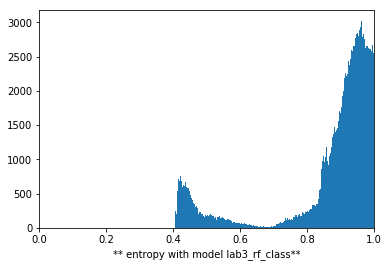

In [29]:
prob_col = "probability"
num_classes = len(df_preds.select(prob_col).first()[0]) # num classes in classification problem
from scipy.stats import entropy

def entropy_(base, v):
    '''
    Calculate the entropy of a distribution for given probability values. 'v' is a Vector
    The entropy is calculated as S = -sum(pk * log(pk), axis=axis).
    :param base The logarithmic base to use.
    '''
    return float(entropy(v.tolist(), qk=None, base=base))

from functools import partial
entropy_udf = udf(partial(entropy_, num_classes), FloatType())

df_preds = df_preds.withColumn("entropy", entropy_udf(col(prob_col)))


df_preds.select("entropy").describe().show()

n=2500
bins, counts = df_preds.select("entropy").rdd.flatMap(lambda x: x).histogram(n)

plt.figure()
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.xlim(xmax = 1, xmin = 0)
plt.xlabel("** entropy with model {}**".format(model_))


In [20]:
from pyspark.sql.types import FloatType
from functools import partial
import numpy as np
max_udf = udf(lambda x: float(np.max(x)), FloatType())

df_preds = df_preds.withColumn("max_score", max_udf(col("probability")))


df_preds.select("scoring", "probability", "label", "max_score").show(truncate=False)


+-------+-------------------------------------------------------------+-----+----------+
|scoring|probability                                                  |label|max_score |
+-------+-------------------------------------------------------------+-----+----------+
|0.0    |[0.41482881002874394,0.2943282626253086,0.2908429273459475]  |1.0  |0.4148288 |
|0.0    |[0.37401366223334825,0.3522196820773954,0.2737666556892564]  |2.0  |0.37401366|
|1.0    |[0.29224087844351315,0.43217298862538284,0.27558613293110396]|1.0  |0.43217298|
|0.0    |[0.5758217319788858,0.20348468015090426,0.22069358787021007] |0.0  |0.57582176|
|1.0    |[0.09763421351397848,0.8253159902741058,0.07704979621191572] |0.0  |0.825316  |
|2.0    |[0.2960575376954097,0.35100847673787344,0.3529339855667169]  |1.0  |0.35293397|
|1.0    |[0.1724721346076157,0.42873963950641275,0.3987882258859715]  |2.0  |0.42873964|
|1.0    |[0.15271251626638546,0.42393602835357264,0.42335145538004193]|2.0  |0.42393604|
|2.0    |[0.208521771

In [14]:
if "lab2" in model_:
    #lab 2[-inf, 18.363502334343508, 44.79310344827587, inf] 
    df_preds = df_preds.withColumn("label_disc", when(col("label")<18.36,0.0).when(col("label")<44.79,1.0).otherwise(2.0))
    df_preds = df_preds.withColumn("scoring_disc", when(col("scoring")<18.36,0.0).when(col("scoring")<44.79,1.0).otherwise(2.0))
else:
    #lab 1 [-inf, 10.75, 21.57, inf] - discretizando el i
    df_preds = df_preds.withColumn("label_disc", when(col("label")<10.75,0.0).when(col("label")<21.57,1.0).otherwise(2.0))
    df_preds = df_preds.withColumn("scoring_disc", when(col("scoring")<10.75,0.0).when(col("scoring")<21.57,1.0).otherwise(2.0))


from churn_nrt.src.projects_utils.models.modeler import get_multiclass_metrics
metrics_lab2 = get_multiclass_metrics(spark, df_preds, score_col="scoring_disc", label_col="label_disc")


[modeler] get_multiclass_metrics | score_col=scoring_disc, label_col=label_disc
confusion_matrix
[[ 281. 1756.    4.]
 [  70. 1968.   13.]
 [  21. 1102.   17.]]
[modeler] get_multiclass_metrics | Metrics Summary:
{'confusion_matrix': array([[ 281., 1756.,    4.],
       [  70., 1968.,   13.],
       [  21., 1102.,   17.]]),
 'f1_measure_class0.0': 0.2329050973891421,
 'f1_measure_class1.0': 0.572342591246183,
 'f1_measure_class2.0': 0.028960817717206128,
 'f1_score': 0.4331039755351682,
 'precision': 0.4331039755351682,
 'precision_class0.0': 0.7553763440860215,
 'precision_class1.0': 0.40779113137173645,
 'precision_class2.0': 0.5,
 'recall': 0.4331039755351682,
 'recall_class0.0': 0.13767760901518863,
 'recall_class1.0': 0.9595319356411507,
 'recall_class2.0': 0.014912280701754385,
 'weighted_f0.5_score': 0.35045627733145135,
 'weighted_f1_score': 0.32153082771689134,
 'weighted_false_positive_rate': 0.36423573318440894,
 'weighted_precision': 0.563475292187118,
 'weighted_recall': 0

In [82]:
if "lab2" not in model_:
    df_preds.where(col("scoring") > 40).count()
elif "lab2" in model_:
    print(df_preds.where(col("scoring") > 150).count())

0


In [83]:
if "lab2" not in model_:
    print("Limiting scoring....")
    df_preds = df_preds.withColumn("scoring", when(col("scoring") > 40, 40).otherwise(col("scoring")))
    from churn_nrt.src.projects_utils.models.modeler import get_metrics_regression
    rmse_test_fixed, r2_test_fixed = get_metrics_regression(spark, df_preds, title="TEST-fixed", score_col="scoring", label_col="label")
    rmse_test_fixed, r2_test_fixed
elif "lab2" in model_:
    print("Limiting scoring....")
    df_preds = df_preds.withColumn("scoring", when(col("scoring") > 150, 150).otherwise(col("scoring")))
    from churn_nrt.src.projects_utils.models.modeler import get_metrics_regression
    rmse_test_fixed, r2_test_fixed = get_metrics_regression(spark, df_preds, title="TEST-fixed", score_col="scoring", label_col="label")
    rmse_test_fixed, r2_test_fixed

Limiting scoring....
[modeler] get_metrics score_col=scoring, label_col=label
[modeler] get_metrics_regression | Root Mean Squared Error (RMSE) on TEST-fixed data = 17.520469624
[modeler] get_metrics_regression | R2 on TEST-fixed data = 0.291964475601


In [29]:
for var in ["label"]:#, "scoring"]:

    
    if var not in df_preds.columns:
        print("{} not in df_preds.columns".format(var))
        continue
    
    if var == "label":

        from churn_nrt.src.utils.date_functions import move_date_n_cycles
        df_preds = df_preds.withColumn("sum_bills_1_3", reduce(lambda a, b: a + b, [col("Bill_N{}_Amount_To_Pay".format(i)) for i in range(1, 4)]))
        df_preds = df_preds.withColumn("avg_bill_d1", col("sum_bills_1_3") / 3.0) # avg of the last three bills
        df_preds = df_preds.withColumn("prod_price_est", col("avg_bill_d1") * col("scoring") / 100.0)

        df_sum = df_preds.select("num_cliente", "label", "scoring", "prod_price_est", "avg_bill_d1") 

        df_sum = df_sum.withColumn("prod_price_real", col("avg_bill_d1") * col("label") / 100.0)
        df_sum = df_sum.withColumn("error_price_prod", col("prod_price_real") - col("prod_price_est"))
        #df_sum = df_sum.select("num_cliente", "label", "scoring", "prod_price_est", "avg_bill_d1", "error_price_prod") 

        
        from churn_nrt.src.projects_utils.models.modeler import get_metrics_regression
        rmse_test_fixed, r2_test_fixed = get_metrics_regression(spark, df_sum, title="TEST-price", score_col="prod_price_est", label_col="prod_price_real")
        print("METRICS PRICE", rmse_test_fixed, r2_test_fixed)
        
        
    else:
        df_sum = df_preds.select(var)


    var_disc = 'bucket'
    var_beauty = "{} range".format(var)
    num_buckets = 10

    from pyspark.ml.feature import QuantileDiscretizer
    discretizer = QuantileDiscretizer(numBuckets=num_buckets, inputCol=var, outputCol=var_disc, relativeError=0)
    bucketizer = discretizer.fit(df_sum)
    df_sum = bucketizer.transform(df_sum)
    mysplit = bucketizer.getSplits()
    print(bucketizer.getSplits())

    df_sum = df_sum.withColumn(var_beauty, col(var_disc))
    labels_dict = {ii: "[{0:.2f},{1:.2f})".format(mysplit[ii], mysplit[ii + 1]) for ii in range(0, len(mysplit) - 1)}
    for num, label in labels_dict.items():
        df_sum = df_sum.withColumn(var_beauty, when(col(var_beauty) == num, labels_dict[num]).otherwise(col(var_beauty)))


    print("[modeler] get_set | {} distribution:".format(var))
    df_sum.groupby(var_disc, var_beauty).agg(sql_count("*").alias("count"))
                                             
    if var == "label":
        df_resumen = df_sum.groupby(var_disc, var_beauty).agg(sql_count("*").alias("count"),
                                             sql_avg("label").alias("avg_label"),
                                             sql_avg("scoring").alias("avg_scoring"),
                                             sql_max("label").alias("max_label"),
                                             sql_max("scoring").alias("max_scoring"),
                                             sql_min("label").alias("min_label"),
                                             sql_min("scoring").alias("min_scoring")
                                            ).sort(var_disc)
        df_resumen = df_resumen.withColumn("diff_avg", col("avg_label") - col("avg_scoring"))
        df_resumen.show(truncate=False)
        
        print("**********************************")
        if "lab2" in model_:
            var = "prod_price_real"
            var_disc = 'bucket'
            var_beauty = "{} range".format(var)
            num_buckets = 10

            df_sum2 = df_sum.select("prod_price_real", "prod_price_est", "error_price_prod")

            from pyspark.ml.feature import QuantileDiscretizer
            discretizer = QuantileDiscretizer(numBuckets=num_buckets, inputCol=var, outputCol=var_disc, relativeError=0)
            bucketizer = discretizer.fit(df_sum2)
            df_sum2 = bucketizer.transform(df_sum2)
            mysplit = bucketizer.getSplits()
            print(bucketizer.getSplits())

            df_sum2 = df_sum2.withColumn(var_beauty, col(var_disc))
            labels_dict = {ii: "[{0:.2f},{1:.2f})".format(mysplit[ii], mysplit[ii + 1]) for ii in range(0, len(mysplit) - 1)}
            for num, label in labels_dict.items():
                df_sum2 = df_sum2.withColumn(var_beauty, when(col(var_beauty) == num, labels_dict[num]).otherwise(col(var_beauty)))


            df_resumen2 = df_sum2.groupby(var_disc, var_beauty).agg(sql_count("*").alias("count"),
                                                 sql_avg("prod_price_real").alias("avg_prod_price_real"),
                                                 sql_avg("prod_price_est").alias("avg_prod_price_est"),
                                                 sql_avg("error_price_prod").alias("avg_error_price_prod"),
                                                 sql_max("prod_price_real").alias("max_prod_price_real"),
                                                 sql_max("prod_price_est").alias("max_prod_price_est"),
                                                 sql_min("prod_price_real").alias("min_prod_price_real"),
                                                 sql_min("prod_price_est").alias("min_prod_price_est"),
                                                ).sort(var_disc)
            df_resumen2 = df_resumen2.withColumn("diff_avg", col("avg_prod_price_real") - col("avg_prod_price_est"))
            df_resumen2.show(truncate=False)
        

[modeler] get_metrics score_col=prod_price_est, label_col=prod_price_real
[modeler] get_metrics_regression | Root Mean Squared Error (RMSE) on TEST-price data = 0.544302024498
[modeler] get_metrics_regression | R2 on TEST-price data = 0.182440136451
('METRICS PRICE', 0.5443020244975654, 0.1824401364511441)
[-inf, 0.0, 1.0, 2.0, inf]
[modeler] get_set | label distribution:
+------+-----------+------+---------+------------------+---------+-----------+---------+-----------+--------------------+
|bucket|label range|count |avg_label|avg_scoring       |max_label|max_scoring|min_label|min_scoring|diff_avg            |
+------+-----------+------+---------+------------------+---------+-----------+---------+-----------+--------------------+
|1.0   |[0.00,1.00)|571910|0.0      |0.6920022381143887|0.0      |2.0        |0.0      |0.0        |-0.6920022381143887 |
|2.0   |[1.00,2.00)|571825|1.0      |1.1310488348708083|1.0      |2.0        |1.0      |0.0        |-0.13104883487080832|
|3.0   |[2.00,i

In [37]:
df_preds.select('label',
 'features',
 'rawPrediction',
 'probability',
 'prediction',
 'scoring').show(truncate=False)

+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
if "label" not in df_preds.columns:
    print("label not in df_preds.columns")
else:
    df_preds.select("label").describe().show()

+-------+-------------------+
|summary|              label|
+-------+-------------------+
|  count|            1729921|
|   mean| 1.8773551470462193|
| stddev|  8.636268251614212|
|    min|-288.83666666666664|
|    max|  299.3066666666667|
+-------+-------------------+



In [11]:
df_preds.select("scoring").describe().show()

+-------+------------------+
|summary|           scoring|
+-------+------------------+
|  count|           1729921|
|   mean|1.0080200816386642|
| stddev|0.9471321269155383|
|    min|-9.730727744556777|
|    max| 4.239538796920917|
+-------+------------------+



In [87]:
df_sum2 = df_sum2.withColumn("prod_price_real", when(col("prod_price_real") > 40, 40).otherwise(col("prod_price_real")))

df_sum2.select("prod_price_real").describe().show()

+-------+------------------+
|summary|   prod_price_real|
+-------+------------------+
|  count|              5232|
|   mean|14.923609836901123|
| stddev| 9.840173632622445|
|    min|1.0033333333333303|
|    max|              40.0|
+-------+------------------+



In [69]:
df_preds = df_preds.join(spark.read.load("/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df__20190831_20200601_012026").select("num_cliente", "label").withColumnRenamed("label", "price"),
             on=["num_cliente"], how="left")



In [30]:
df_preds.where(col("prediction")==1).agg(sql_min(col("scoring"))).show()


+------------------+
|      min(scoring)|
+------------------+
|0.5000005221805904|
+------------------+



# Accuracy, recall and f1 score by threshold

In [6]:
import numpy as np
import seaborn as sns
plt.figure()

from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
scores = []

qq = 0.80

for th in [0.3, 0.4, 0.45, 0.50, 0.55, 0.6, 0.65, 0.7, 0.75]:
    
    df_preds = df_preds.withColumn("pred", when(col("model_score")<=th,0).otherwise(1))

#     df_piv = (df_preds
#         .groupby("label")
#         .pivot("pred")
#         .agg(sql_count("*"))).sort(asc("label"))
        

#     correlation_matrix = np.array(df_piv.drop("label").rdd.collect())
#     plt.subplots(figsize = (15,10))
#     cor = sns.heatmap(data = correlation_matrix, annot = True, fmt="d",vmin=0, vmax=1200000, annot_kws={"size": 30}) #tv date2
#     plt.xlabel("** confusion matrix with threshold {} **".format(th))


    if qq != 1.0:
        prob_col = "probability"
        num_classes = len(df_preds.select(prob_col).first()[0]) # num classes in classification problem

        from scipy.stats import entropy
        def entropy_(base, v):
            '''
            Calculate the entropy of a distribution for given probability values. 'v' is a Vector
            The entropy is calculated as S = -sum(pk * log(pk), axis=axis).
            :param base The logarithmic base to use.
            '''
            return float(entropy(v.tolist(), qk=None, base=base))

        from functools import partial
        entropy_udf = udf(partial(entropy_, num_classes), FloatType())
        df_preds = df_preds.withColumn("entropy", entropy_udf(col(prob_col)))
        
        thresh = df_preds.approxQuantile("entropy", [qq], 0.000001)[0]
        df_preds2 = df_preds.where(col("entropy") <= thresh)
        
        y_true = df_preds2.select("label").rdd.map(lambda x: x[0]).collect()
        y_pred = df_preds2.select("pred").rdd.map(lambda x: x[0]).collect()

    else:
        y_true = df_preds.select("label").rdd.map(lambda x: x[0]).collect()
        y_pred = df_preds.select("pred").rdd.map(lambda x: x[0]).collect()
    
    CM = confusion_matrix(y_true, y_pred)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    #TPR = 1.0*TP/(TP+FN)
    # Specificity or true negative rate
    TNR = 1.0*TN/(TN+FP) 
    
    # Overall accuracy
    #ACC = 1.0*(TP+TN)/(TP+FP+FN+TN)
    
    scores.append([accuracy_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred), TNR])
    
    
scores

[[0.7956784117108524,
  0.9960397010771277,
  0.8840311992447759,
  0.07750285664059066],
 [0.8263431866441064,
  0.9709261336815453,
  0.8973617672264205,
  0.3080996747824558],
 [0.8263431866441064,
  0.9709261336815453,
  0.8973617672264205,
  0.3080996747824558],
 [0.8263431866441064,
  0.9709261336815453,
  0.8973617672264205,
  0.3080996747824558],
 [0.8263431866441064,
  0.9709261336815453,
  0.8973617672264205,
  0.3080996747824558],
 [0.8263431866441064,
  0.9709261336815453,
  0.8973617672264205,
  0.3080996747824558],
 [0.8263431866441064,
  0.9709261336815453,
  0.8973617672264205,
  0.3080996747824558],
 [0.8047112789811481,
  0.9053727646687387,
  0.8787820635834452,
  0.4438999736310099],
 [0.7449587062077296,
  0.7852273493584438,
  0.828015430886662,
  0.6006196712665904]]

<Figure size 432x288 with 0 Axes>

In [58]:
scores[1]

[0.8381928524264209,
 0.9806564257689566,
 0.9064697191811517,
 0.26989679146694306]

<Figure size 432x288 with 0 Axes>

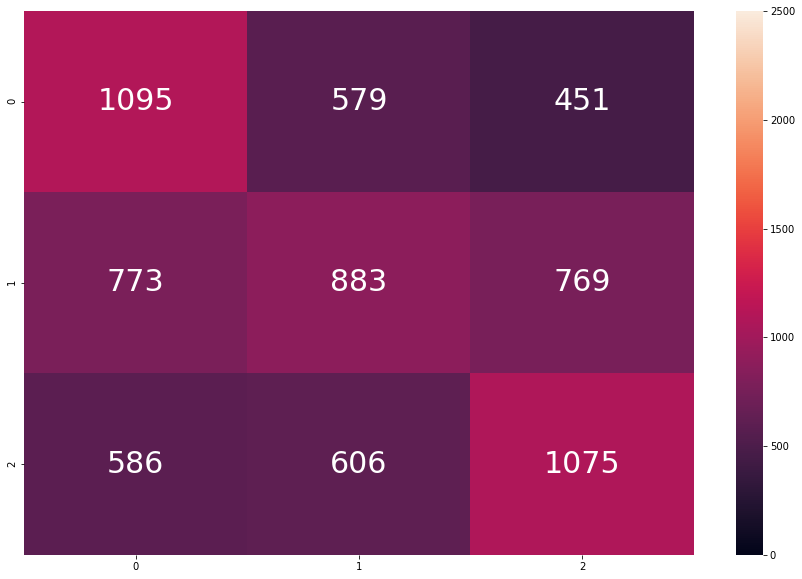

In [31]:
import seaborn as sns
plt.figure()

correlation_matrix = [[1095,  579,  451],
 [ 773,  883,  769],
 [ 586,  606, 1075]]
plt.subplots(figsize = (15,10))
#cor = sns.heatmap(data = correlation_matrix, annot = True, fmt="d",vmin=0, vmax=1100) #mobile date1
#cor = sns.heatmap(data = correlation_matrix, annot = True, fmt="d",vmin=0, vmax=2300) #mobile date2

#cor = sns.heatmap(data = correlation_matrix, annot = True, fmt="d",vmin=0, vmax=20) #fbb date2

#cor = sns.heatmap(data = correlation_matrix, annot = True, fmt="d",vmin=0, vmax=1900) #tv date1

#cor = sns.heatmap(data = correlation_matrix, annot = True, fmt="d",vmin=0, vmax=10) #fbb date1
cor = sns.heatmap(data = correlation_matrix, annot = True, fmt="d",vmin=0, vmax=2500, annot_kws={"size": 30}) #tv date2


## Correlation bw label and scoring

In [25]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

y_true = df_preds.select("label").rdd.map(lambda x: x[0]).collect()
y_pred = df_preds.select("myprediction").rdd.map(lambda x: x[0]).collect()
[accuracy_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)]

    

[0.7855252053823703, 0.8885528783358256, 0.858646924407423]

# Metrics by entropy

clase 636687
entropy


<Figure size 432x288 with 0 Axes>

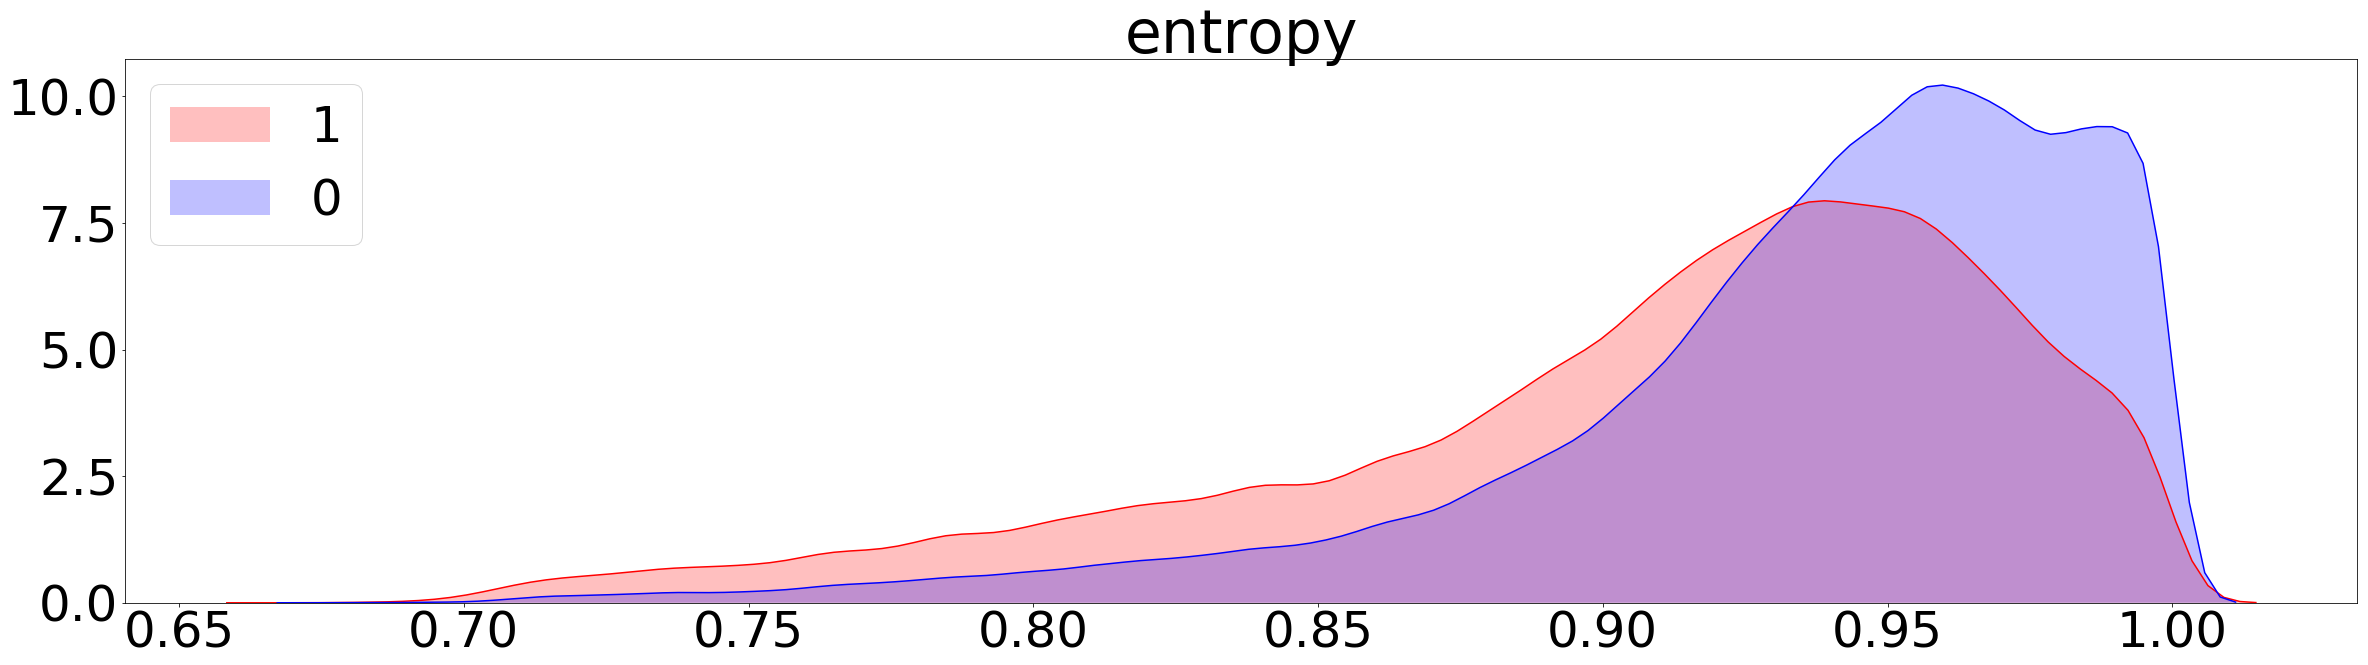

NameError: name 'est' is not defined

In [42]:
prob_col = "probability"
pred_col=  "prediction"
from pyspark.sql.types import FloatType
num_classes = len(df_preds.select(prob_col).first()[0]) # num classes in classification problem
from scipy.stats import entropy

def entropy_(base, v):
    '''
    Calculate the entropy of a distribution for given probability values. 'v' is a Vector
    The entropy is calculated as S = -sum(pk * log(pk), axis=axis).
    :param base The logarithmic base to use.
    '''
    return float(entropy(v.tolist(), qk=None, base=base))

from functools import partial
entropy_udf = udf(partial(entropy_, num_classes), FloatType())

df_preds = df_preds.withColumn("entropy", entropy_udf(col(prob_col)))

df_preds_clase0 = df_preds.where(col("prediction")==2)

print("clase {}".format(df_preds_clase0.count()))

df_preds_clase0 = df_preds_clase0.withColumn("fallo", when( ((col("label")==2) & (col(pred_col)==2)),0).otherwise(1))

plot_features_churn_seaborn_shade2(df_preds_clase0, var_to_plot=["entropy"], label="fallo", image_per_row = 1, hist = False)


In [57]:
df_preds_dudas.groupBy("label", "prediction").agg(sql_count("*")).show()

+-----+----------+--------+
|label|prediction|count(1)|
+-----+----------+--------+
|  2.0|       0.0|    1734|
|  0.0|       4.0|  377012|
|  1.0|       0.0|   22097|
|  1.0|       4.0|  549728|
|  2.0|       4.0|  570355|
|  0.0|       0.0|  194898|
+-----+----------+--------+



In [72]:
#df_preds_dudas = df_preds.withColumn("prediction", when(col("entropy")>0.9,3).otherwise(col("prediction")))
df_preds_dudas = df_preds.withColumn("prediction", when( (col("prediction")==1) & (col("entropy")>0.9),3).otherwise(col("prediction")))

df_piv = (df_preds_dudas
    .groupby("label")
    .pivot("prediction", values=[0,1,2,3])
    .agg(sql_count("*"))).fillna(0).sort(asc("label"))


confusion_matrix = np.array(df_piv.drop("label").rdd.collect())
confusion_matrix

array([[315028,  15103, 138881, 102898],
       [ 63368, 136020, 138305, 234132],
       [ 31151,  34387, 359501, 147050]])

In [ ]:
model_

# Multiclass metrics and metrics by entropy

In [39]:
df_preds = df_preds.withColumn("baseline", lit(0.0))

In [40]:
from churn_nrt.src.projects_utils.models.modeler import compute_metrics_by_entropy, get_multiclass_metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
#metrics_dict = compute_metrics_by_entropy(df_preds.select("label", "probability", "scoring"), score_col="scoring", label_col="label", pred_col="prediction")
metrics_dict = get_multiclass_metrics(spark, df_preds, score_col="baseline", label_col="label", additional_metrics=False)
metrics_dict 

[modeler] get_multiclass_metrics | score_col=baseline, label_col=label
[modeler] get_multiclass_metrics | preds_and_labels.count()=4123
confusion_matrix
[[1544.    0.    0.]
 [1341.    0.    0.]
 [1238.    0.    0.]]
[modeler] get_multiclass_metrics | Metrics Summary:
{'confusion_matrix': array([[1544.,    0.,    0.],
       [1341.,    0.,    0.],
       [1238.,    0.,    0.]]),
 'f1_measure_class0': 0.5449091229927651,
 'f1_measure_class1': 0.0,
 'f1_measure_class2': 0.0,
 'f1_score': 0.37448459859325733,
 'precision': 0.37448459859325733,
 'precision_class0': 0.37448459859325733,
 'precision_class1': 0.0,
 'precision_class2': 0.0,
 'recall': 0.37448459859325733,
 'recall_class0': 1.0,
 'recall_class1': 0.0,
 'recall_class2': 0.0,
 'weighted_f0.5_score': 0.1602916999966704,
 'weighted_f1_score': 0.20406007419374952,
 'weighted_false_positive_rate': 0.37448459859325733,
 'weighted_precision': 0.14023871458355308,
 'weighted_recall': 0.37448459859325733}


{'confusion_matrix': array([[1544.,    0.,    0.],
        [1341.,    0.,    0.],
        [1238.,    0.,    0.]]),
 'f1_measure_class0': 0.5449091229927651,
 'f1_measure_class1': 0.0,
 'f1_measure_class2': 0.0,
 'f1_score': 0.37448459859325733,
 'precision': 0.37448459859325733,
 'precision_class0': 0.37448459859325733,
 'precision_class1': 0.0,
 'precision_class2': 0.0,
 'recall': 0.37448459859325733,
 'recall_class0': 1.0,
 'recall_class1': 0.0,
 'recall_class2': 0.0,
 'weighted_f0.5_score': 0.1602916999966704,
 'weighted_f1_score': 0.20406007419374952,
 'weighted_false_positive_rate': 0.37448459859325733,
 'weighted_precision': 0.14023871458355308,
 'weighted_recall': 0.37448459859325733}

Text(0.5,31,'** confusion matrix (dudoso entropy>0.9 & pred=1) **')

<Figure size 432x288 with 0 Axes>

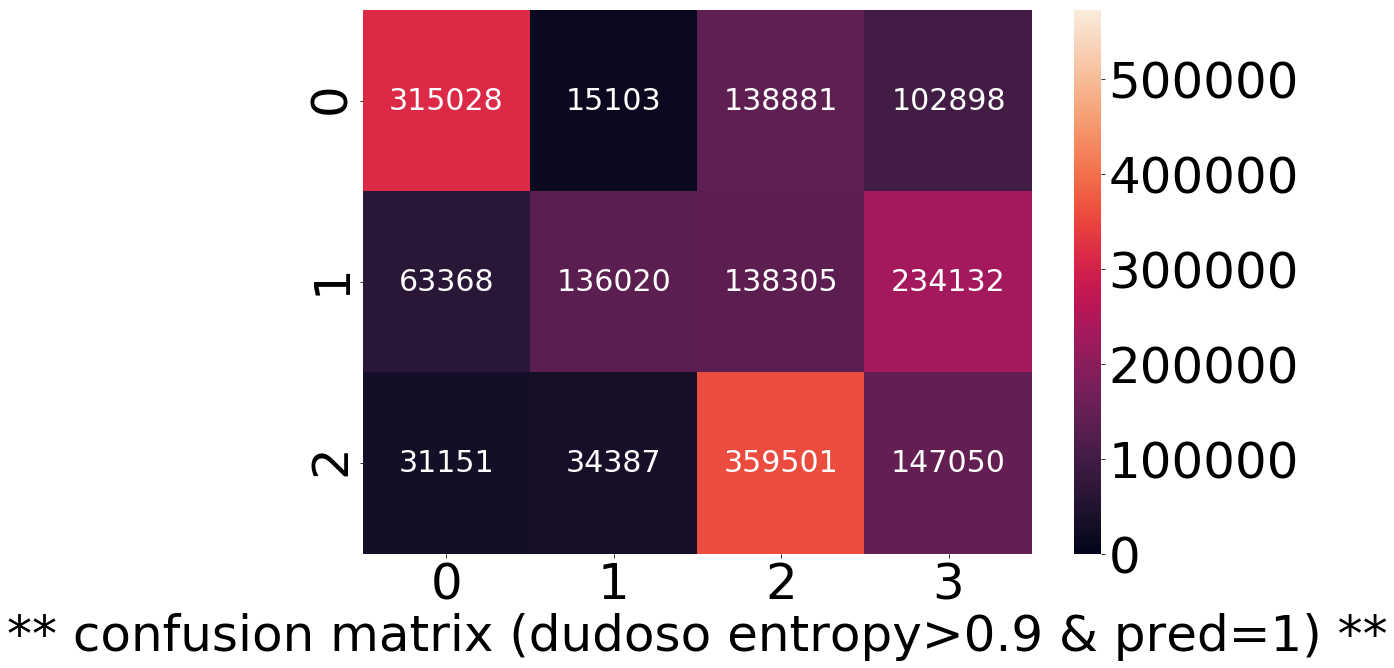

In [73]:
#df = df_preds.select("price", "scoring").toPandas()
#correlation_matrix = df.corr().round(3)
# plt.figure()
# df.boxplot(figsize = (15,10))
# plt.grid(True)
# plt.show()


import seaborn as sns
plt.figure()

# confusion_matrix = [[213464,    587,   5524, 352335],
#        [ 26322,   6893,   2280, 536330],
#        [  2649,    493,  30141, 538806]]
plt.subplots(figsize = (15,10))
cor = sns.heatmap(data = confusion_matrix, annot = True, fmt="d",vmin=0, vmax=573000, annot_kws={"size": 30}) 
plt.xlabel("** confusion matrix (dudoso entropy>0.9 & pred=1) **")





In [8]:

df_preds = df_preds.join(spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h0/h20/v10/year=2019/month=8/day=31").select("num_cliente", "avg_bill_after", "avg_bill_d1"),
                          on=["num_cliente"], how="inner")

In [9]:
df_preds = df_preds.withColumn("price", col("avg_bill_after") - col("avg_bill_d1"))


In [ ]:



df_sample  =df_preds.limit(5000)


import seaborn as sns
plt.figure()

plt.subplots(figsize = (15,10))

plt.scatter(df_sample["price"], df_sample["scoring"], marker='o', c="yellow", s=25, edgecolor='k')

plt.xlabel("** price **")
plt.ylabel("** scoring for 0/1 classifier **")




In [9]:
df = df_preds.select("price", "scoring").toPandas()
correlation_matrix = df.corr().round(3)
# plt.figure()
# df.boxplot(figsize = (15,10))
# plt.grid(True)
# plt.show()
correlation_matrix

,price,scoring
price,1.000,0.159
scoring,0.159,1.000


In [27]:
import numpy as np
import seaborn as sns
def plot_features_churn_seaborn_shade2(df, var_to_plot, label,  image_per_row = 3, hist = False):
    colors = ["blue", "red", "yellow"]
    labels_list = df.select(label).distinct().rdd.map(lambda x: x[0]).collect()
    labels_list = [int(lab) for lab in labels_list]
    plt.rcParams["font.size"] = "50"
    plt.figure()
    dfs = [df.where(col(label) == lab) for lab in labels_list]

    fig_cat, axes = plt.subplots(int(np.ceil(len(var_to_plot)/ image_per_row)), image_per_row, figsize=(40, 10*int(np.round(len(var_to_plot)/ image_per_row))), squeeze=False)
    for i, ax in enumerate(fig_cat.axes):
        sel_ = var_to_plot[i]
        print(var_to_plot[i])
        for lab in labels_list:
            arr = [float(row[sel_]) for row in dfs[lab].select(sel_).collect()]
            sns.kdeplot(arr, shade= True, color = colors[lab], ax=axes[int(i/image_per_row)][i%image_per_row])

        axes[int(i/image_per_row)][i%image_per_row].set_title(sel_)
    #plt.rcParams["font.family"] = "Times New Roman"
    plt.legend(labels=[str(lab) for lab in labels_list])
    plt.show()

#plot_features_churn_seaborn_shade2(df_preds, var_to_plot=["max_score"], label="label", image_per_row = 1, hist = False)


Text(0.5,0,'** label with model rf_reg2_lab1_out**')

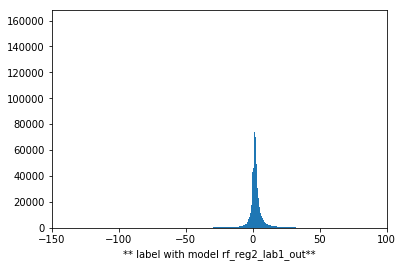

In [17]:
n=2500
bins, counts = df_preds.select("label").rdd.flatMap(lambda x: x).histogram(n)

plt.figure()
plt.hist(bins[:-1], bins=bins, weights=counts)
if "lab2" not in model_:
    plt.xlim(xmax = 100, xmin = -150)
else:
    plt.xlim(xmax = 200, xmin = -200)
plt.xlabel("** {} with model {}**".format("label", model_))

Text(0.5,0,'** scoring with model rf_reg2_lab1_out**')

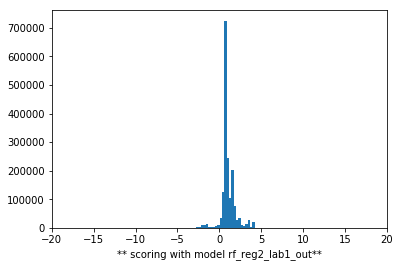

In [15]:
n=50
bins, counts = df_preds.select("scoring").rdd.flatMap(lambda x: x).histogram(n)

plt.figure()
plt.hist(bins[:-1], bins=bins, weights=counts)
if "lab2" not in model_:
    plt.xlim(xmax = 20, xmin = -20)
else:
    plt.xlim(xmax = 25, xmin = -25)
plt.xlabel("** {} with model {}**".format("scoring", model_))

Text(0.5,0,'** normed scoring with model rf_reg2**')

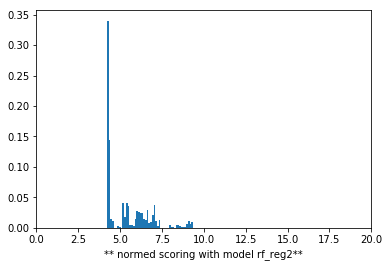

In [36]:
n=50
bins, counts = df_preds.select("scoring").rdd.flatMap(lambda x: x).histogram(n)

sum_counts = sum(counts) * 1.0
counts_norm = [c/sum_counts for c in counts]


plt.figure()
plt.hist(bins[:-1], bins=bins, weights=counts_norm)
# if "lab2" not in model_:
#     plt.xlim(xmax = 20, xmin = 0)
plt.xlabel("** {} with model {}**".format("normed scoring", model_))

In [ ]:
import seaborn as sns
plt.figure()

correlation_matrix = [[2247,  403,  341],
 [ 704, 1743,  545],
 [ 241,  438, 2314]]
plt.subplots(figsize = (15,10))
cor = sns.heatmap(data = correlation_matrix, annot = True, fmt='d', vmin=0, vmax=1100)

plt.figure()



Text(0.5,0,'** label **')

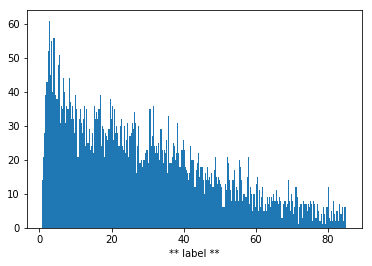

In [132]:
n=275
bins, counts = df_preds.select("label").rdd.flatMap(lambda x: x).histogram(n)

plt.figure()
plt.hist(bins[:-1], bins=bins, weights=counts)
if "lab2" not in model_:
    plt.xlim(xmax = 50, xmin = 0)
plt.xlabel("** {} **".format("label"))

In [54]:
n=100
bins, counts = df_preds.select("label").rdd.flatMap(lambda x: x).histogram(n)

sum_counts = sum(counts) * 1.0
counts_norm = [c/sum_counts for c in counts]


fig,(ax1)= plt.subplots(1,1, figsize=(15, 4))
plt.hist(bins[:-1], bins=bins, weights=counts_norm)
#plt.xlim(xmax = 50, xmin = 0)
plt.xlabel("** {} **".format("label norm"))

SyntaxError: invalid syntax (<ipython-input-54-dea6bedce6cd>, line 5)

In [85]:
def tweedie(n,p,mu,phi):
    np.random.seed(seed=32)
    #checking the value of variance power between 1-2
    if(p==2):
        print('p must be between (1,2)')
        pass
    else:
        rt=np.full(n,np.nan)
    # calculating mean of poisson distribution
        lambdaa=mu**(2-p)/(phi*(2-p))
    # shape parameter of gamma distribution
        alpha=(2-p)/(1-p)
    # scale parameter of gamma distribution
        gam= phi*(p-1)*(mu**(p-1))
    # Generating Poisson random sample
        N=np.random.poisson(lambdaa,n)
        for i in range(n):
        # Generate single data point of gamma distribution using poisson random variable
            rt[i]=np.random.gamma(N[i]*np.abs(alpha),gam,1)
        return(rt)

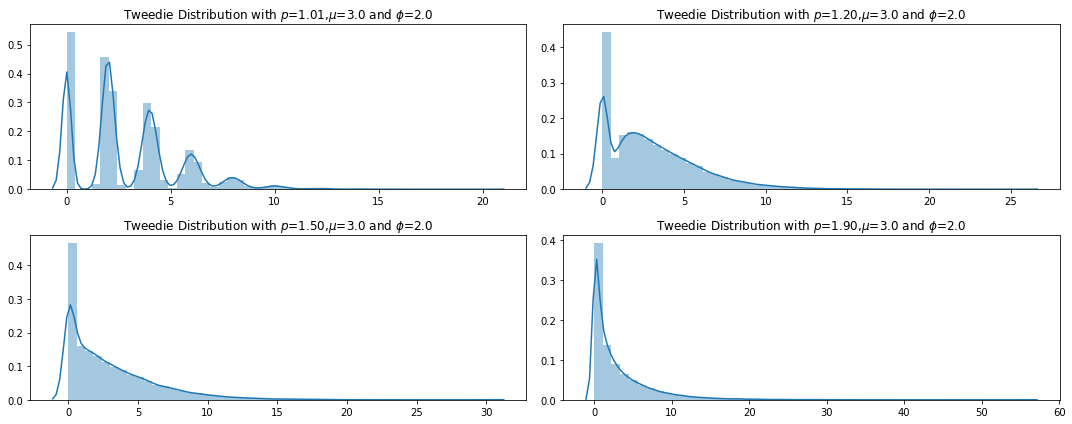

In [75]:
vals=[1.01,1.2,1.5,1.9]
fig, axes =plt.subplots(2,2, figsize=(15,6))
axes=axes.flatten()
for ax,i in zip(axes,vals):
    s_tweedie=tweedie(50000,i,3,2)
    sns.distplot(pd.DataFrame(s_tweedie),ax=ax).set_title('Tweedie Distribution with $p$=%.2f,$\mu$=%.1f and $\phi$=%.1f'%(i,3,2))
plt.tight_layout()
plt.show()

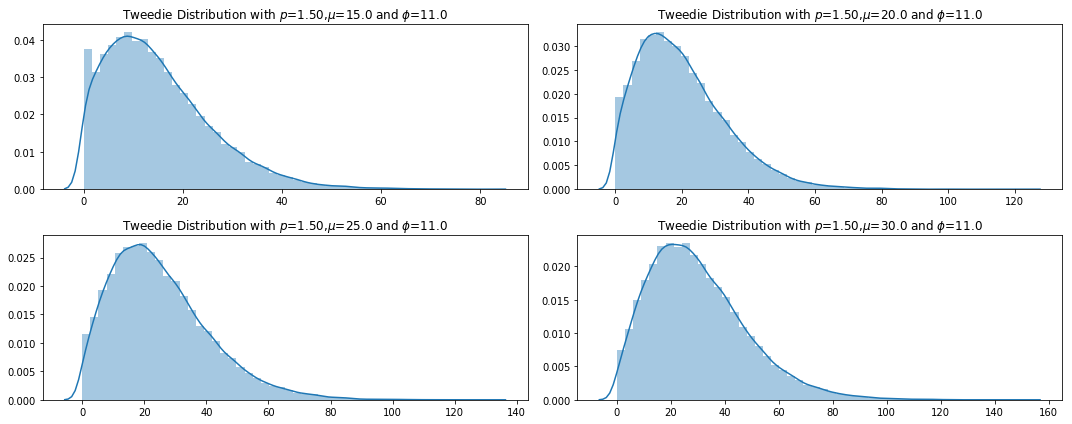

In [111]:
vals_mu=[15, 20, 25, 30]
p=1.5
phi=1.0
fig, axes =plt.subplots(2,2, figsize=(15,6))
axes=axes.flatten()
for ax,i in zip(axes,vals_mu):
    s_tweedie=tweedie(50000,p,i,2)
    sns.distplot(pd.DataFrame(s_tweedie),ax=ax).set_title('Tweedie Distribution with $p$=%.2f,$\mu$=%.1f and $\phi$=%.1f'%(p,i,mu))
plt.tight_layout()
plt.show()

/opt/cloudera/parcels/Anaconda-2.5.0/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


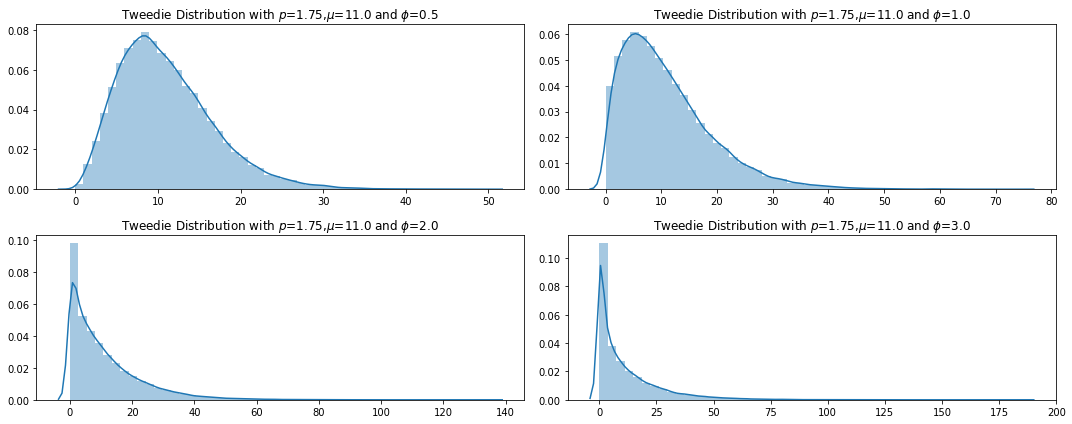

In [87]:
import numpy as np
import seaborn as sns
import pandas as pd
vals_phi=[0.5, 1,2,3]
p=1.75
mu=11
fig, axes =plt.subplots(2,2, figsize=(15,6))
axes=axes.flatten()
for ax,i in zip(axes,vals_phi):
    s_tweedie=tweedie(50000,p,mu,i)
    sns.distplot(pd.DataFrame(s_tweedie),ax=ax).set_title('Tweedie Distribution with $p$=%.2f,$\mu$=%.1f and $\phi$=%.1f'%(p,mu,i))
plt.tight_layout()
plt.show()

In [88]:
print("VAR = {}".format(np.var(df_preds.select("label").rdd.flatMap(lambda x: x).collect())), )


VAR = 401.827564286


In [104]:
np.var(counts), np.mean(counts)

(8163.0196000000005, 144.98)

Text(0.5,1,'gamma mean=8.75 var=10.9375')

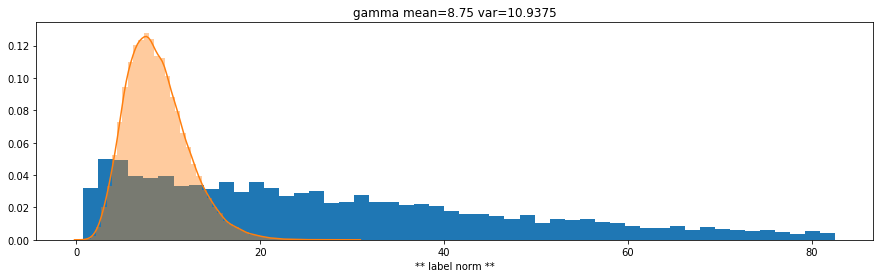

In [112]:
import numpy as np
import seaborn as sns
import pandas as pd
n=50
bins, counts = df_preds.select("label").rdd.flatMap(lambda x: x).histogram(n)

sum_counts = sum(counts) * 1.0
counts_norm = [c/sum_counts for c in counts]

fig,(ax1)= plt.subplots(1,1, figsize=(15, 4))
plt.hist(bins[:-1], bins=bins, weights=counts_norm)
if "lab2" not in model_:
    plt.xlim(xmax = 40, xmin = 0)
plt.xlabel("** {} **".format("label norm"))


#np.random.seed(seed=32)
#p=1.75
#mu=11
#phi=3
#s_tweedie=tweedie(50000,p,mu,phi)
#s_tweedie = [c for c in s_tweedie if c>0]
#sns.distplot(pd.DataFrame(s_tweedie),ax=ax1, hist=True).set_title("var(Y)={}".format(phi*np.power(mu,p)))


shape, scale = 7, 1.25
np.random.seed(seed=32)
s_gamma = np.random.gamma(shape, scale, 50000)
sns.distplot(pd.DataFrame(s_gamma),ax=ax1, hist=True).set_title("gamma mean={} var={}".format(shape*scale, shape*scale*scale))



# expo = np.random.exponential(scale=15, size=50000)
# sns.distplot(pd.DataFrame(expo),ax=ax1, hist=True).set_title("exponencial")





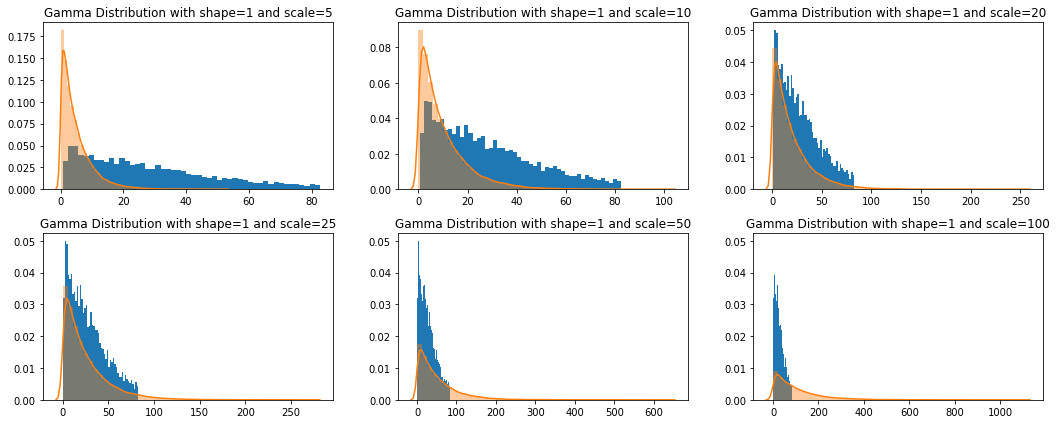

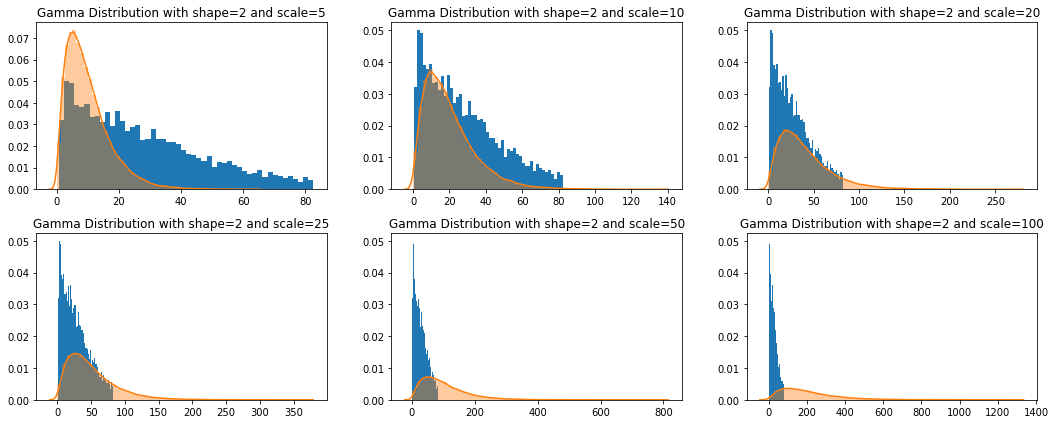

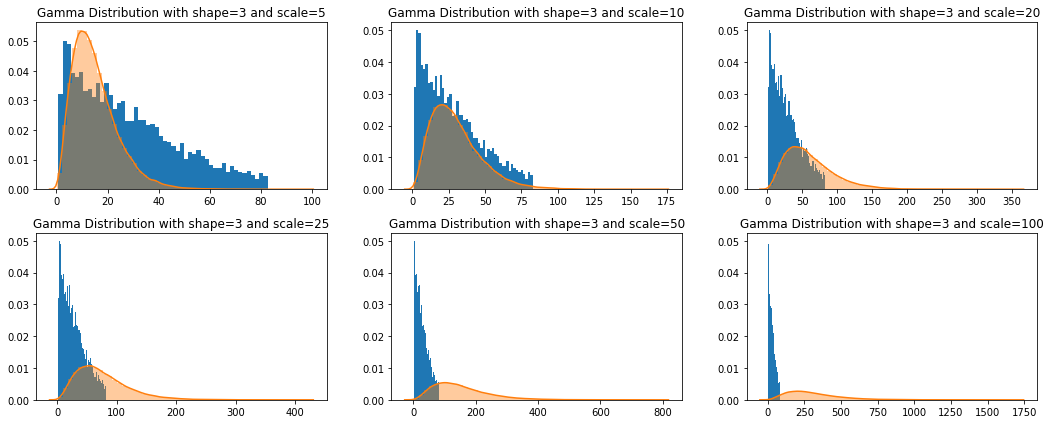

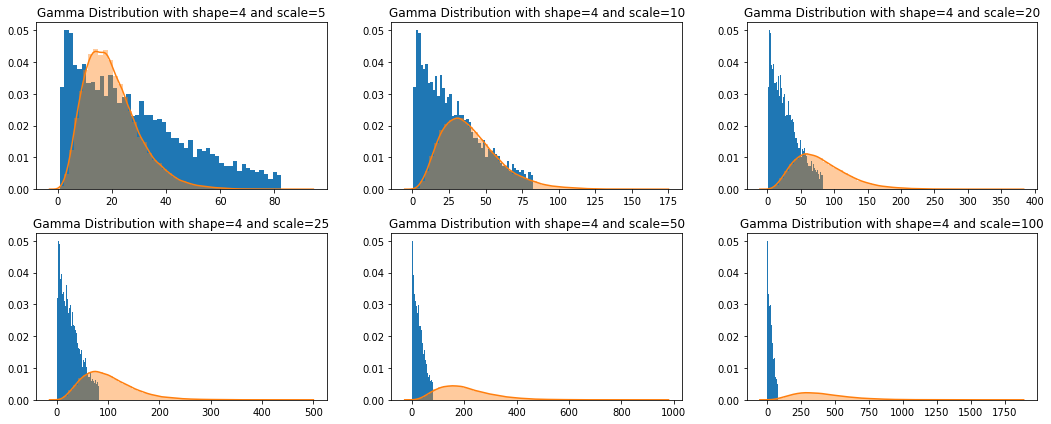

In [117]:
import numpy as np
import seaborn as sns
import pandas as pd

shapes = [1,2,3,4]
scales = [5,10,20,25,50,100]

for shape in shapes:
    fig, axes =plt.subplots(2,3, figsize=(15,6))
    axes=axes.flatten()
    for ax,scale in zip(axes,scales):
        s_gamma = np.random.gamma(shape, scale, 50000)
        ax.hist(bins[:-1], bins=bins, weights=counts_norm)
        sns.distplot(pd.DataFrame(s_gamma),ax=ax).set_title('Gamma Distribution with shape={} and scale={}'.format(shape, scale))
    plt.tight_layout()
    plt.show()

/opt/cloudera/parcels/Anaconda-2.5.0/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


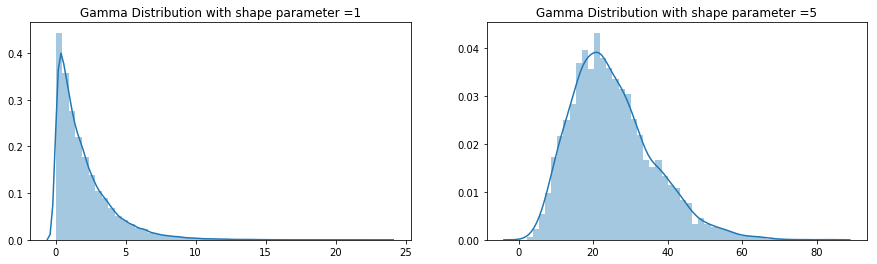

In [65]:
import numpy as np
import seaborn as sns
import pandas as pd

shape, scale = 1, 2.
np.random.seed(seed=32)
s_gamma = np.random.gamma(shape, scale, 50000)

scale = 5
s_gamma1=np.random.gamma(5,scale,5000)

np.random.seed(seed=32)
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(15, 4))
 
plot=sns.distplot(pd.DataFrame(s_gamma),ax=ax1).set_title('Gamma Distribution with shape parameter =1')
fig=plot.get_figure()
 
plot1=sns.distplot(pd.DataFrame(s_gamma1),ax=ax2).set_title('Gamma Distribution with shape parameter =5')
fig1=plot1.get_figure()

In [69]:
df = df.join(df_date3, on=["NUM_CLIENTE"], how="inner")
inc_d2_d3_cols = [(col(col_ + "_d3") - col(col_ + "_d2")).alias("inc_check_" + col_) for col_ in all_products_cols_ids]
print(inc_d2_d3_cols)
df = df.select(*(df_date1.columns + inc_d2_d3_cols+["Bill_N1_Amount_To_Pay_dbill"]))
df = df.cache()
#print("[NewProductData] build_module | Before filter by users that keep the new products - count() = {} distinct() = {}".format(df.count(), df.select("num_cliente").distinct().count()))
#df = df.where(reduce(and_, (col("inc_check_" + c) == 0 for c in PROD_TO_COL_DICT[NEW_PRODUCT]), lit(True)))
#print("[NewProductData] build_module | After filter by users that keep the new products - count() = {} distinct() = {}".format(df.count(), df.select("num_cliente").distinct().count()))
## FIXME: check that rest of product remains in the same quantity?

#df = df.drop_duplicates(["NUM_CLIENTE"])  # In case a module is stored more than once
# df = df.repartition(200)
#print('[NewProductData] build_module | Tr set - Volume at the end of build_module is count()={} distinct() = {}'.format(df.count(), df.select("num_cliente").distinct().count()))


[Column<(Cust_Agg_bam_services_nc_d3 - Cust_Agg_bam_services_nc_d2) AS `inc_check_Cust_Agg_bam_services_nc`>, Column<(Cust_Agg_fbb_services_nc_d3 - Cust_Agg_fbb_services_nc_d2) AS `inc_check_Cust_Agg_fbb_services_nc`>, Column<(Cust_Agg_mobile_services_nc_d3 - Cust_Agg_mobile_services_nc_d2) AS `inc_check_Cust_Agg_mobile_services_nc`>, Column<(Cust_Agg_fixed_services_nc_d3 - Cust_Agg_fixed_services_nc_d2) AS `inc_check_Cust_Agg_fixed_services_nc`>, Column<(Cust_Agg_tv_services_nc_d3 - Cust_Agg_tv_services_nc_d2) AS `inc_check_Cust_Agg_tv_services_nc`>, Column<(Cust_Agg_bam_mobile_services_nc_d3 - Cust_Agg_bam_mobile_services_nc_d2) AS `inc_check_Cust_Agg_bam_mobile_services_nc`>]


In [63]:
MODEL_METRICS_DICT = {"train" : {"auc" : 0.7, "rmse" : 0.5}, "test" : {"auc" : 0.77, "rmse" : 0.45}}

# import pprint
# pprint.pprint(MODEL_METRICS_DICT)

print("\r\n".join(["set:{} :: {}".format(set_name, repr(metrics_)) for set_name, metrics_ in MODEL_METRICS_DICT.items()]))

set:test :: {'auc': 0.77, 'rmse': 0.45}
set:train :: {'auc': 0.7, 'rmse': 0.5}


In [73]:
MODEL_METRICS_DICT["test2"] = {"auc" : 0.27, "rmse" : 0.25}

In [74]:
for set_name, metrics_ in MODEL_METRICS_DICT.items():
    print("set_name={} -- {}".format(set_name, metrics_))

set_name=test -- {'auc': 0.77, 'rmse': 0.45}
set_name=test2 -- {'auc': 0.27, 'rmse': 0.25}
set_name=train -- {'auc': 0.7, 'rmse': 0.5}


In [5]:
from churn_nrt.src.projects_utils.models.modeler_feat_selection import feature_selection_correlation, feature_selection_rf
label = "absoluto"

df = spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h0/h24/v10/year=2019/month=7/day=31").where(col("billing_std") <= 5)

if(label=="absoluto"):
    df = df.withColumn("label", col("avg_bill_after") - col("avg_bill_d1"))
if(label=="relativo"):
    df = df.withColumn("bill_inc", col("avg_bill_after") - col("avg_bill_d1"))
    df = df.withColumn("label", 100.0 * col("bill_inc") /  col("avg_bill_d1")) # relative increment
from churn_nrt.src.data_utils.Metadata import Metadata
from churn_nrt.src.projects.models.price_sensitivity.new_product.metadata import get_metadata
metadata_obj =  Metadata(spark, get_metadata, ["num_cliente"], sources=["pricesens_newprod10"])
all_cols = metadata_obj.get_cols(type_="all")
all_cols = list(set(all_cols) & set(df.columns))
df = df.select(all_cols + ["label"])




#feature_selection_correlation(df, cols_to_filter, threshold=0.8, label_col = 'label', pcg = 1.0):


[metadata] get_metadata
/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2020/month=1/day=21
[metadata] get_feat_cols returned 3995 feats
/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=7/day=31
[metadata] get_feat_cols returned 4842 feats
/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=12/day=21
[metadata] get_feat_cols returned 3995 feats
/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=2019/month=10/day=7
[metadata] get_feat_cols returned 4942 feats


In [7]:
cols_to_filter = ["Cust_Agg_pvr_services", "Cust_Agg_motor_services", "Cust_Agg_football_services", "Cust_Agg_trybuy_autom_services", "Cust_Agg_zapper_services", "Cust_Agg_total_price_zapper", "Cust_Agg_total_price_motor", "Cust_Agg_total_price_pvr", "Cust_Agg_trybuy_services", "Cust_Agg_num_football_nc", "Cust_Agg_mobile_services_nc", "Cust_Agg_num_football_nif", "Cust_Agg_mobile_services_nif", "Cust_L2_days_since_fecha_migracion", "Bill_N1_InvoiceCharges", "Cust_Agg_L2_mobile_fx_first_days_since_nif", "Cust_Agg_L2_mobile_fx_first_days_since_nc", "Bill_N2_InvoiceCharges", "Cust_Agg_L2_tv_fx_first_days_since_nc", "Cust_Agg_total_tv_total_charges", "Bill_N2_Amount_To_Pay", "Bill_N2_Tax_Amount", "Cust_Agg_num_2lins", "Cust_Agg_fbb_services_nc", "Cust_Agg_num_tariff_otros", "Bill_N2_net_charges", "Cust_Agg_L2_fbb_fx_first_days_since_nc", "Bill_N1_Tax_Amount", "Bill_N4_Amount_To_Pay", "Bill_N3_InvoiceCharges", "Bill_N4_Tax_Amount", "Cust_L2_migrated_client", "Bill_N4_InvoiceCharges", "tgs_days_until_fecha_fin_dto_agg_mean", "Bill_N1_net_charges", "Bill_N1_Amount_To_Pay", "Cust_Agg_tv_services_nc", "Bill_N4_net_charges", "Bill_L2_n1_net", "Bill_N3_Tax_Amount", "Bill_N3_Amount_To_Pay", "Bill_L2_n3_net", "Bill_N3_net_charges", "Cust_Agg_L2_fixed_fx_first_days_since_nc", "Bill_L2_n2_net", "Bill_L2_n4_net", "Bill_N5_Tax_Amount", "Bill_N5_Amount_To_Pay", "tgs_has_discount_agg_mean", "Bill_N5_InvoiceCharges", "Bill_N5_net_charges", "Cust_Agg_L2_tv_fx_first_days_since_nif", "Cust_age", "Cust_Agg_L2_fixed_fx_first_days_since_nif", "Cust_birth_date", "Bill_L2_n5_net", "Bill_L2_N1_N3_Amount_To_Pay", "tgs_days_until_f_fin_bi_agg_mean", "Bill_L2_n1_n3_net", "Cust_Agg_tv_services_nif", "Cust_Agg_L2_fbb_fx_first_days_since_nif", "Bill_L2_N1_N2_Amount_To_Pay", "Bill_L2_n1_n2_net", "Cust_CICLO", "Cust_Agg_fbb_services_nif", "Cust_Agg_fixed_services_nc", "Bill_L2_N1_N4_Amount_To_Pay", "Cust_Agg_num_tariff_smart", "Bill_L2_n1_n4_net", "netscout_ns_apps_audio_total_effective_dl_mb_agg_mean", "Bill_L2_N2_N3_Amount_To_Pay", "Bill_L2_n2_n3_net", "netscout_ns_apps_audio_data_mb_agg_mean", "Bill_L2_N1_N5_Amount_To_Pay", "netscout_ns_apps_audio_timestamps_agg_mean", "GNV_Data_L2_total_data_volume_agg_mean", "Cust_L2_days_until_next_bill", "GNV_Data_L2_data_per_connection_W_agg_mean", "GNV_Data_L2_data_per_connection_agg_mean", "Bill_L2_n1_n5_net", "GNV_Data_L2_total_data_volume_W_agg_mean", "GNV_Data_L2_max_data_per_connection_W_agg_mean", "netscout_ns_apps_audio_total_effective_ul_mb_agg_mean", "netscout_ns_apps_audio_days_agg_mean", "tgs_days_since_f_inicio_bi_agg_mean", "GNV_Data_L2_max_data_volume_W_agg_mean", "GNV_Data_L2_data_per_connection_WE_agg_mean", "GNV_Data_L2_total_data_volume_WE_agg_mean", "GNV_Voice_L2_max_num_calls_W_agg_mean", "Bill_L2_n3_n4_net", "GNV_Data_L2_max_data_volume_WE_agg_mean", "Bill_L2_N3_N4_Amount_To_Pay", "netscout_ns_apps_whatsapp_voice_calling_timestamps_agg_mean", "GNV_Data_L2_max_data_per_connection_WE_agg_mean", "Ord_sla_nb_started_orders_last60", "Penal_SRV_PENDING_N1_days_to_agg_mean", "Cust_Agg_num_tariff_redm", "netscout_ns_apps_whatsapp_voice_calling_days_agg_mean", "Ord_sla_first_order_last120", "Ord_sla_nb_started_orders_last120", "Ord_sla_last_order_last120", "Ord_sla_last_order_last60", "netscout_ns_apps_whatsapp_voice_calling_total_effective_dl_mb_agg_mean", "netscout_ns_apps_instagram_data_mb_agg_mean", "Bill_L2_N4_N5_Amount_To_Pay", "netscout_ns_apps_whatsapp_voice_calling_total_effective_ul_mb_agg_mean", "Cust_Agg_fixed_services_nif", "Ord_sla_first_order_last60", "netscout_ns_apps_instagram_total_effective_ul_mb_agg_mean", "Bill_L2_n4_n5_net", "tgs_sum_ind_over_use_agg_mean", "GNV_Voice_L2_total_mou_w_agg_mean", "Ord_sla_nb_started_orders_last30", "netscout_ns_apps_whatsapp_voice_calling_data_mb_agg_mean", "Ord_sla_last_order_last240", "netscout_ns_apps_instagram_total_effective_dl_mb_agg_mean", "Penal_SRV_FINISHED_N1_days_to_agg_mean", "GNV_Voice_L2_max_num_calls_WE_agg_mean", "Ord_sla_last_order_last365", "Ord_sla_nb_started_orders_last90", "GNV_Data_L2_total_connections_agg_mean", "tgs_sum_ind_under_use_agg_mean", "Ord_sla_last_order_last30", "GNV_Data_L2_total_connections_W_agg_mean", "GNV_Voice_L2_max_mou_W_agg_mean", "Ord_sla_last_order_last90", "Ord_sla_nb_completed_orders_last120", "Ord_sla_nb_completed_orders_last60", "netscout_ns_apps_instagram_timestamps_agg_mean", "GNV_Voice_L2_total_mou_we_agg_mean", "Ord_sla_nb_completed_orders_last90", "Ord_sla_nb_completed_orders_last30", "netscout_ns_apps_facebook_total_effective_dl_mb_agg_mean", "Ord_sla_first_order_last30", "GNV_Data_L2_total_connections_WE_agg_mean", "netscout_ns_apps_facebook_data_mb_agg_mean", "Penal_SRV_APPLIED_N1_days_to_agg_mean", "GNV_Voice_L2_max_mou_WE_agg_mean", "Ord_sla_first_order_last90", "GNV_Voice_L2_max_mou_per_call_W_agg_mean", "netscout_ns_apps_youtube_total_effective_dl_mb_agg_mean", "netscout_ns_apps_youtube_data_mb_agg_mean", "Penal_SRV_FINISHED_N2_days_to_agg_mean", "GNV_Voice_L2_max_mou_per_call_WE_agg_mean", "Penal_SRV_PENDING_N5_days_to_agg_mean", "Penal_SRV_APPLIED_N3_days_to_agg_mean", "Penal_SRV_APPLIED_N2_days_to_agg_mean", "Penal_SRV_PENDING_N1_penal_amount_agg_mean", "Penal_SRV_PENDING_N2_days_to_agg_mean", "Penal_SRV_APPLIED_N4_days_to_agg_mean", "Penal_SRV_FINISHED_N4_days_to_agg_mean", "Penal_SRV_APPLIED_N5_days_to_agg_mean", "Ord_sla_last_order_last180", "GNV_Data_L2_max_connections_W_agg_mean", "Penal_SRV_PENDING_N3_days_to_agg_mean", "Penal_SRV_PENDING_N4_days_to_agg_mean", "Penal_SRV_FINISHED_N3_days_to_agg_mean", "netscout_ns_apps_facebookmessages_total_effective_dl_mb_agg_mean", "netscout_ns_apps_facebookmessages_total_effective_ul_mb_agg_mean", "Penal_SRV_FINISHED_N5_days_to_agg_mean", "netscout_ns_apps_facebookmessages_data_mb_agg_mean", "GNV_Data_L2_max_connections_WE_agg_mean", "netscout_ns_apps_youtube_total_effective_ul_mb_agg_mean", "netscout_ns_apps_facebook_total_effective_ul_mb_agg_mean", "netscout_ns_apps_facebook_video_data_mb_agg_mean", "netscout_ns_apps_facebook_video_total_effective_dl_mb_agg_mean", "netscout_ns_apps_itunes_total_effective_ul_mb_agg_mean", "netscout_ns_apps_spotify_total_effective_ul_mb_agg_mean", "Ord_sla_ord_admin_orders_last30", "Ord_sla_ord_admin_first_order_last60", "Cust_Agg_L2_bam_fx_first_days_since_nc", "Ord_sla_ord_admin_orders_last60", "netscout_ns_apps_instagram_days_agg_mean", "Ord_sla_ord_admin_last_order_last240", "netscout_ns_apps_itunes_total_effective_dl_mb_agg_mean", "Ord_sla_ord_admin_last_order_last365", "netscout_ns_apps_itunes_data_mb_agg_mean", "netscout_ns_apps_apple_timestamps_agg_mean", "Cust_Agg_L2_bam_fx_first_days_since_nif", "netscout_ns_apps_itunes_timestamps_agg_mean", "Ord_sla_ord_admin_last_order_last60", "netscout_ns_apps_spotify_data_mb_agg_mean", "netscout_ns_apps_facebook_video_total_effective_ul_mb_agg_mean", "netscout_ns_apps_apple_total_effective_dl_mb_agg_mean", "netscout_ns_apps_apple_data_mb_agg_mean", "netscout_ns_apps_adultweb_total_effective_dl_mb_agg_mean", "netscout_ns_apps_spotify_total_effective_dl_mb_agg_mean", "netscout_ns_apps_spotify_timestamps_agg_mean", "netscout_ns_apps_apple_total_effective_ul_mb_agg_mean", "netscout_ns_apps_facebookmessages_timestamps_agg_mean", "netscout_ns_apps_whatsapp_total_effective_ul_mb_agg_mean", "netscout_ns_apps_adultweb_data_mb_agg_mean", "Cust_Agg_num_tariff_plana200min", "Ord_sla_nb_started_orders_last30_impact", "Ord_sla_ord_admin_last_order_last180", "netscout_ns_apps_facebook_video_timestamps_agg_mean", "netscout_ns_apps_spotify_days_agg_mean", "netscout_ns_apps_adultweb_total_effective_ul_mb_agg_mean", "Ord_sla_first_order_last240", "netscout_ns_apps_itunes_days_agg_mean", "netscout_ns_apps_facebook_days_agg_mean", "netscout_ns_apps_googleplay_days_agg_mean", "netscout_ns_apps_web_vodafone_http_data_mb_agg_mean", "Ord_sla_first_order_last365", "netscout_ns_apps_whatsapp_days_agg_mean", "netscout_ns_apps_whatsapp_total_effective_dl_mb_agg_mean", "netscout_ns_apps_facebookmessages_days_agg_mean", "netscout_ns_apps_whatsapp_data_mb_agg_mean", "Cust_Agg_bam_services_nif", "Cust_Agg_bam_services_nc", "Cust_Agg_num_tariff_minim", "netscout_ns_apps_googleplay_total_effective_dl_mb_agg_mean", "netscout_ns_apps_googleplay_data_mb_agg_mean", "netscout_ns_apps_web_vodafone_http_total_effective_dl_mb_agg_mean", "netscout_ns_apps_youtube_days_agg_mean", "netscout_ns_apps_amazon_data_mb_agg_mean", "netscout_ns_apps_adultweb_timestamps_agg_mean", "netscout_ns_apps_web_vodafone_http_total_effective_ul_mb_agg_mean", "netscout_ns_apps_amazon_total_effective_ul_mb_agg_mean", "netscout_ns_apps_snapchat_total_effective_dl_mb_agg_mean", "netscout_ns_apps_facebook_timestamps_agg_mean", "netscout_ns_apps_snapchat_total_effective_ul_mb_agg_mean", "Ord_sla_ord_admin_first_order_last30", "netscout_ns_apps_facebook_video_days_agg_mean", "netscout_ns_apps_finance_total_effective_ul_mb_agg_mean", "netscout_ns_apps_googleplay_total_effective_ul_mb_agg_mean", "netscout_ns_apps_webgames_total_effective_ul_mb_agg_mean", "netscout_ns_apps_snapchat_data_mb_agg_mean", "netscout_ns_apps_amazon_total_effective_dl_mb_agg_mean", "netscout_ns_apps_webgames_data_mb_agg_mean", "netscout_ns_apps_youtube_timestamps_agg_mean", "netscout_ns_apps_webgames_total_effective_dl_mb_agg_mean", "netscout_ns_apps_whatsapp_timestamps_agg_mean", "netscout_ns_apps_googleplay_timestamps_agg_mean", "Ord_sla_nb_started_orders_last60_impact", "Ord_sla_cambio_orders_last30", "netscout_ns_apps_web_vodafone_http_timestamps_agg_mean", "netscout_ns_apps_shopping_total_effective_ul_mb_agg_mean", "netscout_ns_apps_googledrive_total_effective_dl_mb_agg_mean", "netscout_ns_apps_netflix_data_mb_agg_mean", "netscout_ns_apps_apple_days_agg_mean", "netscout_ns_apps_googledrive_data_mb_agg_mean", "netscout_ns_apps_finance_data_mb_agg_mean", "Ord_sla_ord_admin_last_order_last30", "netscout_ns_apps_business_total_effective_ul_mb_agg_mean", "netscout_ns_apps_googledrive_timestamps_agg_mean", "netscout_ns_apps_gmail_data_mb_agg_mean", "netscout_ns_apps_webgames_timestamps_agg_mean", "Cust_Agg_num_tariff_xs", "netscout_ns_apps_gmail_total_effective_dl_mb_agg_mean", "netscout_ns_apps_business_total_effective_dl_mb_agg_mean", "Ord_sla_ord_admin_first_order_last365", "netscout_ns_apps_finance_total_effective_dl_mb_agg_mean", "netscout_ns_apps_technology_data_mb_agg_mean", "netscout_ns_apps_googledrive_total_effective_ul_mb_agg_mean", "netscout_ns_apps_samsung_total_effective_ul_mb_agg_mean", "netscout_ns_apps_gmail_total_effective_ul_mb_agg_mean", "netscout_ns_apps_shopping_timestamps_agg_mean", "Ord_sla_ord_admin_first_order_last240", "netscout_ns_apps_business_data_mb_agg_mean", "netscout_ns_apps_gmail_timestamps_agg_mean", "netscout_ns_apps_business_timestamps_agg_mean", "netscout_ns_apps_samsung_data_mb_agg_mean", "Ord_sla_first_order_last180", "netscout_ns_apps_amazon_timestamps_agg_mean", "Order_Agg_Cambio_COM_orders", "Ord_sla_ord_admin_first_order_last180", "netscout_ns_apps_technology_total_effective_dl_mb_agg_mean", "netscout_ns_apps_netflix_total_effective_ul_mb_agg_mean", "netscout_ns_apps_twitter_total_effective_ul_mb_agg_mean", "netscout_ns_apps_shopping_data_mb_agg_mean", "netscout_ns_apps_shopping_total_effective_dl_mb_agg_mean", "netscout_ns_apps_snapchat_timestamps_agg_mean", "Spinners_nif_port_freq_per_day", "netscout_ns_apps_technology_timestamps_agg_mean", "netscout_ns_apps_twitter_total_effective_dl_mb_agg_mean", "netscout_ns_apps_samsung_timestamps_agg_mean", "netscout_ns_apps_samsung_total_effective_dl_mb_agg_mean", "netscout_ns_apps_booking_total_effective_dl_mb_agg_mean", "netscout_ns_apps_technology_total_effective_ul_mb_agg_mean", "Ord_sla_ord_admin_last_order_last90", "netscout_ns_apps_booking_total_effective_ul_mb_agg_mean", "netscout_ns_apps_finance_timestamps_agg_mean", "netscout_ns_apps_googlemaps_data_mb_agg_mean", "netscout_ns_apps_twitter_data_mb_agg_mean", "Ord_sla_ord_admin_first_order_last90", "Ord_sla_nb_started_orders_last365", "netscout_ns_apps_news_total_effective_ul_mb_agg_mean", "netscout_ns_apps_amazon_days_agg_mean", "Ord_sla_ord_admin_orders_last90", "netscout_ns_apps_netflix_total_effective_dl_mb_agg_mean", "netscout_ns_apps_booking_data_mb_agg_mean", "Ord_sla_nb_started_orders_last180", "netscout_ns_apps_googlemaps_total_effective_ul_mb_agg_mean", "Ord_sla_nb_started_orders_last90_impact", "netscout_ns_apps_googlemaps_total_effective_dl_mb_agg_mean", "Ord_sla_nb_started_orders_last240", "netscout_ns_apps_twitter_timestamps_agg_mean", "netscout_ns_apps_booking_timestamps_agg_mean", "netscout_ns_apps_netflix_timestamps_agg_mean"]

In [8]:
A = feature_selection_correlation(df, cols_to_filter, threshold=0.8, label_col = 'label', pcg = 1.0)

A

[Info] Number of rows in the DF: 1026844
[Info] Calculating correlation for 300 variables


['Bill_N3_InvoiceCharges',
 'Ord_sla_last_order_last60',
 'Bill_N4_Tax_Amount',
 'netscout_ns_apps_spotify_days_agg_mean',
 'Bill_L2_N1_N4_Amount_To_Pay',
 'Cust_CICLO',
 'netscout_ns_apps_finance_data_mb_agg_mean',
 'GNV_Data_L2_total_data_volume_agg_mean',
 'Ord_sla_ord_admin_first_order_last30',
 'Ord_sla_first_order_last30',
 'netscout_ns_apps_itunes_total_effective_dl_mb_agg_mean',
 'Cust_Agg_L2_mobile_fx_first_days_since_nc',
 'netscout_ns_apps_shopping_data_mb_agg_mean',
 'netscout_ns_apps_instagram_timestamps_agg_mean',
 'Cust_Agg_bam_services_nif',
 'netscout_ns_apps_business_total_effective_ul_mb_agg_mean',
 'Ord_sla_nb_started_orders_last90',
 'netscout_ns_apps_technology_data_mb_agg_mean',
 'Cust_Agg_fixed_services_nif',
 'netscout_ns_apps_facebook_data_mb_agg_mean',
 'Bill_L2_N2_N3_Amount_To_Pay',
 'Penal_SRV_FINISHED_N5_days_to_agg_mean',
 'Ord_sla_first_order_last365',
 'Cust_Agg_L2_bam_fx_first_days_since_nc',
 'netscout_ns_apps_facebook_total_effective_dl_mb_agg_mean',

In [11]:
np.Inf

inf

# Threshold analysis

In [17]:
A = [-np.Inf, 0.3100000000000023, 2.7966666666666526, np.Inf]
B = [-np.Inf, 0.61666666666666, 3.8966666666666683, np.Inf]
C = [-np.Inf, 0.5166666666666657, 4.213333333333328, np.Inf]
D = [-np.Inf, 0.1666666666666714, 3.990000000000002, np.Inf]

(A[1] + B[1] + C[1] + D[1])/4

0.40249999999999986

In [16]:
A = [-np.Inf, 0.0, 3.2131661442006156, np.Inf]
B = [-np.Inf, 1.117647058823537, 6.078231292517003, np.Inf]
C = [-np.Inf, 1.5686274509803866, 9.090909090909092, np.Inf]
D = [-np.Inf, 0.980392156862752, 8.701388888888895, np.Inf]

(A[2] + B[2] + C[2] + D[2])/4

6.770923854128901

In [12]:
import numpy as np
A = [-np.Inf, 10.75333333333333, 21.56666666666666, np.Inf]
B = [-np.Inf, 10.266666666666673, 20.243333333333332, np.Inf]
C = [-np.Inf, 10.056666666666672, 19.706666666666678, np.Inf]
D = [-np.Inf, 10.873333333333342, 20.499999999999993, np.Inf]

(A[2] + B[2] + C[2] + D[2])/4

20.504166666666663

In [14]:
A= [-np.Inf, 18.363502334343508, 44.79310344827587, np.Inf]
B= [-np.Inf, 17.539319131992826, 41.408535970134224, np.Inf]
C= [-np.Inf, 16.507445911772994, 39.81561509651397, np.Inf]
D= [-np.Inf, 18.696006519967387, 40.94666666666666, np.Inf]

(A[1] + B[1] + C[1] + D[1])/4

17.776568474519177

In [20]:
A = [-np.Inf, 6.326666666666675, 12.093333333333327, np.Inf]  # tv label 3
B = [-np.Inf, 6.039999999999999, 11.54333333333333, np.Inf]
C = [-np.Inf, 4.899999999999999, 10.053333333333335, np.Inf]
D = [-np.Inf, 5.073333333333338, 10.516666666666666, np.Inf]

(A[2] + B[2] + C[2] + D[2])/4

11.051666666666664

In [22]:
A = [-np.Inf, 12.033333333333356, 24.21012269938652, np.Inf]

B = [-np.Inf, 11.156946420104292, 22.84937536410122, np.Inf]

C = [-np.Inf, 8.828478964401281, 19.016835016835003, np.Inf]

D = [-np.Inf, 9.166793912556642, 19.69999050602869, np.Inf]

(A[1] + B[1] + C[1] + D[1])/4

10.296388157598894

# Label 6 model

In [6]:
[df_preds_positive.count() + df_preds_negative.count(), df_preds.count(), df_preds_binary.count()]

NameError: name 'df_preds_binary' is not defined

Text(0.5,69,'** confusion matrix **')

<Figure size 432x288 with 0 Axes>

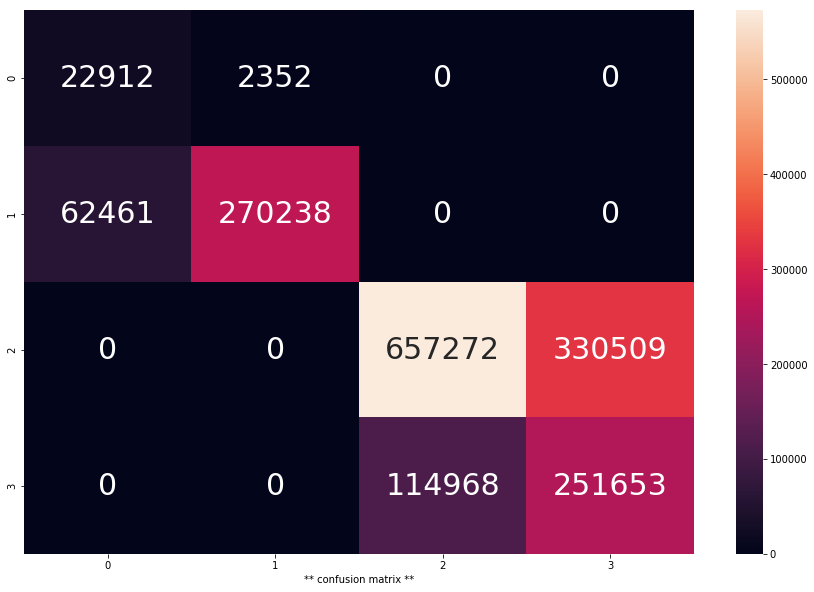

In [8]:
import numpy as np



# no balance model A
# df_preds_positive = spark.read.load("/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_positive_lab6_20190831_20200612_192420")
# df_preds_negative = spark.read.load("/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_negative_lab6_20190831_20200612_192420")

df_preds_positive = spark.read.load("/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_positive_lab6_20191130_20200613_072749")
df_preds_negative = spark.read.load("/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_negative_lab6_20191130_20200613_072749")



df_preds_positive = df_preds_positive.withColumn("lab", when(col("label")==1,3).otherwise(2))
df_preds_positive = df_preds_positive.withColumn("pred", when(col("prediction")==1,3).otherwise(2))

df_preds_negative = df_preds_negative.withColumn("lab", col("label"))
df_preds_negative = df_preds_negative.withColumn("pred", col("prediction"))


from churn_nrt.src.utils.pyspark_utils import union_all

df_preds = union_all([df_preds_positive, df_preds_negative])



df_piv = (df_preds
    .groupby("lab")
    .pivot("pred", values=[0,1,2,3])
    .agg(sql_count("*"))).fillna(0).sort(asc("lab"))


confusion_matrix = np.array(df_piv.drop("lab").rdd.collect())
confusion_matrix

import seaborn as sns
plt.figure()

plt.subplots(figsize = (15,10))
cor = sns.heatmap(data = confusion_matrix, annot = True, fmt="d",vmin=0, vmax=573000, annot_kws={"size": 30}) 
plt.xlabel("** confusion matrix **")




+------------------+-----+-------+
|label_check_binary|label|  count|
+------------------+-----+-------+
|                 1|    1|1227922|
|                 0|    0| 484444|
+------------------+-----+-------+



<Figure size 432x288 with 0 Axes>

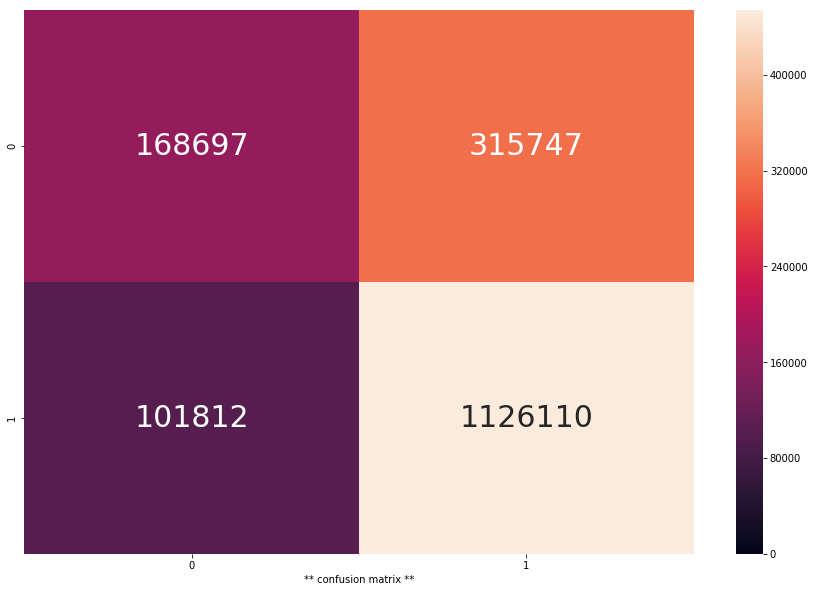

In [9]:
import numpy as np
# MODEL A - balance + 0.6 (creo)
#df_preds_binary = spark.read.load("/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab6_20190831_20200612_073145")


# ModeL A - no balance +0.6
#df_preds_binary = spark.read.load("/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab6_20190831_20200612_192420")
# Model A - no balance + 0.6 + fecha 2
df_preds_binary = spark.read.load("/user/csanc109/projects/churn/data/price_sens_new_product_mobile_0_20/df_lab6_20191130_20200613_072749")


df_preds_binary = df_preds_binary.withColumn("prediction", when(col("scoring")>=0.5,1).otherwise(0))


# df_preds_binary = df_preds_binary.join(spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h0/h20/v10/year=2019/month=8/day=31").select("num_cliente", "avg_bill_after", "avg_bill_d1"),
#                          on=["num_cliente"], how="inner")


df_preds_binary = df_preds_binary.join(spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h0/h20/v10/year=2019/month=11/day=30").select("num_cliente", "avg_bill_after", "avg_bill_d1"),
                          on=["num_cliente"], how="inner")

df_preds_binary = df_preds_binary.withColumn("label_cont", col("avg_bill_after") - col("avg_bill_d1"))
df_preds_binary = df_preds_binary.withColumn("label_check_binary", when(col("label_cont") > 0, 1).otherwise(0))



df_piv = (df_preds_binary
    .groupby("label")
    .pivot("prediction", values=[0,1])
    .agg(sql_count("*"))).fillna(0).sort(asc("label"))


confusion_matrix_bin = np.array(df_piv.drop("label").rdd.collect())
confusion_matrix_bin

import seaborn as sns
plt.figure()

plt.subplots(figsize = (15,10))
cor = sns.heatmap(data = confusion_matrix_bin, annot = True, fmt="d",vmin=0, vmax=453839, annot_kws={"size": 30}) 
plt.xlabel("** confusion matrix **")

df_preds_binary.groupBy("label_check_binary", "label").agg(sql_count("*").alias("count")).show()

In [10]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

y_true = df_preds_binary.select("label").rdd.map(lambda x: x[0]).collect()
y_pred = df_preds_binary.select("prediction").rdd.map(lambda x: x[0]).collect()
[accuracy_score(y_true, y_pred), recall_score(y_true, y_pred, average="binary"), f1_score(y_true, y_pred,average="binary")]
    

[0.756150846255999, 0.9170859386834017, 0.8435979157825422]

In [11]:
if "avg_bill_after" in df_preds.columns:
    df_preds = df_preds.drop("avg_bill_after", "avg_bill_d1", "acierto_binary")

# df_preds = df_preds.join(spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h0/h20/v10/year=2019/month=8/day=31").select("num_cliente", "avg_bill_after", "avg_bill_d1"),
#                          on=["num_cliente"], how="inner")

df_preds = df_preds.join(spark.read.load("/data/udf/vf_es/churn_nrt/pricesens_newproduct/mobile/h0/h20/v10/year=2019/month=11/day=30").select("num_cliente", "avg_bill_after", "avg_bill_d1"),
                         on=["num_cliente"], how="inner")


df_preds = df_preds.withColumn("label_cont", col("avg_bill_after") - col("avg_bill_d1"))
df_preds = df_preds.withColumn("label_check", when(col("label_cont") > 5, 3).when(col("label_cont") <= -5, 0).when(col("label_cont") >= 0, 2).otherwise(1))
df_preds_binary = df_preds_binary.withColumn("label_cont", col("avg_bill_after") - col("avg_bill_d1"))
df_preds_binary = df_preds_binary.withColumn("acierto_binary", when(col("label")==col("prediction"), "yes").otherwise("no"))
df_preds_binary = df_preds_binary.withColumn("label_binary", col("label"))

df_preds = df_preds.join(df_preds_binary.select("num_cliente", "acierto_binary","label_binary"), on=["num_cliente"], how="inner")


from churn_nrt.src.projects_utils.models.modeler import compute_metrics_by_entropy
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

    
y_true = df_preds.select("lab").rdd.map(lambda x: x[0]).collect()
y_pred = df_preds.select("pred").rdd.map(lambda x: x[0]).collect()
print([accuracy_score(y_true, y_pred), recall_score(y_true, y_pred, average="weighted"), f1_score(y_true, y_pred,average="weighted")])


df_preds.groupBy("pred").agg(sql_count("*").alias("count")).show()

+----+------+
|pred| count|
+----+------+
| 0.0| 85373|
| 1.0|272590|
| 3.0|582162|
| 2.0|772240|
+----+------+



In [11]:
df_preds_binary.groupBy("acierto_binary", "prediction", "label").agg(sql_count("*").alias("count")).show()

+--------------+----------+-----+-------+
|acierto_binary|prediction|label|  count|
+--------------+----------+-----+-------+
|            no|         0|    1| 142844|
|            no|         1|    0| 239436|
|           yes|         0|    0| 243312|
|           yes|         1|    1|1104329|
+--------------+----------+-----+-------+



In [13]:
df_preds.groupBy("lab", "pred").agg(sql_count("*").alias("count")).show()

+---+----+------+
|lab|pred| count|
+---+----+------+
|  1| 0.0|155906|
|  0| 0.0| 38029|
|  2| 3.0|221929|
|  3| 2.0| 74677|
|  3| 3.0|153071|
|  2| 2.0|623844|
|  1| 1.0|455646|
|  0| 1.0|  6819|
+---+----+------+



In [ ]:
df_preds.groupBy("acierto_binary", "label_binary", "lab", "pred").agg(sql_count("*").alias("count")).sort(desc("acierto_binary"), asc("lab"), asc("pred")).show()

In [26]:
y_true_ac = df_preds.where(col("acierto_binary")=="yes").select("lab").rdd.map(lambda x: x[0]).collect()
y_pred_ac = df_preds.where(col("acierto_binary")=="yes").select("pred").rdd.map(lambda x: x[0]).collect()

[accuracy_score(y_true_ac, y_pred_ac), recall_score(y_true_ac, y_pred_ac, average="weighted"), f1_score(y_true_ac, y_pred_ac,average="weighted")]


Exception KeyboardInterrupt: KeyboardInterrupt() in <function <lambda> at 0x7f931994fcf8> ignored
Exception KeyboardInterrupt: KeyboardInterrupt() in <function <lambda> at 0x7f9319ba75f0> ignored
Exception KeyboardInterrupt: KeyboardInterrupt() in <function <lambda> at 0x7f9319ba78c0> ignored
Exception KeyboardInterrupt: KeyboardInterrupt() in <function <lambda> at 0x7f9319ba79b0> ignored
Exception KeyboardInterrupt: KeyboardInterrupt() in <function <lambda> at 0x7f9319ba7aa0> ignored


KeyboardInterrupt: 

In [12]:
from churn_nrt.src.projects_utils.models.modeler import get_multiclass_metrics

#A =  get_multiclass_metrics(spark, df_preds.where(col("acierto_binary")=="yes"), score_col="pred", label_col="lab", additional_metrics=False)
A =  get_multiclass_metrics(spark, df_preds, score_col="pred", label_col="lab", additional_metrics=False)
A

[modeler] get_multiclass_metrics | score_col=pred, label_col=lab
[modeler] get_multiclass_metrics | preds_and_labels.count()=1712365
confusion_matrix
[[ 22912.   2352.      0.      0.]
 [ 62461. 270238.      0.      0.]
 [     0.      0. 657272. 330509.]
 [     0.      0. 114968. 251653.]]
[modeler] get_multiclass_metrics | Metrics Summary:
{'confusion_matrix': array([[ 22912.,   2352.,      0.,      0.],
       [ 62461., 270238.,      0.,      0.],
       [     0.,      0., 657272., 330509.],
       [     0.,      0., 114968., 251653.]]),
 'f1_measure_class0': 0.4141833202274104,
 'f1_measure_class1': 0.8929222239293958,
 'f1_measure_class2': 0.7468910882313335,
 'f1_measure_class3': 0.530475356324892,
 'f1_score': 0.701996945744628,
 'precision': 0.701996945744628,
 'precision_class0': 0.26837524744357116,
 'precision_class1': 0.9913716570673906,
 'precision_class2': 0.8511240029006526,
 'precision_class3': 0.43227314733699557,
 'recall': 0.701996945744628,
 'recall_class0': 0.906903

{'confusion_matrix': array([[ 22912.,   2352.,      0.,      0.],
        [ 62461., 270238.,      0.,      0.],
        [     0.,      0., 657272., 330509.],
        [     0.,      0., 114968., 251653.]]),
 'f1_measure_class0': 0.4141833202274104,
 'f1_measure_class1': 0.8929222239293958,
 'f1_measure_class2': 0.7468910882313335,
 'f1_measure_class3': 0.530475356324892,
 'f1_score': 0.701996945744628,
 'precision': 0.701996945744628,
 'precision_class0': 0.26837524744357116,
 'precision_class1': 0.9913716570673906,
 'precision_class2': 0.8511240029006526,
 'precision_class3': 0.43227314733699557,
 'recall': 0.701996945744628,
 'recall_class0': 0.9069031032298923,
 'recall_class1': 0.8122597302666975,
 'recall_class2': 0.6654025538049426,
 'recall_class3': 0.686411853112615,
 'weighted_f0.5_score': 0.7540544780014711,
 'weighted_f1_score': 0.7240199899067865,
 'weighted_false_positive_rate': 0.14498772480772296,
 'weighted_precision': 0.780098357210714,
 'weighted_recall': 0.70199694574

Text(0.5,69,'** confusion matrix (acierto_modelA) **')

<Figure size 432x288 with 0 Axes>

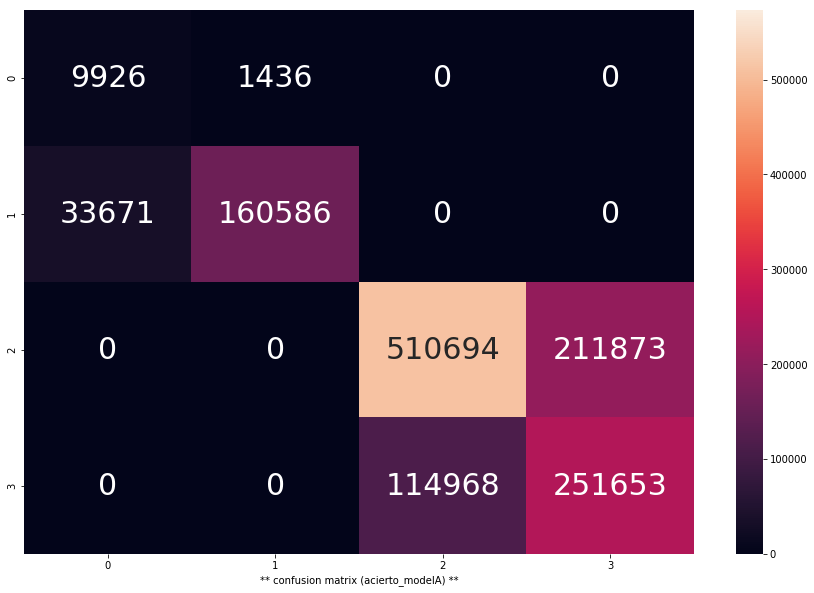

In [13]:
# confusion matrix con los aciertos del binary

df_piv = (df_preds.where(col("acierto_binary")=="yes")
    .groupby("lab")
    .pivot("pred", values=[0,1,2,3])
    .agg(sql_count("*"))).fillna(0).sort(asc("lab"))


confusion_matrix = np.array(df_piv.drop("lab").rdd.collect())
confusion_matrix

import seaborn as sns
plt.figure()

plt.subplots(figsize = (15,10))
cor = sns.heatmap(data = confusion_matrix, annot = True, fmt="d",vmin=0, vmax=573000, annot_kws={"size": 30}) 
plt.xlabel("** confusion matrix (acierto_modelA) **")



In [14]:
get_multiclass_metrics(spark, df_preds.where(col("acierto_binary")=="yes"), score_col="pred", label_col="lab", additional_metrics=False)


[modeler] get_multiclass_metrics | score_col=pred, label_col=lab
[modeler] get_multiclass_metrics | preds_and_labels.count()=1294807
confusion_matrix
[[  9926.   1436.      0.      0.]
 [ 33671. 160586.      0.      0.]
 [     0.      0. 510694. 211873.]
 [     0.      0. 114968. 251653.]]
[modeler] get_multiclass_metrics | Metrics Summary:
{'confusion_matrix': array([[  9926.,   1436.,      0.,      0.],
       [ 33671., 160586.,      0.,      0.],
       [     0.,      0., 510694., 211873.],
       [     0.,      0., 114968., 251653.]]),
 'f1_measure_class0': 0.3612147237031242,
 'f1_measure_class1': 0.9014620564220738,
 'f1_measure_class2': 0.757577533193545,
 'f1_measure_class3': 0.6062853928280173,
 'f1_score': 0.7204618140000788,
 'precision': 0.7204618140000788,
 'precision_class0': 0.22767621625341194,
 'precision_class1': 0.9911370060855933,
 'precision_class2': 0.8162458324143068,
 'precision_class3': 0.5429102143137602,
 'recall': 0.7204618140000788,
 'recall_class0': 0.8736

{'confusion_matrix': array([[  9926.,   1436.,      0.,      0.],
        [ 33671., 160586.,      0.,      0.],
        [     0.,      0., 510694., 211873.],
        [     0.,      0., 114968., 251653.]]),
 'f1_measure_class0': 0.3612147237031242,
 'f1_measure_class1': 0.9014620564220738,
 'f1_measure_class2': 0.757577533193545,
 'f1_measure_class3': 0.6062853928280173,
 'f1_score': 0.7204618140000788,
 'precision': 0.7204618140000788,
 'precision_class0': 0.22767621625341194,
 'precision_class1': 0.9911370060855933,
 'precision_class2': 0.8162458324143068,
 'precision_class3': 0.5429102143137602,
 'recall': 0.7204618140000788,
 'recall_class0': 0.8736138003872558,
 'recall_class1': 0.82666776486819,
 'recall_class2': 0.7067773645904117,
 'recall_class3': 0.686411853112615,
 'weighted_f0.5_score': 0.7476035425395284,
 'weighted_f1_score': 0.732848153289377,
 'weighted_false_positive_rate': 0.17717585674962621,
 'weighted_precision': 0.7599254148550895,
 'weighted_recall': 0.72046181400

In [62]:
import sys

try:
    sys.exit(1)
except:
    print("hola1")
    print(e)
print("hola2")

hola1


NameError: name 'e' is not defined